In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data = pd.read_csv('실습/구내식당식사인원예측/train.csv')

In [3]:
data.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [7]:
data.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
dtype: int64

In [8]:
# 요일을 숫자로 매핑

data['요일'] = data['요일'].map({'월':0, '화':1, '수':2, '목':3, '금':4})

In [9]:
# 수치 데이터만 활용

data = data[['요일', '본사정원수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '중식계', '석식계']]

In [10]:
# Features와 target(중식계만) 나누기

features = data[data.columns[0:-2]]
target = data[data.columns[-2]]

In [11]:
features

,요일,본사정원수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
0,0,2601,150,238,0.0
1,1,2601,173,319,0.0
2,2,2601,180,111,0.0
3,3,2601,220,355,0.0
4,4,2601,181,34,0.0
...,...,...,...,...,...
1200,2,2983,198,4,391.0
1201,3,2983,231,462,351.0
1202,4,2983,248,1,303.0
1203,0,2983,153,616,327.0


In [12]:
target

0       1039.0
1        867.0
2       1017.0
3        978.0
4        925.0
         ...  
1200    1093.0
1201     832.0
1202     579.0
1203    1145.0
1204    1015.0
Name: 중식계, Length: 1205, dtype: float64

In [13]:
x_train, x_test, y_train, y_test = train_test_split(features, target,
                                                   test_size=0.2, random_state=0)

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(964, 5)
(964,)
(241, 5)
(241,)


## ANN

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [16]:
# ANN 구현을 위한 데이터 표준화

mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

In [17]:
tf.random.set_seed(0)

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(1))

adam = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=adam, loss='mse', metrics=['mse'])

es = tf.keras.callbacks.EarlyStopping(monitor='mse', patience=100, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='mse', factor=0.001, min_lr=0.0001)

reg_history = model.fit(x_train, y_train, epochs=20000, batch_size=100, validation_split=0.2,
                       callbacks=[es,lr])

Epoch 1/20000
8/8 [==============================] - 0s 16ms/step - loss: 857204.4375 - mse: 857204.4375 - val_loss: 789761.9375 - val_mse: 789761.9375
Epoch 2/20000
8/8 [==============================] - 0s 3ms/step - loss: 856956.6250 - mse: 856956.6250 - val_loss: 789524.3750 - val_mse: 789524.3750
Epoch 3/20000
8/8 [==============================] - 0s 3ms/step - loss: 856717.1250 - mse: 856717.1250 - val_loss: 789306.1875 - val_mse: 789306.1875
Epoch 4/20000
8/8 [==============================] - 0s 3ms/step - loss: 856491.3125 - mse: 856491.3125 - val_loss: 789097.6250 - val_mse: 789097.6250
Epoch 5/20000
8/8 [==============================] - 0s 3ms/step - loss: 856268.5625 - mse: 856268.5625 - val_loss: 788889.5625 - val_mse: 788889.5625
Epoch 6/20000
8/8 [==============================] - 0s 3ms/step - loss: 856049.5000 - mse: 856049.5000 - val_loss: 788675.1250 - val_mse: 788675.1250
Epoch 7/20000
8/8 [==============================] - 0s 3ms/step - loss: 855813.0625 - mse: 8

Epoch 55/20000
8/8 [==============================] - 0s 3ms/step - loss: 741916.7500 - mse: 741916.7500 - val_loss: 676599.1250 - val_mse: 676599.1250
Epoch 56/20000
8/8 [==============================] - 0s 3ms/step - loss: 735281.5000 - mse: 735281.5000 - val_loss: 670146.9375 - val_mse: 670146.8750
Epoch 57/20000
8/8 [==============================] - 0s 3ms/step - loss: 728372.0625 - mse: 728372.0625 - val_loss: 663439.1875 - val_mse: 663439.1875
Epoch 58/20000
8/8 [==============================] - 0s 3ms/step - loss: 721191.6250 - mse: 721191.6250 - val_loss: 656499.5000 - val_mse: 656499.5000
Epoch 59/20000
8/8 [==============================] - 0s 3ms/step - loss: 713767.1875 - mse: 713767.1875 - val_loss: 649317.5625 - val_mse: 649317.5625
Epoch 60/20000
8/8 [==============================] - 0s 3ms/step - loss: 706078.6875 - mse: 706078.6875 - val_loss: 641925.6875 - val_mse: 641925.6250
Epoch 61/20000
8/8 [==============================] - 0s 3ms/step - loss: 698172.3750 - 

8/8 [==============================] - 0s 3ms/step - loss: 226253.9531 - mse: 226253.9531 - val_loss: 191534.1406 - val_mse: 191534.1406
Epoch 109/20000
8/8 [==============================] - 0s 3ms/step - loss: 218502.3125 - mse: 218502.3125 - val_loss: 184534.4688 - val_mse: 184534.4688
Epoch 110/20000
8/8 [==============================] - 0s 3ms/step - loss: 210910.1719 - mse: 210910.1719 - val_loss: 177825.1250 - val_mse: 177825.1250
Epoch 111/20000
8/8 [==============================] - 0s 3ms/step - loss: 203688.0156 - mse: 203688.0156 - val_loss: 171295.8750 - val_mse: 171295.8750
Epoch 112/20000
8/8 [==============================] - 0s 2ms/step - loss: 196550.2656 - mse: 196550.2656 - val_loss: 165053.8281 - val_mse: 165053.8281
Epoch 113/20000
8/8 [==============================] - 0s 3ms/step - loss: 189831.7344 - mse: 189831.7344 - val_loss: 158988.2031 - val_mse: 158988.2031
Epoch 114/20000
8/8 [==============================] - 0s 3ms/step - loss: 183183.5000 - mse: 1831

8/8 [==============================] - 0s 3ms/step - loss: 61206.0430 - mse: 61206.0430 - val_loss: 55601.3047 - val_mse: 55601.3047
Epoch 163/20000
8/8 [==============================] - 0s 3ms/step - loss: 60565.8516 - mse: 60565.8516 - val_loss: 55147.3633 - val_mse: 55147.3633
Epoch 164/20000
8/8 [==============================] - 0s 3ms/step - loss: 59950.4336 - mse: 59950.4336 - val_loss: 54716.6875 - val_mse: 54716.6875
Epoch 165/20000
8/8 [==============================] - ETA: 0s - loss: 55794.7031 - mse: 55794.703 - 0s 3ms/step - loss: 59336.1445 - mse: 59336.1445 - val_loss: 54304.3125 - val_mse: 54304.3125
Epoch 166/20000
8/8 [==============================] - 0s 3ms/step - loss: 58742.7773 - mse: 58742.7773 - val_loss: 53892.7266 - val_mse: 53892.7266
Epoch 167/20000
8/8 [==============================] - 0s 3ms/step - loss: 58196.2109 - mse: 58196.2109 - val_loss: 53498.5391 - val_mse: 53498.5391
Epoch 168/20000
8/8 [==============================] - 0s 3ms/step - loss: 5

8/8 [==============================] - 0s 3ms/step - loss: 39912.8359 - mse: 39912.8359 - val_loss: 37601.4492 - val_mse: 37601.4453
Epoch 217/20000
8/8 [==============================] - 0s 3ms/step - loss: 39662.6328 - mse: 39662.6328 - val_loss: 37319.7305 - val_mse: 37319.7305
Epoch 218/20000
8/8 [==============================] - 0s 3ms/step - loss: 39399.7773 - mse: 39399.7734 - val_loss: 37059.9688 - val_mse: 37059.9688
Epoch 219/20000
8/8 [==============================] - 0s 3ms/step - loss: 39139.5977 - mse: 39139.5938 - val_loss: 36797.4023 - val_mse: 36797.4023
Epoch 220/20000
8/8 [==============================] - 0s 3ms/step - loss: 38897.2500 - mse: 38897.2500 - val_loss: 36544.4258 - val_mse: 36544.4258
Epoch 221/20000
8/8 [==============================] - 0s 3ms/step - loss: 38650.0664 - mse: 38650.0664 - val_loss: 36293.5352 - val_mse: 36293.5352
Epoch 222/20000
8/8 [==============================] - 0s 3ms/step - loss: 38406.1289 - mse: 38406.1289 - val_loss: 36047.

8/8 [==============================] - 0s 3ms/step - loss: 29778.9629 - mse: 29778.9629 - val_loss: 26937.7754 - val_mse: 26937.7754
Epoch 272/20000
8/8 [==============================] - 0s 3ms/step - loss: 29654.5293 - mse: 29654.5293 - val_loss: 26810.4043 - val_mse: 26810.4043
Epoch 273/20000
8/8 [==============================] - 0s 3ms/step - loss: 29540.0488 - mse: 29540.0488 - val_loss: 26675.2070 - val_mse: 26675.2070
Epoch 274/20000
8/8 [==============================] - 0s 3ms/step - loss: 29419.2871 - mse: 29419.2871 - val_loss: 26555.8496 - val_mse: 26555.8496
Epoch 275/20000
8/8 [==============================] - 0s 3ms/step - loss: 29305.7285 - mse: 29305.7285 - val_loss: 26433.0410 - val_mse: 26433.0410
Epoch 276/20000
8/8 [==============================] - 0s 3ms/step - loss: 29191.1562 - mse: 29191.1562 - val_loss: 26298.0859 - val_mse: 26298.0859
Epoch 277/20000
8/8 [==============================] - 0s 2ms/step - loss: 29081.8672 - mse: 29081.8672 - val_loss: 26172.

8/8 [==============================] - 0s 3ms/step - loss: 25122.7539 - mse: 25122.7539 - val_loss: 21856.1172 - val_mse: 21856.1172
Epoch 327/20000
8/8 [==============================] - 0s 3ms/step - loss: 25065.3848 - mse: 25065.3848 - val_loss: 21804.2402 - val_mse: 21804.2402
Epoch 328/20000
8/8 [==============================] - 0s 3ms/step - loss: 25010.5938 - mse: 25010.5938 - val_loss: 21738.3398 - val_mse: 21738.3398
Epoch 329/20000
8/8 [==============================] - 0s 3ms/step - loss: 24954.7852 - mse: 24954.7852 - val_loss: 21685.4512 - val_mse: 21685.4512
Epoch 330/20000
8/8 [==============================] - 0s 3ms/step - loss: 24901.3848 - mse: 24901.3848 - val_loss: 21621.1289 - val_mse: 21621.1289
Epoch 331/20000
8/8 [==============================] - 0s 3ms/step - loss: 24843.2344 - mse: 24843.2344 - val_loss: 21572.3281 - val_mse: 21572.3262
Epoch 332/20000
8/8 [==============================] - 0s 3ms/step - loss: 24794.3320 - mse: 24794.3320 - val_loss: 21530.

8/8 [==============================] - 0s 3ms/step - loss: 22830.3613 - mse: 22830.3613 - val_loss: 19568.5820 - val_mse: 19568.5820
Epoch 382/20000
8/8 [==============================] - 0s 3ms/step - loss: 22800.8008 - mse: 22800.8008 - val_loss: 19542.3262 - val_mse: 19542.3262
Epoch 383/20000
8/8 [==============================] - 0s 3ms/step - loss: 22773.7969 - mse: 22773.7969 - val_loss: 19508.8223 - val_mse: 19508.8223
Epoch 384/20000
8/8 [==============================] - 0s 3ms/step - loss: 22741.3457 - mse: 22741.3457 - val_loss: 19483.2402 - val_mse: 19483.2402
Epoch 385/20000
8/8 [==============================] - 0s 3ms/step - loss: 22707.1992 - mse: 22707.1992 - val_loss: 19449.6582 - val_mse: 19449.6582
Epoch 386/20000
8/8 [==============================] - 0s 3ms/step - loss: 22679.8594 - mse: 22679.8594 - val_loss: 19425.7324 - val_mse: 19425.7324
Epoch 387/20000
8/8 [==============================] - 0s 3ms/step - loss: 22647.2754 - mse: 22647.2754 - val_loss: 19403.

Epoch 436/20000
8/8 [==============================] - 0s 3ms/step - loss: 21440.2988 - mse: 21440.2988 - val_loss: 18403.0859 - val_mse: 18403.0879
Epoch 437/20000
8/8 [==============================] - 0s 3ms/step - loss: 21420.2832 - mse: 21420.2832 - val_loss: 18388.2383 - val_mse: 18388.2383
Epoch 438/20000
8/8 [==============================] - 0s 3ms/step - loss: 21397.3340 - mse: 21397.3340 - val_loss: 18376.2988 - val_mse: 18376.2988
Epoch 439/20000
8/8 [==============================] - 0s 3ms/step - loss: 21376.2520 - mse: 21376.2520 - val_loss: 18360.5625 - val_mse: 18360.5625
Epoch 440/20000
8/8 [==============================] - 0s 3ms/step - loss: 21354.3887 - mse: 21354.3887 - val_loss: 18362.5566 - val_mse: 18362.5566
Epoch 441/20000
8/8 [==============================] - 0s 3ms/step - loss: 21330.0312 - mse: 21330.0312 - val_loss: 18341.5625 - val_mse: 18341.5645
Epoch 442/20000
8/8 [==============================] - 0s 3ms/step - loss: 21309.8281 - mse: 21309.8301 - 

8/8 [==============================] - 0s 2ms/step - loss: 20433.9492 - mse: 20433.9492 - val_loss: 17750.8281 - val_mse: 17750.8281
Epoch 491/20000
8/8 [==============================] - 0s 3ms/step - loss: 20421.9102 - mse: 20421.9102 - val_loss: 17730.3594 - val_mse: 17730.3594
Epoch 492/20000
8/8 [==============================] - 0s 3ms/step - loss: 20406.5293 - mse: 20406.5293 - val_loss: 17717.7988 - val_mse: 17717.7988
Epoch 493/20000
8/8 [==============================] - 0s 3ms/step - loss: 20389.9785 - mse: 20389.9785 - val_loss: 17715.1973 - val_mse: 17715.1973
Epoch 494/20000
8/8 [==============================] - 0s 2ms/step - loss: 20375.8750 - mse: 20375.8750 - val_loss: 17695.8984 - val_mse: 17695.8984
Epoch 495/20000
8/8 [==============================] - 0s 3ms/step - loss: 20360.9160 - mse: 20360.9160 - val_loss: 17684.6504 - val_mse: 17684.6504
Epoch 496/20000
8/8 [==============================] - 0s 3ms/step - loss: 20343.7246 - mse: 20343.7246 - val_loss: 17672.

8/8 [==============================] - 0s 3ms/step - loss: 19717.8574 - mse: 19717.8574 - val_loss: 17298.6426 - val_mse: 17298.6426
Epoch 546/20000
8/8 [==============================] - 0s 3ms/step - loss: 19707.6016 - mse: 19707.6016 - val_loss: 17296.8633 - val_mse: 17296.8633
Epoch 547/20000
8/8 [==============================] - 0s 3ms/step - loss: 19697.1387 - mse: 19697.1387 - val_loss: 17282.4258 - val_mse: 17282.4258
Epoch 548/20000
8/8 [==============================] - 0s 3ms/step - loss: 19684.5039 - mse: 19684.5039 - val_loss: 17278.3105 - val_mse: 17278.3105
Epoch 549/20000
8/8 [==============================] - 0s 3ms/step - loss: 19674.4082 - mse: 19674.4082 - val_loss: 17276.0449 - val_mse: 17276.0449
Epoch 550/20000
8/8 [==============================] - 0s 3ms/step - loss: 19663.6680 - mse: 19663.6680 - val_loss: 17271.7930 - val_mse: 17271.7930
Epoch 551/20000
8/8 [==============================] - 0s 3ms/step - loss: 19652.1484 - mse: 19652.1484 - val_loss: 17272.

8/8 [==============================] - 0s 3ms/step - loss: 19188.8105 - mse: 19188.8086 - val_loss: 17029.1191 - val_mse: 17029.1191
Epoch 601/20000
8/8 [==============================] - 0s 3ms/step - loss: 19180.4980 - mse: 19180.4980 - val_loss: 17037.4707 - val_mse: 17037.4707
Epoch 602/20000
8/8 [==============================] - 0s 3ms/step - loss: 19172.5781 - mse: 19172.5781 - val_loss: 17035.0176 - val_mse: 17035.0176
Epoch 603/20000
8/8 [==============================] - 0s 3ms/step - loss: 19166.7363 - mse: 19166.7363 - val_loss: 17036.4922 - val_mse: 17036.4922
Epoch 604/20000
8/8 [==============================] - 0s 3ms/step - loss: 19153.7285 - mse: 19153.7285 - val_loss: 17032.7949 - val_mse: 17032.7949
Epoch 605/20000
8/8 [==============================] - 0s 2ms/step - loss: 19148.9824 - mse: 19148.9824 - val_loss: 17010.4453 - val_mse: 17010.4453
Epoch 606/20000
8/8 [==============================] - 0s 3ms/step - loss: 19141.4180 - mse: 19141.4180 - val_loss: 16987.

Epoch 655/20000
8/8 [==============================] - 0s 3ms/step - loss: 18752.6074 - mse: 18752.6074 - val_loss: 16790.1445 - val_mse: 16790.1445
Epoch 656/20000
8/8 [==============================] - 0s 3ms/step - loss: 18748.6504 - mse: 18748.6504 - val_loss: 16786.9102 - val_mse: 16786.9102
Epoch 657/20000
8/8 [==============================] - 0s 3ms/step - loss: 18737.8320 - mse: 18737.8320 - val_loss: 16793.0898 - val_mse: 16793.0898
Epoch 658/20000
8/8 [==============================] - 0s 3ms/step - loss: 18735.2344 - mse: 18735.2344 - val_loss: 16803.4160 - val_mse: 16803.4141
Epoch 659/20000
8/8 [==============================] - 0s 3ms/step - loss: 18725.5039 - mse: 18725.5039 - val_loss: 16777.7520 - val_mse: 16777.7520
Epoch 660/20000
8/8 [==============================] - ETA: 0s - loss: 16268.6963 - mse: 16268.696 - 0s 3ms/step - loss: 18720.2461 - mse: 18720.2461 - val_loss: 16760.3594 - val_mse: 16760.3594
Epoch 661/20000
8/8 [==============================] - 0s 3m

Epoch 710/20000
8/8 [==============================] - 0s 3ms/step - loss: 18397.0840 - mse: 18397.0840 - val_loss: 16586.0957 - val_mse: 16586.0957
Epoch 711/20000
8/8 [==============================] - 0s 3ms/step - loss: 18395.2637 - mse: 18395.2637 - val_loss: 16571.8164 - val_mse: 16571.8164
Epoch 712/20000
8/8 [==============================] - 0s 3ms/step - loss: 18385.6309 - mse: 18385.6309 - val_loss: 16574.3652 - val_mse: 16574.3652
Epoch 713/20000
8/8 [==============================] - 0s 3ms/step - loss: 18382.6152 - mse: 18382.6152 - val_loss: 16591.5332 - val_mse: 16591.5332
Epoch 714/20000
8/8 [==============================] - 0s 3ms/step - loss: 18375.3945 - mse: 18375.3945 - val_loss: 16588.4453 - val_mse: 16588.4453
Epoch 715/20000
8/8 [==============================] - 0s 3ms/step - loss: 18366.3379 - mse: 18366.3379 - val_loss: 16585.9258 - val_mse: 16585.9258
Epoch 716/20000
8/8 [==============================] - 0s 3ms/step - loss: 18361.6387 - mse: 18361.6387 - 

Epoch 765/20000
8/8 [==============================] - 0s 3ms/step - loss: 18026.3691 - mse: 18026.3691 - val_loss: 16384.2793 - val_mse: 16384.2773
Epoch 766/20000
8/8 [==============================] - 0s 3ms/step - loss: 18019.0371 - mse: 18019.0371 - val_loss: 16365.4609 - val_mse: 16365.4609
Epoch 767/20000
8/8 [==============================] - 0s 3ms/step - loss: 18021.2188 - mse: 18021.2188 - val_loss: 16361.0107 - val_mse: 16361.0107
Epoch 768/20000
8/8 [==============================] - 0s 3ms/step - loss: 18012.8516 - mse: 18012.8516 - val_loss: 16354.9893 - val_mse: 16354.9893
Epoch 769/20000
8/8 [==============================] - 0s 4ms/step - loss: 18011.3965 - mse: 18011.3965 - val_loss: 16360.8291 - val_mse: 16360.8291
Epoch 770/20000
8/8 [==============================] - 0s 3ms/step - loss: 18008.4141 - mse: 18008.4141 - val_loss: 16337.9297 - val_mse: 16337.9297
Epoch 771/20000
8/8 [==============================] - 0s 3ms/step - loss: 17993.2480 - mse: 17993.2480 - 

Epoch 820/20000
8/8 [==============================] - 0s 4ms/step - loss: 17531.3047 - mse: 17531.3047 - val_loss: 15984.4043 - val_mse: 15984.4043
Epoch 821/20000
8/8 [==============================] - 0s 4ms/step - loss: 17531.8867 - mse: 17531.8867 - val_loss: 15962.6982 - val_mse: 15962.6982
Epoch 822/20000
8/8 [==============================] - 0s 3ms/step - loss: 17517.7402 - mse: 17517.7402 - val_loss: 15981.9639 - val_mse: 15981.9639
Epoch 823/20000
8/8 [==============================] - 0s 3ms/step - loss: 17510.9414 - mse: 17510.9414 - val_loss: 15973.2510 - val_mse: 15973.2529
Epoch 824/20000
8/8 [==============================] - 0s 3ms/step - loss: 17513.5625 - mse: 17513.5625 - val_loss: 16001.6475 - val_mse: 16001.6475
Epoch 825/20000
8/8 [==============================] - 0s 3ms/step - loss: 17496.8125 - mse: 17496.8125 - val_loss: 15980.4004 - val_mse: 15980.4004
Epoch 826/20000
8/8 [==============================] - 0s 3ms/step - loss: 17491.2129 - mse: 17491.2129 - 

Epoch 875/20000
8/8 [==============================] - 0s 4ms/step - loss: 17192.2871 - mse: 17192.2871 - val_loss: 15731.2725 - val_mse: 15731.2725
Epoch 876/20000
8/8 [==============================] - 0s 4ms/step - loss: 17185.1992 - mse: 17185.2012 - val_loss: 15715.7510 - val_mse: 15715.7500
Epoch 877/20000
8/8 [==============================] - 0s 4ms/step - loss: 17180.9551 - mse: 17180.9570 - val_loss: 15661.4990 - val_mse: 15661.4990
Epoch 878/20000
8/8 [==============================] - 0s 3ms/step - loss: 17171.8125 - mse: 17171.8125 - val_loss: 15681.2588 - val_mse: 15681.2588
Epoch 879/20000
8/8 [==============================] - 0s 3ms/step - loss: 17165.8867 - mse: 17165.8867 - val_loss: 15673.3008 - val_mse: 15673.3008
Epoch 880/20000
8/8 [==============================] - 0s 4ms/step - loss: 17157.8223 - mse: 17157.8203 - val_loss: 15687.2070 - val_mse: 15687.2070
Epoch 881/20000
8/8 [==============================] - 0s 4ms/step - loss: 17154.8789 - mse: 17154.8789 - 

Epoch 930/20000
8/8 [==============================] - 0s 3ms/step - loss: 16923.3145 - mse: 16923.3145 - val_loss: 15455.9248 - val_mse: 15455.9258
Epoch 931/20000
8/8 [==============================] - 0s 4ms/step - loss: 16912.8535 - mse: 16912.8535 - val_loss: 15458.1992 - val_mse: 15458.1992
Epoch 932/20000
8/8 [==============================] - 0s 4ms/step - loss: 16910.2461 - mse: 16910.2461 - val_loss: 15452.1113 - val_mse: 15452.1104
Epoch 933/20000
8/8 [==============================] - 0s 4ms/step - loss: 16905.1738 - mse: 16905.1738 - val_loss: 15431.9932 - val_mse: 15431.9922
Epoch 934/20000
8/8 [==============================] - 0s 3ms/step - loss: 16911.2676 - mse: 16911.2676 - val_loss: 15386.5000 - val_mse: 15386.5000
Epoch 935/20000
8/8 [==============================] - 0s 3ms/step - loss: 16901.6562 - mse: 16901.6562 - val_loss: 15389.2334 - val_mse: 15389.2334
Epoch 936/20000
8/8 [==============================] - 0s 4ms/step - loss: 16893.8711 - mse: 16893.8711 - 

Epoch 985/20000
8/8 [==============================] - 0s 4ms/step - loss: 16680.6641 - mse: 16680.6641 - val_loss: 15194.3213 - val_mse: 15194.3213
Epoch 986/20000
8/8 [==============================] - 0s 4ms/step - loss: 16677.1250 - mse: 16677.1250 - val_loss: 15207.9834 - val_mse: 15207.9844
Epoch 987/20000
8/8 [==============================] - 0s 4ms/step - loss: 16665.1016 - mse: 16665.1016 - val_loss: 15176.6855 - val_mse: 15176.6855
Epoch 988/20000
8/8 [==============================] - 0s 3ms/step - loss: 16662.2891 - mse: 16662.2871 - val_loss: 15151.6719 - val_mse: 15151.6719
Epoch 989/20000
8/8 [==============================] - 0s 4ms/step - loss: 16664.2637 - mse: 16664.2637 - val_loss: 15115.4043 - val_mse: 15115.4043
Epoch 990/20000
8/8 [==============================] - 0s 4ms/step - loss: 16666.6035 - mse: 16666.6035 - val_loss: 15140.8105 - val_mse: 15140.8096
Epoch 991/20000
8/8 [==============================] - 0s 3ms/step - loss: 16660.1719 - mse: 16660.1719 - 

Epoch 1040/20000
8/8 [==============================] - 0s 3ms/step - loss: 16446.2227 - mse: 16446.2227 - val_loss: 14946.1504 - val_mse: 14946.1504
Epoch 1041/20000
8/8 [==============================] - 0s 3ms/step - loss: 16446.8926 - mse: 16446.8926 - val_loss: 14878.3418 - val_mse: 14878.3418
Epoch 1042/20000
8/8 [==============================] - 0s 3ms/step - loss: 16457.2070 - mse: 16457.2070 - val_loss: 14843.7822 - val_mse: 14843.7822
Epoch 1043/20000
8/8 [==============================] - 0s 3ms/step - loss: 16436.4766 - mse: 16436.4766 - val_loss: 14899.2412 - val_mse: 14899.2412
Epoch 1044/20000
8/8 [==============================] - 0s 3ms/step - loss: 16433.1367 - mse: 16433.1348 - val_loss: 14916.6533 - val_mse: 14916.6533
Epoch 1045/20000
8/8 [==============================] - 0s 3ms/step - loss: 16437.8750 - mse: 16437.8750 - val_loss: 14933.9814 - val_mse: 14933.9814
Epoch 1046/20000
8/8 [==============================] - 0s 4ms/step - loss: 16426.9062 - mse: 16426.

8/8 [==============================] - 0s 3ms/step - loss: 16225.9404 - mse: 16225.9404 - val_loss: 14603.6504 - val_mse: 14603.6504
Epoch 1095/20000
8/8 [==============================] - 0s 3ms/step - loss: 16225.3486 - mse: 16225.3486 - val_loss: 14583.5312 - val_mse: 14583.5312
Epoch 1096/20000
8/8 [==============================] - 0s 3ms/step - loss: 16217.2539 - mse: 16217.2539 - val_loss: 14601.9375 - val_mse: 14601.9375
Epoch 1097/20000
8/8 [==============================] - 0s 3ms/step - loss: 16210.8652 - mse: 16210.8652 - val_loss: 14618.7471 - val_mse: 14618.7471
Epoch 1098/20000
8/8 [==============================] - 0s 3ms/step - loss: 16212.7188 - mse: 16212.7188 - val_loss: 14665.0078 - val_mse: 14665.0078
Epoch 1099/20000
8/8 [==============================] - 0s 3ms/step - loss: 16211.8184 - mse: 16211.8184 - val_loss: 14626.1748 - val_mse: 14626.1748
Epoch 1100/20000
8/8 [==============================] - 0s 3ms/step - loss: 16202.3320 - mse: 16202.3320 - val_loss: 

Epoch 1149/20000
8/8 [==============================] - 0s 3ms/step - loss: 16013.9219 - mse: 16013.9219 - val_loss: 14300.3809 - val_mse: 14300.3809
Epoch 1150/20000
8/8 [==============================] - 0s 3ms/step - loss: 16000.1904 - mse: 16000.1904 - val_loss: 14312.6641 - val_mse: 14312.6641
Epoch 1151/20000
8/8 [==============================] - 0s 3ms/step - loss: 16008.2715 - mse: 16008.2715 - val_loss: 14363.4531 - val_mse: 14363.4531
Epoch 1152/20000
8/8 [==============================] - 0s 3ms/step - loss: 15995.5684 - mse: 15995.5684 - val_loss: 14350.8730 - val_mse: 14350.8730
Epoch 1153/20000
8/8 [==============================] - 0s 3ms/step - loss: 15997.3887 - mse: 15997.3887 - val_loss: 14284.3809 - val_mse: 14284.3809
Epoch 1154/20000
8/8 [==============================] - 0s 3ms/step - loss: 15985.6016 - mse: 15985.6016 - val_loss: 14299.1758 - val_mse: 14299.1758
Epoch 1155/20000
8/8 [==============================] - 0s 3ms/step - loss: 15983.3594 - mse: 15983.

8/8 [==============================] - 0s 3ms/step - loss: 15802.5664 - mse: 15802.5664 - val_loss: 14109.8887 - val_mse: 14109.8887
Epoch 1204/20000
8/8 [==============================] - 0s 4ms/step - loss: 15795.4160 - mse: 15795.4160 - val_loss: 14081.7588 - val_mse: 14081.7588
Epoch 1205/20000
8/8 [==============================] - 0s 3ms/step - loss: 15799.7656 - mse: 15799.7656 - val_loss: 14065.5967 - val_mse: 14065.5967
Epoch 1206/20000
8/8 [==============================] - 0s 3ms/step - loss: 15785.6592 - mse: 15785.6602 - val_loss: 14097.0703 - val_mse: 14097.0703
Epoch 1207/20000
8/8 [==============================] - 0s 3ms/step - loss: 15786.3174 - mse: 15786.3174 - val_loss: 14091.8496 - val_mse: 14091.8496
Epoch 1208/20000
8/8 [==============================] - 0s 3ms/step - loss: 15781.5420 - mse: 15781.5430 - val_loss: 14073.2588 - val_mse: 14073.2588
Epoch 1209/20000
8/8 [==============================] - 0s 3ms/step - loss: 15776.2295 - mse: 15776.2295 - val_loss: 

8/8 [==============================] - 0s 3ms/step - loss: 15593.6416 - mse: 15593.6416 - val_loss: 13878.9121 - val_mse: 13878.9121
Epoch 1258/20000
8/8 [==============================] - 0s 3ms/step - loss: 15591.9160 - mse: 15591.9160 - val_loss: 13833.2256 - val_mse: 13833.2256
Epoch 1259/20000
8/8 [==============================] - 0s 3ms/step - loss: 15582.9092 - mse: 15582.9092 - val_loss: 13833.2227 - val_mse: 13833.2227
Epoch 1260/20000
8/8 [==============================] - 0s 3ms/step - loss: 15584.5625 - mse: 15584.5625 - val_loss: 13809.4355 - val_mse: 13809.4355
Epoch 1261/20000
8/8 [==============================] - 0s 3ms/step - loss: 15582.2568 - mse: 15582.2568 - val_loss: 13842.1582 - val_mse: 13842.1582
Epoch 1262/20000
8/8 [==============================] - 0s 3ms/step - loss: 15583.2480 - mse: 15583.2480 - val_loss: 13780.9814 - val_mse: 13780.9814
Epoch 1263/20000
8/8 [==============================] - 0s 3ms/step - loss: 15577.8018 - mse: 15577.8018 - val_loss: 

8/8 [==============================] - 0s 3ms/step - loss: 15402.5889 - mse: 15402.5889 - val_loss: 13556.8418 - val_mse: 13556.8418
Epoch 1312/20000
8/8 [==============================] - 0s 3ms/step - loss: 15401.4189 - mse: 15401.4199 - val_loss: 13583.0146 - val_mse: 13583.0146
Epoch 1313/20000
8/8 [==============================] - 0s 3ms/step - loss: 15395.6240 - mse: 15395.6240 - val_loss: 13593.1826 - val_mse: 13593.1826
Epoch 1314/20000
8/8 [==============================] - 0s 3ms/step - loss: 15390.9473 - mse: 15390.9473 - val_loss: 13561.7383 - val_mse: 13561.7383
Epoch 1315/20000
8/8 [==============================] - 0s 3ms/step - loss: 15386.9736 - mse: 15386.9736 - val_loss: 13554.3164 - val_mse: 13554.3164
Epoch 1316/20000
8/8 [==============================] - 0s 3ms/step - loss: 15386.6758 - mse: 15386.6758 - val_loss: 13551.3457 - val_mse: 13551.3457
Epoch 1317/20000
8/8 [==============================] - 0s 3ms/step - loss: 15384.4600 - mse: 15384.4600 - val_loss: 

Epoch 1366/20000
8/8 [==============================] - 0s 3ms/step - loss: 15211.5029 - mse: 15211.5029 - val_loss: 13325.2852 - val_mse: 13325.2852
Epoch 1367/20000
8/8 [==============================] - 0s 3ms/step - loss: 15207.9639 - mse: 15207.9639 - val_loss: 13317.9775 - val_mse: 13317.9775
Epoch 1368/20000
8/8 [==============================] - 0s 3ms/step - loss: 15204.9990 - mse: 15204.9990 - val_loss: 13325.3623 - val_mse: 13325.3623
Epoch 1369/20000
8/8 [==============================] - 0s 3ms/step - loss: 15199.1846 - mse: 15199.1846 - val_loss: 13344.5410 - val_mse: 13344.5410
Epoch 1370/20000
8/8 [==============================] - 0s 3ms/step - loss: 15199.1670 - mse: 15199.1660 - val_loss: 13353.0986 - val_mse: 13353.0986
Epoch 1371/20000
8/8 [==============================] - 0s 3ms/step - loss: 15203.9971 - mse: 15203.9971 - val_loss: 13293.7148 - val_mse: 13293.7148
Epoch 1372/20000
8/8 [==============================] - 0s 3ms/step - loss: 15187.9805 - mse: 15187.

8/8 [==============================] - 0s 3ms/step - loss: 15020.4453 - mse: 15020.4453 - val_loss: 13043.7334 - val_mse: 13043.7334
Epoch 1421/20000
8/8 [==============================] - 0s 3ms/step - loss: 15017.2109 - mse: 15017.2109 - val_loss: 13093.8730 - val_mse: 13093.8730
Epoch 1422/20000
8/8 [==============================] - 0s 3ms/step - loss: 15010.6084 - mse: 15010.6084 - val_loss: 13116.6895 - val_mse: 13116.6895
Epoch 1423/20000
8/8 [==============================] - 0s 3ms/step - loss: 15006.7588 - mse: 15006.7588 - val_loss: 13107.4795 - val_mse: 13107.4795
Epoch 1424/20000
8/8 [==============================] - 0s 3ms/step - loss: 15007.5293 - mse: 15007.5293 - val_loss: 13079.6533 - val_mse: 13079.6533
Epoch 1425/20000
8/8 [==============================] - 0s 3ms/step - loss: 15001.3438 - mse: 15001.3438 - val_loss: 13075.2939 - val_mse: 13075.2939
Epoch 1426/20000
8/8 [==============================] - 0s 3ms/step - loss: 14995.2451 - mse: 14995.2451 - val_loss: 

Epoch 1475/20000
8/8 [==============================] - 0s 3ms/step - loss: 14835.7773 - mse: 14835.7773 - val_loss: 12890.0205 - val_mse: 12890.0205
Epoch 1476/20000
8/8 [==============================] - 0s 3ms/step - loss: 14829.3350 - mse: 14829.3350 - val_loss: 12855.9561 - val_mse: 12855.9561
Epoch 1477/20000
8/8 [==============================] - 0s 3ms/step - loss: 14837.0518 - mse: 14837.0518 - val_loss: 12805.4951 - val_mse: 12805.4951
Epoch 1478/20000
8/8 [==============================] - 0s 3ms/step - loss: 14824.8105 - mse: 14824.8105 - val_loss: 12845.9004 - val_mse: 12845.9004
Epoch 1479/20000
8/8 [==============================] - 0s 3ms/step - loss: 14824.6875 - mse: 14824.6875 - val_loss: 12873.1670 - val_mse: 12873.1670
Epoch 1480/20000
8/8 [==============================] - 0s 3ms/step - loss: 14819.6260 - mse: 14819.6260 - val_loss: 12821.7070 - val_mse: 12821.7070
Epoch 1481/20000
8/8 [==============================] - 0s 3ms/step - loss: 14815.4121 - mse: 14815.

8/8 [==============================] - 0s 3ms/step - loss: 14597.7441 - mse: 14597.7441 - val_loss: 12568.9131 - val_mse: 12568.9131
Epoch 1530/20000
8/8 [==============================] - 0s 3ms/step - loss: 14599.8682 - mse: 14599.8682 - val_loss: 12505.7803 - val_mse: 12505.7803
Epoch 1531/20000
8/8 [==============================] - 0s 3ms/step - loss: 14584.1611 - mse: 14584.1611 - val_loss: 12525.4775 - val_mse: 12525.4775
Epoch 1532/20000
8/8 [==============================] - 0s 3ms/step - loss: 14581.8887 - mse: 14581.8887 - val_loss: 12558.8848 - val_mse: 12558.8848
Epoch 1533/20000
8/8 [==============================] - 0s 3ms/step - loss: 14567.8623 - mse: 14567.8623 - val_loss: 12526.3105 - val_mse: 12526.3105
Epoch 1534/20000
8/8 [==============================] - 0s 3ms/step - loss: 14556.7734 - mse: 14556.7734 - val_loss: 12488.4297 - val_mse: 12488.4297
Epoch 1535/20000
8/8 [==============================] - 0s 3ms/step - loss: 14552.2598 - mse: 14552.2598 - val_loss: 

Epoch 1584/20000
8/8 [==============================] - 0s 3ms/step - loss: 14216.1729 - mse: 14216.1729 - val_loss: 12093.7627 - val_mse: 12093.7627
Epoch 1585/20000
8/8 [==============================] - 0s 3ms/step - loss: 14205.4316 - mse: 14205.4316 - val_loss: 12114.5781 - val_mse: 12114.5781
Epoch 1586/20000
8/8 [==============================] - 0s 3ms/step - loss: 14203.0684 - mse: 14203.0684 - val_loss: 12097.1504 - val_mse: 12097.1504
Epoch 1587/20000
8/8 [==============================] - 0s 3ms/step - loss: 14203.3867 - mse: 14203.3867 - val_loss: 12134.4014 - val_mse: 12134.4014
Epoch 1588/20000
8/8 [==============================] - 0s 3ms/step - loss: 14188.1074 - mse: 14188.1074 - val_loss: 12053.3291 - val_mse: 12053.3291
Epoch 1589/20000
8/8 [==============================] - 0s 3ms/step - loss: 14184.2715 - mse: 14184.2715 - val_loss: 12018.5312 - val_mse: 12018.5312
Epoch 1590/20000
8/8 [==============================] - 0s 3ms/step - loss: 14174.4600 - mse: 14174.

8/8 [==============================] - 0s 3ms/step - loss: 13889.7090 - mse: 13889.7090 - val_loss: 11725.0391 - val_mse: 11725.0391
Epoch 1639/20000
8/8 [==============================] - 0s 4ms/step - loss: 13887.9580 - mse: 13887.9580 - val_loss: 11717.2871 - val_mse: 11717.2871
Epoch 1640/20000
8/8 [==============================] - 0s 3ms/step - loss: 13878.6670 - mse: 13878.6670 - val_loss: 11699.8965 - val_mse: 11699.8965
Epoch 1641/20000
8/8 [==============================] - 0s 3ms/step - loss: 13874.0586 - mse: 13874.0586 - val_loss: 11686.9639 - val_mse: 11686.9639
Epoch 1642/20000
8/8 [==============================] - 0s 3ms/step - loss: 13870.6250 - mse: 13870.6250 - val_loss: 11716.5957 - val_mse: 11716.5957
Epoch 1643/20000
8/8 [==============================] - 0s 3ms/step - loss: 13859.7393 - mse: 13859.7393 - val_loss: 11700.6475 - val_mse: 11700.6475
Epoch 1644/20000
8/8 [==============================] - 0s 3ms/step - loss: 13862.6562 - mse: 13862.6562 - val_loss: 

Epoch 1693/20000
8/8 [==============================] - 0s 3ms/step - loss: 13603.0977 - mse: 13603.0977 - val_loss: 11436.5000 - val_mse: 11436.5000
Epoch 1694/20000
8/8 [==============================] - 0s 3ms/step - loss: 13592.0596 - mse: 13592.0596 - val_loss: 11369.5674 - val_mse: 11369.5674
Epoch 1695/20000
8/8 [==============================] - 0s 3ms/step - loss: 13587.7158 - mse: 13587.7158 - val_loss: 11351.7744 - val_mse: 11351.7744
Epoch 1696/20000
8/8 [==============================] - 0s 3ms/step - loss: 13582.0791 - mse: 13582.0781 - val_loss: 11401.6299 - val_mse: 11401.6299
Epoch 1697/20000
8/8 [==============================] - 0s 3ms/step - loss: 13579.6875 - mse: 13579.6875 - val_loss: 11423.3721 - val_mse: 11423.3721
Epoch 1698/20000
8/8 [==============================] - 0s 3ms/step - loss: 13568.1270 - mse: 13568.1270 - val_loss: 11439.4248 - val_mse: 11439.4248
Epoch 1699/20000
8/8 [==============================] - 0s 3ms/step - loss: 13583.5205 - mse: 13583.

8/8 [==============================] - 0s 3ms/step - loss: 13330.2109 - mse: 13330.2109 - val_loss: 11128.1836 - val_mse: 11128.1836
Epoch 1748/20000
8/8 [==============================] - 0s 3ms/step - loss: 13321.8330 - mse: 13321.8330 - val_loss: 11108.4521 - val_mse: 11108.4521
Epoch 1749/20000
8/8 [==============================] - 0s 3ms/step - loss: 13315.9551 - mse: 13315.9551 - val_loss: 11092.9121 - val_mse: 11092.9121
Epoch 1750/20000
8/8 [==============================] - 0s 3ms/step - loss: 13309.1553 - mse: 13309.1553 - val_loss: 11069.8105 - val_mse: 11069.8105
Epoch 1751/20000
8/8 [==============================] - 0s 3ms/step - loss: 13310.0283 - mse: 13310.0283 - val_loss: 11058.9932 - val_mse: 11058.9951
Epoch 1752/20000
8/8 [==============================] - 0s 3ms/step - loss: 13304.2090 - mse: 13304.2090 - val_loss: 11096.3467 - val_mse: 11096.3486
Epoch 1753/20000
8/8 [==============================] - 0s 3ms/step - loss: 13295.5879 - mse: 13295.5879 - val_loss: 

Epoch 1802/20000
8/8 [==============================] - 0s 3ms/step - loss: 13106.6455 - mse: 13106.6455 - val_loss: 10873.1240 - val_mse: 10873.1240
Epoch 1803/20000
8/8 [==============================] - 0s 3ms/step - loss: 13106.0762 - mse: 13106.0762 - val_loss: 10808.1211 - val_mse: 10808.1211
Epoch 1804/20000
8/8 [==============================] - 0s 3ms/step - loss: 13100.9297 - mse: 13100.9297 - val_loss: 10859.6455 - val_mse: 10859.6455
Epoch 1805/20000
8/8 [==============================] - 0s 3ms/step - loss: 13093.1396 - mse: 13093.1396 - val_loss: 10867.1533 - val_mse: 10867.1533
Epoch 1806/20000
8/8 [==============================] - 0s 3ms/step - loss: 13086.0068 - mse: 13086.0068 - val_loss: 10837.0488 - val_mse: 10837.0488
Epoch 1807/20000
8/8 [==============================] - 0s 3ms/step - loss: 13108.1396 - mse: 13108.1396 - val_loss: 10786.7744 - val_mse: 10786.7744
Epoch 1808/20000
8/8 [==============================] - 0s 3ms/step - loss: 13080.1885 - mse: 13080.

8/8 [==============================] - 0s 3ms/step - loss: 12945.8721 - mse: 12945.8721 - val_loss: 10688.0371 - val_mse: 10688.0371
Epoch 1857/20000
8/8 [==============================] - 0s 3ms/step - loss: 12943.9062 - mse: 12943.9062 - val_loss: 10752.1953 - val_mse: 10752.1953
Epoch 1858/20000
8/8 [==============================] - 0s 4ms/step - loss: 12933.9395 - mse: 12933.9395 - val_loss: 10719.0840 - val_mse: 10719.0840
Epoch 1859/20000
8/8 [==============================] - 0s 4ms/step - loss: 12934.6250 - mse: 12934.6250 - val_loss: 10702.3242 - val_mse: 10702.3242
Epoch 1860/20000
8/8 [==============================] - 0s 3ms/step - loss: 12932.1777 - mse: 12932.1777 - val_loss: 10669.8457 - val_mse: 10669.8457
Epoch 1861/20000
8/8 [==============================] - 0s 3ms/step - loss: 12938.2793 - mse: 12938.2793 - val_loss: 10706.6553 - val_mse: 10706.6543
Epoch 1862/20000
8/8 [==============================] - 0s 3ms/step - loss: 12922.9600 - mse: 12922.9580 - val_loss: 

Epoch 1911/20000
8/8 [==============================] - 0s 3ms/step - loss: 12806.3047 - mse: 12806.3047 - val_loss: 10550.7451 - val_mse: 10550.7451
Epoch 1912/20000
8/8 [==============================] - 0s 3ms/step - loss: 12812.5977 - mse: 12812.5977 - val_loss: 10509.6611 - val_mse: 10509.6621
Epoch 1913/20000
8/8 [==============================] - 0s 3ms/step - loss: 12804.6436 - mse: 12804.6436 - val_loss: 10527.3301 - val_mse: 10527.3301
Epoch 1914/20000
8/8 [==============================] - 0s 3ms/step - loss: 12801.1318 - mse: 12801.1318 - val_loss: 10553.3740 - val_mse: 10553.3740
Epoch 1915/20000
8/8 [==============================] - 0s 3ms/step - loss: 12796.8066 - mse: 12796.8066 - val_loss: 10578.4111 - val_mse: 10578.4111
Epoch 1916/20000
8/8 [==============================] - 0s 3ms/step - loss: 12799.0381 - mse: 12799.0381 - val_loss: 10569.8330 - val_mse: 10569.8330
Epoch 1917/20000
8/8 [==============================] - 0s 3ms/step - loss: 12799.0381 - mse: 12799.

8/8 [==============================] - 0s 3ms/step - loss: 12697.7910 - mse: 12697.7910 - val_loss: 10398.3066 - val_mse: 10398.3066
Epoch 1966/20000
8/8 [==============================] - 0s 3ms/step - loss: 12694.9277 - mse: 12694.9277 - val_loss: 10410.3320 - val_mse: 10410.3320
Epoch 1967/20000
8/8 [==============================] - 0s 4ms/step - loss: 12706.7666 - mse: 12706.7666 - val_loss: 10462.2695 - val_mse: 10462.2695
Epoch 1968/20000
8/8 [==============================] - 0s 3ms/step - loss: 12697.1689 - mse: 12697.1689 - val_loss: 10406.5684 - val_mse: 10406.5684
Epoch 1969/20000
8/8 [==============================] - 0s 3ms/step - loss: 12689.8652 - mse: 12689.8652 - val_loss: 10415.9395 - val_mse: 10415.9395
Epoch 1970/20000
8/8 [==============================] - 0s 3ms/step - loss: 12685.3672 - mse: 12685.3672 - val_loss: 10436.2100 - val_mse: 10436.2100
Epoch 1971/20000
8/8 [==============================] - 0s 3ms/step - loss: 12682.9053 - mse: 12682.9053 - val_loss: 

Epoch 2020/20000
8/8 [==============================] - 0s 3ms/step - loss: 12600.2227 - mse: 12600.2227 - val_loss: 10406.6035 - val_mse: 10406.6035
Epoch 2021/20000
8/8 [==============================] - 0s 3ms/step - loss: 12595.0195 - mse: 12595.0195 - val_loss: 10399.4844 - val_mse: 10399.4844
Epoch 2022/20000
8/8 [==============================] - 0s 3ms/step - loss: 12598.6904 - mse: 12598.6904 - val_loss: 10396.9814 - val_mse: 10396.9814
Epoch 2023/20000
8/8 [==============================] - 0s 3ms/step - loss: 12602.6016 - mse: 12602.6016 - val_loss: 10326.7256 - val_mse: 10326.7256
Epoch 2024/20000
8/8 [==============================] - 0s 3ms/step - loss: 12593.5088 - mse: 12593.5088 - val_loss: 10343.8545 - val_mse: 10343.8545
Epoch 2025/20000
8/8 [==============================] - 0s 3ms/step - loss: 12600.9551 - mse: 12600.9551 - val_loss: 10409.1279 - val_mse: 10409.1279
Epoch 2026/20000
8/8 [==============================] - 0s 3ms/step - loss: 12590.3291 - mse: 12590.

8/8 [==============================] - 0s 3ms/step - loss: 12522.1943 - mse: 12522.1943 - val_loss: 10323.3604 - val_mse: 10323.3604
Epoch 2075/20000
8/8 [==============================] - 0s 3ms/step - loss: 12526.4121 - mse: 12526.4121 - val_loss: 10307.3818 - val_mse: 10307.3818
Epoch 2076/20000
8/8 [==============================] - 0s 3ms/step - loss: 12522.4004 - mse: 12522.4004 - val_loss: 10304.1670 - val_mse: 10304.1670
Epoch 2077/20000
8/8 [==============================] - 0s 3ms/step - loss: 12517.2754 - mse: 12517.2754 - val_loss: 10310.2891 - val_mse: 10310.2891
Epoch 2078/20000
8/8 [==============================] - 0s 3ms/step - loss: 12521.9453 - mse: 12521.9453 - val_loss: 10338.2412 - val_mse: 10338.2412
Epoch 2079/20000
8/8 [==============================] - 0s 3ms/step - loss: 12512.1230 - mse: 12512.1230 - val_loss: 10302.4463 - val_mse: 10302.4453
Epoch 2080/20000
8/8 [==============================] - 0s 3ms/step - loss: 12513.9619 - mse: 12513.9619 - val_loss: 

Epoch 2129/20000
8/8 [==============================] - 0s 3ms/step - loss: 12453.1182 - mse: 12453.1182 - val_loss: 10325.7275 - val_mse: 10325.7275
Epoch 2130/20000
8/8 [==============================] - 0s 3ms/step - loss: 12435.4238 - mse: 12435.4238 - val_loss: 10391.2012 - val_mse: 10391.2012
Epoch 2131/20000
8/8 [==============================] - 0s 3ms/step - loss: 12432.6553 - mse: 12432.6533 - val_loss: 10400.5068 - val_mse: 10400.5068
Epoch 2132/20000
8/8 [==============================] - 0s 3ms/step - loss: 12431.9873 - mse: 12431.9873 - val_loss: 10409.1631 - val_mse: 10409.1631
Epoch 2133/20000
8/8 [==============================] - 0s 3ms/step - loss: 12431.7979 - mse: 12431.7979 - val_loss: 10408.9551 - val_mse: 10408.9551
Epoch 2134/20000
8/8 [==============================] - 0s 3ms/step - loss: 12442.5576 - mse: 12442.5576 - val_loss: 10328.9209 - val_mse: 10328.9209
Epoch 2135/20000
8/8 [==============================] - 0s 3ms/step - loss: 12428.3037 - mse: 12428.

8/8 [==============================] - 0s 3ms/step - loss: 12347.7002 - mse: 12347.7002 - val_loss: 10391.4121 - val_mse: 10391.4121
Epoch 2184/20000
8/8 [==============================] - 0s 3ms/step - loss: 12344.9160 - mse: 12344.9160 - val_loss: 10415.9131 - val_mse: 10415.9121
Epoch 2185/20000
8/8 [==============================] - 0s 3ms/step - loss: 12345.2725 - mse: 12345.2725 - val_loss: 10368.9795 - val_mse: 10368.9795
Epoch 2186/20000
8/8 [==============================] - 0s 3ms/step - loss: 12339.3096 - mse: 12339.3096 - val_loss: 10376.9707 - val_mse: 10376.9717
Epoch 2187/20000
8/8 [==============================] - 0s 3ms/step - loss: 12344.0566 - mse: 12344.0566 - val_loss: 10454.0264 - val_mse: 10454.0264
Epoch 2188/20000
8/8 [==============================] - 0s 3ms/step - loss: 12336.7344 - mse: 12336.7344 - val_loss: 10428.3154 - val_mse: 10428.3145
Epoch 2189/20000
8/8 [==============================] - 0s 3ms/step - loss: 12336.0596 - mse: 12336.0596 - val_loss: 

Epoch 2238/20000
8/8 [==============================] - 0s 3ms/step - loss: 12258.7236 - mse: 12258.7236 - val_loss: 10397.3604 - val_mse: 10397.3604
Epoch 2239/20000
8/8 [==============================] - 0s 3ms/step - loss: 12257.3193 - mse: 12257.3193 - val_loss: 10399.5801 - val_mse: 10399.5801
Epoch 2240/20000
8/8 [==============================] - 0s 3ms/step - loss: 12253.4395 - mse: 12253.4395 - val_loss: 10398.9404 - val_mse: 10398.9404
Epoch 2241/20000
8/8 [==============================] - 0s 3ms/step - loss: 12253.7656 - mse: 12253.7656 - val_loss: 10412.6436 - val_mse: 10412.6436
Epoch 2242/20000
8/8 [==============================] - 0s 3ms/step - loss: 12252.7275 - mse: 12252.7275 - val_loss: 10364.2812 - val_mse: 10364.2812
Epoch 2243/20000
8/8 [==============================] - 0s 3ms/step - loss: 12253.7090 - mse: 12253.7090 - val_loss: 10361.7012 - val_mse: 10361.7012
Epoch 2244/20000
8/8 [==============================] - 0s 3ms/step - loss: 12253.0820 - mse: 12253.

8/8 [==============================] - 0s 3ms/step - loss: 12164.6006 - mse: 12164.6006 - val_loss: 10355.2881 - val_mse: 10355.2881
Epoch 2293/20000
8/8 [==============================] - 0s 4ms/step - loss: 12162.4434 - mse: 12162.4434 - val_loss: 10352.1348 - val_mse: 10352.1348
Epoch 2294/20000
8/8 [==============================] - 0s 4ms/step - loss: 12160.3174 - mse: 12160.3174 - val_loss: 10376.8604 - val_mse: 10376.8604
Epoch 2295/20000
8/8 [==============================] - 0s 3ms/step - loss: 12162.3164 - mse: 12162.3164 - val_loss: 10345.0059 - val_mse: 10345.0059
Epoch 2296/20000
8/8 [==============================] - 0s 3ms/step - loss: 12163.3281 - mse: 12163.3281 - val_loss: 10416.5947 - val_mse: 10416.5957
Epoch 2297/20000
8/8 [==============================] - 0s 3ms/step - loss: 12154.3506 - mse: 12154.3516 - val_loss: 10382.5791 - val_mse: 10382.5791
Epoch 2298/20000
8/8 [==============================] - 0s 3ms/step - loss: 12151.2686 - mse: 12151.2686 - val_loss: 

Epoch 2347/20000
8/8 [==============================] - 0s 3ms/step - loss: 12078.7246 - mse: 12078.7246 - val_loss: 10317.4141 - val_mse: 10317.4141
Epoch 2348/20000
8/8 [==============================] - 0s 3ms/step - loss: 12075.7031 - mse: 12075.7031 - val_loss: 10336.8916 - val_mse: 10336.8916
Epoch 2349/20000
8/8 [==============================] - 0s 3ms/step - loss: 12078.5693 - mse: 12078.5693 - val_loss: 10312.5947 - val_mse: 10312.5938
Epoch 2350/20000
8/8 [==============================] - 0s 3ms/step - loss: 12076.3770 - mse: 12076.3770 - val_loss: 10347.8857 - val_mse: 10347.8857
Epoch 2351/20000
8/8 [==============================] - 0s 3ms/step - loss: 12074.9531 - mse: 12074.9531 - val_loss: 10316.7031 - val_mse: 10316.7031
Epoch 2352/20000
8/8 [==============================] - 0s 3ms/step - loss: 12073.6211 - mse: 12073.6230 - val_loss: 10374.5156 - val_mse: 10374.5156
Epoch 2353/20000
8/8 [==============================] - 0s 3ms/step - loss: 12075.4824 - mse: 12075.

8/8 [==============================] - 0s 4ms/step - loss: 12009.6006 - mse: 12009.6006 - val_loss: 10308.8887 - val_mse: 10308.8887
Epoch 2402/20000
8/8 [==============================] - 0s 3ms/step - loss: 12014.8867 - mse: 12014.8867 - val_loss: 10338.6641 - val_mse: 10338.6641
Epoch 2403/20000
8/8 [==============================] - 0s 4ms/step - loss: 12009.0117 - mse: 12009.0117 - val_loss: 10311.4053 - val_mse: 10311.4053
Epoch 2404/20000
8/8 [==============================] - 0s 4ms/step - loss: 12007.0430 - mse: 12007.0430 - val_loss: 10291.5947 - val_mse: 10291.5947
Epoch 2405/20000
8/8 [==============================] - 0s 4ms/step - loss: 12004.8174 - mse: 12004.8174 - val_loss: 10269.7090 - val_mse: 10269.7090
Epoch 2406/20000
8/8 [==============================] - 0s 3ms/step - loss: 12024.5508 - mse: 12024.5508 - val_loss: 10307.4727 - val_mse: 10307.4727
Epoch 2407/20000
8/8 [==============================] - 0s 3ms/step - loss: 12003.2676 - mse: 12003.2686 - val_loss: 

Epoch 2456/20000
8/8 [==============================] - 0s 3ms/step - loss: 11947.2295 - mse: 11947.2295 - val_loss: 10240.0771 - val_mse: 10240.0771
Epoch 2457/20000
8/8 [==============================] - 0s 3ms/step - loss: 11947.9375 - mse: 11947.9375 - val_loss: 10245.5352 - val_mse: 10245.5352
Epoch 2458/20000
8/8 [==============================] - 0s 3ms/step - loss: 11944.6768 - mse: 11944.6768 - val_loss: 10258.1260 - val_mse: 10258.1260
Epoch 2459/20000
8/8 [==============================] - 0s 3ms/step - loss: 11954.7578 - mse: 11954.7578 - val_loss: 10189.3740 - val_mse: 10189.3730
Epoch 2460/20000
8/8 [==============================] - 0s 3ms/step - loss: 11938.8721 - mse: 11938.8721 - val_loss: 10236.6465 - val_mse: 10236.6465
Epoch 2461/20000
8/8 [==============================] - 0s 3ms/step - loss: 11944.9102 - mse: 11944.9102 - val_loss: 10273.9434 - val_mse: 10273.9434
Epoch 2462/20000
8/8 [==============================] - 0s 3ms/step - loss: 11943.8496 - mse: 11943.

8/8 [==============================] - 0s 4ms/step - loss: 11902.5361 - mse: 11902.5361 - val_loss: 10106.9287 - val_mse: 10106.9287
Epoch 2511/20000
8/8 [==============================] - 0s 5ms/step - loss: 11890.3174 - mse: 11890.3174 - val_loss: 10136.1025 - val_mse: 10136.1025
Epoch 2512/20000
8/8 [==============================] - 0s 7ms/step - loss: 11883.7832 - mse: 11883.7832 - val_loss: 10232.7549 - val_mse: 10232.7539
Epoch 2513/20000
8/8 [==============================] - 0s 4ms/step - loss: 11884.7900 - mse: 11884.7900 - val_loss: 10215.3066 - val_mse: 10215.3066
Epoch 2514/20000
8/8 [==============================] - 0s 4ms/step - loss: 11880.7363 - mse: 11880.7363 - val_loss: 10223.7236 - val_mse: 10223.7236
Epoch 2515/20000
8/8 [==============================] - 0s 4ms/step - loss: 11880.8818 - mse: 11880.8818 - val_loss: 10214.0010 - val_mse: 10214.0010
Epoch 2516/20000
8/8 [==============================] - 0s 4ms/step - loss: 11877.3389 - mse: 11877.3389 - val_loss: 

Epoch 2565/20000
8/8 [==============================] - 0s 3ms/step - loss: 11823.5293 - mse: 11823.5293 - val_loss: 10149.8125 - val_mse: 10149.8125
Epoch 2566/20000
8/8 [==============================] - 0s 4ms/step - loss: 11820.0244 - mse: 11820.0244 - val_loss: 10144.3535 - val_mse: 10144.3535
Epoch 2567/20000
8/8 [==============================] - 0s 3ms/step - loss: 11821.8408 - mse: 11821.8389 - val_loss: 10150.9287 - val_mse: 10150.9287
Epoch 2568/20000
8/8 [==============================] - 0s 3ms/step - loss: 11825.5615 - mse: 11825.5615 - val_loss: 10137.8164 - val_mse: 10137.8164
Epoch 2569/20000
8/8 [==============================] - 0s 3ms/step - loss: 11828.2480 - mse: 11828.2480 - val_loss: 10194.0342 - val_mse: 10194.0342
Epoch 2570/20000
8/8 [==============================] - 0s 3ms/step - loss: 11824.9961 - mse: 11824.9961 - val_loss: 10148.6260 - val_mse: 10148.6260
Epoch 2571/20000
8/8 [==============================] - 0s 3ms/step - loss: 11817.1504 - mse: 11817.

8/8 [==============================] - 0s 3ms/step - loss: 11778.6201 - mse: 11778.6201 - val_loss: 10147.6074 - val_mse: 10147.6074
Epoch 2620/20000
8/8 [==============================] - 0s 4ms/step - loss: 11773.1855 - mse: 11773.1855 - val_loss: 10133.4297 - val_mse: 10133.4297
Epoch 2621/20000
8/8 [==============================] - 0s 4ms/step - loss: 11771.4863 - mse: 11771.4863 - val_loss: 10089.8916 - val_mse: 10089.8916
Epoch 2622/20000
8/8 [==============================] - 0s 3ms/step - loss: 11775.4629 - mse: 11775.4629 - val_loss: 10098.4258 - val_mse: 10098.4258
Epoch 2623/20000
8/8 [==============================] - 0s 3ms/step - loss: 11769.8301 - mse: 11769.8301 - val_loss: 10124.8848 - val_mse: 10124.8848
Epoch 2624/20000
8/8 [==============================] - 0s 3ms/step - loss: 11769.5957 - mse: 11769.5967 - val_loss: 10123.2373 - val_mse: 10123.2373
Epoch 2625/20000
8/8 [==============================] - 0s 3ms/step - loss: 11770.1191 - mse: 11770.1191 - val_loss: 

Epoch 2674/20000
8/8 [==============================] - 0s 4ms/step - loss: 11732.6455 - mse: 11732.6455 - val_loss: 10082.3408 - val_mse: 10082.3408
Epoch 2675/20000
8/8 [==============================] - 0s 4ms/step - loss: 11734.3984 - mse: 11734.3984 - val_loss: 10120.5303 - val_mse: 10120.5303
Epoch 2676/20000
8/8 [==============================] - 0s 4ms/step - loss: 11722.9639 - mse: 11722.9639 - val_loss: 10088.8213 - val_mse: 10088.8223
Epoch 2677/20000
8/8 [==============================] - 0s 3ms/step - loss: 11737.5840 - mse: 11737.5840 - val_loss: 10033.3135 - val_mse: 10033.3135
Epoch 2678/20000
8/8 [==============================] - 0s 4ms/step - loss: 11748.1279 - mse: 11748.1279 - val_loss: 10133.7852 - val_mse: 10133.7852
Epoch 2679/20000
8/8 [==============================] - 0s 4ms/step - loss: 11730.8604 - mse: 11730.8604 - val_loss: 10066.4238 - val_mse: 10066.4238
Epoch 2680/20000
8/8 [==============================] - 0s 3ms/step - loss: 11726.8193 - mse: 11726.

8/8 [==============================] - 0s 3ms/step - loss: 11684.8809 - mse: 11684.8809 - val_loss: 10065.9297 - val_mse: 10065.9297
Epoch 2729/20000
8/8 [==============================] - 0s 3ms/step - loss: 11684.0801 - mse: 11684.0801 - val_loss: 10071.7832 - val_mse: 10071.7832
Epoch 2730/20000
8/8 [==============================] - 0s 3ms/step - loss: 11682.0156 - mse: 11682.0156 - val_loss: 10114.6191 - val_mse: 10114.6191
Epoch 2731/20000
8/8 [==============================] - 0s 3ms/step - loss: 11683.4414 - mse: 11683.4414 - val_loss: 10101.2090 - val_mse: 10101.2090
Epoch 2732/20000
8/8 [==============================] - 0s 3ms/step - loss: 11682.1309 - mse: 11682.1309 - val_loss: 10114.9775 - val_mse: 10114.9775
Epoch 2733/20000
8/8 [==============================] - 0s 3ms/step - loss: 11683.3115 - mse: 11683.3115 - val_loss: 10073.7891 - val_mse: 10073.7891
Epoch 2734/20000
8/8 [==============================] - 0s 3ms/step - loss: 11679.9922 - mse: 11679.9922 - val_loss: 

Epoch 2783/20000
8/8 [==============================] - 0s 3ms/step - loss: 11628.8154 - mse: 11628.8154 - val_loss: 10056.9707 - val_mse: 10056.9697
Epoch 2784/20000
8/8 [==============================] - 0s 3ms/step - loss: 11627.2227 - mse: 11627.2227 - val_loss: 10017.3760 - val_mse: 10017.3760
Epoch 2785/20000
8/8 [==============================] - 0s 3ms/step - loss: 11625.1143 - mse: 11625.1143 - val_loss: 10039.4863 - val_mse: 10039.4863
Epoch 2786/20000
8/8 [==============================] - 0s 3ms/step - loss: 11624.1826 - mse: 11624.1826 - val_loss: 10067.7354 - val_mse: 10067.7354
Epoch 2787/20000
8/8 [==============================] - 0s 3ms/step - loss: 11623.5283 - mse: 11623.5283 - val_loss: 10039.9570 - val_mse: 10039.9570
Epoch 2788/20000
8/8 [==============================] - 0s 3ms/step - loss: 11630.2832 - mse: 11630.2832 - val_loss: 10005.8496 - val_mse: 10005.8496
Epoch 2789/20000
8/8 [==============================] - 0s 4ms/step - loss: 11622.2930 - mse: 11622.

8/8 [==============================] - 0s 4ms/step - loss: 11571.7793 - mse: 11571.7793 - val_loss: 10043.3320 - val_mse: 10043.3320
Epoch 2838/20000
8/8 [==============================] - 0s 5ms/step - loss: 11573.6631 - mse: 11573.6631 - val_loss: 9999.5879 - val_mse: 9999.5879
Epoch 2839/20000
8/8 [==============================] - 0s 4ms/step - loss: 11572.7598 - mse: 11572.7598 - val_loss: 10024.1416 - val_mse: 10024.1416
Epoch 2840/20000
8/8 [==============================] - 0s 4ms/step - loss: 11570.3203 - mse: 11570.3203 - val_loss: 10047.1318 - val_mse: 10047.1318
Epoch 2841/20000
8/8 [==============================] - 0s 3ms/step - loss: 11570.5146 - mse: 11570.5146 - val_loss: 10037.2568 - val_mse: 10037.2568
Epoch 2842/20000
8/8 [==============================] - 0s 3ms/step - loss: 11573.1611 - mse: 11573.1611 - val_loss: 10009.7432 - val_mse: 10009.7432
Epoch 2843/20000
8/8 [==============================] - 0s 4ms/step - loss: 11571.5430 - mse: 11571.5430 - val_loss: 10

Epoch 2892/20000
8/8 [==============================] - 0s 3ms/step - loss: 11525.6436 - mse: 11525.6436 - val_loss: 10030.4082 - val_mse: 10030.4082
Epoch 2893/20000
8/8 [==============================] - 0s 3ms/step - loss: 11527.4912 - mse: 11527.4912 - val_loss: 9997.0430 - val_mse: 9997.0430
Epoch 2894/20000
8/8 [==============================] - 0s 3ms/step - loss: 11527.8291 - mse: 11527.8291 - val_loss: 9993.3643 - val_mse: 9993.3643
Epoch 2895/20000
8/8 [==============================] - 0s 3ms/step - loss: 11526.0479 - mse: 11526.0479 - val_loss: 10027.8643 - val_mse: 10027.8643
Epoch 2896/20000
8/8 [==============================] - 0s 3ms/step - loss: 11530.0840 - mse: 11530.0840 - val_loss: 10048.0947 - val_mse: 10048.0947
Epoch 2897/20000
8/8 [==============================] - 0s 3ms/step - loss: 11519.6826 - mse: 11519.6826 - val_loss: 10033.2988 - val_mse: 10033.2988
Epoch 2898/20000
8/8 [==============================] - 0s 3ms/step - loss: 11532.4062 - mse: 11532.4062

8/8 [==============================] - 0s 5ms/step - loss: 11486.0557 - mse: 11486.0557 - val_loss: 10035.9297 - val_mse: 10035.9297
Epoch 2947/20000
8/8 [==============================] - 0s 6ms/step - loss: 11485.3359 - mse: 11485.3359 - val_loss: 10001.8027 - val_mse: 10001.8027
Epoch 2948/20000
8/8 [==============================] - 0s 5ms/step - loss: 11484.2383 - mse: 11484.2383 - val_loss: 10013.8105 - val_mse: 10013.8105
Epoch 2949/20000
8/8 [==============================] - 0s 6ms/step - loss: 11482.3369 - mse: 11482.3369 - val_loss: 10028.5703 - val_mse: 10028.5703
Epoch 2950/20000
8/8 [==============================] - 0s 5ms/step - loss: 11485.5381 - mse: 11485.5381 - val_loss: 10055.0938 - val_mse: 10055.0938
Epoch 2951/20000
8/8 [==============================] - 0s 4ms/step - loss: 11484.8975 - mse: 11484.8975 - val_loss: 10054.3252 - val_mse: 10054.3252
Epoch 2952/20000
8/8 [==============================] - 0s 4ms/step - loss: 11480.7197 - mse: 11480.7197 - val_loss: 

8/8 [==============================] - 0s 5ms/step - loss: 11453.6201 - mse: 11453.6201 - val_loss: 9958.5195 - val_mse: 9958.5195
Epoch 3001/20000
8/8 [==============================] - 0s 6ms/step - loss: 11450.7402 - mse: 11450.7402 - val_loss: 9987.1973 - val_mse: 9987.1973
Epoch 3002/20000
8/8 [==============================] - 0s 5ms/step - loss: 11445.6963 - mse: 11445.6963 - val_loss: 10027.3945 - val_mse: 10027.3945
Epoch 3003/20000
8/8 [==============================] - 0s 4ms/step - loss: 11445.3398 - mse: 11445.3398 - val_loss: 10024.5439 - val_mse: 10024.5439
Epoch 3004/20000
8/8 [==============================] - 0s 5ms/step - loss: 11447.1191 - mse: 11447.1191 - val_loss: 9997.3516 - val_mse: 9997.3506
Epoch 3005/20000
8/8 [==============================] - 0s 4ms/step - loss: 11450.7002 - mse: 11450.7002 - val_loss: 10039.9492 - val_mse: 10039.9482
Epoch 3006/20000
8/8 [==============================] - 0s 5ms/step - loss: 11450.9482 - mse: 11450.9482 - val_loss: 9989.7

Epoch 3055/20000
8/8 [==============================] - 0s 3ms/step - loss: 11408.9453 - mse: 11408.9453 - val_loss: 10034.5635 - val_mse: 10034.5635
Epoch 3056/20000
8/8 [==============================] - 0s 4ms/step - loss: 11408.8223 - mse: 11408.8223 - val_loss: 9991.7100 - val_mse: 9991.7100
Epoch 3057/20000
8/8 [==============================] - 0s 3ms/step - loss: 11409.5762 - mse: 11409.5762 - val_loss: 10015.7539 - val_mse: 10015.7539
Epoch 3058/20000
8/8 [==============================] - 0s 4ms/step - loss: 11407.3828 - mse: 11407.3828 - val_loss: 10038.3877 - val_mse: 10038.3887
Epoch 3059/20000
8/8 [==============================] - 0s 3ms/step - loss: 11406.6963 - mse: 11406.6963 - val_loss: 10006.0303 - val_mse: 10006.0303
Epoch 3060/20000
8/8 [==============================] - 0s 3ms/step - loss: 11402.9814 - mse: 11402.9814 - val_loss: 10013.9551 - val_mse: 10013.9551
Epoch 3061/20000
8/8 [==============================] - 0s 3ms/step - loss: 11412.4268 - mse: 11412.42

Epoch 3110/20000
8/8 [==============================] - 0s 3ms/step - loss: 11364.3984 - mse: 11364.3984 - val_loss: 10054.5000 - val_mse: 10054.5000
Epoch 3111/20000
8/8 [==============================] - 0s 3ms/step - loss: 11363.4189 - mse: 11363.4189 - val_loss: 10046.0859 - val_mse: 10046.0859
Epoch 3112/20000
8/8 [==============================] - 0s 3ms/step - loss: 11364.9570 - mse: 11364.9570 - val_loss: 10012.8223 - val_mse: 10012.8223
Epoch 3113/20000
8/8 [==============================] - 0s 3ms/step - loss: 11372.1260 - mse: 11372.1260 - val_loss: 9996.8887 - val_mse: 9996.8887
Epoch 3114/20000
8/8 [==============================] - 0s 3ms/step - loss: 11359.6943 - mse: 11359.6943 - val_loss: 10026.0947 - val_mse: 10026.0947
Epoch 3115/20000
8/8 [==============================] - 0s 3ms/step - loss: 11359.9482 - mse: 11359.9482 - val_loss: 10048.8174 - val_mse: 10048.8174
Epoch 3116/20000
8/8 [==============================] - 0s 3ms/step - loss: 11360.6533 - mse: 11360.65

Epoch 3165/20000
8/8 [==============================] - 0s 3ms/step - loss: 11326.1387 - mse: 11326.1387 - val_loss: 10004.9443 - val_mse: 10004.9443
Epoch 3166/20000
8/8 [==============================] - 0s 3ms/step - loss: 11329.5029 - mse: 11329.5029 - val_loss: 10024.9619 - val_mse: 10024.9629
Epoch 3167/20000
8/8 [==============================] - 0s 3ms/step - loss: 11327.2578 - mse: 11327.2578 - val_loss: 9978.3438 - val_mse: 9978.3438
Epoch 3168/20000
8/8 [==============================] - 0s 3ms/step - loss: 11335.4580 - mse: 11335.4580 - val_loss: 9961.7744 - val_mse: 9961.7744
Epoch 3169/20000
8/8 [==============================] - 0s 3ms/step - loss: 11330.0146 - mse: 11330.0146 - val_loss: 10057.0850 - val_mse: 10057.0840
Epoch 3170/20000
8/8 [==============================] - 0s 3ms/step - loss: 11324.0127 - mse: 11324.0127 - val_loss: 10066.4609 - val_mse: 10066.4609
Epoch 3171/20000
8/8 [==============================] - 0s 3ms/step - loss: 11322.0957 - mse: 11322.0957

8/8 [==============================] - 0s 3ms/step - loss: 11293.6787 - mse: 11293.6787 - val_loss: 9995.1387 - val_mse: 9995.1387
Epoch 3220/20000
8/8 [==============================] - 0s 3ms/step - loss: 11291.4004 - mse: 11291.4004 - val_loss: 10033.9570 - val_mse: 10033.9570
Epoch 3221/20000
8/8 [==============================] - 0s 3ms/step - loss: 11287.3984 - mse: 11287.3984 - val_loss: 10005.5410 - val_mse: 10005.5420
Epoch 3222/20000
8/8 [==============================] - 0s 3ms/step - loss: 11287.8867 - mse: 11287.8867 - val_loss: 10000.2939 - val_mse: 10000.2939
Epoch 3223/20000
8/8 [==============================] - 0s 3ms/step - loss: 11288.5605 - mse: 11288.5605 - val_loss: 10020.3174 - val_mse: 10020.3174
Epoch 3224/20000
8/8 [==============================] - 0s 3ms/step - loss: 11293.3350 - mse: 11293.3350 - val_loss: 9977.7490 - val_mse: 9977.7480
Epoch 3225/20000
8/8 [==============================] - 0s 3ms/step - loss: 11289.2266 - mse: 11289.2266 - val_loss: 1001

8/8 [==============================] - 0s 3ms/step - loss: 11253.5840 - mse: 11253.5840 - val_loss: 10006.7109 - val_mse: 10006.7109
Epoch 3275/20000
8/8 [==============================] - 0s 3ms/step - loss: 11255.3359 - mse: 11255.3359 - val_loss: 10001.7139 - val_mse: 10001.7139
Epoch 3276/20000
8/8 [==============================] - 0s 3ms/step - loss: 11275.7002 - mse: 11275.7002 - val_loss: 10070.2832 - val_mse: 10070.2832
Epoch 3277/20000
8/8 [==============================] - 0s 3ms/step - loss: 11245.9844 - mse: 11245.9844 - val_loss: 10000.3281 - val_mse: 10000.3281
Epoch 3278/20000
8/8 [==============================] - 0s 3ms/step - loss: 11250.1348 - mse: 11250.1348 - val_loss: 9948.0439 - val_mse: 9948.0439
Epoch 3279/20000
8/8 [==============================] - 0s 3ms/step - loss: 11256.6445 - mse: 11256.6445 - val_loss: 9925.6904 - val_mse: 9925.6904
Epoch 3280/20000
8/8 [==============================] - 0s 3ms/step - loss: 11252.4893 - mse: 11252.4893 - val_loss: 9967

8/8 [==============================] - 0s 3ms/step - loss: 11224.9336 - mse: 11224.9336 - val_loss: 10006.0244 - val_mse: 10006.0244
Epoch 3330/20000
8/8 [==============================] - 0s 3ms/step - loss: 11220.4121 - mse: 11220.4121 - val_loss: 9983.5879 - val_mse: 9983.5879
Epoch 3331/20000
8/8 [==============================] - 0s 3ms/step - loss: 11221.8066 - mse: 11221.8066 - val_loss: 9982.4170 - val_mse: 9982.4170
Epoch 3332/20000
8/8 [==============================] - 0s 3ms/step - loss: 11226.9561 - mse: 11226.9561 - val_loss: 10010.6914 - val_mse: 10010.6914
Epoch 3333/20000
8/8 [==============================] - 0s 3ms/step - loss: 11219.3984 - mse: 11219.3984 - val_loss: 10027.1914 - val_mse: 10027.1914
Epoch 3334/20000
8/8 [==============================] - 0s 3ms/step - loss: 11232.3164 - mse: 11232.3164 - val_loss: 10056.2705 - val_mse: 10056.2705
Epoch 3335/20000
8/8 [==============================] - 0s 3ms/step - loss: 11218.6240 - mse: 11218.6240 - val_loss: 9978

8/8 [==============================] - 0s 3ms/step - loss: 11194.1025 - mse: 11194.1025 - val_loss: 9999.2158 - val_mse: 9999.2168
Epoch 3385/20000
8/8 [==============================] - 0s 3ms/step - loss: 11192.9453 - mse: 11192.9453 - val_loss: 10001.5205 - val_mse: 10001.5205
Epoch 3386/20000
8/8 [==============================] - 0s 3ms/step - loss: 11193.6953 - mse: 11193.6953 - val_loss: 10005.3467 - val_mse: 10005.3467
Epoch 3387/20000
8/8 [==============================] - 0s 3ms/step - loss: 11192.5625 - mse: 11192.5625 - val_loss: 10005.1943 - val_mse: 10005.1943
Epoch 3388/20000
8/8 [==============================] - 0s 3ms/step - loss: 11192.8301 - mse: 11192.8301 - val_loss: 10007.2266 - val_mse: 10007.2266
Epoch 3389/20000
8/8 [==============================] - 0s 3ms/step - loss: 11193.5732 - mse: 11193.5732 - val_loss: 9998.9717 - val_mse: 9998.9717
Epoch 3390/20000
8/8 [==============================] - 0s 3ms/step - loss: 11194.2686 - mse: 11194.2686 - val_loss: 9993

Epoch 3439/20000
8/8 [==============================] - 0s 3ms/step - loss: 11190.5615 - mse: 11190.5615 - val_loss: 9996.3877 - val_mse: 9996.3877
Epoch 3440/20000
8/8 [==============================] - 0s 3ms/step - loss: 11189.8018 - mse: 11189.8018 - val_loss: 9997.9883 - val_mse: 9997.9883
Epoch 3441/20000
8/8 [==============================] - 0s 3ms/step - loss: 11189.8623 - mse: 11189.8643 - val_loss: 9996.4609 - val_mse: 9996.4609
Epoch 3442/20000
8/8 [==============================] - 0s 3ms/step - loss: 11190.0781 - mse: 11190.0781 - val_loss: 9997.2412 - val_mse: 9997.2412
Epoch 3443/20000
8/8 [==============================] - 0s 3ms/step - loss: 11189.9014 - mse: 11189.9014 - val_loss: 9996.2471 - val_mse: 9996.2471
Epoch 3444/20000
8/8 [==============================] - 0s 3ms/step - loss: 11189.8447 - mse: 11189.8447 - val_loss: 9993.0146 - val_mse: 9993.0146
Epoch 3445/20000
8/8 [==============================] - 0s 3ms/step - loss: 11189.5918 - mse: 11189.5918 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 11187.8867 - mse: 11187.8857 - val_loss: 10003.0908 - val_mse: 10003.0908
Epoch 3495/20000
8/8 [==============================] - 0s 3ms/step - loss: 11187.0859 - mse: 11187.0859 - val_loss: 9999.6562 - val_mse: 9999.6562
Epoch 3496/20000
8/8 [==============================] - 0s 3ms/step - loss: 11187.7393 - mse: 11187.7393 - val_loss: 9993.9277 - val_mse: 9993.9277
Epoch 3497/20000
8/8 [==============================] - 0s 3ms/step - loss: 11187.1455 - mse: 11187.1455 - val_loss: 9994.8867 - val_mse: 9994.8867
Epoch 3498/20000
8/8 [==============================] - 0s 3ms/step - loss: 11187.0869 - mse: 11187.0869 - val_loss: 9995.9551 - val_mse: 9995.9551
Epoch 3499/20000
8/8 [==============================] - 0s 3ms/step - loss: 11187.1904 - mse: 11187.1904 - val_loss: 9998.2148 - val_mse: 9998.2148
Epoch 3500/20000
8/8 [==============================] - 0s 3ms/step - loss: 11187.2344 - mse: 11187.2344 - val_loss: 9998.5762 

8/8 [==============================] - 0s 3ms/step - loss: 11185.1191 - mse: 11185.1191 - val_loss: 9993.0918 - val_mse: 9993.0918
Epoch 3550/20000
8/8 [==============================] - 0s 3ms/step - loss: 11185.6602 - mse: 11185.6602 - val_loss: 9991.2559 - val_mse: 9991.2568
Epoch 3551/20000
8/8 [==============================] - 0s 3ms/step - loss: 11185.0684 - mse: 11185.0684 - val_loss: 9995.0078 - val_mse: 9995.0088
Epoch 3552/20000
8/8 [==============================] - 0s 3ms/step - loss: 11185.2695 - mse: 11185.2695 - val_loss: 9998.1074 - val_mse: 9998.1074
Epoch 3553/20000
8/8 [==============================] - 0s 3ms/step - loss: 11184.6768 - mse: 11184.6768 - val_loss: 9992.7646 - val_mse: 9992.7646
Epoch 3554/20000
8/8 [==============================] - 0s 3ms/step - loss: 11184.4902 - mse: 11184.4912 - val_loss: 9991.1006 - val_mse: 9991.1016
Epoch 3555/20000
8/8 [==============================] - 0s 3ms/step - loss: 11184.4004 - mse: 11184.4004 - val_loss: 9993.9619 - 

8/8 [==============================] - 0s 3ms/step - loss: 11182.5371 - mse: 11182.5371 - val_loss: 9995.5762 - val_mse: 9995.5762
Epoch 3605/20000
8/8 [==============================] - 0s 3ms/step - loss: 11181.9697 - mse: 11181.9717 - val_loss: 9998.1279 - val_mse: 9998.1279
Epoch 3606/20000
8/8 [==============================] - 0s 3ms/step - loss: 11182.6572 - mse: 11182.6572 - val_loss: 10001.7148 - val_mse: 10001.7148
Epoch 3607/20000
8/8 [==============================] - 0s 3ms/step - loss: 11181.7324 - mse: 11181.7324 - val_loss: 9999.2109 - val_mse: 9999.2109
Epoch 3608/20000
8/8 [==============================] - 0s 3ms/step - loss: 11181.6191 - mse: 11181.6172 - val_loss: 9996.0430 - val_mse: 9996.0430
Epoch 3609/20000
8/8 [==============================] - 0s 3ms/step - loss: 11181.9375 - mse: 11181.9375 - val_loss: 9995.0557 - val_mse: 9995.0557
Epoch 3610/20000
8/8 [==============================] - 0s 3ms/step - loss: 11182.0938 - mse: 11182.0938 - val_loss: 9991.0107 

8/8 [==============================] - 0s 3ms/step - loss: 11179.1455 - mse: 11179.1455 - val_loss: 10000.7812 - val_mse: 10000.7812
Epoch 3660/20000
8/8 [==============================] - 0s 3ms/step - loss: 11179.0723 - mse: 11179.0723 - val_loss: 10001.5830 - val_mse: 10001.5830
Epoch 3661/20000
8/8 [==============================] - 0s 3ms/step - loss: 11179.3770 - mse: 11179.3770 - val_loss: 9999.6299 - val_mse: 9999.6299
Epoch 3662/20000
8/8 [==============================] - 0s 3ms/step - loss: 11178.9736 - mse: 11178.9736 - val_loss: 9999.4512 - val_mse: 9999.4512
Epoch 3663/20000
8/8 [==============================] - 0s 3ms/step - loss: 11179.8770 - mse: 11179.8770 - val_loss: 10002.1123 - val_mse: 10002.1123
Epoch 3664/20000
8/8 [==============================] - 0s 3ms/step - loss: 11180.8789 - mse: 11180.8789 - val_loss: 9993.6660 - val_mse: 9993.6660
Epoch 3665/20000
8/8 [==============================] - 0s 3ms/step - loss: 11179.0986 - mse: 11179.0986 - val_loss: 9998.0

8/8 [==============================] - 0s 3ms/step - loss: 11176.5918 - mse: 11176.5918 - val_loss: 9994.3252 - val_mse: 9994.3252
Epoch 3715/20000
8/8 [==============================] - 0s 3ms/step - loss: 11176.5850 - mse: 11176.5850 - val_loss: 9995.1514 - val_mse: 9995.1514
Epoch 3716/20000
8/8 [==============================] - 0s 3ms/step - loss: 11176.9434 - mse: 11176.9434 - val_loss: 9996.8184 - val_mse: 9996.8184
Epoch 3717/20000
8/8 [==============================] - 0s 3ms/step - loss: 11176.7129 - mse: 11176.7129 - val_loss: 9996.1270 - val_mse: 9996.1270
Epoch 3718/20000
8/8 [==============================] - 0s 3ms/step - loss: 11176.4004 - mse: 11176.4004 - val_loss: 9998.7812 - val_mse: 9998.7812
Epoch 3719/20000
8/8 [==============================] - 0s 3ms/step - loss: 11176.8740 - mse: 11176.8730 - val_loss: 9995.9893 - val_mse: 9995.9893
Epoch 3720/20000
8/8 [==============================] - 0s 3ms/step - loss: 11176.4590 - mse: 11176.4590 - val_loss: 9996.2471 - 

8/8 [==============================] - 0s 3ms/step - loss: 11174.9170 - mse: 11174.9170 - val_loss: 9996.0508 - val_mse: 9996.0508
Epoch 3770/20000
8/8 [==============================] - 0s 3ms/step - loss: 11174.7510 - mse: 11174.7510 - val_loss: 10001.5674 - val_mse: 10001.5674
Epoch 3771/20000
8/8 [==============================] - 0s 3ms/step - loss: 11174.2979 - mse: 11174.2979 - val_loss: 9997.8232 - val_mse: 9997.8232
Epoch 3772/20000
8/8 [==============================] - 0s 3ms/step - loss: 11173.9766 - mse: 11173.9766 - val_loss: 9998.5215 - val_mse: 9998.5215
Epoch 3773/20000
8/8 [==============================] - 0s 3ms/step - loss: 11174.1738 - mse: 11174.1709 - val_loss: 10003.9355 - val_mse: 10003.9355
Epoch 3774/20000
8/8 [==============================] - 0s 3ms/step - loss: 11174.2891 - mse: 11174.2891 - val_loss: 10004.3340 - val_mse: 10004.3340
Epoch 3775/20000
8/8 [==============================] - 0s 3ms/step - loss: 11173.8613 - mse: 11173.8613 - val_loss: 10002.

8/8 [==============================] - 0s 4ms/step - loss: 11171.8848 - mse: 11171.8848 - val_loss: 10003.5322 - val_mse: 10003.5322
Epoch 3825/20000
8/8 [==============================] - 0s 4ms/step - loss: 11171.7988 - mse: 11171.7988 - val_loss: 9997.6494 - val_mse: 9997.6494
Epoch 3826/20000
8/8 [==============================] - 0s 3ms/step - loss: 11171.9238 - mse: 11171.9238 - val_loss: 9994.3750 - val_mse: 9994.3750
Epoch 3827/20000
8/8 [==============================] - 0s 4ms/step - loss: 11171.1748 - mse: 11171.1748 - val_loss: 9997.5742 - val_mse: 9997.5742
Epoch 3828/20000
8/8 [==============================] - 0s 4ms/step - loss: 11171.7119 - mse: 11171.7119 - val_loss: 9998.0293 - val_mse: 9998.0293
Epoch 3829/20000
8/8 [==============================] - 0s 4ms/step - loss: 11171.1768 - mse: 11171.1768 - val_loss: 10000.1709 - val_mse: 10000.1709
Epoch 3830/20000
8/8 [==============================] - 0s 4ms/step - loss: 11171.5205 - mse: 11171.5205 - val_loss: 10001.09

8/8 [==============================] - 0s 3ms/step - loss: 11168.9209 - mse: 11168.9209 - val_loss: 9999.4131 - val_mse: 9999.4131
Epoch 3880/20000
8/8 [==============================] - 0s 3ms/step - loss: 11168.9492 - mse: 11168.9492 - val_loss: 9999.6934 - val_mse: 9999.6943
Epoch 3881/20000
8/8 [==============================] - 0s 4ms/step - loss: 11168.8691 - mse: 11168.8691 - val_loss: 10001.8154 - val_mse: 10001.8154
Epoch 3882/20000
8/8 [==============================] - 0s 4ms/step - loss: 11168.6953 - mse: 11168.6953 - val_loss: 10002.8730 - val_mse: 10002.8730
Epoch 3883/20000
8/8 [==============================] - 0s 4ms/step - loss: 11168.7041 - mse: 11168.7041 - val_loss: 10000.4434 - val_mse: 10000.4424
Epoch 3884/20000
8/8 [==============================] - 0s 4ms/step - loss: 11169.1357 - mse: 11169.1357 - val_loss: 10003.5791 - val_mse: 10003.5791
Epoch 3885/20000
8/8 [==============================] - 0s 3ms/step - loss: 11168.7383 - mse: 11168.7383 - val_loss: 9999

8/8 [==============================] - 0s 3ms/step - loss: 11166.5615 - mse: 11166.5615 - val_loss: 9995.9141 - val_mse: 9995.9141
Epoch 3935/20000
8/8 [==============================] - 0s 3ms/step - loss: 11166.7754 - mse: 11166.7754 - val_loss: 9998.5273 - val_mse: 9998.5264
Epoch 3936/20000
8/8 [==============================] - 0s 3ms/step - loss: 11166.9736 - mse: 11166.9736 - val_loss: 9994.7969 - val_mse: 9994.7969
Epoch 3937/20000
8/8 [==============================] - 0s 3ms/step - loss: 11166.6084 - mse: 11166.6084 - val_loss: 9997.8721 - val_mse: 9997.8721
Epoch 3938/20000
8/8 [==============================] - 0s 3ms/step - loss: 11166.1299 - mse: 11166.1299 - val_loss: 9996.2393 - val_mse: 9996.2393
Epoch 3939/20000
8/8 [==============================] - 0s 3ms/step - loss: 11166.2285 - mse: 11166.2285 - val_loss: 9995.6689 - val_mse: 9995.6680
Epoch 3940/20000
8/8 [==============================] - 0s 3ms/step - loss: 11166.0938 - mse: 11166.0938 - val_loss: 9996.5312 - 

8/8 [==============================] - 0s 5ms/step - loss: 11163.6191 - mse: 11163.6191 - val_loss: 10003.6006 - val_mse: 10003.6006
Epoch 3990/20000
8/8 [==============================] - 0s 4ms/step - loss: 11163.7998 - mse: 11163.7998 - val_loss: 10003.6455 - val_mse: 10003.6455
Epoch 3991/20000
8/8 [==============================] - 0s 4ms/step - loss: 11163.4814 - mse: 11163.4814 - val_loss: 10002.4082 - val_mse: 10002.4082
Epoch 3992/20000
8/8 [==============================] - 0s 4ms/step - loss: 11163.4023 - mse: 11163.4023 - val_loss: 9998.6377 - val_mse: 9998.6377
Epoch 3993/20000
8/8 [==============================] - 0s 3ms/step - loss: 11163.7246 - mse: 11163.7246 - val_loss: 9996.5781 - val_mse: 9996.5781
Epoch 3994/20000
8/8 [==============================] - 0s 3ms/step - loss: 11163.3369 - mse: 11163.3369 - val_loss: 9996.0830 - val_mse: 9996.0830
Epoch 3995/20000
8/8 [==============================] - 0s 4ms/step - loss: 11163.6191 - mse: 11163.6191 - val_loss: 9998.5

8/8 [==============================] - 0s 3ms/step - loss: 11161.6240 - mse: 11161.6240 - val_loss: 9989.9180 - val_mse: 9989.9180
Epoch 4045/20000
8/8 [==============================] - 0s 3ms/step - loss: 11161.9219 - mse: 11161.9219 - val_loss: 9994.6543 - val_mse: 9994.6533
Epoch 4046/20000
8/8 [==============================] - 0s 3ms/step - loss: 11161.0723 - mse: 11161.0723 - val_loss: 9993.7637 - val_mse: 9993.7637
Epoch 4047/20000
8/8 [==============================] - 0s 3ms/step - loss: 11164.0518 - mse: 11164.0518 - val_loss: 9982.9062 - val_mse: 9982.9062
Epoch 4048/20000
8/8 [==============================] - 0s 3ms/step - loss: 11161.4082 - mse: 11161.4082 - val_loss: 9989.3936 - val_mse: 9989.3936
Epoch 4049/20000
8/8 [==============================] - 0s 3ms/step - loss: 11161.5293 - mse: 11161.5293 - val_loss: 9986.5762 - val_mse: 9986.5762
Epoch 4050/20000
8/8 [==============================] - 0s 3ms/step - loss: 11161.5859 - mse: 11161.5859 - val_loss: 9992.0986 - 

8/8 [==============================] - 0s 3ms/step - loss: 11158.3809 - mse: 11158.3809 - val_loss: 9996.7295 - val_mse: 9996.7305
Epoch 4100/20000
8/8 [==============================] - 0s 4ms/step - loss: 11158.3213 - mse: 11158.3213 - val_loss: 9997.3105 - val_mse: 9997.3105
Epoch 4101/20000
8/8 [==============================] - 0s 3ms/step - loss: 11159.4678 - mse: 11159.4678 - val_loss: 9999.5996 - val_mse: 9999.5986
Epoch 4102/20000
8/8 [==============================] - 0s 3ms/step - loss: 11158.3389 - mse: 11158.3389 - val_loss: 9994.6514 - val_mse: 9994.6514
Epoch 4103/20000
8/8 [==============================] - 0s 3ms/step - loss: 11158.8330 - mse: 11158.8330 - val_loss: 9989.5889 - val_mse: 9989.5889
Epoch 4104/20000
8/8 [==============================] - 0s 3ms/step - loss: 11158.1777 - mse: 11158.1777 - val_loss: 9993.4160 - val_mse: 9993.4160
Epoch 4105/20000
8/8 [==============================] - 0s 3ms/step - loss: 11157.8896 - mse: 11157.8896 - val_loss: 9995.0176 - 

8/8 [==============================] - 0s 3ms/step - loss: 11155.5244 - mse: 11155.5244 - val_loss: 9996.3350 - val_mse: 9996.3340
Epoch 4155/20000
8/8 [==============================] - 0s 3ms/step - loss: 11155.4863 - mse: 11155.4863 - val_loss: 9997.9678 - val_mse: 9997.9678
Epoch 4156/20000
8/8 [==============================] - 0s 3ms/step - loss: 11155.8730 - mse: 11155.8730 - val_loss: 9996.2178 - val_mse: 9996.2178
Epoch 4157/20000
8/8 [==============================] - 0s 3ms/step - loss: 11156.4990 - mse: 11156.4990 - val_loss: 9998.4277 - val_mse: 9998.4277
Epoch 4158/20000
8/8 [==============================] - 0s 3ms/step - loss: 11155.7314 - mse: 11155.7314 - val_loss: 9990.4619 - val_mse: 9990.4619
Epoch 4159/20000
8/8 [==============================] - 0s 3ms/step - loss: 11155.3799 - mse: 11155.3799 - val_loss: 9989.6504 - val_mse: 9989.6504
Epoch 4160/20000
8/8 [==============================] - 0s 3ms/step - loss: 11155.5400 - mse: 11155.5400 - val_loss: 9988.7432 - 

8/8 [==============================] - 0s 3ms/step - loss: 11153.0977 - mse: 11153.0977 - val_loss: 9993.8379 - val_mse: 9993.8379
Epoch 4210/20000
8/8 [==============================] - 0s 3ms/step - loss: 11153.2559 - mse: 11153.2559 - val_loss: 9996.9727 - val_mse: 9996.9727
Epoch 4211/20000
8/8 [==============================] - 0s 3ms/step - loss: 11152.7871 - mse: 11152.7871 - val_loss: 9997.6426 - val_mse: 9997.6426
Epoch 4212/20000
8/8 [==============================] - 0s 3ms/step - loss: 11153.1621 - mse: 11153.1621 - val_loss: 9997.8008 - val_mse: 9997.8008
Epoch 4213/20000
8/8 [==============================] - 0s 3ms/step - loss: 11153.2500 - mse: 11153.2500 - val_loss: 9995.2705 - val_mse: 9995.2705
Epoch 4214/20000
8/8 [==============================] - 0s 3ms/step - loss: 11153.1738 - mse: 11153.1738 - val_loss: 9999.3691 - val_mse: 9999.3691
Epoch 4215/20000
8/8 [==============================] - 0s 3ms/step - loss: 11152.9531 - mse: 11152.9531 - val_loss: 9997.2764 - 

8/8 [==============================] - 0s 3ms/step - loss: 11150.1191 - mse: 11150.1191 - val_loss: 9988.2852 - val_mse: 9988.2852
Epoch 4265/20000
8/8 [==============================] - 0s 3ms/step - loss: 11150.4707 - mse: 11150.4707 - val_loss: 9988.3076 - val_mse: 9988.3086
Epoch 4266/20000
8/8 [==============================] - 0s 3ms/step - loss: 11150.4639 - mse: 11150.4639 - val_loss: 9989.1006 - val_mse: 9989.1006
Epoch 4267/20000
8/8 [==============================] - 0s 3ms/step - loss: 11150.9834 - mse: 11150.9834 - val_loss: 9982.4951 - val_mse: 9982.4951
Epoch 4268/20000
8/8 [==============================] - 0s 3ms/step - loss: 11149.9121 - mse: 11149.9121 - val_loss: 9984.4326 - val_mse: 9984.4326
Epoch 4269/20000
8/8 [==============================] - 0s 3ms/step - loss: 11150.3232 - mse: 11150.3213 - val_loss: 9988.6865 - val_mse: 9988.6865
Epoch 4270/20000
8/8 [==============================] - 0s 3ms/step - loss: 11151.3643 - mse: 11151.3643 - val_loss: 9993.6846 - 

8/8 [==============================] - 0s 3ms/step - loss: 11148.0068 - mse: 11148.0068 - val_loss: 9991.8047 - val_mse: 9991.8047
Epoch 4320/20000
8/8 [==============================] - 0s 3ms/step - loss: 11147.4385 - mse: 11147.4385 - val_loss: 9993.0547 - val_mse: 9993.0537
Epoch 4321/20000
8/8 [==============================] - 0s 3ms/step - loss: 11147.4219 - mse: 11147.4219 - val_loss: 9993.6045 - val_mse: 9993.6045
Epoch 4322/20000
8/8 [==============================] - 0s 3ms/step - loss: 11147.8057 - mse: 11147.8057 - val_loss: 9989.9082 - val_mse: 9989.9082
Epoch 4323/20000
8/8 [==============================] - 0s 3ms/step - loss: 11148.2529 - mse: 11148.2529 - val_loss: 9985.8730 - val_mse: 9985.8730
Epoch 4324/20000
8/8 [==============================] - 0s 3ms/step - loss: 11148.5186 - mse: 11148.5186 - val_loss: 9991.4971 - val_mse: 9991.4971
Epoch 4325/20000
8/8 [==============================] - 0s 3ms/step - loss: 11147.8018 - mse: 11147.8018 - val_loss: 9992.4365 - 

8/8 [==============================] - 0s 3ms/step - loss: 11144.9414 - mse: 11144.9414 - val_loss: 9989.5898 - val_mse: 9989.5898
Epoch 4375/20000
8/8 [==============================] - 0s 3ms/step - loss: 11145.0400 - mse: 11145.0400 - val_loss: 9989.7695 - val_mse: 9989.7695
Epoch 4376/20000
8/8 [==============================] - 0s 3ms/step - loss: 11145.1660 - mse: 11145.1660 - val_loss: 9985.9365 - val_mse: 9985.9365
Epoch 4377/20000
8/8 [==============================] - 0s 3ms/step - loss: 11145.9600 - mse: 11145.9600 - val_loss: 9992.3965 - val_mse: 9992.3965
Epoch 4378/20000
8/8 [==============================] - 0s 3ms/step - loss: 11144.9951 - mse: 11144.9951 - val_loss: 9991.6455 - val_mse: 9991.6455
Epoch 4379/20000
8/8 [==============================] - 0s 3ms/step - loss: 11144.8906 - mse: 11144.8906 - val_loss: 9991.2891 - val_mse: 9991.2891
Epoch 4380/20000
8/8 [==============================] - 0s 3ms/step - loss: 11144.3750 - mse: 11144.3750 - val_loss: 9990.6777 - 

8/8 [==============================] - 0s 3ms/step - loss: 11144.0068 - mse: 11144.0068 - val_loss: 9988.4893 - val_mse: 9988.4893
Epoch 4430/20000
8/8 [==============================] - 0s 3ms/step - loss: 11141.8975 - mse: 11141.8975 - val_loss: 9984.2949 - val_mse: 9984.2949
Epoch 4431/20000
8/8 [==============================] - 0s 3ms/step - loss: 11142.0029 - mse: 11142.0029 - val_loss: 9985.0664 - val_mse: 9985.0664
Epoch 4432/20000
8/8 [==============================] - 0s 3ms/step - loss: 11143.6836 - mse: 11143.6836 - val_loss: 9975.6260 - val_mse: 9975.6260
Epoch 4433/20000
8/8 [==============================] - 0s 3ms/step - loss: 11141.7822 - mse: 11141.7822 - val_loss: 9979.3096 - val_mse: 9979.3096
Epoch 4434/20000
8/8 [==============================] - 0s 3ms/step - loss: 11141.7197 - mse: 11141.7197 - val_loss: 9979.4277 - val_mse: 9979.4277
Epoch 4435/20000
8/8 [==============================] - 0s 3ms/step - loss: 11143.2080 - mse: 11143.2080 - val_loss: 9975.5586 - 

8/8 [==============================] - 0s 3ms/step - loss: 11139.1738 - mse: 11139.1738 - val_loss: 9981.1455 - val_mse: 9981.1455
Epoch 4485/20000
8/8 [==============================] - 0s 3ms/step - loss: 11139.5020 - mse: 11139.5020 - val_loss: 9985.5234 - val_mse: 9985.5234
Epoch 4486/20000
8/8 [==============================] - 0s 3ms/step - loss: 11138.9131 - mse: 11138.9131 - val_loss: 9987.6377 - val_mse: 9987.6377
Epoch 4487/20000
8/8 [==============================] - 0s 3ms/step - loss: 11139.1221 - mse: 11139.1221 - val_loss: 9990.8906 - val_mse: 9990.8906
Epoch 4488/20000
8/8 [==============================] - 0s 3ms/step - loss: 11138.6982 - mse: 11138.6963 - val_loss: 9993.3799 - val_mse: 9993.3799
Epoch 4489/20000
8/8 [==============================] - 0s 3ms/step - loss: 11138.6113 - mse: 11138.6113 - val_loss: 9990.2383 - val_mse: 9990.2383
Epoch 4490/20000
8/8 [==============================] - 0s 3ms/step - loss: 11138.7949 - mse: 11138.7949 - val_loss: 9984.8818 - 

8/8 [==============================] - 0s 3ms/step - loss: 11136.5488 - mse: 11136.5488 - val_loss: 9987.2852 - val_mse: 9987.2852
Epoch 4540/20000
8/8 [==============================] - 0s 3ms/step - loss: 11136.3281 - mse: 11136.3281 - val_loss: 9989.9775 - val_mse: 9989.9775
Epoch 4541/20000
8/8 [==============================] - 0s 3ms/step - loss: 11135.5322 - mse: 11135.5322 - val_loss: 9992.0781 - val_mse: 9992.0771
Epoch 4542/20000
8/8 [==============================] - 0s 3ms/step - loss: 11135.7979 - mse: 11135.7979 - val_loss: 9993.0537 - val_mse: 9993.0537
Epoch 4543/20000
8/8 [==============================] - 0s 3ms/step - loss: 11135.9600 - mse: 11135.9600 - val_loss: 9993.8818 - val_mse: 9993.8828
Epoch 4544/20000
8/8 [==============================] - 0s 3ms/step - loss: 11135.7510 - mse: 11135.7510 - val_loss: 9994.5547 - val_mse: 9994.5547
Epoch 4545/20000
8/8 [==============================] - 0s 3ms/step - loss: 11135.9688 - mse: 11135.9688 - val_loss: 9990.4180 - 

Epoch 4594/20000
8/8 [==============================] - 0s 3ms/step - loss: 11133.0518 - mse: 11133.0518 - val_loss: 9987.8408 - val_mse: 9987.8408
Epoch 4595/20000
8/8 [==============================] - 0s 3ms/step - loss: 11133.0674 - mse: 11133.0674 - val_loss: 9984.4512 - val_mse: 9984.4512
Epoch 4596/20000
8/8 [==============================] - 0s 3ms/step - loss: 11133.0479 - mse: 11133.0479 - val_loss: 9984.1934 - val_mse: 9984.1943
Epoch 4597/20000
8/8 [==============================] - 0s 3ms/step - loss: 11132.7539 - mse: 11132.7539 - val_loss: 9983.5625 - val_mse: 9983.5625
Epoch 4598/20000
8/8 [==============================] - 0s 3ms/step - loss: 11133.6689 - mse: 11133.6689 - val_loss: 9982.8994 - val_mse: 9982.8994
Epoch 4599/20000
8/8 [==============================] - 0s 3ms/step - loss: 11132.7168 - mse: 11132.7168 - val_loss: 9986.7607 - val_mse: 9986.7607
Epoch 4600/20000
8/8 [==============================] - 0s 3ms/step - loss: 11134.3096 - mse: 11134.3096 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 11130.9531 - mse: 11130.9531 - val_loss: 9979.1660 - val_mse: 9979.1660
Epoch 4650/20000
8/8 [==============================] - 0s 3ms/step - loss: 11131.7422 - mse: 11131.7402 - val_loss: 9986.3477 - val_mse: 9986.3477
Epoch 4651/20000
8/8 [==============================] - 0s 3ms/step - loss: 11130.8184 - mse: 11130.8184 - val_loss: 9982.8320 - val_mse: 9982.8320
Epoch 4652/20000
8/8 [==============================] - 0s 3ms/step - loss: 11130.2207 - mse: 11130.2207 - val_loss: 9981.9766 - val_mse: 9981.9766
Epoch 4653/20000
8/8 [==============================] - 0s 3ms/step - loss: 11130.0391 - mse: 11130.0391 - val_loss: 9982.5283 - val_mse: 9982.5283
Epoch 4654/20000
8/8 [==============================] - 0s 3ms/step - loss: 11130.0273 - mse: 11130.0273 - val_loss: 9982.5225 - val_mse: 9982.5225
Epoch 4655/20000
8/8 [==============================] - 0s 3ms/step - loss: 11130.4990 - mse: 11130.4990 - val_loss: 9982.3584 - 

8/8 [==============================] - 0s 3ms/step - loss: 11127.7900 - mse: 11127.7900 - val_loss: 9983.3574 - val_mse: 9983.3574
Epoch 4705/20000
8/8 [==============================] - 0s 3ms/step - loss: 11128.2305 - mse: 11128.2305 - val_loss: 9984.1123 - val_mse: 9984.1123
Epoch 4706/20000
8/8 [==============================] - 0s 3ms/step - loss: 11127.5049 - mse: 11127.5049 - val_loss: 9983.2061 - val_mse: 9983.2061
Epoch 4707/20000
8/8 [==============================] - 0s 3ms/step - loss: 11127.4863 - mse: 11127.4863 - val_loss: 9983.0908 - val_mse: 9983.0908
Epoch 4708/20000
8/8 [==============================] - 0s 3ms/step - loss: 11127.9971 - mse: 11127.9971 - val_loss: 9980.2061 - val_mse: 9980.2061
Epoch 4709/20000
8/8 [==============================] - 0s 3ms/step - loss: 11127.8828 - mse: 11127.8828 - val_loss: 9981.6660 - val_mse: 9981.6660
Epoch 4710/20000
8/8 [==============================] - 0s 3ms/step - loss: 11127.4258 - mse: 11127.4258 - val_loss: 9982.7021 - 

8/8 [==============================] - 0s 3ms/step - loss: 11125.7891 - mse: 11125.7871 - val_loss: 9982.3818 - val_mse: 9982.3818
Epoch 4760/20000
8/8 [==============================] - 0s 3ms/step - loss: 11125.3770 - mse: 11125.3770 - val_loss: 9979.1865 - val_mse: 9979.1865
Epoch 4761/20000
8/8 [==============================] - 0s 3ms/step - loss: 11125.7939 - mse: 11125.7939 - val_loss: 9983.5322 - val_mse: 9983.5322
Epoch 4762/20000
8/8 [==============================] - 0s 3ms/step - loss: 11125.6318 - mse: 11125.6318 - val_loss: 9985.8506 - val_mse: 9985.8506
Epoch 4763/20000
8/8 [==============================] - 0s 3ms/step - loss: 11126.2021 - mse: 11126.2021 - val_loss: 9990.5439 - val_mse: 9990.5439
Epoch 4764/20000
8/8 [==============================] - 0s 3ms/step - loss: 11125.0342 - mse: 11125.0342 - val_loss: 9990.1465 - val_mse: 9990.1465
Epoch 4765/20000
8/8 [==============================] - 0s 3ms/step - loss: 11125.2500 - mse: 11125.2500 - val_loss: 9986.0596 - 

8/8 [==============================] - 0s 3ms/step - loss: 11122.9697 - mse: 11122.9697 - val_loss: 9985.4375 - val_mse: 9985.4375
Epoch 4815/20000
8/8 [==============================] - 0s 3ms/step - loss: 11123.0684 - mse: 11123.0684 - val_loss: 9984.7695 - val_mse: 9984.7686
Epoch 4816/20000
8/8 [==============================] - 0s 3ms/step - loss: 11122.8662 - mse: 11122.8662 - val_loss: 9987.2041 - val_mse: 9987.2041
Epoch 4817/20000
8/8 [==============================] - 0s 3ms/step - loss: 11122.8857 - mse: 11122.8867 - val_loss: 9986.8125 - val_mse: 9986.8125
Epoch 4818/20000
8/8 [==============================] - 0s 3ms/step - loss: 11122.8057 - mse: 11122.8057 - val_loss: 9985.5684 - val_mse: 9985.5684
Epoch 4819/20000
8/8 [==============================] - 0s 3ms/step - loss: 11122.6514 - mse: 11122.6514 - val_loss: 9987.3408 - val_mse: 9987.3408
Epoch 4820/20000
8/8 [==============================] - 0s 5ms/step - loss: 11122.5762 - mse: 11122.5762 - val_loss: 9986.8379 - 

8/8 [==============================] - 0s 4ms/step - loss: 11120.3760 - mse: 11120.3760 - val_loss: 9988.2861 - val_mse: 9988.2852
Epoch 4870/20000
8/8 [==============================] - 0s 3ms/step - loss: 11120.8730 - mse: 11120.8730 - val_loss: 9990.2002 - val_mse: 9990.2002
Epoch 4871/20000
8/8 [==============================] - 0s 3ms/step - loss: 11120.3057 - mse: 11120.3057 - val_loss: 9984.1826 - val_mse: 9984.1826
Epoch 4872/20000
8/8 [==============================] - 0s 4ms/step - loss: 11119.8984 - mse: 11119.8975 - val_loss: 9981.0010 - val_mse: 9981.0010
Epoch 4873/20000
8/8 [==============================] - 0s 3ms/step - loss: 11119.9717 - mse: 11119.9717 - val_loss: 9982.8379 - val_mse: 9982.8379
Epoch 4874/20000
8/8 [==============================] - 0s 3ms/step - loss: 11120.3799 - mse: 11120.3799 - val_loss: 9979.8018 - val_mse: 9979.8018
Epoch 4875/20000
8/8 [==============================] - 0s 3ms/step - loss: 11120.4502 - mse: 11120.4492 - val_loss: 9982.6992 - 

8/8 [==============================] - 0s 3ms/step - loss: 11118.0283 - mse: 11118.0283 - val_loss: 9980.5176 - val_mse: 9980.5176
Epoch 4925/20000
8/8 [==============================] - 0s 4ms/step - loss: 11118.1738 - mse: 11118.1738 - val_loss: 9979.3242 - val_mse: 9979.3242
Epoch 4926/20000
8/8 [==============================] - 0s 4ms/step - loss: 11117.6484 - mse: 11117.6484 - val_loss: 9977.6270 - val_mse: 9977.6270
Epoch 4927/20000
8/8 [==============================] - 0s 4ms/step - loss: 11117.4062 - mse: 11117.4062 - val_loss: 9976.7646 - val_mse: 9976.7646
Epoch 4928/20000
8/8 [==============================] - 0s 4ms/step - loss: 11118.3018 - mse: 11118.3018 - val_loss: 9971.0498 - val_mse: 9971.0498
Epoch 4929/20000
8/8 [==============================] - 0s 3ms/step - loss: 11118.2012 - mse: 11118.2012 - val_loss: 9974.8535 - val_mse: 9974.8535
Epoch 4930/20000
8/8 [==============================] - 0s 4ms/step - loss: 11117.9678 - mse: 11117.9678 - val_loss: 9972.2100 - 

8/8 [==============================] - 0s 3ms/step - loss: 11115.5742 - mse: 11115.5742 - val_loss: 9972.7070 - val_mse: 9972.7070
Epoch 4980/20000
8/8 [==============================] - 0s 3ms/step - loss: 11114.9736 - mse: 11114.9736 - val_loss: 9977.5791 - val_mse: 9977.5791
Epoch 4981/20000
8/8 [==============================] - 0s 3ms/step - loss: 11115.1611 - mse: 11115.1611 - val_loss: 9979.3438 - val_mse: 9979.3438
Epoch 4982/20000
8/8 [==============================] - 0s 3ms/step - loss: 11115.2246 - mse: 11115.2246 - val_loss: 9977.6201 - val_mse: 9977.6201
Epoch 4983/20000
8/8 [==============================] - 0s 4ms/step - loss: 11115.3945 - mse: 11115.3945 - val_loss: 9978.6123 - val_mse: 9978.6123
Epoch 4984/20000
8/8 [==============================] - 0s 3ms/step - loss: 11115.3906 - mse: 11115.3906 - val_loss: 9977.4795 - val_mse: 9977.4795
Epoch 4985/20000
8/8 [==============================] - 0s 3ms/step - loss: 11114.7979 - mse: 11114.7979 - val_loss: 9977.9248 - 

8/8 [==============================] - 0s 4ms/step - loss: 11113.4160 - mse: 11113.4160 - val_loss: 9985.0850 - val_mse: 9985.0850
Epoch 5035/20000
8/8 [==============================] - 0s 3ms/step - loss: 11112.8428 - mse: 11112.8428 - val_loss: 9980.5107 - val_mse: 9980.5098
Epoch 5036/20000
8/8 [==============================] - 0s 3ms/step - loss: 11112.5957 - mse: 11112.5957 - val_loss: 9979.4092 - val_mse: 9979.4092
Epoch 5037/20000
8/8 [==============================] - 0s 4ms/step - loss: 11113.0449 - mse: 11113.0449 - val_loss: 9983.3799 - val_mse: 9983.3799
Epoch 5038/20000
8/8 [==============================] - 0s 3ms/step - loss: 11112.8828 - mse: 11112.8828 - val_loss: 9985.1680 - val_mse: 9985.1680
Epoch 5039/20000
8/8 [==============================] - 0s 4ms/step - loss: 11112.6162 - mse: 11112.6162 - val_loss: 9983.1025 - val_mse: 9983.1025
Epoch 5040/20000
8/8 [==============================] - 0s 4ms/step - loss: 11112.5342 - mse: 11112.5342 - val_loss: 9981.9473 - 

8/8 [==============================] - 0s 8ms/step - loss: 11110.1279 - mse: 11110.1279 - val_loss: 9977.1855 - val_mse: 9977.1855
Epoch 5090/20000
8/8 [==============================] - 0s 7ms/step - loss: 11110.5264 - mse: 11110.5264 - val_loss: 9975.8408 - val_mse: 9975.8408
Epoch 5091/20000
8/8 [==============================] - 0s 7ms/step - loss: 11110.1055 - mse: 11110.1055 - val_loss: 9977.8936 - val_mse: 9977.8936
Epoch 5092/20000
8/8 [==============================] - 0s 6ms/step - loss: 11109.9639 - mse: 11109.9639 - val_loss: 9978.5996 - val_mse: 9978.5996
Epoch 5093/20000
8/8 [==============================] - 0s 4ms/step - loss: 11110.1582 - mse: 11110.1582 - val_loss: 9977.6865 - val_mse: 9977.6865
Epoch 5094/20000
8/8 [==============================] - 0s 5ms/step - loss: 11110.4717 - mse: 11110.4717 - val_loss: 9975.4209 - val_mse: 9975.4209
Epoch 5095/20000
8/8 [==============================] - 0s 5ms/step - loss: 11109.9648 - mse: 11109.9648 - val_loss: 9978.3770 - 

8/8 [==============================] - 0s 4ms/step - loss: 11107.5605 - mse: 11107.5605 - val_loss: 9975.9873 - val_mse: 9975.9873
Epoch 5145/20000
8/8 [==============================] - 0s 4ms/step - loss: 11108.1543 - mse: 11108.1543 - val_loss: 9976.0361 - val_mse: 9976.0361
Epoch 5146/20000
8/8 [==============================] - 0s 3ms/step - loss: 11107.6992 - mse: 11107.6992 - val_loss: 9975.9287 - val_mse: 9975.9287
Epoch 5147/20000
8/8 [==============================] - 0s 4ms/step - loss: 11107.5742 - mse: 11107.5742 - val_loss: 9976.7363 - val_mse: 9976.7363
Epoch 5148/20000
8/8 [==============================] - 0s 3ms/step - loss: 11108.0488 - mse: 11108.0488 - val_loss: 9972.2617 - val_mse: 9972.2617
Epoch 5149/20000
8/8 [==============================] - 0s 3ms/step - loss: 11108.7734 - mse: 11108.7734 - val_loss: 9966.7744 - val_mse: 9966.7744
Epoch 5150/20000
8/8 [==============================] - 0s 3ms/step - loss: 11108.3994 - mse: 11108.3994 - val_loss: 9973.3994 - 

8/8 [==============================] - 0s 4ms/step - loss: 11105.8496 - mse: 11105.8496 - val_loss: 9974.5186 - val_mse: 9974.5186
Epoch 5200/20000
8/8 [==============================] - 0s 4ms/step - loss: 11105.6201 - mse: 11105.6211 - val_loss: 9978.6641 - val_mse: 9978.6641
Epoch 5201/20000
8/8 [==============================] - 0s 4ms/step - loss: 11105.2295 - mse: 11105.2295 - val_loss: 9976.5371 - val_mse: 9976.5371
Epoch 5202/20000
8/8 [==============================] - 0s 4ms/step - loss: 11105.4102 - mse: 11105.4102 - val_loss: 9976.9219 - val_mse: 9976.9219
Epoch 5203/20000
8/8 [==============================] - 0s 4ms/step - loss: 11105.2598 - mse: 11105.2598 - val_loss: 9977.4756 - val_mse: 9977.4756
Epoch 5204/20000
8/8 [==============================] - 0s 4ms/step - loss: 11105.5576 - mse: 11105.5576 - val_loss: 9973.8262 - val_mse: 9973.8262
Epoch 5205/20000
8/8 [==============================] - 0s 3ms/step - loss: 11104.7471 - mse: 11104.7471 - val_loss: 9978.0566 - 

8/8 [==============================] - 0s 4ms/step - loss: 11102.8350 - mse: 11102.8350 - val_loss: 9975.0947 - val_mse: 9975.0947
Epoch 5255/20000
8/8 [==============================] - 0s 4ms/step - loss: 11102.8145 - mse: 11102.8145 - val_loss: 9973.4512 - val_mse: 9973.4512
Epoch 5256/20000
8/8 [==============================] - 0s 3ms/step - loss: 11103.4395 - mse: 11103.4395 - val_loss: 9977.2939 - val_mse: 9977.2939
Epoch 5257/20000
8/8 [==============================] - 0s 4ms/step - loss: 11103.2305 - mse: 11103.2305 - val_loss: 9974.9648 - val_mse: 9974.9648
Epoch 5258/20000
8/8 [==============================] - 0s 4ms/step - loss: 11104.1777 - mse: 11104.1777 - val_loss: 9980.6660 - val_mse: 9980.6670
Epoch 5259/20000
8/8 [==============================] - 0s 4ms/step - loss: 11102.6299 - mse: 11102.6299 - val_loss: 9977.2246 - val_mse: 9977.2236
Epoch 5260/20000
8/8 [==============================] - 0s 5ms/step - loss: 11103.1963 - mse: 11103.1963 - val_loss: 9974.8838 - 

8/8 [==============================] - 0s 3ms/step - loss: 11100.3174 - mse: 11100.3174 - val_loss: 9973.7822 - val_mse: 9973.7822
Epoch 5310/20000
8/8 [==============================] - 0s 3ms/step - loss: 11100.7900 - mse: 11100.7900 - val_loss: 9970.2666 - val_mse: 9970.2666
Epoch 5311/20000
8/8 [==============================] - 0s 3ms/step - loss: 11100.3018 - mse: 11100.3018 - val_loss: 9971.4873 - val_mse: 9971.4873
Epoch 5312/20000
8/8 [==============================] - 0s 3ms/step - loss: 11101.5303 - mse: 11101.5293 - val_loss: 9976.0352 - val_mse: 9976.0352
Epoch 5313/20000
8/8 [==============================] - 0s 3ms/step - loss: 11100.4717 - mse: 11100.4717 - val_loss: 9975.4727 - val_mse: 9975.4727
Epoch 5314/20000
8/8 [==============================] - 0s 3ms/step - loss: 11100.1338 - mse: 11100.1338 - val_loss: 9972.9590 - val_mse: 9972.9590
Epoch 5315/20000
8/8 [==============================] - 0s 3ms/step - loss: 11100.5742 - mse: 11100.5742 - val_loss: 9971.6172 - 

8/8 [==============================] - 0s 3ms/step - loss: 11097.9883 - mse: 11097.9883 - val_loss: 9976.1084 - val_mse: 9976.1084
Epoch 5365/20000
8/8 [==============================] - 0s 3ms/step - loss: 11098.1426 - mse: 11098.1426 - val_loss: 9973.5078 - val_mse: 9973.5078
Epoch 5366/20000
8/8 [==============================] - 0s 3ms/step - loss: 11098.4932 - mse: 11098.4932 - val_loss: 9976.4092 - val_mse: 9976.4092
Epoch 5367/20000
8/8 [==============================] - 0s 3ms/step - loss: 11098.5928 - mse: 11098.5928 - val_loss: 9971.2109 - val_mse: 9971.2109
Epoch 5368/20000
8/8 [==============================] - 0s 3ms/step - loss: 11097.9873 - mse: 11097.9873 - val_loss: 9969.0918 - val_mse: 9969.0918
Epoch 5369/20000
8/8 [==============================] - 0s 3ms/step - loss: 11099.4629 - mse: 11099.4629 - val_loss: 9975.0527 - val_mse: 9975.0527
Epoch 5370/20000
8/8 [==============================] - 0s 3ms/step - loss: 11098.1582 - mse: 11098.1582 - val_loss: 9969.1396 - 

8/8 [==============================] - 0s 3ms/step - loss: 11096.0400 - mse: 11096.0400 - val_loss: 9969.2158 - val_mse: 9969.2158
Epoch 5420/20000
8/8 [==============================] - 0s 3ms/step - loss: 11095.6201 - mse: 11095.6201 - val_loss: 9968.3770 - val_mse: 9968.3770
Epoch 5421/20000
8/8 [==============================] - 0s 3ms/step - loss: 11096.3096 - mse: 11096.3096 - val_loss: 9971.4268 - val_mse: 9971.4268
Epoch 5422/20000
8/8 [==============================] - 0s 3ms/step - loss: 11095.6924 - mse: 11095.6924 - val_loss: 9968.7295 - val_mse: 9968.7295
Epoch 5423/20000
8/8 [==============================] - 0s 3ms/step - loss: 11095.2422 - mse: 11095.2422 - val_loss: 9969.3047 - val_mse: 9969.3047
Epoch 5424/20000
8/8 [==============================] - 0s 3ms/step - loss: 11095.7480 - mse: 11095.7480 - val_loss: 9968.5742 - val_mse: 9968.5742
Epoch 5425/20000
8/8 [==============================] - 0s 3ms/step - loss: 11095.4912 - mse: 11095.4912 - val_loss: 9972.7744 - 

8/8 [==============================] - 0s 3ms/step - loss: 11093.6689 - mse: 11093.6689 - val_loss: 9965.5361 - val_mse: 9965.5361
Epoch 5475/20000
8/8 [==============================] - 0s 3ms/step - loss: 11093.2021 - mse: 11093.2021 - val_loss: 9965.6875 - val_mse: 9965.6875
Epoch 5476/20000
8/8 [==============================] - 0s 3ms/step - loss: 11094.4492 - mse: 11094.4492 - val_loss: 9960.0664 - val_mse: 9960.0664
Epoch 5477/20000
8/8 [==============================] - 0s 3ms/step - loss: 11093.0469 - mse: 11093.0469 - val_loss: 9965.7725 - val_mse: 9965.7725
Epoch 5478/20000
8/8 [==============================] - 0s 3ms/step - loss: 11093.2539 - mse: 11093.2539 - val_loss: 9965.5967 - val_mse: 9965.5967
Epoch 5479/20000
8/8 [==============================] - 0s 3ms/step - loss: 11093.7656 - mse: 11093.7656 - val_loss: 9970.6582 - val_mse: 9970.6582
Epoch 5480/20000
8/8 [==============================] - 0s 3ms/step - loss: 11092.6904 - mse: 11092.6904 - val_loss: 9971.9492 - 

8/8 [==============================] - 0s 3ms/step - loss: 11090.6240 - mse: 11090.6240 - val_loss: 9968.6504 - val_mse: 9968.6504
Epoch 5530/20000
8/8 [==============================] - 0s 3ms/step - loss: 11090.8018 - mse: 11090.8018 - val_loss: 9967.6855 - val_mse: 9967.6855
Epoch 5531/20000
8/8 [==============================] - 0s 3ms/step - loss: 11090.8066 - mse: 11090.8066 - val_loss: 9966.2686 - val_mse: 9966.2686
Epoch 5532/20000
8/8 [==============================] - 0s 3ms/step - loss: 11091.3760 - mse: 11091.3760 - val_loss: 9961.4219 - val_mse: 9961.4219
Epoch 5533/20000
8/8 [==============================] - 0s 3ms/step - loss: 11090.9082 - mse: 11090.9082 - val_loss: 9966.3701 - val_mse: 9966.3701
Epoch 5534/20000
8/8 [==============================] - 0s 3ms/step - loss: 11090.7598 - mse: 11090.7598 - val_loss: 9964.9990 - val_mse: 9964.9990
Epoch 5535/20000
8/8 [==============================] - 0s 3ms/step - loss: 11090.5537 - mse: 11090.5537 - val_loss: 9961.9854 - 

8/8 [==============================] - 0s 3ms/step - loss: 11088.7168 - mse: 11088.7168 - val_loss: 9956.9238 - val_mse: 9956.9229
Epoch 5585/20000
8/8 [==============================] - 0s 3ms/step - loss: 11088.4756 - mse: 11088.4756 - val_loss: 9958.2646 - val_mse: 9958.2646
Epoch 5586/20000
8/8 [==============================] - 0s 3ms/step - loss: 11088.5537 - mse: 11088.5537 - val_loss: 9956.0742 - val_mse: 9956.0742
Epoch 5587/20000
8/8 [==============================] - 0s 3ms/step - loss: 11088.2529 - mse: 11088.2529 - val_loss: 9956.5645 - val_mse: 9956.5645
Epoch 5588/20000
8/8 [==============================] - 0s 3ms/step - loss: 11088.2598 - mse: 11088.2598 - val_loss: 9956.8086 - val_mse: 9956.8086
Epoch 5589/20000
8/8 [==============================] - 0s 3ms/step - loss: 11087.9717 - mse: 11087.9717 - val_loss: 9957.5166 - val_mse: 9957.5166
Epoch 5590/20000
8/8 [==============================] - 0s 3ms/step - loss: 11088.2051 - mse: 11088.2051 - val_loss: 9958.9248 - 

8/8 [==============================] - 0s 3ms/step - loss: 11086.4502 - mse: 11086.4492 - val_loss: 9967.7461 - val_mse: 9967.7461
Epoch 5640/20000
8/8 [==============================] - 0s 3ms/step - loss: 11085.9814 - mse: 11085.9814 - val_loss: 9968.2168 - val_mse: 9968.2168
Epoch 5641/20000
8/8 [==============================] - 0s 3ms/step - loss: 11086.1172 - mse: 11086.1172 - val_loss: 9969.7305 - val_mse: 9969.7305
Epoch 5642/20000
8/8 [==============================] - 0s 3ms/step - loss: 11086.5020 - mse: 11086.5020 - val_loss: 9964.1992 - val_mse: 9964.1992
Epoch 5643/20000
8/8 [==============================] - 0s 3ms/step - loss: 11085.9893 - mse: 11085.9893 - val_loss: 9967.9756 - val_mse: 9967.9756
Epoch 5644/20000
8/8 [==============================] - 0s 3ms/step - loss: 11085.4590 - mse: 11085.4590 - val_loss: 9968.4570 - val_mse: 9968.4570
Epoch 5645/20000
8/8 [==============================] - 0s 3ms/step - loss: 11086.9443 - mse: 11086.9443 - val_loss: 9970.5547 - 

8/8 [==============================] - 0s 3ms/step - loss: 11084.1064 - mse: 11084.1064 - val_loss: 9964.3857 - val_mse: 9964.3857
Epoch 5695/20000
8/8 [==============================] - 0s 3ms/step - loss: 11084.2021 - mse: 11084.2021 - val_loss: 9970.3340 - val_mse: 9970.3340
Epoch 5696/20000
8/8 [==============================] - 0s 3ms/step - loss: 11083.7939 - mse: 11083.7939 - val_loss: 9964.8682 - val_mse: 9964.8682
Epoch 5697/20000
8/8 [==============================] - 0s 3ms/step - loss: 11083.4346 - mse: 11083.4346 - val_loss: 9963.8223 - val_mse: 9963.8223
Epoch 5698/20000
8/8 [==============================] - 0s 3ms/step - loss: 11083.4697 - mse: 11083.4697 - val_loss: 9966.4238 - val_mse: 9966.4238
Epoch 5699/20000
8/8 [==============================] - 0s 3ms/step - loss: 11083.9658 - mse: 11083.9658 - val_loss: 9971.0039 - val_mse: 9971.0029
Epoch 5700/20000
8/8 [==============================] - 0s 3ms/step - loss: 11084.2168 - mse: 11084.2168 - val_loss: 9971.7842 - 

8/8 [==============================] - 0s 3ms/step - loss: 11080.7939 - mse: 11080.7939 - val_loss: 9967.9414 - val_mse: 9967.9414
Epoch 5750/20000
8/8 [==============================] - 0s 3ms/step - loss: 11081.3115 - mse: 11081.3115 - val_loss: 9964.2959 - val_mse: 9964.2969
Epoch 5751/20000
8/8 [==============================] - 0s 4ms/step - loss: 11081.7275 - mse: 11081.7275 - val_loss: 9969.1699 - val_mse: 9969.1699
Epoch 5752/20000
8/8 [==============================] - 0s 3ms/step - loss: 11080.9570 - mse: 11080.9570 - val_loss: 9966.9375 - val_mse: 9966.9375
Epoch 5753/20000
8/8 [==============================] - 0s 3ms/step - loss: 11081.1309 - mse: 11081.1309 - val_loss: 9961.9414 - val_mse: 9961.9414
Epoch 5754/20000
8/8 [==============================] - 0s 3ms/step - loss: 11080.9004 - mse: 11080.9004 - val_loss: 9963.6416 - val_mse: 9963.6416
Epoch 5755/20000
8/8 [==============================] - 0s 3ms/step - loss: 11080.8145 - mse: 11080.8145 - val_loss: 9963.1172 - 

8/8 [==============================] - 0s 3ms/step - loss: 11078.5498 - mse: 11078.5498 - val_loss: 9969.5771 - val_mse: 9969.5771
Epoch 5805/20000
8/8 [==============================] - 0s 3ms/step - loss: 11078.8789 - mse: 11078.8789 - val_loss: 9971.9639 - val_mse: 9971.9639
Epoch 5806/20000
8/8 [==============================] - 0s 3ms/step - loss: 11078.5781 - mse: 11078.5781 - val_loss: 9967.1631 - val_mse: 9967.1631
Epoch 5807/20000
8/8 [==============================] - 0s 3ms/step - loss: 11078.6240 - mse: 11078.6240 - val_loss: 9964.2646 - val_mse: 9964.2646
Epoch 5808/20000
8/8 [==============================] - 0s 3ms/step - loss: 11078.4619 - mse: 11078.4619 - val_loss: 9961.9570 - val_mse: 9961.9570
Epoch 5809/20000
8/8 [==============================] - 0s 3ms/step - loss: 11078.4600 - mse: 11078.4600 - val_loss: 9959.4795 - val_mse: 9959.4785
Epoch 5810/20000
8/8 [==============================] - 0s 3ms/step - loss: 11078.5957 - mse: 11078.5957 - val_loss: 9959.0195 - 

8/8 [==============================] - 0s 4ms/step - loss: 11076.7627 - mse: 11076.7627 - val_loss: 9965.8682 - val_mse: 9965.8682
Epoch 5860/20000
8/8 [==============================] - 0s 3ms/step - loss: 11076.3447 - mse: 11076.3447 - val_loss: 9964.8301 - val_mse: 9964.8301
Epoch 5861/20000
8/8 [==============================] - 0s 3ms/step - loss: 11077.0566 - mse: 11077.0566 - val_loss: 9966.3096 - val_mse: 9966.3096
Epoch 5862/20000
8/8 [==============================] - 0s 3ms/step - loss: 11076.5186 - mse: 11076.5186 - val_loss: 9962.6045 - val_mse: 9962.6045
Epoch 5863/20000
8/8 [==============================] - 0s 4ms/step - loss: 11076.3369 - mse: 11076.3369 - val_loss: 9963.9551 - val_mse: 9963.9551
Epoch 5864/20000
8/8 [==============================] - 0s 3ms/step - loss: 11076.0869 - mse: 11076.0869 - val_loss: 9963.9473 - val_mse: 9963.9473
Epoch 5865/20000
8/8 [==============================] - 0s 4ms/step - loss: 11076.4854 - mse: 11076.4854 - val_loss: 9963.3447 - 

8/8 [==============================] - 0s 3ms/step - loss: 11074.3242 - mse: 11074.3242 - val_loss: 9960.2871 - val_mse: 9960.2871
Epoch 5915/20000
8/8 [==============================] - 0s 3ms/step - loss: 11074.0957 - mse: 11074.0957 - val_loss: 9961.0957 - val_mse: 9961.0957
Epoch 5916/20000
8/8 [==============================] - 0s 3ms/step - loss: 11074.9551 - mse: 11074.9551 - val_loss: 9964.3955 - val_mse: 9964.3955
Epoch 5917/20000
8/8 [==============================] - 0s 3ms/step - loss: 11074.0977 - mse: 11074.0977 - val_loss: 9959.1338 - val_mse: 9959.1338
Epoch 5918/20000
8/8 [==============================] - 0s 3ms/step - loss: 11074.0244 - mse: 11074.0244 - val_loss: 9959.4297 - val_mse: 9959.4297
Epoch 5919/20000
8/8 [==============================] - 0s 3ms/step - loss: 11073.9688 - mse: 11073.9688 - val_loss: 9958.1201 - val_mse: 9958.1201
Epoch 5920/20000
8/8 [==============================] - 0s 3ms/step - loss: 11074.0381 - mse: 11074.0381 - val_loss: 9958.7354 - 

8/8 [==============================] - 0s 3ms/step - loss: 11072.0664 - mse: 11072.0664 - val_loss: 9953.9053 - val_mse: 9953.9053
Epoch 5970/20000
8/8 [==============================] - 0s 3ms/step - loss: 11071.8604 - mse: 11071.8604 - val_loss: 9955.7031 - val_mse: 9955.7031
Epoch 5971/20000
8/8 [==============================] - 0s 3ms/step - loss: 11073.0127 - mse: 11073.0117 - val_loss: 9952.4219 - val_mse: 9952.4219
Epoch 5972/20000
8/8 [==============================] - 0s 3ms/step - loss: 11072.7129 - mse: 11072.7129 - val_loss: 9962.3525 - val_mse: 9962.3525
Epoch 5973/20000
8/8 [==============================] - 0s 3ms/step - loss: 11072.0947 - mse: 11072.0947 - val_loss: 9963.7031 - val_mse: 9963.7031
Epoch 5974/20000
8/8 [==============================] - 0s 3ms/step - loss: 11072.1553 - mse: 11072.1553 - val_loss: 9960.0742 - val_mse: 9960.0742
Epoch 5975/20000
8/8 [==============================] - 0s 3ms/step - loss: 11071.8506 - mse: 11071.8506 - val_loss: 9961.8438 - 

8/8 [==============================] - 0s 3ms/step - loss: 11069.7500 - mse: 11069.7500 - val_loss: 9958.3652 - val_mse: 9958.3652
Epoch 6025/20000
8/8 [==============================] - 0s 3ms/step - loss: 11070.2100 - mse: 11070.2100 - val_loss: 9956.6064 - val_mse: 9956.6064
Epoch 6026/20000
8/8 [==============================] - 0s 4ms/step - loss: 11069.6279 - mse: 11069.6279 - val_loss: 9958.1377 - val_mse: 9958.1377
Epoch 6027/20000
8/8 [==============================] - 0s 3ms/step - loss: 11069.9014 - mse: 11069.9023 - val_loss: 9964.9531 - val_mse: 9964.9531
Epoch 6028/20000
8/8 [==============================] - 0s 3ms/step - loss: 11070.0420 - mse: 11070.0420 - val_loss: 9967.8301 - val_mse: 9967.8301
Epoch 6029/20000
8/8 [==============================] - 0s 3ms/step - loss: 11069.9248 - mse: 11069.9248 - val_loss: 9970.5234 - val_mse: 9970.5234
Epoch 6030/20000
8/8 [==============================] - 0s 3ms/step - loss: 11069.4668 - mse: 11069.4668 - val_loss: 9965.7217 - 

8/8 [==============================] - 0s 3ms/step - loss: 11068.8467 - mse: 11068.8467 - val_loss: 9950.4990 - val_mse: 9950.4990
Epoch 6080/20000
8/8 [==============================] - 0s 3ms/step - loss: 11067.8311 - mse: 11067.8311 - val_loss: 9951.6250 - val_mse: 9951.6260
Epoch 6081/20000
8/8 [==============================] - 0s 3ms/step - loss: 11068.0205 - mse: 11068.0205 - val_loss: 9956.3574 - val_mse: 9956.3574
Epoch 6082/20000
8/8 [==============================] - 0s 3ms/step - loss: 11067.6592 - mse: 11067.6592 - val_loss: 9957.9932 - val_mse: 9957.9932
Epoch 6083/20000
8/8 [==============================] - 0s 3ms/step - loss: 11067.5127 - mse: 11067.5127 - val_loss: 9958.9160 - val_mse: 9958.9160
Epoch 6084/20000
8/8 [==============================] - 0s 3ms/step - loss: 11067.3633 - mse: 11067.3633 - val_loss: 9958.7734 - val_mse: 9958.7734
Epoch 6085/20000
8/8 [==============================] - 0s 3ms/step - loss: 11067.2695 - mse: 11067.2695 - val_loss: 9956.0674 - 

8/8 [==============================] - 0s 3ms/step - loss: 11064.7852 - mse: 11064.7852 - val_loss: 9966.3203 - val_mse: 9966.3203
Epoch 6135/20000
8/8 [==============================] - 0s 3ms/step - loss: 11065.1670 - mse: 11065.1670 - val_loss: 9965.0566 - val_mse: 9965.0566
Epoch 6136/20000
8/8 [==============================] - 0s 3ms/step - loss: 11065.5205 - mse: 11065.5205 - val_loss: 9969.1113 - val_mse: 9969.1113
Epoch 6137/20000
8/8 [==============================] - 0s 3ms/step - loss: 11065.0312 - mse: 11065.0312 - val_loss: 9967.1719 - val_mse: 9967.1719
Epoch 6138/20000
8/8 [==============================] - 0s 3ms/step - loss: 11064.9736 - mse: 11064.9736 - val_loss: 9963.3330 - val_mse: 9963.3330
Epoch 6139/20000
8/8 [==============================] - 0s 3ms/step - loss: 11065.0049 - mse: 11065.0049 - val_loss: 9963.6641 - val_mse: 9963.6641
Epoch 6140/20000
8/8 [==============================] - 0s 3ms/step - loss: 11064.8789 - mse: 11064.8789 - val_loss: 9966.2227 - 

8/8 [==============================] - 0s 3ms/step - loss: 11062.6572 - mse: 11062.6572 - val_loss: 9961.0664 - val_mse: 9961.0664
Epoch 6190/20000
8/8 [==============================] - 0s 3ms/step - loss: 11062.7432 - mse: 11062.7432 - val_loss: 9958.0049 - val_mse: 9958.0049
Epoch 6191/20000
8/8 [==============================] - 0s 3ms/step - loss: 11062.5264 - mse: 11062.5264 - val_loss: 9961.5674 - val_mse: 9961.5674
Epoch 6192/20000
8/8 [==============================] - 0s 3ms/step - loss: 11062.2637 - mse: 11062.2637 - val_loss: 9961.5605 - val_mse: 9961.5605
Epoch 6193/20000
8/8 [==============================] - 0s 3ms/step - loss: 11062.2646 - mse: 11062.2646 - val_loss: 9958.8477 - val_mse: 9958.8477
Epoch 6194/20000
8/8 [==============================] - 0s 3ms/step - loss: 11062.0107 - mse: 11062.0107 - val_loss: 9957.9873 - val_mse: 9957.9873
Epoch 6195/20000
8/8 [==============================] - 0s 4ms/step - loss: 11062.1191 - mse: 11062.1191 - val_loss: 9960.2432 - 

8/8 [==============================] - 0s 3ms/step - loss: 11059.7432 - mse: 11059.7432 - val_loss: 9955.1992 - val_mse: 9955.2002
Epoch 6245/20000
8/8 [==============================] - 0s 3ms/step - loss: 11059.6484 - mse: 11059.6484 - val_loss: 9953.8203 - val_mse: 9953.8203
Epoch 6246/20000
8/8 [==============================] - 0s 3ms/step - loss: 11059.3350 - mse: 11059.3350 - val_loss: 9953.4512 - val_mse: 9953.4512
Epoch 6247/20000
8/8 [==============================] - 0s 3ms/step - loss: 11059.7910 - mse: 11059.7910 - val_loss: 9949.7607 - val_mse: 9949.7607
Epoch 6248/20000
8/8 [==============================] - 0s 3ms/step - loss: 11059.5781 - mse: 11059.5781 - val_loss: 9951.1465 - val_mse: 9951.1465
Epoch 6249/20000
8/8 [==============================] - 0s 3ms/step - loss: 11059.1191 - mse: 11059.1191 - val_loss: 9953.7061 - val_mse: 9953.7061
Epoch 6250/20000
8/8 [==============================] - 0s 3ms/step - loss: 11059.1973 - mse: 11059.1973 - val_loss: 9951.3643 - 

8/8 [==============================] - 0s 3ms/step - loss: 11056.6748 - mse: 11056.6748 - val_loss: 9956.1445 - val_mse: 9956.1436
Epoch 6300/20000
8/8 [==============================] - 0s 3ms/step - loss: 11056.1152 - mse: 11056.1152 - val_loss: 9951.4277 - val_mse: 9951.4268
Epoch 6301/20000
8/8 [==============================] - 0s 3ms/step - loss: 11056.0156 - mse: 11056.0156 - val_loss: 9949.6992 - val_mse: 9949.6992
Epoch 6302/20000
8/8 [==============================] - 0s 3ms/step - loss: 11056.0566 - mse: 11056.0566 - val_loss: 9952.6426 - val_mse: 9952.6426
Epoch 6303/20000
8/8 [==============================] - 0s 3ms/step - loss: 11055.9873 - mse: 11055.9873 - val_loss: 9950.1641 - val_mse: 9950.1641
Epoch 6304/20000
8/8 [==============================] - 0s 3ms/step - loss: 11055.8848 - mse: 11055.8848 - val_loss: 9950.0596 - val_mse: 9950.0605
Epoch 6305/20000
8/8 [==============================] - 0s 3ms/step - loss: 11055.8770 - mse: 11055.8770 - val_loss: 9953.5322 - 

8/8 [==============================] - 0s 3ms/step - loss: 11053.3662 - mse: 11053.3662 - val_loss: 9948.8252 - val_mse: 9948.8252
Epoch 6355/20000
8/8 [==============================] - 0s 3ms/step - loss: 11053.8184 - mse: 11053.8184 - val_loss: 9944.9033 - val_mse: 9944.9033
Epoch 6356/20000
8/8 [==============================] - 0s 3ms/step - loss: 11053.2256 - mse: 11053.2256 - val_loss: 9949.2412 - val_mse: 9949.2412
Epoch 6357/20000
8/8 [==============================] - 0s 3ms/step - loss: 11053.2979 - mse: 11053.2979 - val_loss: 9948.7910 - val_mse: 9948.7910
Epoch 6358/20000
8/8 [==============================] - 0s 4ms/step - loss: 11052.8662 - mse: 11052.8662 - val_loss: 9948.9014 - val_mse: 9948.9014
Epoch 6359/20000
8/8 [==============================] - 0s 5ms/step - loss: 11052.7627 - mse: 11052.7627 - val_loss: 9945.7764 - val_mse: 9945.7764
Epoch 6360/20000
8/8 [==============================] - 0s 5ms/step - loss: 11053.0283 - mse: 11053.0283 - val_loss: 9946.5928 - 

8/8 [==============================] - 0s 4ms/step - loss: 11049.1309 - mse: 11049.1309 - val_loss: 9940.7432 - val_mse: 9940.7432
Epoch 6410/20000
8/8 [==============================] - 0s 4ms/step - loss: 11050.1729 - mse: 11050.1729 - val_loss: 9934.4121 - val_mse: 9934.4111
Epoch 6411/20000
8/8 [==============================] - 0s 3ms/step - loss: 11049.5332 - mse: 11049.5332 - val_loss: 9939.4980 - val_mse: 9939.4980
Epoch 6412/20000
8/8 [==============================] - 0s 4ms/step - loss: 11050.1436 - mse: 11050.1436 - val_loss: 9936.4609 - val_mse: 9936.4609
Epoch 6413/20000
8/8 [==============================] - 0s 3ms/step - loss: 11049.3271 - mse: 11049.3271 - val_loss: 9941.7432 - val_mse: 9941.7432
Epoch 6414/20000
8/8 [==============================] - 0s 4ms/step - loss: 11048.8340 - mse: 11048.8340 - val_loss: 9943.0557 - val_mse: 9943.0557
Epoch 6415/20000
8/8 [==============================] - 0s 3ms/step - loss: 11049.3154 - mse: 11049.3154 - val_loss: 9943.7041 - 

8/8 [==============================] - 0s 4ms/step - loss: 11046.1055 - mse: 11046.1055 - val_loss: 9943.5166 - val_mse: 9943.5166
Epoch 6465/20000
8/8 [==============================] - 0s 4ms/step - loss: 11045.4736 - mse: 11045.4736 - val_loss: 9940.0566 - val_mse: 9940.0566
Epoch 6466/20000
8/8 [==============================] - 0s 4ms/step - loss: 11045.6826 - mse: 11045.6826 - val_loss: 9935.9287 - val_mse: 9935.9287
Epoch 6467/20000
8/8 [==============================] - 0s 4ms/step - loss: 11045.4717 - mse: 11045.4717 - val_loss: 9935.5879 - val_mse: 9935.5869
Epoch 6468/20000
8/8 [==============================] - 0s 4ms/step - loss: 11047.0635 - mse: 11047.0635 - val_loss: 9927.4961 - val_mse: 9927.4961
Epoch 6469/20000
8/8 [==============================] - 0s 4ms/step - loss: 11045.5098 - mse: 11045.5098 - val_loss: 9933.8682 - val_mse: 9933.8682
Epoch 6470/20000
8/8 [==============================] - 0s 4ms/step - loss: 11045.4268 - mse: 11045.4268 - val_loss: 9936.3877 - 

8/8 [==============================] - 0s 3ms/step - loss: 11042.2227 - mse: 11042.2227 - val_loss: 9932.7295 - val_mse: 9932.7295
Epoch 6520/20000
8/8 [==============================] - 0s 3ms/step - loss: 11042.3477 - mse: 11042.3486 - val_loss: 9930.9248 - val_mse: 9930.9248
Epoch 6521/20000
8/8 [==============================] - 0s 4ms/step - loss: 11042.8330 - mse: 11042.8330 - val_loss: 9930.4307 - val_mse: 9930.4307
Epoch 6522/20000
8/8 [==============================] - 0s 3ms/step - loss: 11042.9395 - mse: 11042.9395 - val_loss: 9935.7988 - val_mse: 9935.7988
Epoch 6523/20000
8/8 [==============================] - 0s 4ms/step - loss: 11042.8496 - mse: 11042.8496 - val_loss: 9930.5576 - val_mse: 9930.5566
Epoch 6524/20000
8/8 [==============================] - 0s 4ms/step - loss: 11042.2148 - mse: 11042.2148 - val_loss: 9930.8311 - val_mse: 9930.8320
Epoch 6525/20000
8/8 [==============================] - 0s 4ms/step - loss: 11042.3809 - mse: 11042.3809 - val_loss: 9928.3545 - 

8/8 [==============================] - 0s 3ms/step - loss: 11039.1494 - mse: 11039.1494 - val_loss: 9928.7832 - val_mse: 9928.7832
Epoch 6575/20000
8/8 [==============================] - 0s 3ms/step - loss: 11039.7598 - mse: 11039.7598 - val_loss: 9925.0107 - val_mse: 9925.0107
Epoch 6576/20000
8/8 [==============================] - 0s 4ms/step - loss: 11039.0840 - mse: 11039.0840 - val_loss: 9928.9111 - val_mse: 9928.9102
Epoch 6577/20000
8/8 [==============================] - 0s 4ms/step - loss: 11039.1377 - mse: 11039.1377 - val_loss: 9929.6240 - val_mse: 9929.6240
Epoch 6578/20000
8/8 [==============================] - 0s 3ms/step - loss: 11039.4414 - mse: 11039.4414 - val_loss: 9925.8086 - val_mse: 9925.8086
Epoch 6579/20000
8/8 [==============================] - 0s 3ms/step - loss: 11039.3174 - mse: 11039.3174 - val_loss: 9929.4883 - val_mse: 9929.4883
Epoch 6580/20000
8/8 [==============================] - 0s 3ms/step - loss: 11039.0664 - mse: 11039.0664 - val_loss: 9927.5117 - 

8/8 [==============================] - 0s 3ms/step - loss: 11036.0947 - mse: 11036.0947 - val_loss: 9932.8047 - val_mse: 9932.8047
Epoch 6630/20000
8/8 [==============================] - 0s 3ms/step - loss: 11036.0586 - mse: 11036.0586 - val_loss: 9933.2100 - val_mse: 9933.2100
Epoch 6631/20000
8/8 [==============================] - 0s 3ms/step - loss: 11035.8262 - mse: 11035.8262 - val_loss: 9935.6836 - val_mse: 9935.6826
Epoch 6632/20000
8/8 [==============================] - 0s 3ms/step - loss: 11036.3135 - mse: 11036.3135 - val_loss: 9932.4756 - val_mse: 9932.4756
Epoch 6633/20000
8/8 [==============================] - 0s 3ms/step - loss: 11035.6670 - mse: 11035.6670 - val_loss: 9929.1982 - val_mse: 9929.1982
Epoch 6634/20000
8/8 [==============================] - 0s 3ms/step - loss: 11035.6455 - mse: 11035.6455 - val_loss: 9930.2939 - val_mse: 9930.2939
Epoch 6635/20000
8/8 [==============================] - 0s 3ms/step - loss: 11035.5801 - mse: 11035.5801 - val_loss: 9931.8457 - 

8/8 [==============================] - 0s 3ms/step - loss: 11032.4863 - mse: 11032.4863 - val_loss: 9923.8604 - val_mse: 9923.8604
Epoch 6685/20000
8/8 [==============================] - 0s 3ms/step - loss: 11032.8809 - mse: 11032.8809 - val_loss: 9928.1641 - val_mse: 9928.1641
Epoch 6686/20000
8/8 [==============================] - 0s 3ms/step - loss: 11032.7588 - mse: 11032.7588 - val_loss: 9929.2900 - val_mse: 9929.2900
Epoch 6687/20000
8/8 [==============================] - 0s 3ms/step - loss: 11032.4453 - mse: 11032.4453 - val_loss: 9930.5303 - val_mse: 9930.5303
Epoch 6688/20000
8/8 [==============================] - 0s 3ms/step - loss: 11033.3760 - mse: 11033.3760 - val_loss: 9924.9648 - val_mse: 9924.9648
Epoch 6689/20000
8/8 [==============================] - 0s 3ms/step - loss: 11032.3311 - mse: 11032.3311 - val_loss: 9926.5410 - val_mse: 9926.5410
Epoch 6690/20000
8/8 [==============================] - 0s 3ms/step - loss: 11032.0566 - mse: 11032.0566 - val_loss: 9933.1299 - 

8/8 [==============================] - 0s 3ms/step - loss: 11029.4863 - mse: 11029.4863 - val_loss: 9919.0859 - val_mse: 9919.0859
Epoch 6740/20000
8/8 [==============================] - 0s 4ms/step - loss: 11029.5449 - mse: 11029.5449 - val_loss: 9921.1992 - val_mse: 9921.1992
Epoch 6741/20000
8/8 [==============================] - 0s 3ms/step - loss: 11029.6074 - mse: 11029.6074 - val_loss: 9920.0010 - val_mse: 9920.0010
Epoch 6742/20000
8/8 [==============================] - 0s 3ms/step - loss: 11029.5176 - mse: 11029.5176 - val_loss: 9921.1641 - val_mse: 9921.1641
Epoch 6743/20000
8/8 [==============================] - 0s 3ms/step - loss: 11029.0742 - mse: 11029.0742 - val_loss: 9920.5215 - val_mse: 9920.5215
Epoch 6744/20000
8/8 [==============================] - 0s 3ms/step - loss: 11029.4102 - mse: 11029.4102 - val_loss: 9919.3389 - val_mse: 9919.3389
Epoch 6745/20000
8/8 [==============================] - 0s 3ms/step - loss: 11031.4639 - mse: 11031.4639 - val_loss: 9931.0850 - 

8/8 [==============================] - 0s 3ms/step - loss: 11026.5146 - mse: 11026.5146 - val_loss: 9928.2090 - val_mse: 9928.2090
Epoch 6795/20000
8/8 [==============================] - 0s 3ms/step - loss: 11026.3428 - mse: 11026.3428 - val_loss: 9927.3027 - val_mse: 9927.3027
Epoch 6796/20000
8/8 [==============================] - 0s 3ms/step - loss: 11026.0957 - mse: 11026.0957 - val_loss: 9926.5684 - val_mse: 9926.5684
Epoch 6797/20000
8/8 [==============================] - 0s 3ms/step - loss: 11026.1855 - mse: 11026.1855 - val_loss: 9923.6123 - val_mse: 9923.6123
Epoch 6798/20000
8/8 [==============================] - 0s 4ms/step - loss: 11026.6562 - mse: 11026.6562 - val_loss: 9928.9199 - val_mse: 9928.9199
Epoch 6799/20000
8/8 [==============================] - 0s 3ms/step - loss: 11026.8936 - mse: 11026.8936 - val_loss: 9927.0117 - val_mse: 9927.0117
Epoch 6800/20000
8/8 [==============================] - 0s 3ms/step - loss: 11026.0957 - mse: 11026.0957 - val_loss: 9925.6201 - 

8/8 [==============================] - 0s 3ms/step - loss: 11023.1895 - mse: 11023.1895 - val_loss: 9920.1680 - val_mse: 9920.1680
Epoch 6850/20000
8/8 [==============================] - 0s 4ms/step - loss: 11023.4658 - mse: 11023.4658 - val_loss: 9919.9434 - val_mse: 9919.9434
Epoch 6851/20000
8/8 [==============================] - 0s 4ms/step - loss: 11023.0557 - mse: 11023.0557 - val_loss: 9918.6582 - val_mse: 9918.6582
Epoch 6852/20000
8/8 [==============================] - 0s 4ms/step - loss: 11023.1348 - mse: 11023.1348 - val_loss: 9920.3613 - val_mse: 9920.3613
Epoch 6853/20000
8/8 [==============================] - 0s 4ms/step - loss: 11023.8730 - mse: 11023.8730 - val_loss: 9916.0586 - val_mse: 9916.0586
Epoch 6854/20000
8/8 [==============================] - 0s 3ms/step - loss: 11023.2578 - mse: 11023.2578 - val_loss: 9917.0703 - val_mse: 9917.0693
Epoch 6855/20000
8/8 [==============================] - 0s 4ms/step - loss: 11023.0508 - mse: 11023.0508 - val_loss: 9919.5010 - 

8/8 [==============================] - 0s 3ms/step - loss: 11020.0420 - mse: 11020.0420 - val_loss: 9909.4912 - val_mse: 9909.4912
Epoch 6905/20000
8/8 [==============================] - 0s 3ms/step - loss: 11019.7207 - mse: 11019.7227 - val_loss: 9913.2656 - val_mse: 9913.2656
Epoch 6906/20000
8/8 [==============================] - 0s 3ms/step - loss: 11019.7549 - mse: 11019.7549 - val_loss: 9913.8291 - val_mse: 9913.8291
Epoch 6907/20000
8/8 [==============================] - 0s 3ms/step - loss: 11019.7383 - mse: 11019.7383 - val_loss: 9915.4512 - val_mse: 9915.4512
Epoch 6908/20000
8/8 [==============================] - 0s 3ms/step - loss: 11019.9658 - mse: 11019.9658 - val_loss: 9911.3281 - val_mse: 9911.3281
Epoch 6909/20000
8/8 [==============================] - 0s 3ms/step - loss: 11019.4375 - mse: 11019.4375 - val_loss: 9910.7852 - val_mse: 9910.7852
Epoch 6910/20000
8/8 [==============================] - 0s 3ms/step - loss: 11019.4736 - mse: 11019.4736 - val_loss: 9912.4756 - 

8/8 [==============================] - 0s 3ms/step - loss: 11016.3203 - mse: 11016.3203 - val_loss: 9914.3105 - val_mse: 9914.3105
Epoch 6960/20000
8/8 [==============================] - 0s 3ms/step - loss: 11016.6533 - mse: 11016.6533 - val_loss: 9915.4980 - val_mse: 9915.4971
Epoch 6961/20000
8/8 [==============================] - 0s 3ms/step - loss: 11016.3506 - mse: 11016.3506 - val_loss: 9915.2061 - val_mse: 9915.2061
Epoch 6962/20000
8/8 [==============================] - 0s 3ms/step - loss: 11017.4023 - mse: 11017.4023 - val_loss: 9921.1221 - val_mse: 9921.1221
Epoch 6963/20000
8/8 [==============================] - 0s 3ms/step - loss: 11016.6367 - mse: 11016.6367 - val_loss: 9923.8027 - val_mse: 9923.8027
Epoch 6964/20000
8/8 [==============================] - 0s 3ms/step - loss: 11016.2568 - mse: 11016.2568 - val_loss: 9919.9775 - val_mse: 9919.9785
Epoch 6965/20000
8/8 [==============================] - 0s 4ms/step - loss: 11016.2256 - mse: 11016.2256 - val_loss: 9916.5684 - 

8/8 [==============================] - 0s 4ms/step - loss: 11013.7402 - mse: 11013.7393 - val_loss: 9917.1191 - val_mse: 9917.1191
Epoch 7015/20000
8/8 [==============================] - 0s 4ms/step - loss: 11013.4932 - mse: 11013.4932 - val_loss: 9912.0469 - val_mse: 9912.0469
Epoch 7016/20000
8/8 [==============================] - 0s 3ms/step - loss: 11013.9893 - mse: 11013.9893 - val_loss: 9914.1738 - val_mse: 9914.1738
Epoch 7017/20000
8/8 [==============================] - 0s 3ms/step - loss: 11012.8574 - mse: 11012.8574 - val_loss: 9912.9238 - val_mse: 9912.9238
Epoch 7018/20000
8/8 [==============================] - 0s 3ms/step - loss: 11013.2773 - mse: 11013.2773 - val_loss: 9907.9258 - val_mse: 9907.9258
Epoch 7019/20000
8/8 [==============================] - 0s 4ms/step - loss: 11013.0938 - mse: 11013.0938 - val_loss: 9905.0645 - val_mse: 9905.0645
Epoch 7020/20000
8/8 [==============================] - 0s 4ms/step - loss: 11013.1113 - mse: 11013.1113 - val_loss: 9911.3545 - 

8/8 [==============================] - 0s 3ms/step - loss: 11009.8721 - mse: 11009.8721 - val_loss: 9915.5029 - val_mse: 9915.5029
Epoch 7070/20000
8/8 [==============================] - 0s 4ms/step - loss: 11009.6094 - mse: 11009.6094 - val_loss: 9913.4082 - val_mse: 9913.4082
Epoch 7071/20000
8/8 [==============================] - 0s 3ms/step - loss: 11010.8154 - mse: 11010.8154 - val_loss: 9907.6387 - val_mse: 9907.6387
Epoch 7072/20000
8/8 [==============================] - 0s 3ms/step - loss: 11010.0527 - mse: 11010.0518 - val_loss: 9908.0791 - val_mse: 9908.0791
Epoch 7073/20000
8/8 [==============================] - 0s 3ms/step - loss: 11009.9238 - mse: 11009.9238 - val_loss: 9911.2871 - val_mse: 9911.2871
Epoch 7074/20000
8/8 [==============================] - 0s 4ms/step - loss: 11009.3750 - mse: 11009.3750 - val_loss: 9911.8740 - val_mse: 9911.8740
Epoch 7075/20000
8/8 [==============================] - 0s 3ms/step - loss: 11009.2842 - mse: 11009.2842 - val_loss: 9916.4600 - 

8/8 [==============================] - 0s 3ms/step - loss: 11005.5176 - mse: 11005.5176 - val_loss: 9907.3672 - val_mse: 9907.3672
Epoch 7125/20000
8/8 [==============================] - 0s 4ms/step - loss: 11005.4932 - mse: 11005.4932 - val_loss: 9906.9102 - val_mse: 9906.9102
Epoch 7126/20000
8/8 [==============================] - 0s 3ms/step - loss: 11005.5254 - mse: 11005.5254 - val_loss: 9908.0127 - val_mse: 9908.0127
Epoch 7127/20000
8/8 [==============================] - 0s 3ms/step - loss: 11005.4912 - mse: 11005.4912 - val_loss: 9909.7129 - val_mse: 9909.7129
Epoch 7128/20000
8/8 [==============================] - 0s 4ms/step - loss: 11005.3467 - mse: 11005.3467 - val_loss: 9908.0635 - val_mse: 9908.0635
Epoch 7129/20000
8/8 [==============================] - 0s 4ms/step - loss: 11005.5098 - mse: 11005.5098 - val_loss: 9908.7559 - val_mse: 9908.7559
Epoch 7130/20000
8/8 [==============================] - 0s 3ms/step - loss: 11004.9316 - mse: 11004.9316 - val_loss: 9909.1045 - 

8/8 [==============================] - 0s 3ms/step - loss: 11001.2168 - mse: 11001.2168 - val_loss: 9911.2588 - val_mse: 9911.2578
Epoch 7180/20000
8/8 [==============================] - 0s 3ms/step - loss: 11001.4570 - mse: 11001.4570 - val_loss: 9913.3105 - val_mse: 9913.3105
Epoch 7181/20000
8/8 [==============================] - 0s 3ms/step - loss: 11001.7314 - mse: 11001.7314 - val_loss: 9911.4092 - val_mse: 9911.4092
Epoch 7182/20000
8/8 [==============================] - 0s 4ms/step - loss: 11001.3633 - mse: 11001.3633 - val_loss: 9909.5322 - val_mse: 9909.5322
Epoch 7183/20000
8/8 [==============================] - 0s 3ms/step - loss: 11001.1934 - mse: 11001.1934 - val_loss: 9911.2373 - val_mse: 9911.2373
Epoch 7184/20000
8/8 [==============================] - 0s 4ms/step - loss: 11001.7314 - mse: 11001.7324 - val_loss: 9906.0371 - val_mse: 9906.0371
Epoch 7185/20000
8/8 [==============================] - 0s 4ms/step - loss: 11001.0762 - mse: 11001.0762 - val_loss: 9907.0303 - 

8/8 [==============================] - 0s 3ms/step - loss: 10997.5967 - mse: 10997.5967 - val_loss: 9897.9131 - val_mse: 9897.9131
Epoch 7235/20000
8/8 [==============================] - 0s 3ms/step - loss: 10997.5459 - mse: 10997.5459 - val_loss: 9899.6260 - val_mse: 9899.6260
Epoch 7236/20000
8/8 [==============================] - 0s 3ms/step - loss: 10997.2832 - mse: 10997.2832 - val_loss: 9903.7451 - val_mse: 9903.7451
Epoch 7237/20000
8/8 [==============================] - 0s 4ms/step - loss: 10997.1982 - mse: 10997.1982 - val_loss: 9903.6377 - val_mse: 9903.6377
Epoch 7238/20000
8/8 [==============================] - 0s 4ms/step - loss: 10997.3174 - mse: 10997.3174 - val_loss: 9906.7979 - val_mse: 9906.7979
Epoch 7239/20000
8/8 [==============================] - 0s 4ms/step - loss: 10997.0010 - mse: 10997.0010 - val_loss: 9907.6943 - val_mse: 9907.6943
Epoch 7240/20000
8/8 [==============================] - 0s 4ms/step - loss: 10996.8887 - mse: 10996.8887 - val_loss: 9906.5312 - 

8/8 [==============================] - 0s 3ms/step - loss: 10995.2217 - mse: 10995.2217 - val_loss: 9911.8027 - val_mse: 9911.8027
Epoch 7290/20000
8/8 [==============================] - 0s 3ms/step - loss: 10994.5127 - mse: 10994.5127 - val_loss: 9903.2930 - val_mse: 9903.2930
Epoch 7291/20000
8/8 [==============================] - 0s 3ms/step - loss: 10992.9473 - mse: 10992.9473 - val_loss: 9901.6426 - val_mse: 9901.6426
Epoch 7292/20000
8/8 [==============================] - 0s 3ms/step - loss: 10993.2852 - mse: 10993.2852 - val_loss: 9901.3242 - val_mse: 9901.3242
Epoch 7293/20000
8/8 [==============================] - 0s 4ms/step - loss: 10993.0430 - mse: 10993.0439 - val_loss: 9900.3887 - val_mse: 9900.3887
Epoch 7294/20000
8/8 [==============================] - 0s 4ms/step - loss: 10993.0000 - mse: 10993.0000 - val_loss: 9903.0869 - val_mse: 9903.0869
Epoch 7295/20000
8/8 [==============================] - 0s 3ms/step - loss: 10993.4775 - mse: 10993.4775 - val_loss: 9908.2021 - 

8/8 [==============================] - 0s 4ms/step - loss: 10989.3486 - mse: 10989.3486 - val_loss: 9895.8779 - val_mse: 9895.8779
Epoch 7345/20000
8/8 [==============================] - 0s 3ms/step - loss: 10989.5430 - mse: 10989.5430 - val_loss: 9895.3086 - val_mse: 9895.3086
Epoch 7346/20000
8/8 [==============================] - 0s 3ms/step - loss: 10989.2344 - mse: 10989.2344 - val_loss: 9894.1641 - val_mse: 9894.1641
Epoch 7347/20000
8/8 [==============================] - 0s 3ms/step - loss: 10988.9092 - mse: 10988.9082 - val_loss: 9898.6240 - val_mse: 9898.6240
Epoch 7348/20000
8/8 [==============================] - 0s 3ms/step - loss: 10989.5371 - mse: 10989.5371 - val_loss: 9900.9189 - val_mse: 9900.9180
Epoch 7349/20000
8/8 [==============================] - 0s 3ms/step - loss: 10989.0820 - mse: 10989.0820 - val_loss: 9898.4004 - val_mse: 9898.4004
Epoch 7350/20000
8/8 [==============================] - 0s 3ms/step - loss: 10988.6172 - mse: 10988.6172 - val_loss: 9897.4756 - 

8/8 [==============================] - 0s 4ms/step - loss: 10984.9678 - mse: 10984.9678 - val_loss: 9897.7568 - val_mse: 9897.7568
Epoch 7400/20000
8/8 [==============================] - 0s 4ms/step - loss: 10984.8975 - mse: 10984.8975 - val_loss: 9897.1201 - val_mse: 9897.1201
Epoch 7401/20000
8/8 [==============================] - 0s 4ms/step - loss: 10985.3115 - mse: 10985.3115 - val_loss: 9897.4717 - val_mse: 9897.4717
Epoch 7402/20000
8/8 [==============================] - 0s 3ms/step - loss: 10985.5801 - mse: 10985.5801 - val_loss: 9891.7178 - val_mse: 9891.7178
Epoch 7403/20000
8/8 [==============================] - 0s 3ms/step - loss: 10985.0908 - mse: 10985.0908 - val_loss: 9895.7588 - val_mse: 9895.7588
Epoch 7404/20000
8/8 [==============================] - 0s 4ms/step - loss: 10985.4854 - mse: 10985.4854 - val_loss: 9891.2773 - val_mse: 9891.2773
Epoch 7405/20000
8/8 [==============================] - 0s 3ms/step - loss: 10985.3545 - mse: 10985.3545 - val_loss: 9899.5596 - 

Epoch 7454/20000
8/8 [==============================] - 0s 4ms/step - loss: 10981.7988 - mse: 10981.7988 - val_loss: 9899.6221 - val_mse: 9899.6221
Epoch 7455/20000
8/8 [==============================] - 0s 3ms/step - loss: 10981.6133 - mse: 10981.6133 - val_loss: 9899.9736 - val_mse: 9899.9736
Epoch 7456/20000
8/8 [==============================] - 0s 3ms/step - loss: 10981.2256 - mse: 10981.2256 - val_loss: 9892.7646 - val_mse: 9892.7656
Epoch 7457/20000
8/8 [==============================] - 0s 4ms/step - loss: 10981.7773 - mse: 10981.7773 - val_loss: 9889.0674 - val_mse: 9889.0674
Epoch 7458/20000
8/8 [==============================] - 0s 4ms/step - loss: 10981.0781 - mse: 10981.0781 - val_loss: 9890.5439 - val_mse: 9890.5439
Epoch 7459/20000
8/8 [==============================] - 0s 4ms/step - loss: 10981.3174 - mse: 10981.3174 - val_loss: 9890.2871 - val_mse: 9890.2871
Epoch 7460/20000
8/8 [==============================] - 0s 4ms/step - loss: 10980.8145 - mse: 10980.8154 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 10977.7500 - mse: 10977.7500 - val_loss: 9895.4775 - val_mse: 9895.4775
Epoch 7510/20000
8/8 [==============================] - 0s 4ms/step - loss: 10977.2607 - mse: 10977.2607 - val_loss: 9891.2764 - val_mse: 9891.2773
Epoch 7511/20000
8/8 [==============================] - 0s 3ms/step - loss: 10977.3359 - mse: 10977.3359 - val_loss: 9887.4873 - val_mse: 9887.4873
Epoch 7512/20000
8/8 [==============================] - 0s 4ms/step - loss: 10977.3604 - mse: 10977.3604 - val_loss: 9890.8564 - val_mse: 9890.8564
Epoch 7513/20000
8/8 [==============================] - 0s 3ms/step - loss: 10976.6924 - mse: 10976.6924 - val_loss: 9890.0977 - val_mse: 9890.0977
Epoch 7514/20000
8/8 [==============================] - 0s 4ms/step - loss: 10976.5420 - mse: 10976.5420 - val_loss: 9891.4336 - val_mse: 9891.4336
Epoch 7515/20000
8/8 [==============================] - 0s 3ms/step - loss: 10977.0781 - mse: 10977.0781 - val_loss: 9893.4834 - 

8/8 [==============================] - 0s 4ms/step - loss: 10973.4580 - mse: 10973.4580 - val_loss: 9883.0195 - val_mse: 9883.0195
Epoch 7565/20000
8/8 [==============================] - 0s 3ms/step - loss: 10973.4072 - mse: 10973.4072 - val_loss: 9882.9893 - val_mse: 9882.9893
Epoch 7566/20000
8/8 [==============================] - 0s 4ms/step - loss: 10973.2500 - mse: 10973.2500 - val_loss: 9885.1338 - val_mse: 9885.1328
Epoch 7567/20000
8/8 [==============================] - 0s 4ms/step - loss: 10974.3164 - mse: 10974.3164 - val_loss: 9880.0908 - val_mse: 9880.0918
Epoch 7568/20000
8/8 [==============================] - 0s 3ms/step - loss: 10974.3242 - mse: 10974.3242 - val_loss: 9885.9414 - val_mse: 9885.9414
Epoch 7569/20000
8/8 [==============================] - 0s 4ms/step - loss: 10973.8135 - mse: 10973.8135 - val_loss: 9880.3467 - val_mse: 9880.3477
Epoch 7570/20000
8/8 [==============================] - 0s 4ms/step - loss: 10973.3096 - mse: 10973.3096 - val_loss: 9878.1182 - 

8/8 [==============================] - 0s 4ms/step - loss: 10970.4062 - mse: 10970.4062 - val_loss: 9884.7412 - val_mse: 9884.7412
Epoch 7620/20000
8/8 [==============================] - 0s 4ms/step - loss: 10969.9795 - mse: 10969.9795 - val_loss: 9883.4404 - val_mse: 9883.4404
Epoch 7621/20000
8/8 [==============================] - 0s 3ms/step - loss: 10969.9951 - mse: 10969.9951 - val_loss: 9884.1953 - val_mse: 9884.1953
Epoch 7622/20000
8/8 [==============================] - 0s 3ms/step - loss: 10969.7979 - mse: 10969.7979 - val_loss: 9886.6816 - val_mse: 9886.6816
Epoch 7623/20000
8/8 [==============================] - 0s 3ms/step - loss: 10969.7510 - mse: 10969.7510 - val_loss: 9890.6143 - val_mse: 9890.6143
Epoch 7624/20000
8/8 [==============================] - 0s 4ms/step - loss: 10969.3408 - mse: 10969.3408 - val_loss: 9892.2979 - val_mse: 9892.2979
Epoch 7625/20000
8/8 [==============================] - 0s 3ms/step - loss: 10969.5771 - mse: 10969.5771 - val_loss: 9890.2969 - 

8/8 [==============================] - 0s 3ms/step - loss: 10966.5840 - mse: 10966.5840 - val_loss: 9881.3379 - val_mse: 9881.3389
Epoch 7675/20000
8/8 [==============================] - 0s 4ms/step - loss: 10966.2285 - mse: 10966.2285 - val_loss: 9879.7412 - val_mse: 9879.7412
Epoch 7676/20000
8/8 [==============================] - 0s 3ms/step - loss: 10966.1426 - mse: 10966.1426 - val_loss: 9879.1494 - val_mse: 9879.1494
Epoch 7677/20000
8/8 [==============================] - 0s 3ms/step - loss: 10966.2422 - mse: 10966.2422 - val_loss: 9876.8652 - val_mse: 9876.8652
Epoch 7678/20000
8/8 [==============================] - 0s 3ms/step - loss: 10965.9355 - mse: 10965.9355 - val_loss: 9878.3818 - val_mse: 9878.3818
Epoch 7679/20000
8/8 [==============================] - 0s 3ms/step - loss: 10966.1016 - mse: 10966.1016 - val_loss: 9879.0898 - val_mse: 9879.0898
Epoch 7680/20000
8/8 [==============================] - 0s 3ms/step - loss: 10966.1504 - mse: 10966.1504 - val_loss: 9877.8320 - 

8/8 [==============================] - 0s 3ms/step - loss: 10962.8193 - mse: 10962.8193 - val_loss: 9876.7637 - val_mse: 9876.7637
Epoch 7730/20000
8/8 [==============================] - 0s 3ms/step - loss: 10963.8174 - mse: 10963.8174 - val_loss: 9882.3740 - val_mse: 9882.3740
Epoch 7731/20000
8/8 [==============================] - 0s 3ms/step - loss: 10963.1514 - mse: 10963.1514 - val_loss: 9879.9775 - val_mse: 9879.9775
Epoch 7732/20000
8/8 [==============================] - 0s 4ms/step - loss: 10962.5693 - mse: 10962.5693 - val_loss: 9880.7930 - val_mse: 9880.7930
Epoch 7733/20000
8/8 [==============================] - 0s 4ms/step - loss: 10963.1133 - mse: 10963.1133 - val_loss: 9879.9307 - val_mse: 9879.9307
Epoch 7734/20000
8/8 [==============================] - 0s 3ms/step - loss: 10962.5010 - mse: 10962.5010 - val_loss: 9881.1104 - val_mse: 9881.1094
Epoch 7735/20000
8/8 [==============================] - 0s 3ms/step - loss: 10962.3086 - mse: 10962.3086 - val_loss: 9881.3760 - 

8/8 [==============================] - 0s 3ms/step - loss: 10960.1699 - mse: 10960.1699 - val_loss: 9876.0986 - val_mse: 9876.0986
Epoch 7785/20000
8/8 [==============================] - 0s 4ms/step - loss: 10959.6494 - mse: 10959.6494 - val_loss: 9878.7314 - val_mse: 9878.7314
Epoch 7786/20000
8/8 [==============================] - 0s 3ms/step - loss: 10959.5645 - mse: 10959.5645 - val_loss: 9876.2832 - val_mse: 9876.2832
Epoch 7787/20000
8/8 [==============================] - 0s 3ms/step - loss: 10960.9238 - mse: 10960.9238 - val_loss: 9880.2217 - val_mse: 9880.2217
Epoch 7788/20000
8/8 [==============================] - 0s 3ms/step - loss: 10959.6631 - mse: 10959.6631 - val_loss: 9878.7217 - val_mse: 9878.7217
Epoch 7789/20000
8/8 [==============================] - 0s 3ms/step - loss: 10959.0703 - mse: 10959.0703 - val_loss: 9877.0723 - val_mse: 9877.0723
Epoch 7790/20000
8/8 [==============================] - 0s 4ms/step - loss: 10959.1416 - mse: 10959.1416 - val_loss: 9877.7744 - 

8/8 [==============================] - 0s 4ms/step - loss: 10956.5322 - mse: 10956.5322 - val_loss: 9879.1914 - val_mse: 9879.1914
Epoch 7840/20000
8/8 [==============================] - 0s 4ms/step - loss: 10956.5762 - mse: 10956.5762 - val_loss: 9883.7412 - val_mse: 9883.7412
Epoch 7841/20000
8/8 [==============================] - 0s 4ms/step - loss: 10956.6885 - mse: 10956.6885 - val_loss: 9884.1338 - val_mse: 9884.1338
Epoch 7842/20000
8/8 [==============================] - 0s 4ms/step - loss: 10955.9717 - mse: 10955.9717 - val_loss: 9879.1299 - val_mse: 9879.1309
Epoch 7843/20000
8/8 [==============================] - 0s 3ms/step - loss: 10956.5918 - mse: 10956.5918 - val_loss: 9876.7666 - val_mse: 9876.7666
Epoch 7844/20000
8/8 [==============================] - 0s 3ms/step - loss: 10956.8105 - mse: 10956.8105 - val_loss: 9881.9092 - val_mse: 9881.9092
Epoch 7845/20000
8/8 [==============================] - 0s 3ms/step - loss: 10956.1807 - mse: 10956.1807 - val_loss: 9875.9883 - 

8/8 [==============================] - 0s 4ms/step - loss: 10952.9883 - mse: 10952.9883 - val_loss: 9877.5762 - val_mse: 9877.5762
Epoch 7895/20000
8/8 [==============================] - 0s 3ms/step - loss: 10953.5625 - mse: 10953.5625 - val_loss: 9877.6143 - val_mse: 9877.6143
Epoch 7896/20000
8/8 [==============================] - 0s 4ms/step - loss: 10952.9199 - mse: 10952.9199 - val_loss: 9877.8018 - val_mse: 9877.8018
Epoch 7897/20000
8/8 [==============================] - 0s 3ms/step - loss: 10953.0752 - mse: 10953.0752 - val_loss: 9879.2646 - val_mse: 9879.2646
Epoch 7898/20000
8/8 [==============================] - 0s 3ms/step - loss: 10952.8271 - mse: 10952.8271 - val_loss: 9879.1855 - val_mse: 9879.1865
Epoch 7899/20000
8/8 [==============================] - 0s 4ms/step - loss: 10952.6338 - mse: 10952.6338 - val_loss: 9876.6455 - val_mse: 9876.6455
Epoch 7900/20000
8/8 [==============================] - 0s 4ms/step - loss: 10952.7705 - mse: 10952.7705 - val_loss: 9877.2461 - 

8/8 [==============================] - 0s 4ms/step - loss: 10950.0244 - mse: 10950.0244 - val_loss: 9869.4336 - val_mse: 9869.4336
Epoch 7950/20000
8/8 [==============================] - 0s 3ms/step - loss: 10949.6787 - mse: 10949.6787 - val_loss: 9868.9580 - val_mse: 9868.9570
Epoch 7951/20000
8/8 [==============================] - 0s 3ms/step - loss: 10950.3486 - mse: 10950.3486 - val_loss: 9867.6777 - val_mse: 9867.6777
Epoch 7952/20000
8/8 [==============================] - 0s 4ms/step - loss: 10949.9316 - mse: 10949.9316 - val_loss: 9872.1943 - val_mse: 9872.1943
Epoch 7953/20000
8/8 [==============================] - 0s 4ms/step - loss: 10950.0088 - mse: 10950.0088 - val_loss: 9873.7236 - val_mse: 9873.7236
Epoch 7954/20000
8/8 [==============================] - 0s 3ms/step - loss: 10950.3311 - mse: 10950.3311 - val_loss: 9869.0566 - val_mse: 9869.0566
Epoch 7955/20000
8/8 [==============================] - 0s 4ms/step - loss: 10949.8135 - mse: 10949.8135 - val_loss: 9868.6797 - 

8/8 [==============================] - 0s 3ms/step - loss: 10946.5693 - mse: 10946.5693 - val_loss: 9869.5186 - val_mse: 9869.5186
Epoch 8005/20000
8/8 [==============================] - 0s 3ms/step - loss: 10948.0117 - mse: 10948.0117 - val_loss: 9863.2354 - val_mse: 9863.2354
Epoch 8006/20000
8/8 [==============================] - 0s 4ms/step - loss: 10946.8906 - mse: 10946.8906 - val_loss: 9862.9619 - val_mse: 9862.9609
Epoch 8007/20000
8/8 [==============================] - 0s 4ms/step - loss: 10947.2480 - mse: 10947.2480 - val_loss: 9870.2461 - val_mse: 9870.2461
Epoch 8008/20000
8/8 [==============================] - 0s 4ms/step - loss: 10946.9375 - mse: 10946.9375 - val_loss: 9872.7949 - val_mse: 9872.7949
Epoch 8009/20000
8/8 [==============================] - 0s 4ms/step - loss: 10946.6162 - mse: 10946.6162 - val_loss: 9868.0732 - val_mse: 9868.0732
Epoch 8010/20000
8/8 [==============================] - 0s 4ms/step - loss: 10946.6562 - mse: 10946.6562 - val_loss: 9864.9873 - 

8/8 [==============================] - 0s 3ms/step - loss: 10944.7441 - mse: 10944.7441 - val_loss: 9859.2002 - val_mse: 9859.2002
Epoch 8060/20000
8/8 [==============================] - 0s 4ms/step - loss: 10943.8867 - mse: 10943.8867 - val_loss: 9864.0186 - val_mse: 9864.0186
Epoch 8061/20000
8/8 [==============================] - 0s 4ms/step - loss: 10944.1475 - mse: 10944.1475 - val_loss: 9861.3799 - val_mse: 9861.3799
Epoch 8062/20000
8/8 [==============================] - 0s 3ms/step - loss: 10944.7109 - mse: 10944.7109 - val_loss: 9866.9854 - val_mse: 9866.9854
Epoch 8063/20000
8/8 [==============================] - 0s 4ms/step - loss: 10944.2725 - mse: 10944.2725 - val_loss: 9864.9590 - val_mse: 9864.9590
Epoch 8064/20000
8/8 [==============================] - 0s 4ms/step - loss: 10943.7129 - mse: 10943.7129 - val_loss: 9865.7393 - val_mse: 9865.7393
Epoch 8065/20000
8/8 [==============================] - 0s 3ms/step - loss: 10944.2842 - mse: 10944.2842 - val_loss: 9862.4355 - 

8/8 [==============================] - 0s 4ms/step - loss: 10941.5732 - mse: 10941.5732 - val_loss: 9869.6934 - val_mse: 9869.6934
Epoch 8115/20000
8/8 [==============================] - 0s 3ms/step - loss: 10942.4033 - mse: 10942.4033 - val_loss: 9869.1494 - val_mse: 9869.1494
Epoch 8116/20000
8/8 [==============================] - 0s 3ms/step - loss: 10941.0283 - mse: 10941.0283 - val_loss: 9864.8975 - val_mse: 9864.8975
Epoch 8117/20000
8/8 [==============================] - 0s 3ms/step - loss: 10941.2412 - mse: 10941.2412 - val_loss: 9867.4121 - val_mse: 9867.4121
Epoch 8118/20000
8/8 [==============================] - 0s 3ms/step - loss: 10941.0791 - mse: 10941.0791 - val_loss: 9865.3223 - val_mse: 9865.3223
Epoch 8119/20000
8/8 [==============================] - 0s 4ms/step - loss: 10941.0898 - mse: 10941.0898 - val_loss: 9864.4492 - val_mse: 9864.4492
Epoch 8120/20000
8/8 [==============================] - 0s 3ms/step - loss: 10940.7539 - mse: 10940.7539 - val_loss: 9866.9893 - 

8/8 [==============================] - 0s 3ms/step - loss: 10938.6631 - mse: 10938.6631 - val_loss: 9870.8545 - val_mse: 9870.8545
Epoch 8170/20000
8/8 [==============================] - 0s 3ms/step - loss: 10939.0752 - mse: 10939.0752 - val_loss: 9874.7256 - val_mse: 9874.7256
Epoch 8171/20000
8/8 [==============================] - 0s 4ms/step - loss: 10938.4316 - mse: 10938.4316 - val_loss: 9873.9648 - val_mse: 9873.9648
Epoch 8172/20000
8/8 [==============================] - 0s 4ms/step - loss: 10938.5342 - mse: 10938.5342 - val_loss: 9872.9844 - val_mse: 9872.9844
Epoch 8173/20000
8/8 [==============================] - 0s 4ms/step - loss: 10938.1182 - mse: 10938.1182 - val_loss: 9869.1113 - val_mse: 9869.1113
Epoch 8174/20000
8/8 [==============================] - 0s 3ms/step - loss: 10938.6152 - mse: 10938.6152 - val_loss: 9869.9600 - val_mse: 9869.9600
Epoch 8175/20000
8/8 [==============================] - 0s 4ms/step - loss: 10938.1777 - mse: 10938.1777 - val_loss: 9870.4414 - 

8/8 [==============================] - 0s 4ms/step - loss: 10935.5283 - mse: 10935.5283 - val_loss: 9860.8369 - val_mse: 9860.8369
Epoch 8225/20000
8/8 [==============================] - 0s 3ms/step - loss: 10936.0977 - mse: 10936.0977 - val_loss: 9862.5146 - val_mse: 9862.5146
Epoch 8226/20000
8/8 [==============================] - 0s 3ms/step - loss: 10935.4268 - mse: 10935.4268 - val_loss: 9860.2021 - val_mse: 9860.2021
Epoch 8227/20000
8/8 [==============================] - 0s 3ms/step - loss: 10936.0479 - mse: 10936.0479 - val_loss: 9859.0713 - val_mse: 9859.0713
Epoch 8228/20000
8/8 [==============================] - 0s 3ms/step - loss: 10935.2969 - mse: 10935.2969 - val_loss: 9862.2988 - val_mse: 9862.2988
Epoch 8229/20000
8/8 [==============================] - 0s 3ms/step - loss: 10935.7715 - mse: 10935.7715 - val_loss: 9859.9990 - val_mse: 9859.9990
Epoch 8230/20000
8/8 [==============================] - 0s 3ms/step - loss: 10935.1025 - mse: 10935.1025 - val_loss: 9859.9170 - 

8/8 [==============================] - 0s 4ms/step - loss: 10933.0029 - mse: 10933.0029 - val_loss: 9861.2139 - val_mse: 9861.2129
Epoch 8280/20000
8/8 [==============================] - 0s 4ms/step - loss: 10932.9639 - mse: 10932.9639 - val_loss: 9855.9453 - val_mse: 9855.9453
Epoch 8281/20000
8/8 [==============================] - 0s 3ms/step - loss: 10932.6396 - mse: 10932.6396 - val_loss: 9855.7197 - val_mse: 9855.7197
Epoch 8282/20000
8/8 [==============================] - 0s 3ms/step - loss: 10932.4414 - mse: 10932.4414 - val_loss: 9854.1182 - val_mse: 9854.1182
Epoch 8283/20000
8/8 [==============================] - 0s 3ms/step - loss: 10932.4492 - mse: 10932.4492 - val_loss: 9855.1455 - val_mse: 9855.1455
Epoch 8284/20000
8/8 [==============================] - 0s 3ms/step - loss: 10932.7197 - mse: 10932.7197 - val_loss: 9852.0781 - val_mse: 9852.0791
Epoch 8285/20000
8/8 [==============================] - 0s 4ms/step - loss: 10932.0996 - mse: 10932.0996 - val_loss: 9853.4219 - 

8/8 [==============================] - 0s 3ms/step - loss: 10930.0547 - mse: 10930.0547 - val_loss: 9855.5869 - val_mse: 9855.5869
Epoch 8335/20000
8/8 [==============================] - 0s 3ms/step - loss: 10929.5186 - mse: 10929.5186 - val_loss: 9855.8154 - val_mse: 9855.8154
Epoch 8336/20000
8/8 [==============================] - 0s 3ms/step - loss: 10929.7861 - mse: 10929.7861 - val_loss: 9858.2861 - val_mse: 9858.2861
Epoch 8337/20000
8/8 [==============================] - 0s 4ms/step - loss: 10929.5244 - mse: 10929.5244 - val_loss: 9863.8027 - val_mse: 9863.8027
Epoch 8338/20000
8/8 [==============================] - 0s 4ms/step - loss: 10929.7119 - mse: 10929.7119 - val_loss: 9868.0625 - val_mse: 9868.0625
Epoch 8339/20000
8/8 [==============================] - 0s 4ms/step - loss: 10929.4854 - mse: 10929.4854 - val_loss: 9863.1035 - val_mse: 9863.1035
Epoch 8340/20000
8/8 [==============================] - 0s 4ms/step - loss: 10929.2041 - mse: 10929.2041 - val_loss: 9863.8105 - 

8/8 [==============================] - 0s 4ms/step - loss: 10926.9014 - mse: 10926.9014 - val_loss: 9856.3174 - val_mse: 9856.3164
Epoch 8390/20000
8/8 [==============================] - 0s 3ms/step - loss: 10926.6904 - mse: 10926.6904 - val_loss: 9855.7090 - val_mse: 9855.7100
Epoch 8391/20000
8/8 [==============================] - 0s 3ms/step - loss: 10926.8525 - mse: 10926.8525 - val_loss: 9856.1621 - val_mse: 9856.1621
Epoch 8392/20000
8/8 [==============================] - 0s 3ms/step - loss: 10926.7637 - mse: 10926.7637 - val_loss: 9858.0547 - val_mse: 9858.0547
Epoch 8393/20000
8/8 [==============================] - 0s 3ms/step - loss: 10926.5254 - mse: 10926.5254 - val_loss: 9855.4922 - val_mse: 9855.4922
Epoch 8394/20000
8/8 [==============================] - 0s 3ms/step - loss: 10927.0186 - mse: 10927.0186 - val_loss: 9852.5234 - val_mse: 9852.5234
Epoch 8395/20000
8/8 [==============================] - 0s 3ms/step - loss: 10926.8730 - mse: 10926.8730 - val_loss: 9851.7266 - 

8/8 [==============================] - 0s 3ms/step - loss: 10924.0986 - mse: 10924.0986 - val_loss: 9857.5518 - val_mse: 9857.5518
Epoch 8445/20000
8/8 [==============================] - 0s 4ms/step - loss: 10924.1348 - mse: 10924.1348 - val_loss: 9855.4736 - val_mse: 9855.4736
Epoch 8446/20000
8/8 [==============================] - 0s 4ms/step - loss: 10923.9141 - mse: 10923.9141 - val_loss: 9856.1367 - val_mse: 9856.1377
Epoch 8447/20000
8/8 [==============================] - 0s 4ms/step - loss: 10924.4023 - mse: 10924.4023 - val_loss: 9859.0859 - val_mse: 9859.0859
Epoch 8448/20000
8/8 [==============================] - 0s 3ms/step - loss: 10924.1475 - mse: 10924.1475 - val_loss: 9857.3184 - val_mse: 9857.3184
Epoch 8449/20000
8/8 [==============================] - 0s 4ms/step - loss: 10924.1270 - mse: 10924.1270 - val_loss: 9856.4248 - val_mse: 9856.4238
Epoch 8450/20000
8/8 [==============================] - 0s 4ms/step - loss: 10924.0947 - mse: 10924.0947 - val_loss: 9849.8848 - 

8/8 [==============================] - 0s 3ms/step - loss: 10922.1729 - mse: 10922.1729 - val_loss: 9853.1826 - val_mse: 9853.1826
Epoch 8500/20000
8/8 [==============================] - 0s 4ms/step - loss: 10922.2373 - mse: 10922.2373 - val_loss: 9848.9551 - val_mse: 9848.9541
Epoch 8501/20000
8/8 [==============================] - 0s 4ms/step - loss: 10921.6602 - mse: 10921.6602 - val_loss: 9847.2598 - val_mse: 9847.2598
Epoch 8502/20000
8/8 [==============================] - 0s 3ms/step - loss: 10923.4893 - mse: 10923.4893 - val_loss: 9856.2998 - val_mse: 9856.2998
Epoch 8503/20000
8/8 [==============================] - 0s 4ms/step - loss: 10921.6162 - mse: 10921.6133 - val_loss: 9852.4355 - val_mse: 9852.4355
Epoch 8504/20000
8/8 [==============================] - 0s 4ms/step - loss: 10921.1826 - mse: 10921.1826 - val_loss: 9851.4131 - val_mse: 9851.4131
Epoch 8505/20000
8/8 [==============================] - 0s 4ms/step - loss: 10922.4355 - mse: 10922.4355 - val_loss: 9857.9141 - 

8/8 [==============================] - 0s 4ms/step - loss: 10919.4502 - mse: 10919.4502 - val_loss: 9853.1562 - val_mse: 9853.1562
Epoch 8555/20000
8/8 [==============================] - 0s 4ms/step - loss: 10918.6650 - mse: 10918.6650 - val_loss: 9851.1475 - val_mse: 9851.1475
Epoch 8556/20000
8/8 [==============================] - 0s 4ms/step - loss: 10919.8887 - mse: 10919.8887 - val_loss: 9852.5547 - val_mse: 9852.5547
Epoch 8557/20000
8/8 [==============================] - 0s 4ms/step - loss: 10918.6094 - mse: 10918.6094 - val_loss: 9851.8047 - val_mse: 9851.8047
Epoch 8558/20000
8/8 [==============================] - 0s 4ms/step - loss: 10918.5342 - mse: 10918.5342 - val_loss: 9848.2236 - val_mse: 9848.2236
Epoch 8559/20000
8/8 [==============================] - 0s 3ms/step - loss: 10918.7559 - mse: 10918.7559 - val_loss: 9849.3438 - val_mse: 9849.3438
Epoch 8560/20000
8/8 [==============================] - 0s 3ms/step - loss: 10918.9893 - mse: 10918.9893 - val_loss: 9844.1191 - 

8/8 [==============================] - 0s 4ms/step - loss: 10916.3359 - mse: 10916.3359 - val_loss: 9848.7393 - val_mse: 9848.7393
Epoch 8610/20000
8/8 [==============================] - 0s 4ms/step - loss: 10916.7627 - mse: 10916.7627 - val_loss: 9850.3301 - val_mse: 9850.3301
Epoch 8611/20000
8/8 [==============================] - 0s 4ms/step - loss: 10916.5723 - mse: 10916.5723 - val_loss: 9848.8740 - val_mse: 9848.8740
Epoch 8612/20000
8/8 [==============================] - 0s 4ms/step - loss: 10916.3584 - mse: 10916.3584 - val_loss: 9846.5312 - val_mse: 9846.5312
Epoch 8613/20000
8/8 [==============================] - 0s 4ms/step - loss: 10916.7715 - mse: 10916.7715 - val_loss: 9849.1855 - val_mse: 9849.1855
Epoch 8614/20000
8/8 [==============================] - 0s 4ms/step - loss: 10916.2773 - mse: 10916.2773 - val_loss: 9848.4824 - val_mse: 9848.4824
Epoch 8615/20000
8/8 [==============================] - 0s 4ms/step - loss: 10916.4541 - mse: 10916.4541 - val_loss: 9851.0928 - 

8/8 [==============================] - 0s 4ms/step - loss: 10913.8428 - mse: 10913.8428 - val_loss: 9845.8760 - val_mse: 9845.8760
Epoch 8665/20000
8/8 [==============================] - 0s 4ms/step - loss: 10914.0898 - mse: 10914.0898 - val_loss: 9842.3291 - val_mse: 9842.3291
Epoch 8666/20000
8/8 [==============================] - 0s 4ms/step - loss: 10914.2178 - mse: 10914.2178 - val_loss: 9843.8447 - val_mse: 9843.8447
Epoch 8667/20000
8/8 [==============================] - 0s 4ms/step - loss: 10914.2676 - mse: 10914.2676 - val_loss: 9839.5938 - val_mse: 9839.5938
Epoch 8668/20000
8/8 [==============================] - 0s 4ms/step - loss: 10913.7676 - mse: 10913.7676 - val_loss: 9840.9082 - val_mse: 9840.9082
Epoch 8669/20000
8/8 [==============================] - 0s 4ms/step - loss: 10913.6211 - mse: 10913.6211 - val_loss: 9842.2061 - val_mse: 9842.2061
Epoch 8670/20000
8/8 [==============================] - 0s 3ms/step - loss: 10914.4336 - mse: 10914.4336 - val_loss: 9838.6240 - 

8/8 [==============================] - 0s 3ms/step - loss: 10911.9844 - mse: 10911.9844 - val_loss: 9846.0039 - val_mse: 9846.0039
Epoch 8720/20000
8/8 [==============================] - 0s 4ms/step - loss: 10911.3311 - mse: 10911.3311 - val_loss: 9843.5000 - val_mse: 9843.5000
Epoch 8721/20000
8/8 [==============================] - 0s 4ms/step - loss: 10911.1963 - mse: 10911.1963 - val_loss: 9841.0898 - val_mse: 9841.0898
Epoch 8722/20000
8/8 [==============================] - 0s 4ms/step - loss: 10911.2148 - mse: 10911.2148 - val_loss: 9842.7666 - val_mse: 9842.7666
Epoch 8723/20000
8/8 [==============================] - 0s 3ms/step - loss: 10911.2461 - mse: 10911.2461 - val_loss: 9844.3623 - val_mse: 9844.3623
Epoch 8724/20000
8/8 [==============================] - 0s 4ms/step - loss: 10911.1211 - mse: 10911.1211 - val_loss: 9847.3418 - val_mse: 9847.3418
Epoch 8725/20000
8/8 [==============================] - 0s 4ms/step - loss: 10911.0752 - mse: 10911.0752 - val_loss: 9846.4863 - 

8/8 [==============================] - 0s 3ms/step - loss: 10909.1660 - mse: 10909.1660 - val_loss: 9838.2822 - val_mse: 9838.2832
Epoch 8775/20000
8/8 [==============================] - 0s 4ms/step - loss: 10908.8506 - mse: 10908.8506 - val_loss: 9840.5527 - val_mse: 9840.5527
Epoch 8776/20000
8/8 [==============================] - 0s 3ms/step - loss: 10909.1016 - mse: 10909.1016 - val_loss: 9841.3652 - val_mse: 9841.3652
Epoch 8777/20000
8/8 [==============================] - 0s 4ms/step - loss: 10908.9199 - mse: 10908.9199 - val_loss: 9841.9561 - val_mse: 9841.9561
Epoch 8778/20000
8/8 [==============================] - 0s 4ms/step - loss: 10908.7949 - mse: 10908.7949 - val_loss: 9839.8359 - val_mse: 9839.8359
Epoch 8779/20000
8/8 [==============================] - 0s 3ms/step - loss: 10909.5645 - mse: 10909.5625 - val_loss: 9840.9834 - val_mse: 9840.9844
Epoch 8780/20000
8/8 [==============================] - 0s 4ms/step - loss: 10908.9043 - mse: 10908.9043 - val_loss: 9845.2100 - 

8/8 [==============================] - 0s 3ms/step - loss: 10907.5850 - mse: 10907.5850 - val_loss: 9842.6875 - val_mse: 9842.6875
Epoch 8830/20000
8/8 [==============================] - 0s 3ms/step - loss: 10907.7305 - mse: 10907.7305 - val_loss: 9838.8779 - val_mse: 9838.8779
Epoch 8831/20000
8/8 [==============================] - 0s 3ms/step - loss: 10906.1924 - mse: 10906.1924 - val_loss: 9843.4639 - val_mse: 9843.4639
Epoch 8832/20000
8/8 [==============================] - 0s 3ms/step - loss: 10906.1826 - mse: 10906.1826 - val_loss: 9846.4932 - val_mse: 9846.4932
Epoch 8833/20000
8/8 [==============================] - 0s 4ms/step - loss: 10906.5430 - mse: 10906.5430 - val_loss: 9845.8711 - val_mse: 9845.8711
Epoch 8834/20000
8/8 [==============================] - 0s 4ms/step - loss: 10906.6357 - mse: 10906.6357 - val_loss: 9853.0986 - val_mse: 9853.0986
Epoch 8835/20000
8/8 [==============================] - 0s 4ms/step - loss: 10906.7510 - mse: 10906.7500 - val_loss: 9850.0391 - 

8/8 [==============================] - 0s 3ms/step - loss: 10903.9082 - mse: 10903.9082 - val_loss: 9844.0400 - val_mse: 9844.0400
Epoch 8885/20000
8/8 [==============================] - 0s 3ms/step - loss: 10904.1318 - mse: 10904.1318 - val_loss: 9843.0449 - val_mse: 9843.0449
Epoch 8886/20000
8/8 [==============================] - 0s 3ms/step - loss: 10904.5029 - mse: 10904.5029 - val_loss: 9839.7412 - val_mse: 9839.7422
Epoch 8887/20000
8/8 [==============================] - 0s 3ms/step - loss: 10904.3008 - mse: 10904.3008 - val_loss: 9839.9258 - val_mse: 9839.9258
Epoch 8888/20000
8/8 [==============================] - 0s 3ms/step - loss: 10903.8252 - mse: 10903.8252 - val_loss: 9840.5186 - val_mse: 9840.5186
Epoch 8889/20000
8/8 [==============================] - 0s 4ms/step - loss: 10904.1514 - mse: 10904.1514 - val_loss: 9845.2061 - val_mse: 9845.2061
Epoch 8890/20000
8/8 [==============================] - 0s 4ms/step - loss: 10903.7891 - mse: 10903.7891 - val_loss: 9847.7832 - 

8/8 [==============================] - 0s 4ms/step - loss: 10902.1934 - mse: 10902.1924 - val_loss: 9843.6904 - val_mse: 9843.6904
Epoch 8940/20000
8/8 [==============================] - 0s 3ms/step - loss: 10902.3926 - mse: 10902.3926 - val_loss: 9846.3574 - val_mse: 9846.3574
Epoch 8941/20000
8/8 [==============================] - 0s 3ms/step - loss: 10901.6260 - mse: 10901.6260 - val_loss: 9843.9248 - val_mse: 9843.9248
Epoch 8942/20000
8/8 [==============================] - 0s 3ms/step - loss: 10901.8701 - mse: 10901.8701 - val_loss: 9842.2646 - val_mse: 9842.2646
Epoch 8943/20000
8/8 [==============================] - 0s 3ms/step - loss: 10901.6279 - mse: 10901.6279 - val_loss: 9842.2295 - val_mse: 9842.2295
Epoch 8944/20000
8/8 [==============================] - 0s 3ms/step - loss: 10902.0068 - mse: 10902.0068 - val_loss: 9837.2539 - val_mse: 9837.2539
Epoch 8945/20000
8/8 [==============================] - 0s 3ms/step - loss: 10902.2617 - mse: 10902.2617 - val_loss: 9836.4014 - 

8/8 [==============================] - 0s 3ms/step - loss: 10899.3906 - mse: 10899.3906 - val_loss: 9841.8252 - val_mse: 9841.8252
Epoch 8995/20000
8/8 [==============================] - 0s 4ms/step - loss: 10899.5322 - mse: 10899.5322 - val_loss: 9843.2812 - val_mse: 9843.2812
Epoch 8996/20000
8/8 [==============================] - 0s 3ms/step - loss: 10899.4414 - mse: 10899.4414 - val_loss: 9844.8877 - val_mse: 9844.8877
Epoch 8997/20000
8/8 [==============================] - 0s 3ms/step - loss: 10899.8135 - mse: 10899.8135 - val_loss: 9845.1797 - val_mse: 9845.1797
Epoch 8998/20000
8/8 [==============================] - 0s 4ms/step - loss: 10899.5762 - mse: 10899.5762 - val_loss: 9840.3730 - val_mse: 9840.3740
Epoch 8999/20000
8/8 [==============================] - 0s 4ms/step - loss: 10899.3115 - mse: 10899.3115 - val_loss: 9840.7812 - val_mse: 9840.7812
Epoch 9000/20000
8/8 [==============================] - 0s 3ms/step - loss: 10899.8691 - mse: 10899.8701 - val_loss: 9839.4697 - 

8/8 [==============================] - 0s 3ms/step - loss: 10897.2559 - mse: 10897.2559 - val_loss: 9845.0127 - val_mse: 9845.0127
Epoch 9050/20000
8/8 [==============================] - 0s 3ms/step - loss: 10897.3555 - mse: 10897.3555 - val_loss: 9843.7109 - val_mse: 9843.7109
Epoch 9051/20000
8/8 [==============================] - 0s 3ms/step - loss: 10897.0947 - mse: 10897.0947 - val_loss: 9844.2666 - val_mse: 9844.2666
Epoch 9052/20000
8/8 [==============================] - 0s 3ms/step - loss: 10897.4385 - mse: 10897.4375 - val_loss: 9848.8564 - val_mse: 9848.8564
Epoch 9053/20000
8/8 [==============================] - 0s 3ms/step - loss: 10897.0938 - mse: 10897.0938 - val_loss: 9850.0068 - val_mse: 9850.0068
Epoch 9054/20000
8/8 [==============================] - 0s 3ms/step - loss: 10897.6416 - mse: 10897.6416 - val_loss: 9852.1572 - val_mse: 9852.1572
Epoch 9055/20000
8/8 [==============================] - 0s 3ms/step - loss: 10896.9209 - mse: 10896.9209 - val_loss: 9846.3154 - 

8/8 [==============================] - 0s 3ms/step - loss: 10894.9453 - mse: 10894.9453 - val_loss: 9845.4365 - val_mse: 9845.4365
Epoch 9105/20000
8/8 [==============================] - 0s 3ms/step - loss: 10894.7988 - mse: 10894.7988 - val_loss: 9844.9277 - val_mse: 9844.9277
Epoch 9106/20000
8/8 [==============================] - 0s 3ms/step - loss: 10894.7109 - mse: 10894.7109 - val_loss: 9844.7031 - val_mse: 9844.7031
Epoch 9107/20000
8/8 [==============================] - 0s 4ms/step - loss: 10894.6885 - mse: 10894.6885 - val_loss: 9844.2627 - val_mse: 9844.2627
Epoch 9108/20000
8/8 [==============================] - 0s 4ms/step - loss: 10894.6045 - mse: 10894.6045 - val_loss: 9843.4688 - val_mse: 9843.4678
Epoch 9109/20000
8/8 [==============================] - 0s 3ms/step - loss: 10894.8301 - mse: 10894.8301 - val_loss: 9845.8252 - val_mse: 9845.8252
Epoch 9110/20000
8/8 [==============================] - 0s 3ms/step - loss: 10894.9092 - mse: 10894.9092 - val_loss: 9840.0459 - 

8/8 [==============================] - 0s 4ms/step - loss: 10892.2334 - mse: 10892.2334 - val_loss: 9835.2773 - val_mse: 9835.2773
Epoch 9160/20000
8/8 [==============================] - 0s 4ms/step - loss: 10892.7090 - mse: 10892.7090 - val_loss: 9835.3994 - val_mse: 9835.3994
Epoch 9161/20000
8/8 [==============================] - 0s 4ms/step - loss: 10892.9248 - mse: 10892.9248 - val_loss: 9837.0195 - val_mse: 9837.0195
Epoch 9162/20000
8/8 [==============================] - 0s 4ms/step - loss: 10892.8975 - mse: 10892.8975 - val_loss: 9834.1777 - val_mse: 9834.1777
Epoch 9163/20000
8/8 [==============================] - 0s 4ms/step - loss: 10892.8525 - mse: 10892.8525 - val_loss: 9839.6445 - val_mse: 9839.6445
Epoch 9164/20000
8/8 [==============================] - 0s 4ms/step - loss: 10892.4668 - mse: 10892.4668 - val_loss: 9841.6738 - val_mse: 9841.6738
Epoch 9165/20000
8/8 [==============================] - 0s 3ms/step - loss: 10893.7119 - mse: 10893.7119 - val_loss: 9845.9688 - 

8/8 [==============================] - 0s 3ms/step - loss: 10890.4219 - mse: 10890.4219 - val_loss: 9846.3770 - val_mse: 9846.3770
Epoch 9215/20000
8/8 [==============================] - 0s 4ms/step - loss: 10890.4736 - mse: 10890.4717 - val_loss: 9845.3857 - val_mse: 9845.3867
Epoch 9216/20000
8/8 [==============================] - 0s 3ms/step - loss: 10890.3135 - mse: 10890.3135 - val_loss: 9846.5107 - val_mse: 9846.5107
Epoch 9217/20000
8/8 [==============================] - 0s 3ms/step - loss: 10890.3672 - mse: 10890.3672 - val_loss: 9844.4287 - val_mse: 9844.4287
Epoch 9218/20000
8/8 [==============================] - 0s 3ms/step - loss: 10890.0566 - mse: 10890.0566 - val_loss: 9845.7266 - val_mse: 9845.7266
Epoch 9219/20000
8/8 [==============================] - 0s 3ms/step - loss: 10890.1104 - mse: 10890.1104 - val_loss: 9842.4326 - val_mse: 9842.4326
Epoch 9220/20000
8/8 [==============================] - 0s 4ms/step - loss: 10889.8340 - mse: 10889.8340 - val_loss: 9842.1797 - 

8/8 [==============================] - 0s 4ms/step - loss: 10888.0049 - mse: 10888.0049 - val_loss: 9841.4912 - val_mse: 9841.4912
Epoch 9270/20000
8/8 [==============================] - 0s 4ms/step - loss: 10887.8867 - mse: 10887.8867 - val_loss: 9844.3379 - val_mse: 9844.3379
Epoch 9271/20000
8/8 [==============================] - 0s 4ms/step - loss: 10887.7998 - mse: 10887.7998 - val_loss: 9845.8730 - val_mse: 9845.8730
Epoch 9272/20000
8/8 [==============================] - 0s 3ms/step - loss: 10887.9375 - mse: 10887.9375 - val_loss: 9847.0303 - val_mse: 9847.0303
Epoch 9273/20000
8/8 [==============================] - 0s 4ms/step - loss: 10887.7578 - mse: 10887.7578 - val_loss: 9843.7910 - val_mse: 9843.7910
Epoch 9274/20000
8/8 [==============================] - 0s 3ms/step - loss: 10888.0156 - mse: 10888.0156 - val_loss: 9845.7373 - val_mse: 9845.7373
Epoch 9275/20000
8/8 [==============================] - 0s 3ms/step - loss: 10887.5225 - mse: 10887.5225 - val_loss: 9842.7227 - 

8/8 [==============================] - 0s 4ms/step - loss: 10885.9082 - mse: 10885.9082 - val_loss: 9841.9912 - val_mse: 9841.9912
Epoch 9325/20000
8/8 [==============================] - 0s 4ms/step - loss: 10885.5996 - mse: 10885.6006 - val_loss: 9841.8643 - val_mse: 9841.8643
Epoch 9326/20000
8/8 [==============================] - 0s 4ms/step - loss: 10885.6035 - mse: 10885.6035 - val_loss: 9841.2393 - val_mse: 9841.2393
Epoch 9327/20000
8/8 [==============================] - 0s 4ms/step - loss: 10885.7031 - mse: 10885.7031 - val_loss: 9844.7656 - val_mse: 9844.7656
Epoch 9328/20000
8/8 [==============================] - 0s 4ms/step - loss: 10885.8701 - mse: 10885.8701 - val_loss: 9841.8730 - val_mse: 9841.8730
Epoch 9329/20000
8/8 [==============================] - 0s 4ms/step - loss: 10885.9658 - mse: 10885.9658 - val_loss: 9847.3955 - val_mse: 9847.3955
Epoch 9330/20000
8/8 [==============================] - 0s 4ms/step - loss: 10885.6602 - mse: 10885.6602 - val_loss: 9852.0352 - 

8/8 [==============================] - 0s 4ms/step - loss: 10883.6318 - mse: 10883.6318 - val_loss: 9840.7480 - val_mse: 9840.7480
Epoch 9380/20000
8/8 [==============================] - 0s 4ms/step - loss: 10883.4893 - mse: 10883.4893 - val_loss: 9839.4414 - val_mse: 9839.4414
Epoch 9381/20000
8/8 [==============================] - 0s 3ms/step - loss: 10883.0557 - mse: 10883.0557 - val_loss: 9840.6914 - val_mse: 9840.6914
Epoch 9382/20000
8/8 [==============================] - 0s 3ms/step - loss: 10883.0801 - mse: 10883.0801 - val_loss: 9841.4121 - val_mse: 9841.4121
Epoch 9383/20000
8/8 [==============================] - 0s 3ms/step - loss: 10883.3164 - mse: 10883.3164 - val_loss: 9838.4355 - val_mse: 9838.4355
Epoch 9384/20000
8/8 [==============================] - 0s 3ms/step - loss: 10883.3125 - mse: 10883.3125 - val_loss: 9841.8623 - val_mse: 9841.8623
Epoch 9385/20000
8/8 [==============================] - 0s 4ms/step - loss: 10884.5029 - mse: 10884.5029 - val_loss: 9837.6191 - 

8/8 [==============================] - 0s 4ms/step - loss: 10880.6758 - mse: 10880.6768 - val_loss: 9845.7109 - val_mse: 9845.7109
Epoch 9435/20000
8/8 [==============================] - 0s 3ms/step - loss: 10880.8936 - mse: 10880.8936 - val_loss: 9845.1543 - val_mse: 9845.1543
Epoch 9436/20000
8/8 [==============================] - 0s 4ms/step - loss: 10880.8096 - mse: 10880.8096 - val_loss: 9844.4375 - val_mse: 9844.4375
Epoch 9437/20000
8/8 [==============================] - 0s 3ms/step - loss: 10880.7959 - mse: 10880.7959 - val_loss: 9844.4482 - val_mse: 9844.4482
Epoch 9438/20000
8/8 [==============================] - 0s 4ms/step - loss: 10880.7402 - mse: 10880.7402 - val_loss: 9842.7275 - val_mse: 9842.7275
Epoch 9439/20000
8/8 [==============================] - 0s 4ms/step - loss: 10881.0449 - mse: 10881.0449 - val_loss: 9845.5947 - val_mse: 9845.5947
Epoch 9440/20000
8/8 [==============================] - 0s 3ms/step - loss: 10880.7207 - mse: 10880.7207 - val_loss: 9844.8535 - 

8/8 [==============================] - 0s 3ms/step - loss: 10879.1611 - mse: 10879.1611 - val_loss: 9844.2705 - val_mse: 9844.2705
Epoch 9490/20000
8/8 [==============================] - 0s 3ms/step - loss: 10878.8135 - mse: 10878.8135 - val_loss: 9841.6592 - val_mse: 9841.6602
Epoch 9491/20000
8/8 [==============================] - 0s 3ms/step - loss: 10878.5068 - mse: 10878.5068 - val_loss: 9842.8154 - val_mse: 9842.8154
Epoch 9492/20000
8/8 [==============================] - 0s 4ms/step - loss: 10878.2773 - mse: 10878.2773 - val_loss: 9844.1104 - val_mse: 9844.1104
Epoch 9493/20000
8/8 [==============================] - 0s 3ms/step - loss: 10878.3291 - mse: 10878.3291 - val_loss: 9845.0967 - val_mse: 9845.0957
Epoch 9494/20000
8/8 [==============================] - 0s 4ms/step - loss: 10879.0771 - mse: 10879.0771 - val_loss: 9849.0703 - val_mse: 9849.0703
Epoch 9495/20000
8/8 [==============================] - 0s 4ms/step - loss: 10878.6816 - mse: 10878.6816 - val_loss: 9842.3086 - 

8/8 [==============================] - 0s 4ms/step - loss: 10877.7539 - mse: 10877.7539 - val_loss: 9835.1299 - val_mse: 9835.1299
Epoch 9545/20000
8/8 [==============================] - 0s 4ms/step - loss: 10876.0703 - mse: 10876.0703 - val_loss: 9838.1641 - val_mse: 9838.1641
Epoch 9546/20000
8/8 [==============================] - 0s 4ms/step - loss: 10877.1221 - mse: 10877.1221 - val_loss: 9844.5674 - val_mse: 9844.5674
Epoch 9547/20000
8/8 [==============================] - 0s 4ms/step - loss: 10876.2773 - mse: 10876.2773 - val_loss: 9843.7148 - val_mse: 9843.7148
Epoch 9548/20000
8/8 [==============================] - 0s 3ms/step - loss: 10876.4531 - mse: 10876.4531 - val_loss: 9844.7109 - val_mse: 9844.7109
Epoch 9549/20000
8/8 [==============================] - 0s 3ms/step - loss: 10876.3896 - mse: 10876.3896 - val_loss: 9847.2734 - val_mse: 9847.2725
Epoch 9550/20000
8/8 [==============================] - 0s 3ms/step - loss: 10876.2236 - mse: 10876.2236 - val_loss: 9842.0049 - 

8/8 [==============================] - 0s 3ms/step - loss: 10873.9893 - mse: 10873.9893 - val_loss: 9837.6240 - val_mse: 9837.6240
Epoch 9600/20000
8/8 [==============================] - 0s 4ms/step - loss: 10874.5869 - mse: 10874.5869 - val_loss: 9832.7373 - val_mse: 9832.7373
Epoch 9601/20000
8/8 [==============================] - 0s 4ms/step - loss: 10873.7246 - mse: 10873.7246 - val_loss: 9833.1113 - val_mse: 9833.1113
Epoch 9602/20000
8/8 [==============================] - 0s 4ms/step - loss: 10873.9062 - mse: 10873.9062 - val_loss: 9834.3418 - val_mse: 9834.3408
Epoch 9603/20000
8/8 [==============================] - 0s 4ms/step - loss: 10873.6445 - mse: 10873.6445 - val_loss: 9840.0068 - val_mse: 9840.0068
Epoch 9604/20000
8/8 [==============================] - 0s 3ms/step - loss: 10874.6885 - mse: 10874.6885 - val_loss: 9835.2422 - val_mse: 9835.2422
Epoch 9605/20000
8/8 [==============================] - 0s 3ms/step - loss: 10874.9580 - mse: 10874.9580 - val_loss: 9843.4199 - 

8/8 [==============================] - 0s 4ms/step - loss: 10871.6035 - mse: 10871.6035 - val_loss: 9840.5020 - val_mse: 9840.5010
Epoch 9655/20000
8/8 [==============================] - 0s 4ms/step - loss: 10871.3398 - mse: 10871.3398 - val_loss: 9841.5645 - val_mse: 9841.5645
Epoch 9656/20000
8/8 [==============================] - 0s 4ms/step - loss: 10872.0303 - mse: 10872.0303 - val_loss: 9837.3818 - val_mse: 9837.3818
Epoch 9657/20000
8/8 [==============================] - 0s 4ms/step - loss: 10871.3662 - mse: 10871.3662 - val_loss: 9840.4844 - val_mse: 9840.4844
Epoch 9658/20000
8/8 [==============================] - 0s 3ms/step - loss: 10870.9238 - mse: 10870.9238 - val_loss: 9841.0273 - val_mse: 9841.0264
Epoch 9659/20000
8/8 [==============================] - 0s 4ms/step - loss: 10871.0039 - mse: 10871.0039 - val_loss: 9841.0166 - val_mse: 9841.0166
Epoch 9660/20000
8/8 [==============================] - 0s 4ms/step - loss: 10871.1055 - mse: 10871.1055 - val_loss: 9841.3008 - 

8/8 [==============================] - 0s 4ms/step - loss: 10868.9053 - mse: 10868.9053 - val_loss: 9838.5264 - val_mse: 9838.5264
Epoch 9710/20000
8/8 [==============================] - 0s 3ms/step - loss: 10868.7939 - mse: 10868.7939 - val_loss: 9841.1260 - val_mse: 9841.1260
Epoch 9711/20000
8/8 [==============================] - 0s 4ms/step - loss: 10868.6807 - mse: 10868.6797 - val_loss: 9841.1494 - val_mse: 9841.1494
Epoch 9712/20000
8/8 [==============================] - 0s 5ms/step - loss: 10868.4863 - mse: 10868.4863 - val_loss: 9841.5840 - val_mse: 9841.5840
Epoch 9713/20000
8/8 [==============================] - 0s 4ms/step - loss: 10868.8262 - mse: 10868.8262 - val_loss: 9838.9297 - val_mse: 9838.9297
Epoch 9714/20000
8/8 [==============================] - 0s 4ms/step - loss: 10868.5068 - mse: 10868.5068 - val_loss: 9837.6953 - val_mse: 9837.6953
Epoch 9715/20000
8/8 [==============================] - 0s 4ms/step - loss: 10868.4395 - mse: 10868.4395 - val_loss: 9838.3086 - 

8/8 [==============================] - 0s 3ms/step - loss: 10867.7598 - mse: 10867.7598 - val_loss: 9846.0596 - val_mse: 9846.0596
Epoch 9765/20000
8/8 [==============================] - 0s 4ms/step - loss: 10866.4756 - mse: 10866.4775 - val_loss: 9841.4072 - val_mse: 9841.4072
Epoch 9766/20000
8/8 [==============================] - 0s 3ms/step - loss: 10865.9043 - mse: 10865.9043 - val_loss: 9839.8818 - val_mse: 9839.8818
Epoch 9767/20000
8/8 [==============================] - 0s 3ms/step - loss: 10865.6953 - mse: 10865.6953 - val_loss: 9841.6562 - val_mse: 9841.6562
Epoch 9768/20000
8/8 [==============================] - 0s 4ms/step - loss: 10866.2500 - mse: 10866.2500 - val_loss: 9843.4609 - val_mse: 9843.4609
Epoch 9769/20000
8/8 [==============================] - 0s 3ms/step - loss: 10865.8916 - mse: 10865.8916 - val_loss: 9840.6279 - val_mse: 9840.6279
Epoch 9770/20000
8/8 [==============================] - 0s 3ms/step - loss: 10865.8027 - mse: 10865.8027 - val_loss: 9840.7295 - 

8/8 [==============================] - 0s 3ms/step - loss: 10863.4346 - mse: 10863.4346 - val_loss: 9841.1025 - val_mse: 9841.1025
Epoch 9820/20000
8/8 [==============================] - 0s 4ms/step - loss: 10863.7666 - mse: 10863.7676 - val_loss: 9836.9746 - val_mse: 9836.9746
Epoch 9821/20000
8/8 [==============================] - 0s 3ms/step - loss: 10863.1963 - mse: 10863.1963 - val_loss: 9839.4248 - val_mse: 9839.4248
Epoch 9822/20000
8/8 [==============================] - 0s 3ms/step - loss: 10863.5615 - mse: 10863.5625 - val_loss: 9839.5508 - val_mse: 9839.5508
Epoch 9823/20000
8/8 [==============================] - 0s 3ms/step - loss: 10864.0664 - mse: 10864.0664 - val_loss: 9844.5205 - val_mse: 9844.5205
Epoch 9824/20000
8/8 [==============================] - 0s 3ms/step - loss: 10863.8076 - mse: 10863.8076 - val_loss: 9840.1660 - val_mse: 9840.1660
Epoch 9825/20000
8/8 [==============================] - 0s 4ms/step - loss: 10863.2148 - mse: 10863.2148 - val_loss: 9838.6455 - 

8/8 [==============================] - 0s 3ms/step - loss: 10861.0479 - mse: 10861.0469 - val_loss: 9839.7773 - val_mse: 9839.7773
Epoch 9875/20000
8/8 [==============================] - 0s 4ms/step - loss: 10860.9795 - mse: 10860.9795 - val_loss: 9841.9199 - val_mse: 9841.9199
Epoch 9876/20000
8/8 [==============================] - 0s 4ms/step - loss: 10860.9863 - mse: 10860.9863 - val_loss: 9844.4326 - val_mse: 9844.4326
Epoch 9877/20000
8/8 [==============================] - 0s 4ms/step - loss: 10861.0557 - mse: 10861.0557 - val_loss: 9842.8418 - val_mse: 9842.8418
Epoch 9878/20000
8/8 [==============================] - 0s 4ms/step - loss: 10860.8008 - mse: 10860.8008 - val_loss: 9837.7090 - val_mse: 9837.7090
Epoch 9879/20000
8/8 [==============================] - 0s 4ms/step - loss: 10861.5127 - mse: 10861.5127 - val_loss: 9840.3623 - val_mse: 9840.3623
Epoch 9880/20000
8/8 [==============================] - 0s 4ms/step - loss: 10860.9922 - mse: 10860.9922 - val_loss: 9837.0781 - 

8/8 [==============================] - 0s 3ms/step - loss: 10858.5420 - mse: 10858.5420 - val_loss: 9834.2988 - val_mse: 9834.2988
Epoch 9930/20000
8/8 [==============================] - 0s 5ms/step - loss: 10858.4160 - mse: 10858.4160 - val_loss: 9837.5361 - val_mse: 9837.5361
Epoch 9931/20000
8/8 [==============================] - 0s 3ms/step - loss: 10858.6377 - mse: 10858.6377 - val_loss: 9839.4492 - val_mse: 9839.4492
Epoch 9932/20000
8/8 [==============================] - 0s 4ms/step - loss: 10858.5840 - mse: 10858.5840 - val_loss: 9834.2607 - val_mse: 9834.2607
Epoch 9933/20000
8/8 [==============================] - 0s 3ms/step - loss: 10858.9043 - mse: 10858.9043 - val_loss: 9838.0801 - val_mse: 9838.0791
Epoch 9934/20000
8/8 [==============================] - 0s 4ms/step - loss: 10858.4707 - mse: 10858.4707 - val_loss: 9840.9365 - val_mse: 9840.9365
Epoch 9935/20000
8/8 [==============================] - 0s 4ms/step - loss: 10858.0322 - mse: 10858.0322 - val_loss: 9841.0195 - 

8/8 [==============================] - 0s 5ms/step - loss: 10855.6152 - mse: 10855.6152 - val_loss: 9839.4316 - val_mse: 9839.4316
Epoch 9985/20000
8/8 [==============================] - 0s 4ms/step - loss: 10856.1357 - mse: 10856.1357 - val_loss: 9845.0430 - val_mse: 9845.0430
Epoch 9986/20000
8/8 [==============================] - 0s 5ms/step - loss: 10855.9258 - mse: 10855.9258 - val_loss: 9848.1992 - val_mse: 9848.1992
Epoch 9987/20000
8/8 [==============================] - 0s 4ms/step - loss: 10855.9688 - mse: 10855.9688 - val_loss: 9849.2305 - val_mse: 9849.2305
Epoch 9988/20000
8/8 [==============================] - 0s 4ms/step - loss: 10855.9697 - mse: 10855.9697 - val_loss: 9848.0439 - val_mse: 9848.0439
Epoch 9989/20000
8/8 [==============================] - 0s 4ms/step - loss: 10856.3682 - mse: 10856.3682 - val_loss: 9843.6064 - val_mse: 9843.6064
Epoch 9990/20000
8/8 [==============================] - 0s 4ms/step - loss: 10855.9160 - mse: 10855.9160 - val_loss: 9847.8145 - 

Epoch 10039/20000
8/8 [==============================] - 0s 4ms/step - loss: 10853.3936 - mse: 10853.3936 - val_loss: 9843.9531 - val_mse: 9843.9531
Epoch 10040/20000
8/8 [==============================] - 0s 4ms/step - loss: 10853.5840 - mse: 10853.5840 - val_loss: 9846.4590 - val_mse: 9846.4590
Epoch 10041/20000
8/8 [==============================] - ETA: 0s - loss: 9079.5254 - mse: 9079.525 - 0s 3ms/step - loss: 10853.3652 - mse: 10853.3652 - val_loss: 9845.4795 - val_mse: 9845.4795
Epoch 10042/20000
8/8 [==============================] - 0s 4ms/step - loss: 10853.1855 - mse: 10853.1855 - val_loss: 9844.0410 - val_mse: 9844.0410
Epoch 10043/20000
8/8 [==============================] - 0s 4ms/step - loss: 10853.0498 - mse: 10853.0498 - val_loss: 9844.4629 - val_mse: 9844.4619
Epoch 10044/20000
8/8 [==============================] - 0s 3ms/step - loss: 10853.5928 - mse: 10853.5928 - val_loss: 9845.8018 - val_mse: 9845.8018
Epoch 10045/20000
8/8 [==============================] - 0s 3m

Epoch 10094/20000
8/8 [==============================] - 0s 4ms/step - loss: 10850.9209 - mse: 10850.9209 - val_loss: 9843.4434 - val_mse: 9843.4434
Epoch 10095/20000
8/8 [==============================] - 0s 4ms/step - loss: 10850.8887 - mse: 10850.8887 - val_loss: 9841.9365 - val_mse: 9841.9365
Epoch 10096/20000
8/8 [==============================] - 0s 3ms/step - loss: 10850.8965 - mse: 10850.8965 - val_loss: 9843.7461 - val_mse: 9843.7461
Epoch 10097/20000
8/8 [==============================] - 0s 4ms/step - loss: 10850.9619 - mse: 10850.9619 - val_loss: 9843.2275 - val_mse: 9843.2275
Epoch 10098/20000
8/8 [==============================] - 0s 4ms/step - loss: 10850.7158 - mse: 10850.7158 - val_loss: 9837.5986 - val_mse: 9837.5986
Epoch 10099/20000
8/8 [==============================] - 0s 4ms/step - loss: 10850.6338 - mse: 10850.6338 - val_loss: 9837.7871 - val_mse: 9837.7871
Epoch 10100/20000
8/8 [==============================] - 0s 4ms/step - loss: 10850.7783 - mse: 10850.7783 

Epoch 10149/20000
8/8 [==============================] - 0s 3ms/step - loss: 10849.0332 - mse: 10849.0332 - val_loss: 9846.2666 - val_mse: 9846.2666
Epoch 10150/20000
8/8 [==============================] - 0s 3ms/step - loss: 10848.4219 - mse: 10848.4219 - val_loss: 9839.8467 - val_mse: 9839.8467
Epoch 10151/20000
8/8 [==============================] - 0s 4ms/step - loss: 10848.3174 - mse: 10848.3164 - val_loss: 9838.9512 - val_mse: 9838.9512
Epoch 10152/20000
8/8 [==============================] - 0s 4ms/step - loss: 10848.2852 - mse: 10848.2852 - val_loss: 9838.7705 - val_mse: 9838.7705
Epoch 10153/20000
8/8 [==============================] - 0s 4ms/step - loss: 10848.2295 - mse: 10848.2305 - val_loss: 9841.6348 - val_mse: 9841.6348
Epoch 10154/20000
8/8 [==============================] - 0s 4ms/step - loss: 10848.2100 - mse: 10848.2100 - val_loss: 9841.7773 - val_mse: 9841.7773
Epoch 10155/20000
8/8 [==============================] - 0s 4ms/step - loss: 10848.6123 - mse: 10848.6123 

Epoch 10204/20000
8/8 [==============================] - 0s 4ms/step - loss: 10846.2920 - mse: 10846.2920 - val_loss: 9842.3936 - val_mse: 9842.3936
Epoch 10205/20000
8/8 [==============================] - 0s 4ms/step - loss: 10845.8467 - mse: 10845.8467 - val_loss: 9840.0625 - val_mse: 9840.0625
Epoch 10206/20000
8/8 [==============================] - 0s 4ms/step - loss: 10847.3154 - mse: 10847.3154 - val_loss: 9845.7891 - val_mse: 9845.7891
Epoch 10207/20000
8/8 [==============================] - 0s 4ms/step - loss: 10845.6416 - mse: 10845.6416 - val_loss: 9844.8799 - val_mse: 9844.8799
Epoch 10208/20000
8/8 [==============================] - 0s 4ms/step - loss: 10845.6475 - mse: 10845.6475 - val_loss: 9843.6104 - val_mse: 9843.6104
Epoch 10209/20000
8/8 [==============================] - 0s 4ms/step - loss: 10846.5693 - mse: 10846.5693 - val_loss: 9837.2705 - val_mse: 9837.2705
Epoch 10210/20000
8/8 [==============================] - 0s 3ms/step - loss: 10846.5986 - mse: 10846.5986 

Epoch 10259/20000
8/8 [==============================] - 0s 4ms/step - loss: 10843.4385 - mse: 10843.4385 - val_loss: 9848.2041 - val_mse: 9848.2051
Epoch 10260/20000
8/8 [==============================] - 0s 3ms/step - loss: 10844.0166 - mse: 10844.0166 - val_loss: 9851.5117 - val_mse: 9851.5117
Epoch 10261/20000
8/8 [==============================] - 0s 4ms/step - loss: 10844.0762 - mse: 10844.0762 - val_loss: 9850.4131 - val_mse: 9850.4131
Epoch 10262/20000
8/8 [==============================] - 0s 3ms/step - loss: 10843.2363 - mse: 10843.2363 - val_loss: 9851.5146 - val_mse: 9851.5146
Epoch 10263/20000
8/8 [==============================] - 0s 3ms/step - loss: 10843.4561 - mse: 10843.4561 - val_loss: 9850.6289 - val_mse: 9850.6279
Epoch 10264/20000
8/8 [==============================] - 0s 3ms/step - loss: 10843.2568 - mse: 10843.2568 - val_loss: 9849.9111 - val_mse: 9849.9121
Epoch 10265/20000
8/8 [==============================] - 0s 4ms/step - loss: 10844.2383 - mse: 10844.2383 

Epoch 10314/20000
8/8 [==============================] - 0s 4ms/step - loss: 10841.6885 - mse: 10841.6885 - val_loss: 9849.9697 - val_mse: 9849.9697
Epoch 10315/20000
8/8 [==============================] - 0s 4ms/step - loss: 10840.9795 - mse: 10840.9795 - val_loss: 9846.5352 - val_mse: 9846.5352
Epoch 10316/20000
8/8 [==============================] - 0s 3ms/step - loss: 10841.1328 - mse: 10841.1328 - val_loss: 9845.1631 - val_mse: 9845.1631
Epoch 10317/20000
8/8 [==============================] - 0s 3ms/step - loss: 10841.2773 - mse: 10841.2773 - val_loss: 9846.0869 - val_mse: 9846.0859
Epoch 10318/20000
8/8 [==============================] - 0s 3ms/step - loss: 10841.5029 - mse: 10841.5029 - val_loss: 9842.3457 - val_mse: 9842.3457
Epoch 10319/20000
8/8 [==============================] - 0s 4ms/step - loss: 10840.7852 - mse: 10840.7852 - val_loss: 9845.4395 - val_mse: 9845.4404
Epoch 10320/20000
8/8 [==============================] - 0s 3ms/step - loss: 10841.2969 - mse: 10841.2959 

Epoch 10369/20000
8/8 [==============================] - 0s 4ms/step - loss: 10838.5625 - mse: 10838.5625 - val_loss: 9847.6416 - val_mse: 9847.6416
Epoch 10370/20000
8/8 [==============================] - 0s 4ms/step - loss: 10839.5605 - mse: 10839.5615 - val_loss: 9849.2764 - val_mse: 9849.2764
Epoch 10371/20000
8/8 [==============================] - 0s 4ms/step - loss: 10839.7559 - mse: 10839.7559 - val_loss: 9844.7266 - val_mse: 9844.7266
Epoch 10372/20000
8/8 [==============================] - 0s 3ms/step - loss: 10839.5957 - mse: 10839.5957 - val_loss: 9841.0127 - val_mse: 9841.0127
Epoch 10373/20000
8/8 [==============================] - 0s 3ms/step - loss: 10838.6074 - mse: 10838.6074 - val_loss: 9848.5566 - val_mse: 9848.5566
Epoch 10374/20000
8/8 [==============================] - 0s 4ms/step - loss: 10838.4170 - mse: 10838.4170 - val_loss: 9848.6025 - val_mse: 9848.6025
Epoch 10375/20000
8/8 [==============================] - 0s 4ms/step - loss: 10838.3955 - mse: 10838.3955 

Epoch 10424/20000
8/8 [==============================] - 0s 4ms/step - loss: 10836.7227 - mse: 10836.7227 - val_loss: 9858.2188 - val_mse: 9858.2188
Epoch 10425/20000
8/8 [==============================] - 0s 4ms/step - loss: 10836.4453 - mse: 10836.4453 - val_loss: 9857.6387 - val_mse: 9857.6387
Epoch 10426/20000
8/8 [==============================] - 0s 4ms/step - loss: 10836.5127 - mse: 10836.5127 - val_loss: 9855.2432 - val_mse: 9855.2432
Epoch 10427/20000
8/8 [==============================] - 0s 4ms/step - loss: 10836.1396 - mse: 10836.1406 - val_loss: 9853.5322 - val_mse: 9853.5322
Epoch 10428/20000
8/8 [==============================] - 0s 4ms/step - loss: 10836.7705 - mse: 10836.7705 - val_loss: 9847.4482 - val_mse: 9847.4482
Epoch 10429/20000
8/8 [==============================] - 0s 3ms/step - loss: 10836.5371 - mse: 10836.5371 - val_loss: 9850.2725 - val_mse: 9850.2725
Epoch 10430/20000
8/8 [==============================] - 0s 4ms/step - loss: 10836.4678 - mse: 10836.4678 

Epoch 10479/20000
8/8 [==============================] - 0s 4ms/step - loss: 10834.0752 - mse: 10834.0752 - val_loss: 9842.0762 - val_mse: 9842.0762
Epoch 10480/20000
8/8 [==============================] - 0s 4ms/step - loss: 10834.3623 - mse: 10834.3623 - val_loss: 9845.0605 - val_mse: 9845.0605
Epoch 10481/20000
8/8 [==============================] - 0s 4ms/step - loss: 10834.5068 - mse: 10834.5068 - val_loss: 9849.2295 - val_mse: 9849.2295
Epoch 10482/20000
8/8 [==============================] - 0s 4ms/step - loss: 10833.3574 - mse: 10833.3574 - val_loss: 9847.5879 - val_mse: 9847.5879
Epoch 10483/20000
8/8 [==============================] - 0s 4ms/step - loss: 10834.2285 - mse: 10834.2285 - val_loss: 9842.4219 - val_mse: 9842.4229
Epoch 10484/20000
8/8 [==============================] - 0s 4ms/step - loss: 10833.5039 - mse: 10833.5039 - val_loss: 9841.5967 - val_mse: 9841.5967
Epoch 10485/20000
8/8 [==============================] - 0s 4ms/step - loss: 10833.5293 - mse: 10833.5293 

Epoch 10534/20000
8/8 [==============================] - 0s 4ms/step - loss: 10831.5332 - mse: 10831.5332 - val_loss: 9841.1338 - val_mse: 9841.1338
Epoch 10535/20000
8/8 [==============================] - 0s 4ms/step - loss: 10831.5244 - mse: 10831.5244 - val_loss: 9841.0566 - val_mse: 9841.0566
Epoch 10536/20000
8/8 [==============================] - 0s 4ms/step - loss: 10831.3574 - mse: 10831.3574 - val_loss: 9835.8896 - val_mse: 9835.8896
Epoch 10537/20000
8/8 [==============================] - 0s 4ms/step - loss: 10831.5400 - mse: 10831.5400 - val_loss: 9837.2422 - val_mse: 9837.2422
Epoch 10538/20000
8/8 [==============================] - ETA: 0s - loss: 12845.2266 - mse: 12845.226 - 0s 4ms/step - loss: 10830.7637 - mse: 10830.7637 - val_loss: 9836.2178 - val_mse: 9836.2178
Epoch 10539/20000
8/8 [==============================] - 0s 4ms/step - loss: 10831.0459 - mse: 10831.0449 - val_loss: 9834.5244 - val_mse: 9834.5244
Epoch 10540/20000
8/8 [==============================] - 0s 

8/8 [==============================] - 0s 4ms/step - loss: 10828.6807 - mse: 10828.6816 - val_loss: 9843.2168 - val_mse: 9843.2168
Epoch 10589/20000
8/8 [==============================] - 0s 4ms/step - loss: 10828.8467 - mse: 10828.8467 - val_loss: 9842.4121 - val_mse: 9842.4121
Epoch 10590/20000
8/8 [==============================] - 0s 4ms/step - loss: 10828.4746 - mse: 10828.4746 - val_loss: 9843.8008 - val_mse: 9843.8008
Epoch 10591/20000
8/8 [==============================] - 0s 4ms/step - loss: 10828.5723 - mse: 10828.5723 - val_loss: 9845.3838 - val_mse: 9845.3838
Epoch 10592/20000
8/8 [==============================] - 0s 4ms/step - loss: 10828.7148 - mse: 10828.7148 - val_loss: 9842.7490 - val_mse: 9842.7490
Epoch 10593/20000
8/8 [==============================] - 0s 4ms/step - loss: 10828.3906 - mse: 10828.3906 - val_loss: 9841.2627 - val_mse: 9841.2627
Epoch 10594/20000
8/8 [==============================] - 0s 4ms/step - loss: 10828.3564 - mse: 10828.3564 - val_loss: 9841.3

8/8 [==============================] - 0s 5ms/step - loss: 10825.9717 - mse: 10825.9717 - val_loss: 9851.7588 - val_mse: 9851.7588
Epoch 10644/20000
8/8 [==============================] - 0s 4ms/step - loss: 10826.4277 - mse: 10826.4277 - val_loss: 9850.1064 - val_mse: 9850.1064
Epoch 10645/20000
8/8 [==============================] - 0s 4ms/step - loss: 10826.0840 - mse: 10826.0840 - val_loss: 9853.2891 - val_mse: 9853.2891
Epoch 10646/20000
8/8 [==============================] - 0s 4ms/step - loss: 10826.6133 - mse: 10826.6133 - val_loss: 9850.7178 - val_mse: 9850.7178
Epoch 10647/20000
8/8 [==============================] - 0s 4ms/step - loss: 10826.5928 - mse: 10826.5928 - val_loss: 9856.6191 - val_mse: 9856.6191
Epoch 10648/20000
8/8 [==============================] - 0s 4ms/step - loss: 10826.9795 - mse: 10826.9795 - val_loss: 9852.1689 - val_mse: 9852.1689
Epoch 10649/20000
8/8 [==============================] - 0s 4ms/step - loss: 10827.1152 - mse: 10827.1152 - val_loss: 9857.1

8/8 [==============================] - 0s 4ms/step - loss: 10824.0273 - mse: 10824.0273 - val_loss: 9855.0684 - val_mse: 9855.0684
Epoch 10699/20000
8/8 [==============================] - 0s 4ms/step - loss: 10824.1904 - mse: 10824.1904 - val_loss: 9853.5439 - val_mse: 9853.5449
Epoch 10700/20000
8/8 [==============================] - ETA: 0s - loss: 8085.4355 - mse: 8085.435 - 0s 4ms/step - loss: 10823.6738 - mse: 10823.6738 - val_loss: 9851.3574 - val_mse: 9851.3574
Epoch 10701/20000
8/8 [==============================] - 0s 4ms/step - loss: 10823.6924 - mse: 10823.6924 - val_loss: 9850.1641 - val_mse: 9850.1641
Epoch 10702/20000
8/8 [==============================] - 0s 4ms/step - loss: 10824.3096 - mse: 10824.3096 - val_loss: 9847.6025 - val_mse: 9847.6025
Epoch 10703/20000
8/8 [==============================] - 0s 4ms/step - loss: 10823.6689 - mse: 10823.6689 - val_loss: 9848.6494 - val_mse: 9848.6494
Epoch 10704/20000
8/8 [==============================] - 0s 4ms/step - loss: 108

Epoch 10753/20000
8/8 [==============================] - 0s 4ms/step - loss: 10822.1367 - mse: 10822.1367 - val_loss: 9842.2969 - val_mse: 9842.2969
Epoch 10754/20000
8/8 [==============================] - 0s 4ms/step - loss: 10821.5996 - mse: 10821.5996 - val_loss: 9844.7812 - val_mse: 9844.7812
Epoch 10755/20000
8/8 [==============================] - 0s 4ms/step - loss: 10821.2285 - mse: 10821.2285 - val_loss: 9847.6758 - val_mse: 9847.6758
Epoch 10756/20000
8/8 [==============================] - 0s 4ms/step - loss: 10821.5049 - mse: 10821.5049 - val_loss: 9854.2295 - val_mse: 9854.2305
Epoch 10757/20000
8/8 [==============================] - 0s 4ms/step - loss: 10821.8359 - mse: 10821.8359 - val_loss: 9858.0303 - val_mse: 9858.0303
Epoch 10758/20000
8/8 [==============================] - 0s 4ms/step - loss: 10821.6709 - mse: 10821.6709 - val_loss: 9855.0469 - val_mse: 9855.0469
Epoch 10759/20000
8/8 [==============================] - 0s 4ms/step - loss: 10821.1514 - mse: 10821.1514 

Epoch 10808/20000
8/8 [==============================] - 0s 3ms/step - loss: 10819.4141 - mse: 10819.4141 - val_loss: 9848.5088 - val_mse: 9848.5088
Epoch 10809/20000
8/8 [==============================] - 0s 4ms/step - loss: 10818.8115 - mse: 10818.8115 - val_loss: 9848.2383 - val_mse: 9848.2383
Epoch 10810/20000
8/8 [==============================] - 0s 4ms/step - loss: 10819.3154 - mse: 10819.3154 - val_loss: 9847.8809 - val_mse: 9847.8809
Epoch 10811/20000
8/8 [==============================] - 0s 4ms/step - loss: 10819.5254 - mse: 10819.5254 - val_loss: 9840.5225 - val_mse: 9840.5225
Epoch 10812/20000
8/8 [==============================] - 0s 4ms/step - loss: 10819.1670 - mse: 10819.1670 - val_loss: 9843.3398 - val_mse: 9843.3398
Epoch 10813/20000
8/8 [==============================] - 0s 4ms/step - loss: 10818.7344 - mse: 10818.7344 - val_loss: 9843.0195 - val_mse: 9843.0195
Epoch 10814/20000
8/8 [==============================] - 0s 5ms/step - loss: 10818.4248 - mse: 10818.4248 

Epoch 10863/20000
8/8 [==============================] - 0s 5ms/step - loss: 10816.5586 - mse: 10816.5586 - val_loss: 9852.2793 - val_mse: 9852.2783
Epoch 10864/20000
8/8 [==============================] - 0s 5ms/step - loss: 10816.1611 - mse: 10816.1611 - val_loss: 9852.7842 - val_mse: 9852.7842
Epoch 10865/20000
8/8 [==============================] - 0s 4ms/step - loss: 10816.6064 - mse: 10816.6064 - val_loss: 9854.2852 - val_mse: 9854.2852
Epoch 10866/20000
8/8 [==============================] - 0s 5ms/step - loss: 10816.5430 - mse: 10816.5430 - val_loss: 9856.6660 - val_mse: 9856.6660
Epoch 10867/20000
8/8 [==============================] - 0s 5ms/step - loss: 10816.6357 - mse: 10816.6357 - val_loss: 9857.1377 - val_mse: 9857.1377
Epoch 10868/20000
8/8 [==============================] - 0s 4ms/step - loss: 10816.3760 - mse: 10816.3760 - val_loss: 9853.4609 - val_mse: 9853.4609
Epoch 10869/20000
8/8 [==============================] - 0s 5ms/step - loss: 10816.2812 - mse: 10816.2812 

Epoch 10918/20000
8/8 [==============================] - 0s 4ms/step - loss: 10814.4785 - mse: 10814.4785 - val_loss: 9851.7031 - val_mse: 9851.7031
Epoch 10919/20000
8/8 [==============================] - 0s 5ms/step - loss: 10814.3174 - mse: 10814.3174 - val_loss: 9849.6514 - val_mse: 9849.6514
Epoch 10920/20000
8/8 [==============================] - 0s 5ms/step - loss: 10814.3486 - mse: 10814.3486 - val_loss: 9855.7354 - val_mse: 9855.7354
Epoch 10921/20000
8/8 [==============================] - 0s 4ms/step - loss: 10814.4121 - mse: 10814.4121 - val_loss: 9858.6660 - val_mse: 9858.6660
Epoch 10922/20000
8/8 [==============================] - 0s 4ms/step - loss: 10813.8086 - mse: 10813.8086 - val_loss: 9857.1797 - val_mse: 9857.1797
Epoch 10923/20000
8/8 [==============================] - 0s 4ms/step - loss: 10814.2070 - mse: 10814.2070 - val_loss: 9859.1377 - val_mse: 9859.1377
Epoch 10924/20000
8/8 [==============================] - 0s 4ms/step - loss: 10814.6191 - mse: 10814.6191 

Epoch 10973/20000
8/8 [==============================] - 0s 4ms/step - loss: 10811.7344 - mse: 10811.7344 - val_loss: 9854.3604 - val_mse: 9854.3604
Epoch 10974/20000
8/8 [==============================] - 0s 4ms/step - loss: 10812.4355 - mse: 10812.4355 - val_loss: 9849.1465 - val_mse: 9849.1465
Epoch 10975/20000
8/8 [==============================] - 0s 4ms/step - loss: 10811.8438 - mse: 10811.8438 - val_loss: 9848.5332 - val_mse: 9848.5332
Epoch 10976/20000
8/8 [==============================] - 0s 4ms/step - loss: 10811.2227 - mse: 10811.2227 - val_loss: 9851.2305 - val_mse: 9851.2305
Epoch 10977/20000
8/8 [==============================] - 0s 4ms/step - loss: 10811.4102 - mse: 10811.4102 - val_loss: 9852.6064 - val_mse: 9852.6064
Epoch 10978/20000
8/8 [==============================] - 0s 4ms/step - loss: 10812.4658 - mse: 10812.4658 - val_loss: 9859.4492 - val_mse: 9859.4492
Epoch 10979/20000
8/8 [==============================] - 0s 5ms/step - loss: 10811.9092 - mse: 10811.9092 

Epoch 11028/20000
8/8 [==============================] - 0s 5ms/step - loss: 10809.5654 - mse: 10809.5645 - val_loss: 9844.9453 - val_mse: 9844.9453
Epoch 11029/20000
8/8 [==============================] - 0s 4ms/step - loss: 10810.6582 - mse: 10810.6572 - val_loss: 9849.2021 - val_mse: 9849.2021
Epoch 11030/20000
8/8 [==============================] - 0s 4ms/step - loss: 10809.3154 - mse: 10809.3154 - val_loss: 9848.2891 - val_mse: 9848.2891
Epoch 11031/20000
8/8 [==============================] - 0s 4ms/step - loss: 10809.2109 - mse: 10809.2109 - val_loss: 9844.9561 - val_mse: 9844.9561
Epoch 11032/20000
8/8 [==============================] - 0s 5ms/step - loss: 10809.3135 - mse: 10809.3135 - val_loss: 9846.7549 - val_mse: 9846.7549
Epoch 11033/20000
8/8 [==============================] - 0s 4ms/step - loss: 10809.2139 - mse: 10809.2129 - val_loss: 9842.5264 - val_mse: 9842.5264
Epoch 11034/20000
8/8 [==============================] - 0s 4ms/step - loss: 10809.2285 - mse: 10809.2285 

Epoch 11083/20000
8/8 [==============================] - 0s 3ms/step - loss: 10807.0605 - mse: 10807.0605 - val_loss: 9845.7471 - val_mse: 9845.7471
Epoch 11084/20000
8/8 [==============================] - 0s 3ms/step - loss: 10807.2979 - mse: 10807.2979 - val_loss: 9846.2725 - val_mse: 9846.2725
Epoch 11085/20000
8/8 [==============================] - 0s 3ms/step - loss: 10807.0039 - mse: 10807.0039 - val_loss: 9842.4717 - val_mse: 9842.4717
Epoch 11086/20000
8/8 [==============================] - 0s 3ms/step - loss: 10807.3125 - mse: 10807.3125 - val_loss: 9841.7461 - val_mse: 9841.7461
Epoch 11087/20000
8/8 [==============================] - 0s 3ms/step - loss: 10807.4297 - mse: 10807.4297 - val_loss: 9841.2393 - val_mse: 9841.2393
Epoch 11088/20000
8/8 [==============================] - 0s 4ms/step - loss: 10807.1533 - mse: 10807.1533 - val_loss: 9840.4248 - val_mse: 9840.4248
Epoch 11089/20000
8/8 [==============================] - 0s 3ms/step - loss: 10806.9814 - mse: 10806.9814 

Epoch 11138/20000
8/8 [==============================] - 0s 3ms/step - loss: 10804.7881 - mse: 10804.7881 - val_loss: 9845.7607 - val_mse: 9845.7607
Epoch 11139/20000
8/8 [==============================] - 0s 4ms/step - loss: 10804.9502 - mse: 10804.9502 - val_loss: 9846.3535 - val_mse: 9846.3535
Epoch 11140/20000
8/8 [==============================] - 0s 4ms/step - loss: 10804.4277 - mse: 10804.4277 - val_loss: 9843.8936 - val_mse: 9843.8936
Epoch 11141/20000
8/8 [==============================] - 0s 4ms/step - loss: 10804.6504 - mse: 10804.6504 - val_loss: 9844.9053 - val_mse: 9844.9053
Epoch 11142/20000
8/8 [==============================] - 0s 4ms/step - loss: 10804.5400 - mse: 10804.5400 - val_loss: 9841.7666 - val_mse: 9841.7666
Epoch 11143/20000
8/8 [==============================] - 0s 4ms/step - loss: 10804.9834 - mse: 10804.9834 - val_loss: 9838.5586 - val_mse: 9838.5586
Epoch 11144/20000
8/8 [==============================] - 0s 3ms/step - loss: 10804.6416 - mse: 10804.6416 

Epoch 11193/20000
8/8 [==============================] - 0s 4ms/step - loss: 10803.4834 - mse: 10803.4834 - val_loss: 9847.1816 - val_mse: 9847.1816
Epoch 11194/20000
8/8 [==============================] - 0s 4ms/step - loss: 10802.3408 - mse: 10802.3408 - val_loss: 9847.7031 - val_mse: 9847.7031
Epoch 11195/20000
8/8 [==============================] - 0s 3ms/step - loss: 10802.4033 - mse: 10802.4033 - val_loss: 9848.7783 - val_mse: 9848.7783
Epoch 11196/20000
8/8 [==============================] - 0s 4ms/step - loss: 10802.5508 - mse: 10802.5508 - val_loss: 9850.8301 - val_mse: 9850.8311
Epoch 11197/20000
8/8 [==============================] - 0s 3ms/step - loss: 10802.4434 - mse: 10802.4434 - val_loss: 9849.4717 - val_mse: 9849.4717
Epoch 11198/20000
8/8 [==============================] - 0s 3ms/step - loss: 10802.8809 - mse: 10802.8809 - val_loss: 9842.9258 - val_mse: 9842.9258
Epoch 11199/20000
8/8 [==============================] - 0s 3ms/step - loss: 10802.3457 - mse: 10802.3457 

Epoch 11248/20000
8/8 [==============================] - 0s 4ms/step - loss: 10799.9736 - mse: 10799.9736 - val_loss: 9851.3125 - val_mse: 9851.3125
Epoch 11249/20000
8/8 [==============================] - 0s 4ms/step - loss: 10800.0859 - mse: 10800.0859 - val_loss: 9847.4336 - val_mse: 9847.4336
Epoch 11250/20000
8/8 [==============================] - 0s 4ms/step - loss: 10800.1807 - mse: 10800.1807 - val_loss: 9846.0830 - val_mse: 9846.0830
Epoch 11251/20000
8/8 [==============================] - 0s 4ms/step - loss: 10799.9434 - mse: 10799.9434 - val_loss: 9846.2090 - val_mse: 9846.2080
Epoch 11252/20000
8/8 [==============================] - 0s 4ms/step - loss: 10799.7998 - mse: 10799.7998 - val_loss: 9849.3623 - val_mse: 9849.3623
Epoch 11253/20000
8/8 [==============================] - 0s 4ms/step - loss: 10799.5947 - mse: 10799.5947 - val_loss: 9850.6885 - val_mse: 9850.6875
Epoch 11254/20000
8/8 [==============================] - 0s 4ms/step - loss: 10800.0537 - mse: 10800.0527 

Epoch 11303/20000
8/8 [==============================] - 0s 3ms/step - loss: 10797.7227 - mse: 10797.7227 - val_loss: 9841.6641 - val_mse: 9841.6641
Epoch 11304/20000
8/8 [==============================] - 0s 4ms/step - loss: 10797.9229 - mse: 10797.9229 - val_loss: 9842.9453 - val_mse: 9842.9453
Epoch 11305/20000
8/8 [==============================] - 0s 4ms/step - loss: 10797.5859 - mse: 10797.5859 - val_loss: 9844.3535 - val_mse: 9844.3535
Epoch 11306/20000
8/8 [==============================] - 0s 3ms/step - loss: 10798.0781 - mse: 10798.0781 - val_loss: 9838.9648 - val_mse: 9838.9648
Epoch 11307/20000
8/8 [==============================] - 0s 4ms/step - loss: 10797.5615 - mse: 10797.5615 - val_loss: 9840.0439 - val_mse: 9840.0439
Epoch 11308/20000
8/8 [==============================] - 0s 3ms/step - loss: 10797.9766 - mse: 10797.9766 - val_loss: 9844.4883 - val_mse: 9844.4883
Epoch 11309/20000
8/8 [==============================] - 0s 3ms/step - loss: 10797.9102 - mse: 10797.9102 

Epoch 11358/20000
8/8 [==============================] - 0s 4ms/step - loss: 10795.0918 - mse: 10795.0918 - val_loss: 9852.2441 - val_mse: 9852.2441
Epoch 11359/20000
8/8 [==============================] - 0s 4ms/step - loss: 10794.8867 - mse: 10794.8867 - val_loss: 9853.2871 - val_mse: 9853.2871
Epoch 11360/20000
8/8 [==============================] - 0s 3ms/step - loss: 10795.2139 - mse: 10795.2139 - val_loss: 9851.9775 - val_mse: 9851.9775
Epoch 11361/20000
8/8 [==============================] - 0s 3ms/step - loss: 10795.1055 - mse: 10795.1055 - val_loss: 9850.7949 - val_mse: 9850.7959
Epoch 11362/20000
8/8 [==============================] - 0s 3ms/step - loss: 10794.9580 - mse: 10794.9580 - val_loss: 9854.7891 - val_mse: 9854.7891
Epoch 11363/20000
8/8 [==============================] - 0s 3ms/step - loss: 10795.2188 - mse: 10795.2178 - val_loss: 9857.3809 - val_mse: 9857.3809
Epoch 11364/20000
8/8 [==============================] - 0s 3ms/step - loss: 10795.1436 - mse: 10795.1436 

Epoch 11413/20000
8/8 [==============================] - 0s 4ms/step - loss: 10792.7988 - mse: 10792.7988 - val_loss: 9865.4424 - val_mse: 9865.4424
Epoch 11414/20000
8/8 [==============================] - 0s 3ms/step - loss: 10793.4639 - mse: 10793.4639 - val_loss: 9861.7979 - val_mse: 9861.7979
Epoch 11415/20000
8/8 [==============================] - 0s 3ms/step - loss: 10792.6348 - mse: 10792.6348 - val_loss: 9861.7891 - val_mse: 9861.7891
Epoch 11416/20000
8/8 [==============================] - 0s 4ms/step - loss: 10793.0244 - mse: 10793.0244 - val_loss: 9861.7393 - val_mse: 9861.7393
Epoch 11417/20000
8/8 [==============================] - 0s 3ms/step - loss: 10793.1572 - mse: 10793.1572 - val_loss: 9865.1602 - val_mse: 9865.1602
Epoch 11418/20000
8/8 [==============================] - 0s 4ms/step - loss: 10792.7275 - mse: 10792.7275 - val_loss: 9863.2373 - val_mse: 9863.2373
Epoch 11419/20000
8/8 [==============================] - 0s 4ms/step - loss: 10792.6865 - mse: 10792.6855 

Epoch 11468/20000
8/8 [==============================] - 0s 3ms/step - loss: 10790.6250 - mse: 10790.6250 - val_loss: 9857.5361 - val_mse: 9857.5361
Epoch 11469/20000
8/8 [==============================] - 0s 3ms/step - loss: 10790.6016 - mse: 10790.6016 - val_loss: 9860.1582 - val_mse: 9860.1582
Epoch 11470/20000
8/8 [==============================] - 0s 3ms/step - loss: 10790.5781 - mse: 10790.5781 - val_loss: 9856.8486 - val_mse: 9856.8486
Epoch 11471/20000
8/8 [==============================] - 0s 3ms/step - loss: 10790.5664 - mse: 10790.5664 - val_loss: 9857.8066 - val_mse: 9857.8066
Epoch 11472/20000
8/8 [==============================] - 0s 3ms/step - loss: 10790.3486 - mse: 10790.3486 - val_loss: 9856.6816 - val_mse: 9856.6816
Epoch 11473/20000
8/8 [==============================] - 0s 3ms/step - loss: 10790.8506 - mse: 10790.8506 - val_loss: 9854.8379 - val_mse: 9854.8379
Epoch 11474/20000
8/8 [==============================] - 0s 3ms/step - loss: 10790.1387 - mse: 10790.1387 

Epoch 11523/20000
8/8 [==============================] - 0s 3ms/step - loss: 10787.9492 - mse: 10787.9492 - val_loss: 9854.4375 - val_mse: 9854.4375
Epoch 11524/20000
8/8 [==============================] - 0s 3ms/step - loss: 10789.2461 - mse: 10789.2461 - val_loss: 9850.8525 - val_mse: 9850.8525
Epoch 11525/20000
8/8 [==============================] - 0s 3ms/step - loss: 10788.3408 - mse: 10788.3408 - val_loss: 9854.7061 - val_mse: 9854.7061
Epoch 11526/20000
8/8 [==============================] - 0s 3ms/step - loss: 10788.7432 - mse: 10788.7432 - val_loss: 9856.2969 - val_mse: 9856.2969
Epoch 11527/20000
8/8 [==============================] - 0s 4ms/step - loss: 10788.4521 - mse: 10788.4521 - val_loss: 9852.4834 - val_mse: 9852.4834
Epoch 11528/20000
8/8 [==============================] - 0s 4ms/step - loss: 10788.2598 - mse: 10788.2598 - val_loss: 9854.7881 - val_mse: 9854.7881
Epoch 11529/20000
8/8 [==============================] - 0s 3ms/step - loss: 10787.7520 - mse: 10787.7520 

8/8 [==============================] - 0s 3ms/step - loss: 10786.3477 - mse: 10786.3477 - val_loss: 9863.4160 - val_mse: 9863.4160
Epoch 11578/20000
8/8 [==============================] - 0s 4ms/step - loss: 10786.1123 - mse: 10786.1123 - val_loss: 9860.5947 - val_mse: 9860.5947
Epoch 11579/20000
8/8 [==============================] - 0s 4ms/step - loss: 10785.7178 - mse: 10785.7178 - val_loss: 9862.1201 - val_mse: 9862.1201
Epoch 11580/20000
8/8 [==============================] - 0s 3ms/step - loss: 10785.8291 - mse: 10785.8291 - val_loss: 9860.5205 - val_mse: 9860.5205
Epoch 11581/20000
8/8 [==============================] - 0s 3ms/step - loss: 10785.8828 - mse: 10785.8828 - val_loss: 9860.6777 - val_mse: 9860.6777
Epoch 11582/20000
8/8 [==============================] - 0s 4ms/step - loss: 10785.6338 - mse: 10785.6338 - val_loss: 9863.4834 - val_mse: 9863.4834
Epoch 11583/20000
8/8 [==============================] - 0s 4ms/step - loss: 10785.7637 - mse: 10785.7637 - val_loss: 9861.0

8/8 [==============================] - 0s 3ms/step - loss: 10783.1973 - mse: 10783.1973 - val_loss: 9852.1523 - val_mse: 9852.1523
Epoch 11633/20000
8/8 [==============================] - 0s 3ms/step - loss: 10784.4375 - mse: 10784.4375 - val_loss: 9856.5869 - val_mse: 9856.5869
Epoch 11634/20000
8/8 [==============================] - 0s 4ms/step - loss: 10782.9541 - mse: 10782.9541 - val_loss: 9855.1064 - val_mse: 9855.1064
Epoch 11635/20000
8/8 [==============================] - 0s 3ms/step - loss: 10783.5469 - mse: 10783.5469 - val_loss: 9851.4062 - val_mse: 9851.4062
Epoch 11636/20000
8/8 [==============================] - 0s 3ms/step - loss: 10783.0361 - mse: 10783.0361 - val_loss: 9853.0596 - val_mse: 9853.0596
Epoch 11637/20000
8/8 [==============================] - 0s 3ms/step - loss: 10783.3018 - mse: 10783.3018 - val_loss: 9851.2725 - val_mse: 9851.2725
Epoch 11638/20000
8/8 [==============================] - 0s 3ms/step - loss: 10783.0625 - mse: 10783.0625 - val_loss: 9848.1

8/8 [==============================] - 0s 4ms/step - loss: 10780.9316 - mse: 10780.9316 - val_loss: 9849.9355 - val_mse: 9849.9355
Epoch 11688/20000
8/8 [==============================] - 0s 3ms/step - loss: 10780.9990 - mse: 10780.9980 - val_loss: 9853.4453 - val_mse: 9853.4453
Epoch 11689/20000
8/8 [==============================] - 0s 3ms/step - loss: 10780.6094 - mse: 10780.6094 - val_loss: 9853.0908 - val_mse: 9853.0908
Epoch 11690/20000
8/8 [==============================] - 0s 3ms/step - loss: 10780.5420 - mse: 10780.5420 - val_loss: 9857.0820 - val_mse: 9857.0820
Epoch 11691/20000
8/8 [==============================] - 0s 3ms/step - loss: 10780.5283 - mse: 10780.5283 - val_loss: 9857.4082 - val_mse: 9857.4082
Epoch 11692/20000
8/8 [==============================] - 0s 4ms/step - loss: 10780.7314 - mse: 10780.7305 - val_loss: 9859.0146 - val_mse: 9859.0146
Epoch 11693/20000
8/8 [==============================] - 0s 4ms/step - loss: 10780.4570 - mse: 10780.4570 - val_loss: 9857.6

8/8 [==============================] - 0s 4ms/step - loss: 10778.5850 - mse: 10778.5850 - val_loss: 9853.0225 - val_mse: 9853.0225
Epoch 11743/20000
8/8 [==============================] - 0s 3ms/step - loss: 10778.6240 - mse: 10778.6240 - val_loss: 9855.9688 - val_mse: 9855.9688
Epoch 11744/20000
8/8 [==============================] - 0s 3ms/step - loss: 10779.1152 - mse: 10779.1152 - val_loss: 9859.9404 - val_mse: 9859.9404
Epoch 11745/20000
8/8 [==============================] - 0s 3ms/step - loss: 10778.4854 - mse: 10778.4854 - val_loss: 9863.2549 - val_mse: 9863.2549
Epoch 11746/20000
8/8 [==============================] - 0s 3ms/step - loss: 10778.4795 - mse: 10778.4795 - val_loss: 9857.8252 - val_mse: 9857.8262
Epoch 11747/20000
8/8 [==============================] - 0s 4ms/step - loss: 10777.8271 - mse: 10777.8271 - val_loss: 9857.9521 - val_mse: 9857.9521
Epoch 11748/20000
8/8 [==============================] - 0s 3ms/step - loss: 10777.7676 - mse: 10777.7676 - val_loss: 9858.8

8/8 [==============================] - 0s 3ms/step - loss: 10775.7939 - mse: 10775.7920 - val_loss: 9859.2432 - val_mse: 9859.2441
Epoch 11798/20000
8/8 [==============================] - 0s 3ms/step - loss: 10775.4678 - mse: 10775.4678 - val_loss: 9857.2637 - val_mse: 9857.2637
Epoch 11799/20000
8/8 [==============================] - 0s 3ms/step - loss: 10775.4756 - mse: 10775.4756 - val_loss: 9855.4551 - val_mse: 9855.4551
Epoch 11800/20000
8/8 [==============================] - 0s 4ms/step - loss: 10775.7500 - mse: 10775.7500 - val_loss: 9851.7617 - val_mse: 9851.7617
Epoch 11801/20000
8/8 [==============================] - 0s 3ms/step - loss: 10775.8037 - mse: 10775.8037 - val_loss: 9849.9336 - val_mse: 9849.9336
Epoch 11802/20000
8/8 [==============================] - 0s 3ms/step - loss: 10776.1387 - mse: 10776.1396 - val_loss: 9849.8848 - val_mse: 9849.8848
Epoch 11803/20000
8/8 [==============================] - 0s 3ms/step - loss: 10775.6729 - mse: 10775.6729 - val_loss: 9851.6

8/8 [==============================] - 0s 4ms/step - loss: 10773.1494 - mse: 10773.1494 - val_loss: 9859.9121 - val_mse: 9859.9121
Epoch 11853/20000
8/8 [==============================] - 0s 4ms/step - loss: 10773.6650 - mse: 10773.6650 - val_loss: 9863.1787 - val_mse: 9863.1787
Epoch 11854/20000
8/8 [==============================] - 0s 3ms/step - loss: 10773.6963 - mse: 10773.6963 - val_loss: 9855.8672 - val_mse: 9855.8672
Epoch 11855/20000
8/8 [==============================] - 0s 3ms/step - loss: 10773.3506 - mse: 10773.3506 - val_loss: 9853.2305 - val_mse: 9853.2305
Epoch 11856/20000
8/8 [==============================] - 0s 4ms/step - loss: 10773.0498 - mse: 10773.0498 - val_loss: 9855.3096 - val_mse: 9855.3105
Epoch 11857/20000
8/8 [==============================] - 0s 4ms/step - loss: 10774.1016 - mse: 10774.1016 - val_loss: 9853.2803 - val_mse: 9853.2803
Epoch 11858/20000
8/8 [==============================] - 0s 4ms/step - loss: 10772.9521 - mse: 10772.9521 - val_loss: 9855.6

8/8 [==============================] - 0s 4ms/step - loss: 10771.2549 - mse: 10771.2549 - val_loss: 9864.1143 - val_mse: 9864.1143
Epoch 11908/20000
8/8 [==============================] - 0s 4ms/step - loss: 10771.4072 - mse: 10771.4072 - val_loss: 9865.1436 - val_mse: 9865.1436
Epoch 11909/20000
8/8 [==============================] - 0s 4ms/step - loss: 10770.5889 - mse: 10770.5889 - val_loss: 9861.8545 - val_mse: 9861.8545
Epoch 11910/20000
8/8 [==============================] - 0s 4ms/step - loss: 10772.1006 - mse: 10772.1006 - val_loss: 9857.3525 - val_mse: 9857.3525
Epoch 11911/20000
8/8 [==============================] - 0s 3ms/step - loss: 10771.3057 - mse: 10771.3057 - val_loss: 9860.6162 - val_mse: 9860.6172
Epoch 11912/20000
8/8 [==============================] - 0s 4ms/step - loss: 10771.5898 - mse: 10771.5898 - val_loss: 9863.0410 - val_mse: 9863.0410
Epoch 11913/20000
8/8 [==============================] - 0s 3ms/step - loss: 10770.9775 - mse: 10770.9775 - val_loss: 9859.8

8/8 [==============================] - 0s 3ms/step - loss: 10769.3564 - mse: 10769.3564 - val_loss: 9862.1621 - val_mse: 9862.1621
Epoch 11963/20000
8/8 [==============================] - 0s 4ms/step - loss: 10769.5889 - mse: 10769.5889 - val_loss: 9859.7227 - val_mse: 9859.7227
Epoch 11964/20000
8/8 [==============================] - 0s 4ms/step - loss: 10768.7148 - mse: 10768.7148 - val_loss: 9856.8096 - val_mse: 9856.8096
Epoch 11965/20000
8/8 [==============================] - 0s 4ms/step - loss: 10768.5547 - mse: 10768.5547 - val_loss: 9853.2197 - val_mse: 9853.2197
Epoch 11966/20000
8/8 [==============================] - 0s 4ms/step - loss: 10768.5801 - mse: 10768.5801 - val_loss: 9853.2539 - val_mse: 9853.2539
Epoch 11967/20000
8/8 [==============================] - 0s 4ms/step - loss: 10768.5283 - mse: 10768.5283 - val_loss: 9850.9121 - val_mse: 9850.9121
Epoch 11968/20000
8/8 [==============================] - 0s 4ms/step - loss: 10768.4951 - mse: 10768.4951 - val_loss: 9851.5

8/8 [==============================] - 0s 4ms/step - loss: 10766.5996 - mse: 10766.6006 - val_loss: 9859.3457 - val_mse: 9859.3457
Epoch 12018/20000
8/8 [==============================] - 0s 4ms/step - loss: 10766.3086 - mse: 10766.3086 - val_loss: 9861.2939 - val_mse: 9861.2939
Epoch 12019/20000
8/8 [==============================] - 0s 4ms/step - loss: 10766.1816 - mse: 10766.1816 - val_loss: 9861.7617 - val_mse: 9861.7617
Epoch 12020/20000
8/8 [==============================] - 0s 4ms/step - loss: 10766.7402 - mse: 10766.7402 - val_loss: 9865.4053 - val_mse: 9865.4053
Epoch 12021/20000
8/8 [==============================] - 0s 4ms/step - loss: 10766.4346 - mse: 10766.4346 - val_loss: 9865.6318 - val_mse: 9865.6318
Epoch 12022/20000
8/8 [==============================] - 0s 4ms/step - loss: 10766.6729 - mse: 10766.6729 - val_loss: 9867.9102 - val_mse: 9867.9102
Epoch 12023/20000
8/8 [==============================] - 0s 4ms/step - loss: 10767.2168 - mse: 10767.2168 - val_loss: 9861.6

Epoch 12072/20000
8/8 [==============================] - 0s 3ms/step - loss: 10764.3467 - mse: 10764.3467 - val_loss: 9862.4316 - val_mse: 9862.4316
Epoch 12073/20000
8/8 [==============================] - 0s 3ms/step - loss: 10764.2773 - mse: 10764.2783 - val_loss: 9866.9004 - val_mse: 9866.9004
Epoch 12074/20000
8/8 [==============================] - 0s 4ms/step - loss: 10764.0107 - mse: 10764.0107 - val_loss: 9865.5625 - val_mse: 9865.5625
Epoch 12075/20000
8/8 [==============================] - 0s 3ms/step - loss: 10764.0400 - mse: 10764.0400 - val_loss: 9864.6758 - val_mse: 9864.6758
Epoch 12076/20000
8/8 [==============================] - 0s 3ms/step - loss: 10764.0420 - mse: 10764.0420 - val_loss: 9864.3994 - val_mse: 9864.3994
Epoch 12077/20000
8/8 [==============================] - 0s 3ms/step - loss: 10764.0518 - mse: 10764.0518 - val_loss: 9862.3760 - val_mse: 9862.3760
Epoch 12078/20000
8/8 [==============================] - 0s 4ms/step - loss: 10763.7617 - mse: 10763.7607 

Epoch 12127/20000
8/8 [==============================] - 0s 4ms/step - loss: 10762.0430 - mse: 10762.0430 - val_loss: 9861.1494 - val_mse: 9861.1504
Epoch 12128/20000
8/8 [==============================] - 0s 4ms/step - loss: 10761.8730 - mse: 10761.8730 - val_loss: 9864.1533 - val_mse: 9864.1533
Epoch 12129/20000
8/8 [==============================] - 0s 3ms/step - loss: 10761.7832 - mse: 10761.7832 - val_loss: 9862.7646 - val_mse: 9862.7646
Epoch 12130/20000
8/8 [==============================] - 0s 3ms/step - loss: 10762.0986 - mse: 10762.0986 - val_loss: 9861.0439 - val_mse: 9861.0439
Epoch 12131/20000
8/8 [==============================] - 0s 4ms/step - loss: 10761.6738 - mse: 10761.6738 - val_loss: 9861.5557 - val_mse: 9861.5557
Epoch 12132/20000
8/8 [==============================] - 0s 4ms/step - loss: 10761.8506 - mse: 10761.8506 - val_loss: 9859.3936 - val_mse: 9859.3936
Epoch 12133/20000
8/8 [==============================] - 0s 3ms/step - loss: 10761.9658 - mse: 10761.9658 

Epoch 12182/20000
8/8 [==============================] - 0s 3ms/step - loss: 10760.4141 - mse: 10760.4141 - val_loss: 9862.4336 - val_mse: 9862.4336
Epoch 12183/20000
8/8 [==============================] - 0s 4ms/step - loss: 10759.9775 - mse: 10759.9775 - val_loss: 9865.1230 - val_mse: 9865.1230
Epoch 12184/20000
8/8 [==============================] - 0s 5ms/step - loss: 10759.7998 - mse: 10759.7998 - val_loss: 9863.7656 - val_mse: 9863.7656
Epoch 12185/20000
8/8 [==============================] - 0s 4ms/step - loss: 10759.5918 - mse: 10759.5918 - val_loss: 9865.4141 - val_mse: 9865.4150
Epoch 12186/20000
8/8 [==============================] - 0s 4ms/step - loss: 10759.2676 - mse: 10759.2676 - val_loss: 9862.2012 - val_mse: 9862.2012
Epoch 12187/20000
8/8 [==============================] - 0s 3ms/step - loss: 10759.4316 - mse: 10759.4316 - val_loss: 9865.4414 - val_mse: 9865.4414
Epoch 12188/20000
8/8 [==============================] - 0s 3ms/step - loss: 10759.7842 - mse: 10759.7842 

Epoch 12237/20000
8/8 [==============================] - 0s 4ms/step - loss: 10744.3457 - mse: 10744.3457 - val_loss: 9862.9756 - val_mse: 9862.9756
Epoch 12238/20000
8/8 [==============================] - 0s 4ms/step - loss: 10744.3721 - mse: 10744.3721 - val_loss: 9865.2393 - val_mse: 9865.2393
Epoch 12239/20000
8/8 [==============================] - 0s 4ms/step - loss: 10744.2207 - mse: 10744.2207 - val_loss: 9863.2588 - val_mse: 9863.2588
Epoch 12240/20000
8/8 [==============================] - 0s 4ms/step - loss: 10743.3584 - mse: 10743.3584 - val_loss: 9866.0762 - val_mse: 9866.0762
Epoch 12241/20000
8/8 [==============================] - 0s 4ms/step - loss: 10743.4053 - mse: 10743.4053 - val_loss: 9872.7705 - val_mse: 9872.7705
Epoch 12242/20000
8/8 [==============================] - 0s 4ms/step - loss: 10743.7598 - mse: 10743.7598 - val_loss: 9874.2754 - val_mse: 9874.2764
Epoch 12243/20000
8/8 [==============================] - 0s 4ms/step - loss: 10744.2617 - mse: 10744.2617 

Epoch 12292/20000
8/8 [==============================] - 0s 4ms/step - loss: 10729.6982 - mse: 10729.6982 - val_loss: 9877.6279 - val_mse: 9877.6279
Epoch 12293/20000
8/8 [==============================] - 0s 4ms/step - loss: 10729.3467 - mse: 10729.3467 - val_loss: 9873.4053 - val_mse: 9873.4053
Epoch 12294/20000
8/8 [==============================] - 0s 4ms/step - loss: 10728.7559 - mse: 10728.7559 - val_loss: 9872.4736 - val_mse: 9872.4736
Epoch 12295/20000
8/8 [==============================] - 0s 3ms/step - loss: 10728.2539 - mse: 10728.2539 - val_loss: 9872.1953 - val_mse: 9872.1943
Epoch 12296/20000
8/8 [==============================] - 0s 3ms/step - loss: 10727.8799 - mse: 10727.8799 - val_loss: 9871.3975 - val_mse: 9871.3975
Epoch 12297/20000
8/8 [==============================] - 0s 3ms/step - loss: 10728.4258 - mse: 10728.4258 - val_loss: 9869.4912 - val_mse: 9869.4912
Epoch 12298/20000
8/8 [==============================] - 0s 3ms/step - loss: 10728.0566 - mse: 10728.0566 

Epoch 12347/20000
8/8 [==============================] - 0s 3ms/step - loss: 10716.7539 - mse: 10716.7539 - val_loss: 9881.5195 - val_mse: 9881.5195
Epoch 12348/20000
8/8 [==============================] - 0s 3ms/step - loss: 10716.8154 - mse: 10716.8154 - val_loss: 9874.4629 - val_mse: 9874.4629
Epoch 12349/20000
8/8 [==============================] - 0s 4ms/step - loss: 10715.8887 - mse: 10715.8887 - val_loss: 9876.3086 - val_mse: 9876.3086
Epoch 12350/20000
8/8 [==============================] - 0s 4ms/step - loss: 10715.5166 - mse: 10715.5166 - val_loss: 9875.1553 - val_mse: 9875.1553
Epoch 12351/20000
8/8 [==============================] - 0s 4ms/step - loss: 10715.1846 - mse: 10715.1846 - val_loss: 9875.1211 - val_mse: 9875.1211
Epoch 12352/20000
8/8 [==============================] - 0s 4ms/step - loss: 10715.1475 - mse: 10715.1475 - val_loss: 9872.8047 - val_mse: 9872.8047
Epoch 12353/20000
8/8 [==============================] - 0s 3ms/step - loss: 10715.1074 - mse: 10715.1074 

Epoch 12402/20000
8/8 [==============================] - 0s 4ms/step - loss: 10705.1240 - mse: 10705.1240 - val_loss: 9877.6104 - val_mse: 9877.6104
Epoch 12403/20000
8/8 [==============================] - 0s 4ms/step - loss: 10705.4443 - mse: 10705.4443 - val_loss: 9881.8232 - val_mse: 9881.8242
Epoch 12404/20000
8/8 [==============================] - 0s 4ms/step - loss: 10705.2969 - mse: 10705.2969 - val_loss: 9881.4668 - val_mse: 9881.4668
Epoch 12405/20000
8/8 [==============================] - 0s 4ms/step - loss: 10704.4141 - mse: 10704.4141 - val_loss: 9876.9785 - val_mse: 9876.9795
Epoch 12406/20000
8/8 [==============================] - 0s 4ms/step - loss: 10704.2402 - mse: 10704.2402 - val_loss: 9875.5664 - val_mse: 9875.5664
Epoch 12407/20000
8/8 [==============================] - 0s 4ms/step - loss: 10704.0723 - mse: 10704.0723 - val_loss: 9877.1357 - val_mse: 9877.1357
Epoch 12408/20000
8/8 [==============================] - 0s 4ms/step - loss: 10703.8809 - mse: 10703.8809 

Epoch 12457/20000
8/8 [==============================] - 0s 4ms/step - loss: 10693.9375 - mse: 10693.9365 - val_loss: 9885.4131 - val_mse: 9885.4131
Epoch 12458/20000
8/8 [==============================] - 0s 3ms/step - loss: 10694.1875 - mse: 10694.1875 - val_loss: 9885.9570 - val_mse: 9885.9570
Epoch 12459/20000
8/8 [==============================] - 0s 4ms/step - loss: 10694.0957 - mse: 10694.0957 - val_loss: 9880.9053 - val_mse: 9880.9053
Epoch 12460/20000
8/8 [==============================] - 0s 4ms/step - loss: 10693.3525 - mse: 10693.3516 - val_loss: 9878.4756 - val_mse: 9878.4756
Epoch 12461/20000
8/8 [==============================] - 0s 3ms/step - loss: 10693.8066 - mse: 10693.8066 - val_loss: 9879.3408 - val_mse: 9879.3408
Epoch 12462/20000
8/8 [==============================] - 0s 3ms/step - loss: 10693.6104 - mse: 10693.6113 - val_loss: 9884.3545 - val_mse: 9884.3545
Epoch 12463/20000
8/8 [==============================] - 0s 4ms/step - loss: 10692.6943 - mse: 10692.6943 

Epoch 12512/20000
8/8 [==============================] - 0s 4ms/step - loss: 10684.0703 - mse: 10684.0703 - val_loss: 9890.4014 - val_mse: 9890.4014
Epoch 12513/20000
8/8 [==============================] - 0s 4ms/step - loss: 10683.5137 - mse: 10683.5137 - val_loss: 9892.9590 - val_mse: 9892.9590
Epoch 12514/20000
8/8 [==============================] - 0s 4ms/step - loss: 10683.8604 - mse: 10683.8604 - val_loss: 9897.2900 - val_mse: 9897.2910
Epoch 12515/20000
8/8 [==============================] - 0s 4ms/step - loss: 10683.3096 - mse: 10683.3096 - val_loss: 9898.1826 - val_mse: 9898.1826
Epoch 12516/20000
8/8 [==============================] - 0s 4ms/step - loss: 10683.4912 - mse: 10683.4912 - val_loss: 9898.2373 - val_mse: 9898.2373
Epoch 12517/20000
8/8 [==============================] - 0s 4ms/step - loss: 10683.1436 - mse: 10683.1436 - val_loss: 9895.5361 - val_mse: 9895.5371
Epoch 12518/20000
8/8 [==============================] - 0s 3ms/step - loss: 10682.9258 - mse: 10682.9258 

Epoch 12567/20000
8/8 [==============================] - 0s 4ms/step - loss: 10674.5986 - mse: 10674.5986 - val_loss: 9894.6152 - val_mse: 9894.6152
Epoch 12568/20000
8/8 [==============================] - 0s 3ms/step - loss: 10673.9785 - mse: 10673.9785 - val_loss: 9890.7021 - val_mse: 9890.7021
Epoch 12569/20000
8/8 [==============================] - 0s 3ms/step - loss: 10674.8789 - mse: 10674.8789 - val_loss: 9883.1113 - val_mse: 9883.1113
Epoch 12570/20000
8/8 [==============================] - 0s 4ms/step - loss: 10673.6826 - mse: 10673.6826 - val_loss: 9884.2422 - val_mse: 9884.2422
Epoch 12571/20000
8/8 [==============================] - 0s 4ms/step - loss: 10673.6309 - mse: 10673.6309 - val_loss: 9881.3516 - val_mse: 9881.3506
Epoch 12572/20000
8/8 [==============================] - 0s 4ms/step - loss: 10673.8838 - mse: 10673.8838 - val_loss: 9884.5439 - val_mse: 9884.5439
Epoch 12573/20000
8/8 [==============================] - 0s 4ms/step - loss: 10673.7246 - mse: 10673.7246 

8/8 [==============================] - 0s 3ms/step - loss: 10665.2842 - mse: 10665.2842 - val_loss: 9897.7295 - val_mse: 9897.7295
Epoch 12622/20000
8/8 [==============================] - 0s 3ms/step - loss: 10665.3135 - mse: 10665.3135 - val_loss: 9899.2305 - val_mse: 9899.2305
Epoch 12623/20000
8/8 [==============================] - 0s 4ms/step - loss: 10665.2920 - mse: 10665.2920 - val_loss: 9899.3066 - val_mse: 9899.3066
Epoch 12624/20000
8/8 [==============================] - 0s 4ms/step - loss: 10665.3633 - mse: 10665.3633 - val_loss: 9895.2500 - val_mse: 9895.2500
Epoch 12625/20000
8/8 [==============================] - 0s 4ms/step - loss: 10665.6758 - mse: 10665.6758 - val_loss: 9900.0010 - val_mse: 9900.0010
Epoch 12626/20000
8/8 [==============================] - 0s 4ms/step - loss: 10666.1641 - mse: 10666.1641 - val_loss: 9895.1240 - val_mse: 9895.1240
Epoch 12627/20000
8/8 [==============================] - 0s 3ms/step - loss: 10664.8037 - mse: 10664.8037 - val_loss: 9898.8

8/8 [==============================] - 0s 4ms/step - loss: 10657.0801 - mse: 10657.0801 - val_loss: 9887.8271 - val_mse: 9887.8262
Epoch 12677/20000
8/8 [==============================] - 0s 4ms/step - loss: 10656.6885 - mse: 10656.6885 - val_loss: 9893.4395 - val_mse: 9893.4395
Epoch 12678/20000
8/8 [==============================] - 0s 4ms/step - loss: 10656.7246 - mse: 10656.7246 - val_loss: 9893.7393 - val_mse: 9893.7393
Epoch 12679/20000
8/8 [==============================] - 0s 4ms/step - loss: 10656.5127 - mse: 10656.5127 - val_loss: 9898.0039 - val_mse: 9898.0029
Epoch 12680/20000
8/8 [==============================] - 0s 4ms/step - loss: 10657.3867 - mse: 10657.3867 - val_loss: 9902.6113 - val_mse: 9902.6113
Epoch 12681/20000
8/8 [==============================] - 0s 3ms/step - loss: 10656.1787 - mse: 10656.1787 - val_loss: 9898.0869 - val_mse: 9898.0869
Epoch 12682/20000
8/8 [==============================] - 0s 4ms/step - loss: 10656.6816 - mse: 10656.6816 - val_loss: 9893.3

8/8 [==============================] - 0s 4ms/step - loss: 10648.9951 - mse: 10648.9951 - val_loss: 9896.4316 - val_mse: 9896.4316
Epoch 12732/20000
8/8 [==============================] - 0s 4ms/step - loss: 10649.1191 - mse: 10649.1191 - val_loss: 9894.0469 - val_mse: 9894.0479
Epoch 12733/20000
8/8 [==============================] - 0s 3ms/step - loss: 10648.9961 - mse: 10648.9951 - val_loss: 9892.9141 - val_mse: 9892.9141
Epoch 12734/20000
8/8 [==============================] - 0s 3ms/step - loss: 10648.9697 - mse: 10648.9697 - val_loss: 9896.0684 - val_mse: 9896.0684
Epoch 12735/20000
8/8 [==============================] - 0s 4ms/step - loss: 10648.7871 - mse: 10648.7871 - val_loss: 9893.6104 - val_mse: 9893.6104
Epoch 12736/20000
8/8 [==============================] - 0s 4ms/step - loss: 10648.2979 - mse: 10648.2979 - val_loss: 9893.5801 - val_mse: 9893.5801
Epoch 12737/20000
8/8 [==============================] - 0s 4ms/step - loss: 10648.2461 - mse: 10648.2461 - val_loss: 9889.9

8/8 [==============================] - 0s 4ms/step - loss: 10642.5840 - mse: 10642.5840 - val_loss: 9904.4932 - val_mse: 9904.4932
Epoch 12787/20000
8/8 [==============================] - 0s 3ms/step - loss: 10643.1699 - mse: 10643.1699 - val_loss: 9908.1514 - val_mse: 9908.1514
Epoch 12788/20000
8/8 [==============================] - 0s 3ms/step - loss: 10642.0332 - mse: 10642.0332 - val_loss: 9902.7549 - val_mse: 9902.7549
Epoch 12789/20000
8/8 [==============================] - 0s 3ms/step - loss: 10641.3721 - mse: 10641.3721 - val_loss: 9900.7500 - val_mse: 9900.7500
Epoch 12790/20000
8/8 [==============================] - 0s 3ms/step - loss: 10641.5889 - mse: 10641.5889 - val_loss: 9902.0010 - val_mse: 9902.0010
Epoch 12791/20000
8/8 [==============================] - 0s 3ms/step - loss: 10641.1885 - mse: 10641.1885 - val_loss: 9901.0996 - val_mse: 9901.0996
Epoch 12792/20000
8/8 [==============================] - 0s 4ms/step - loss: 10641.0010 - mse: 10641.0010 - val_loss: 9905.2

8/8 [==============================] - 0s 4ms/step - loss: 10634.9434 - mse: 10634.9434 - val_loss: 9900.9736 - val_mse: 9900.9736
Epoch 12842/20000
8/8 [==============================] - 0s 4ms/step - loss: 10635.2822 - mse: 10635.2812 - val_loss: 9897.7627 - val_mse: 9897.7627
Epoch 12843/20000
8/8 [==============================] - 0s 4ms/step - loss: 10634.7773 - mse: 10634.7773 - val_loss: 9901.8623 - val_mse: 9901.8623
Epoch 12844/20000
8/8 [==============================] - 0s 3ms/step - loss: 10634.8770 - mse: 10634.8770 - val_loss: 9904.2510 - val_mse: 9904.2510
Epoch 12845/20000
8/8 [==============================] - 0s 3ms/step - loss: 10634.6045 - mse: 10634.6045 - val_loss: 9903.0684 - val_mse: 9903.0684
Epoch 12846/20000
8/8 [==============================] - 0s 3ms/step - loss: 10634.0947 - mse: 10634.0947 - val_loss: 9901.0957 - val_mse: 9901.0957
Epoch 12847/20000
8/8 [==============================] - 0s 4ms/step - loss: 10634.1426 - mse: 10634.1426 - val_loss: 9899.7

8/8 [==============================] - 0s 4ms/step - loss: 10628.1592 - mse: 10628.1592 - val_loss: 9911.9355 - val_mse: 9911.9355
Epoch 12897/20000
8/8 [==============================] - 0s 3ms/step - loss: 10628.0742 - mse: 10628.0742 - val_loss: 9909.9082 - val_mse: 9909.9082
Epoch 12898/20000
8/8 [==============================] - 0s 3ms/step - loss: 10628.2041 - mse: 10628.2041 - val_loss: 9908.6719 - val_mse: 9908.6719
Epoch 12899/20000
8/8 [==============================] - 0s 3ms/step - loss: 10628.1494 - mse: 10628.1494 - val_loss: 9905.4648 - val_mse: 9905.4648
Epoch 12900/20000
8/8 [==============================] - 0s 3ms/step - loss: 10628.5449 - mse: 10628.5449 - val_loss: 9902.3730 - val_mse: 9902.3730
Epoch 12901/20000
8/8 [==============================] - 0s 3ms/step - loss: 10628.1055 - mse: 10628.1055 - val_loss: 9900.3379 - val_mse: 9900.3379
Epoch 12902/20000
8/8 [==============================] - 0s 3ms/step - loss: 10627.5127 - mse: 10627.5127 - val_loss: 9906.4

8/8 [==============================] - 0s 4ms/step - loss: 10621.6846 - mse: 10621.6846 - val_loss: 9904.9688 - val_mse: 9904.9688
Epoch 12952/20000
8/8 [==============================] - 0s 4ms/step - loss: 10622.0254 - mse: 10622.0254 - val_loss: 9904.1504 - val_mse: 9904.1504
Epoch 12953/20000
8/8 [==============================] - 0s 4ms/step - loss: 10621.4990 - mse: 10621.4990 - val_loss: 9901.9092 - val_mse: 9901.9092
Epoch 12954/20000
8/8 [==============================] - 0s 3ms/step - loss: 10621.7275 - mse: 10621.7275 - val_loss: 9907.6641 - val_mse: 9907.6641
Epoch 12955/20000
8/8 [==============================] - 0s 3ms/step - loss: 10621.0469 - mse: 10621.0469 - val_loss: 9908.0586 - val_mse: 9908.0586
Epoch 12956/20000
8/8 [==============================] - 0s 4ms/step - loss: 10620.9609 - mse: 10620.9609 - val_loss: 9906.2666 - val_mse: 9906.2666
Epoch 12957/20000
8/8 [==============================] - 0s 4ms/step - loss: 10621.2109 - mse: 10621.2109 - val_loss: 9908.4

8/8 [==============================] - 0s 4ms/step - loss: 10615.1689 - mse: 10615.1689 - val_loss: 9910.3213 - val_mse: 9910.3213
Epoch 13007/20000
8/8 [==============================] - 0s 3ms/step - loss: 10615.3965 - mse: 10615.3965 - val_loss: 9910.2393 - val_mse: 9910.2393
Epoch 13008/20000
8/8 [==============================] - 0s 3ms/step - loss: 10615.1797 - mse: 10615.1797 - val_loss: 9906.8027 - val_mse: 9906.8037
Epoch 13009/20000
8/8 [==============================] - 0s 4ms/step - loss: 10614.7002 - mse: 10614.7002 - val_loss: 9907.8535 - val_mse: 9907.8525
Epoch 13010/20000
8/8 [==============================] - 0s 4ms/step - loss: 10614.6514 - mse: 10614.6514 - val_loss: 9909.8096 - val_mse: 9909.8096
Epoch 13011/20000
8/8 [==============================] - 0s 3ms/step - loss: 10614.8574 - mse: 10614.8574 - val_loss: 9913.1016 - val_mse: 9913.1016
Epoch 13012/20000
8/8 [==============================] - 0s 4ms/step - loss: 10614.2139 - mse: 10614.2139 - val_loss: 9908.6

8/8 [==============================] - 0s 4ms/step - loss: 10608.6211 - mse: 10608.6211 - val_loss: 9909.6885 - val_mse: 9909.6885
Epoch 13062/20000
8/8 [==============================] - 0s 3ms/step - loss: 10608.6904 - mse: 10608.6904 - val_loss: 9911.2354 - val_mse: 9911.2354
Epoch 13063/20000
8/8 [==============================] - 0s 3ms/step - loss: 10608.7031 - mse: 10608.7031 - val_loss: 9910.3955 - val_mse: 9910.3955
Epoch 13064/20000
8/8 [==============================] - 0s 3ms/step - loss: 10608.9238 - mse: 10608.9238 - val_loss: 9912.2588 - val_mse: 9912.2588
Epoch 13065/20000
8/8 [==============================] - 0s 3ms/step - loss: 10608.3955 - mse: 10608.3955 - val_loss: 9906.1719 - val_mse: 9906.1719
Epoch 13066/20000
8/8 [==============================] - 0s 4ms/step - loss: 10608.0557 - mse: 10608.0557 - val_loss: 9906.0264 - val_mse: 9906.0273
Epoch 13067/20000
8/8 [==============================] - 0s 4ms/step - loss: 10608.5664 - mse: 10608.5664 - val_loss: 9907.7

8/8 [==============================] - 0s 4ms/step - loss: 10603.5332 - mse: 10603.5332 - val_loss: 9907.8613 - val_mse: 9907.8613
Epoch 13117/20000
8/8 [==============================] - 0s 4ms/step - loss: 10603.0156 - mse: 10603.0156 - val_loss: 9907.8633 - val_mse: 9907.8633
Epoch 13118/20000
8/8 [==============================] - 0s 4ms/step - loss: 10601.9795 - mse: 10601.9785 - val_loss: 9908.6816 - val_mse: 9908.6816
Epoch 13119/20000
8/8 [==============================] - 0s 4ms/step - loss: 10602.0449 - mse: 10602.0449 - val_loss: 9909.9854 - val_mse: 9909.9854
Epoch 13120/20000
8/8 [==============================] - 0s 4ms/step - loss: 10602.2490 - mse: 10602.2490 - val_loss: 9909.3643 - val_mse: 9909.3643
Epoch 13121/20000
8/8 [==============================] - 0s 4ms/step - loss: 10602.2617 - mse: 10602.2617 - val_loss: 9916.6719 - val_mse: 9916.6719
Epoch 13122/20000
8/8 [==============================] - 0s 4ms/step - loss: 10602.2959 - mse: 10602.2949 - val_loss: 9923.0

8/8 [==============================] - 0s 5ms/step - loss: 10596.4521 - mse: 10596.4521 - val_loss: 9914.1904 - val_mse: 9914.1904
Epoch 13172/20000
8/8 [==============================] - 0s 4ms/step - loss: 10597.7471 - mse: 10597.7471 - val_loss: 9920.7627 - val_mse: 9920.7627
Epoch 13173/20000
8/8 [==============================] - 0s 4ms/step - loss: 10599.5850 - mse: 10599.5850 - val_loss: 9908.7393 - val_mse: 9908.7393
Epoch 13174/20000
8/8 [==============================] - 0s 4ms/step - loss: 10596.1396 - mse: 10596.1396 - val_loss: 9909.3018 - val_mse: 9909.3027
Epoch 13175/20000
8/8 [==============================] - 0s 4ms/step - loss: 10596.1611 - mse: 10596.1611 - val_loss: 9914.5947 - val_mse: 9914.5947
Epoch 13176/20000
8/8 [==============================] - 0s 3ms/step - loss: 10595.6846 - mse: 10595.6846 - val_loss: 9915.2607 - val_mse: 9915.2607
Epoch 13177/20000
8/8 [==============================] - 0s 4ms/step - loss: 10596.2559 - mse: 10596.2559 - val_loss: 9913.5

8/8 [==============================] - 0s 4ms/step - loss: 10590.7285 - mse: 10590.7285 - val_loss: 9914.1074 - val_mse: 9914.1074
Epoch 13227/20000
8/8 [==============================] - 0s 3ms/step - loss: 10590.5840 - mse: 10590.5840 - val_loss: 9914.0879 - val_mse: 9914.0879
Epoch 13228/20000
8/8 [==============================] - 0s 4ms/step - loss: 10590.0332 - mse: 10590.0332 - val_loss: 9918.1260 - val_mse: 9918.1260
Epoch 13229/20000
8/8 [==============================] - 0s 3ms/step - loss: 10590.1318 - mse: 10590.1318 - val_loss: 9919.6182 - val_mse: 9919.6172
Epoch 13230/20000
8/8 [==============================] - 0s 4ms/step - loss: 10589.9482 - mse: 10589.9482 - val_loss: 9917.8740 - val_mse: 9917.8740
Epoch 13231/20000
8/8 [==============================] - 0s 4ms/step - loss: 10591.0244 - mse: 10591.0244 - val_loss: 9914.4482 - val_mse: 9914.4482
Epoch 13232/20000
8/8 [==============================] - 0s 4ms/step - loss: 10590.3154 - mse: 10590.3154 - val_loss: 9922.4

8/8 [==============================] - 0s 4ms/step - loss: 10584.8066 - mse: 10584.8066 - val_loss: 9914.3203 - val_mse: 9914.3203
Epoch 13282/20000
8/8 [==============================] - 0s 4ms/step - loss: 10585.3643 - mse: 10585.3652 - val_loss: 9917.0820 - val_mse: 9917.0820
Epoch 13283/20000
8/8 [==============================] - 0s 4ms/step - loss: 10584.6348 - mse: 10584.6348 - val_loss: 9915.3037 - val_mse: 9915.3027
Epoch 13284/20000
8/8 [==============================] - 0s 4ms/step - loss: 10584.6191 - mse: 10584.6191 - val_loss: 9914.5547 - val_mse: 9914.5547
Epoch 13285/20000
8/8 [==============================] - 0s 3ms/step - loss: 10584.9541 - mse: 10584.9541 - val_loss: 9912.9219 - val_mse: 9912.9219
Epoch 13286/20000
8/8 [==============================] - 0s 4ms/step - loss: 10584.1396 - mse: 10584.1396 - val_loss: 9911.9590 - val_mse: 9911.9580
Epoch 13287/20000
8/8 [==============================] - 0s 4ms/step - loss: 10584.3086 - mse: 10584.3086 - val_loss: 9913.9

8/8 [==============================] - 0s 4ms/step - loss: 10579.6553 - mse: 10579.6553 - val_loss: 9913.0547 - val_mse: 9913.0547
Epoch 13337/20000
8/8 [==============================] - 0s 4ms/step - loss: 10579.7500 - mse: 10579.7500 - val_loss: 9912.9893 - val_mse: 9912.9893
Epoch 13338/20000
8/8 [==============================] - 0s 4ms/step - loss: 10579.8545 - mse: 10579.8545 - val_loss: 9911.0479 - val_mse: 9911.0488
Epoch 13339/20000
8/8 [==============================] - 0s 4ms/step - loss: 10579.2617 - mse: 10579.2617 - val_loss: 9912.9512 - val_mse: 9912.9512
Epoch 13340/20000
8/8 [==============================] - 0s 4ms/step - loss: 10579.2676 - mse: 10579.2676 - val_loss: 9913.0391 - val_mse: 9913.0391
Epoch 13341/20000
8/8 [==============================] - 0s 3ms/step - loss: 10579.9482 - mse: 10579.9482 - val_loss: 9915.1992 - val_mse: 9915.1992
Epoch 13342/20000
8/8 [==============================] - 0s 4ms/step - loss: 10579.0234 - mse: 10579.0234 - val_loss: 9914.8

8/8 [==============================] - 0s 3ms/step - loss: 10576.2441 - mse: 10576.2441 - val_loss: 9907.9121 - val_mse: 9907.9121
Epoch 13392/20000
8/8 [==============================] - 0s 4ms/step - loss: 10574.4648 - mse: 10574.4648 - val_loss: 9908.7500 - val_mse: 9908.7510
Epoch 13393/20000
8/8 [==============================] - 0s 4ms/step - loss: 10575.0410 - mse: 10575.0410 - val_loss: 9912.8008 - val_mse: 9912.8008
Epoch 13394/20000
8/8 [==============================] - 0s 4ms/step - loss: 10574.5996 - mse: 10574.5996 - val_loss: 9914.9844 - val_mse: 9914.9844
Epoch 13395/20000
8/8 [==============================] - 0s 4ms/step - loss: 10574.5361 - mse: 10574.5361 - val_loss: 9915.0195 - val_mse: 9915.0205
Epoch 13396/20000
8/8 [==============================] - 0s 4ms/step - loss: 10574.3047 - mse: 10574.3047 - val_loss: 9913.9863 - val_mse: 9913.9863
Epoch 13397/20000
8/8 [==============================] - 0s 3ms/step - loss: 10573.9238 - mse: 10573.9238 - val_loss: 9910.8

8/8 [==============================] - 0s 4ms/step - loss: 10569.6436 - mse: 10569.6436 - val_loss: 9917.0742 - val_mse: 9917.0742
Epoch 13447/20000
8/8 [==============================] - 0s 3ms/step - loss: 10570.4697 - mse: 10570.4697 - val_loss: 9912.4375 - val_mse: 9912.4375
Epoch 13448/20000
8/8 [==============================] - 0s 4ms/step - loss: 10569.5996 - mse: 10569.5996 - val_loss: 9915.1230 - val_mse: 9915.1230
Epoch 13449/20000
8/8 [==============================] - 0s 3ms/step - loss: 10570.8926 - mse: 10570.8926 - val_loss: 9922.0186 - val_mse: 9922.0186
Epoch 13450/20000
8/8 [==============================] - 0s 4ms/step - loss: 10569.0381 - mse: 10569.0381 - val_loss: 9921.7891 - val_mse: 9921.7891
Epoch 13451/20000
8/8 [==============================] - 0s 3ms/step - loss: 10569.6436 - mse: 10569.6436 - val_loss: 9917.6758 - val_mse: 9917.6758
Epoch 13452/20000
8/8 [==============================] - 0s 3ms/step - loss: 10569.1553 - mse: 10569.1553 - val_loss: 9921.9

8/8 [==============================] - 0s 3ms/step - loss: 10564.6162 - mse: 10564.6162 - val_loss: 9918.2305 - val_mse: 9918.2305
Epoch 13502/20000
8/8 [==============================] - 0s 3ms/step - loss: 10564.8350 - mse: 10564.8350 - val_loss: 9919.8096 - val_mse: 9919.8096
Epoch 13503/20000
8/8 [==============================] - 0s 4ms/step - loss: 10564.9492 - mse: 10564.9492 - val_loss: 9916.6025 - val_mse: 9916.6025
Epoch 13504/20000
8/8 [==============================] - 0s 3ms/step - loss: 10564.6533 - mse: 10564.6533 - val_loss: 9917.5527 - val_mse: 9917.5527
Epoch 13505/20000
8/8 [==============================] - 0s 4ms/step - loss: 10564.3389 - mse: 10564.3389 - val_loss: 9917.1152 - val_mse: 9917.1152
Epoch 13506/20000
8/8 [==============================] - 0s 3ms/step - loss: 10564.3750 - mse: 10564.3750 - val_loss: 9915.8955 - val_mse: 9915.8955
Epoch 13507/20000
8/8 [==============================] - 0s 5ms/step - loss: 10564.1787 - mse: 10564.1787 - val_loss: 9915.0

8/8 [==============================] - 0s 4ms/step - loss: 10560.5449 - mse: 10560.5449 - val_loss: 9921.8896 - val_mse: 9921.8896
Epoch 13557/20000
8/8 [==============================] - 0s 4ms/step - loss: 10559.7676 - mse: 10559.7676 - val_loss: 9918.1455 - val_mse: 9918.1455
Epoch 13558/20000
8/8 [==============================] - 0s 4ms/step - loss: 10560.8008 - mse: 10560.8008 - val_loss: 9911.4854 - val_mse: 9911.4854
Epoch 13559/20000
8/8 [==============================] - 0s 4ms/step - loss: 10559.7920 - mse: 10559.7910 - val_loss: 9912.8652 - val_mse: 9912.8652
Epoch 13560/20000
8/8 [==============================] - 0s 4ms/step - loss: 10559.4346 - mse: 10559.4346 - val_loss: 9911.7646 - val_mse: 9911.7646
Epoch 13561/20000
8/8 [==============================] - 0s 4ms/step - loss: 10560.1299 - mse: 10560.1299 - val_loss: 9915.9697 - val_mse: 9915.9697
Epoch 13562/20000
8/8 [==============================] - 0s 4ms/step - loss: 10559.7461 - mse: 10559.7461 - val_loss: 9916.8

8/8 [==============================] - 0s 3ms/step - loss: 10556.0361 - mse: 10556.0361 - val_loss: 9922.1309 - val_mse: 9922.1309
Epoch 13612/20000
8/8 [==============================] - 0s 3ms/step - loss: 10555.5850 - mse: 10555.5850 - val_loss: 9922.3887 - val_mse: 9922.3887
Epoch 13613/20000
8/8 [==============================] - 0s 4ms/step - loss: 10555.2227 - mse: 10555.2227 - val_loss: 9926.8027 - val_mse: 9926.8027
Epoch 13614/20000
8/8 [==============================] - 0s 3ms/step - loss: 10555.6826 - mse: 10555.6826 - val_loss: 9930.1992 - val_mse: 9930.1992
Epoch 13615/20000
8/8 [==============================] - 0s 4ms/step - loss: 10555.2871 - mse: 10555.2871 - val_loss: 9927.3926 - val_mse: 9927.3926
Epoch 13616/20000
8/8 [==============================] - 0s 4ms/step - loss: 10555.2168 - mse: 10555.2168 - val_loss: 9923.5449 - val_mse: 9923.5459
Epoch 13617/20000
8/8 [==============================] - 0s 3ms/step - loss: 10555.5381 - mse: 10555.5381 - val_loss: 9926.4

8/8 [==============================] - 0s 3ms/step - loss: 10550.9961 - mse: 10550.9961 - val_loss: 9923.6953 - val_mse: 9923.6953
Epoch 13667/20000
8/8 [==============================] - 0s 4ms/step - loss: 10550.9639 - mse: 10550.9639 - val_loss: 9922.6162 - val_mse: 9922.6162
Epoch 13668/20000
8/8 [==============================] - 0s 3ms/step - loss: 10550.9248 - mse: 10550.9248 - val_loss: 9921.2549 - val_mse: 9921.2549
Epoch 13669/20000
8/8 [==============================] - 0s 4ms/step - loss: 10551.5889 - mse: 10551.5879 - val_loss: 9924.8936 - val_mse: 9924.8936
Epoch 13670/20000
8/8 [==============================] - 0s 3ms/step - loss: 10550.7217 - mse: 10550.7217 - val_loss: 9923.2471 - val_mse: 9923.2471
Epoch 13671/20000
8/8 [==============================] - 0s 3ms/step - loss: 10551.6914 - mse: 10551.6914 - val_loss: 9925.6367 - val_mse: 9925.6367
Epoch 13672/20000
8/8 [==============================] - 0s 4ms/step - loss: 10550.6826 - mse: 10550.6826 - val_loss: 9924.7

8/8 [==============================] - 0s 3ms/step - loss: 10546.5967 - mse: 10546.5977 - val_loss: 9912.1309 - val_mse: 9912.1309
Epoch 13722/20000
8/8 [==============================] - 0s 3ms/step - loss: 10546.8984 - mse: 10546.8984 - val_loss: 9911.3174 - val_mse: 9911.3174
Epoch 13723/20000
8/8 [==============================] - 0s 3ms/step - loss: 10547.0029 - mse: 10547.0029 - val_loss: 9916.3574 - val_mse: 9916.3564
Epoch 13724/20000
8/8 [==============================] - 0s 4ms/step - loss: 10546.5410 - mse: 10546.5410 - val_loss: 9913.5312 - val_mse: 9913.5322
Epoch 13725/20000
8/8 [==============================] - 0s 3ms/step - loss: 10546.2500 - mse: 10546.2500 - val_loss: 9914.5234 - val_mse: 9914.5234
Epoch 13726/20000
8/8 [==============================] - 0s 4ms/step - loss: 10546.3252 - mse: 10546.3262 - val_loss: 9916.0410 - val_mse: 9916.0410
Epoch 13727/20000
8/8 [==============================] - 0s 3ms/step - loss: 10546.1885 - mse: 10546.1885 - val_loss: 9914.1

8/8 [==============================] - 0s 4ms/step - loss: 10537.2998 - mse: 10537.3008 - val_loss: 9914.8047 - val_mse: 9914.8047
Epoch 13777/20000
8/8 [==============================] - 0s 4ms/step - loss: 10537.7744 - mse: 10537.7744 - val_loss: 9921.2666 - val_mse: 9921.2666
Epoch 13778/20000
8/8 [==============================] - 0s 4ms/step - loss: 10537.6729 - mse: 10537.6729 - val_loss: 9926.3379 - val_mse: 9926.3379
Epoch 13779/20000
8/8 [==============================] - 0s 3ms/step - loss: 10537.5068 - mse: 10537.5068 - val_loss: 9920.9609 - val_mse: 9920.9609
Epoch 13780/20000
8/8 [==============================] - 0s 3ms/step - loss: 10536.5303 - mse: 10536.5303 - val_loss: 9918.3291 - val_mse: 9918.3291
Epoch 13781/20000
8/8 [==============================] - 0s 3ms/step - loss: 10536.5703 - mse: 10536.5703 - val_loss: 9916.2363 - val_mse: 9916.2373
Epoch 13782/20000
8/8 [==============================] - 0s 4ms/step - loss: 10536.3701 - mse: 10536.3701 - val_loss: 9915.4

8/8 [==============================] - 0s 3ms/step - loss: 10528.4004 - mse: 10528.4004 - val_loss: 9926.1025 - val_mse: 9926.1025
Epoch 13832/20000
8/8 [==============================] - 0s 4ms/step - loss: 10528.0020 - mse: 10528.0020 - val_loss: 9925.4395 - val_mse: 9925.4395
Epoch 13833/20000
8/8 [==============================] - 0s 3ms/step - loss: 10528.1729 - mse: 10528.1729 - val_loss: 9921.4395 - val_mse: 9921.4395
Epoch 13834/20000
8/8 [==============================] - 0s 3ms/step - loss: 10527.8340 - mse: 10527.8340 - val_loss: 9920.3340 - val_mse: 9920.3340
Epoch 13835/20000
8/8 [==============================] - 0s 3ms/step - loss: 10528.4600 - mse: 10528.4600 - val_loss: 9927.5059 - val_mse: 9927.5059
Epoch 13836/20000
8/8 [==============================] - 0s 4ms/step - loss: 10527.5986 - mse: 10527.5986 - val_loss: 9925.8945 - val_mse: 9925.8945
Epoch 13837/20000
8/8 [==============================] - 0s 4ms/step - loss: 10527.7783 - mse: 10527.7783 - val_loss: 9923.8

8/8 [==============================] - 0s 4ms/step - loss: 10520.5342 - mse: 10520.5342 - val_loss: 9931.6191 - val_mse: 9931.6191
Epoch 13887/20000
8/8 [==============================] - 0s 4ms/step - loss: 10520.5479 - mse: 10520.5479 - val_loss: 9927.1953 - val_mse: 9927.1963
Epoch 13888/20000
8/8 [==============================] - 0s 4ms/step - loss: 10520.2939 - mse: 10520.2939 - val_loss: 9931.9316 - val_mse: 9931.9316
Epoch 13889/20000
8/8 [==============================] - 0s 4ms/step - loss: 10520.1689 - mse: 10520.1689 - val_loss: 9932.8232 - val_mse: 9932.8232
Epoch 13890/20000
8/8 [==============================] - 0s 4ms/step - loss: 10519.6650 - mse: 10519.6650 - val_loss: 9933.5049 - val_mse: 9933.5049
Epoch 13891/20000
8/8 [==============================] - 0s 4ms/step - loss: 10519.8506 - mse: 10519.8506 - val_loss: 9933.7666 - val_mse: 9933.7666
Epoch 13892/20000
8/8 [==============================] - 0s 4ms/step - loss: 10519.2158 - mse: 10519.2158 - val_loss: 9930.6

8/8 [==============================] - 0s 4ms/step - loss: 10513.6553 - mse: 10513.6553 - val_loss: 9935.1924 - val_mse: 9935.1924
Epoch 13942/20000
8/8 [==============================] - 0s 4ms/step - loss: 10512.2061 - mse: 10512.2061 - val_loss: 9936.1953 - val_mse: 9936.1953
Epoch 13943/20000
8/8 [==============================] - 0s 3ms/step - loss: 10512.3496 - mse: 10512.3496 - val_loss: 9935.3232 - val_mse: 9935.3223
Epoch 13944/20000
8/8 [==============================] - 0s 3ms/step - loss: 10512.4180 - mse: 10512.4180 - val_loss: 9938.2275 - val_mse: 9938.2275
Epoch 13945/20000
8/8 [==============================] - 0s 4ms/step - loss: 10511.6963 - mse: 10511.6963 - val_loss: 9935.9961 - val_mse: 9935.9971
Epoch 13946/20000
8/8 [==============================] - 0s 4ms/step - loss: 10511.6309 - mse: 10511.6309 - val_loss: 9935.2070 - val_mse: 9935.2070
Epoch 13947/20000
8/8 [==============================] - 0s 4ms/step - loss: 10511.9336 - mse: 10511.9336 - val_loss: 9932.3

8/8 [==============================] - 0s 4ms/step - loss: 10505.4346 - mse: 10505.4336 - val_loss: 9943.4521 - val_mse: 9943.4521
Epoch 13997/20000
8/8 [==============================] - 0s 4ms/step - loss: 10505.2002 - mse: 10505.2002 - val_loss: 9945.0713 - val_mse: 9945.0713
Epoch 13998/20000
8/8 [==============================] - 0s 3ms/step - loss: 10504.9795 - mse: 10504.9795 - val_loss: 9943.0273 - val_mse: 9943.0273
Epoch 13999/20000
8/8 [==============================] - 0s 3ms/step - loss: 10505.7363 - mse: 10505.7363 - val_loss: 9946.7061 - val_mse: 9946.7061
Epoch 14000/20000
8/8 [==============================] - 0s 3ms/step - loss: 10505.4072 - mse: 10505.4072 - val_loss: 9944.0312 - val_mse: 9944.0312
Epoch 14001/20000
8/8 [==============================] - 0s 4ms/step - loss: 10504.6455 - mse: 10504.6455 - val_loss: 9941.7012 - val_mse: 9941.7012
Epoch 14002/20000
8/8 [==============================] - 0s 4ms/step - loss: 10504.5420 - mse: 10504.5420 - val_loss: 9940.0

8/8 [==============================] - 0s 4ms/step - loss: 10498.4658 - mse: 10498.4658 - val_loss: 9943.6934 - val_mse: 9943.6934
Epoch 14052/20000
8/8 [==============================] - 0s 3ms/step - loss: 10498.3145 - mse: 10498.3145 - val_loss: 9942.4385 - val_mse: 9942.4385
Epoch 14053/20000
8/8 [==============================] - 0s 4ms/step - loss: 10498.2061 - mse: 10498.2061 - val_loss: 9940.6475 - val_mse: 9940.6475
Epoch 14054/20000
8/8 [==============================] - 0s 3ms/step - loss: 10498.9277 - mse: 10498.9277 - val_loss: 9938.7363 - val_mse: 9938.7363
Epoch 14055/20000
8/8 [==============================] - 0s 4ms/step - loss: 10498.3193 - mse: 10498.3203 - val_loss: 9936.4922 - val_mse: 9936.4932
Epoch 14056/20000
8/8 [==============================] - 0s 4ms/step - loss: 10498.0186 - mse: 10498.0186 - val_loss: 9938.0723 - val_mse: 9938.0732
Epoch 14057/20000
8/8 [==============================] - 0s 4ms/step - loss: 10498.3369 - mse: 10498.3369 - val_loss: 9944.2

8/8 [==============================] - 0s 4ms/step - loss: 10489.4863 - mse: 10489.4854 - val_loss: 9947.3691 - val_mse: 9947.3691
Epoch 14107/20000
8/8 [==============================] - 0s 4ms/step - loss: 10489.2871 - mse: 10489.2871 - val_loss: 9948.5049 - val_mse: 9948.5049
Epoch 14108/20000
8/8 [==============================] - 0s 3ms/step - loss: 10488.9600 - mse: 10488.9600 - val_loss: 9948.7021 - val_mse: 9948.7021
Epoch 14109/20000
8/8 [==============================] - 0s 4ms/step - loss: 10488.9277 - mse: 10488.9277 - val_loss: 9950.4082 - val_mse: 9950.4082
Epoch 14110/20000
8/8 [==============================] - 0s 4ms/step - loss: 10489.9648 - mse: 10489.9648 - val_loss: 9953.5400 - val_mse: 9953.5400
Epoch 14111/20000
8/8 [==============================] - 0s 3ms/step - loss: 10488.6592 - mse: 10488.6592 - val_loss: 9948.7666 - val_mse: 9948.7666
Epoch 14112/20000
8/8 [==============================] - 0s 3ms/step - loss: 10488.3066 - mse: 10488.3076 - val_loss: 9946.5

8/8 [==============================] - 0s 3ms/step - loss: 10481.0918 - mse: 10481.0918 - val_loss: 9950.2695 - val_mse: 9950.2695
Epoch 14162/20000
8/8 [==============================] - 0s 4ms/step - loss: 10480.4971 - mse: 10480.4971 - val_loss: 9951.3604 - val_mse: 9951.3604
Epoch 14163/20000
8/8 [==============================] - 0s 3ms/step - loss: 10480.5078 - mse: 10480.5088 - val_loss: 9946.0830 - val_mse: 9946.0830
Epoch 14164/20000
8/8 [==============================] - 0s 4ms/step - loss: 10479.9873 - mse: 10479.9873 - val_loss: 9947.2354 - val_mse: 9947.2344
Epoch 14165/20000
8/8 [==============================] - 0s 3ms/step - loss: 10480.1240 - mse: 10480.1240 - val_loss: 9948.0840 - val_mse: 9948.0840
Epoch 14166/20000
8/8 [==============================] - 0s 4ms/step - loss: 10480.5264 - mse: 10480.5264 - val_loss: 9941.8584 - val_mse: 9941.8584
Epoch 14167/20000
8/8 [==============================] - 0s 4ms/step - loss: 10479.6416 - mse: 10479.6416 - val_loss: 9943.4

8/8 [==============================] - 0s 4ms/step - loss: 10473.6250 - mse: 10473.6250 - val_loss: 9959.2090 - val_mse: 9959.2090
Epoch 14217/20000
8/8 [==============================] - 0s 3ms/step - loss: 10472.0332 - mse: 10472.0332 - val_loss: 9959.5186 - val_mse: 9959.5186
Epoch 14218/20000
8/8 [==============================] - 0s 4ms/step - loss: 10472.0664 - mse: 10472.0664 - val_loss: 9958.5322 - val_mse: 9958.5322
Epoch 14219/20000
8/8 [==============================] - 0s 3ms/step - loss: 10472.0234 - mse: 10472.0234 - val_loss: 9957.6045 - val_mse: 9957.6045
Epoch 14220/20000
8/8 [==============================] - 0s 4ms/step - loss: 10472.2910 - mse: 10472.2910 - val_loss: 9962.7070 - val_mse: 9962.7070
Epoch 14221/20000
8/8 [==============================] - 0s 4ms/step - loss: 10471.6758 - mse: 10471.6758 - val_loss: 9961.9756 - val_mse: 9961.9756
Epoch 14222/20000
8/8 [==============================] - 0s 4ms/step - loss: 10471.6504 - mse: 10471.6504 - val_loss: 9960.2

8/8 [==============================] - 0s 4ms/step - loss: 10466.3604 - mse: 10466.3604 - val_loss: 9950.7803 - val_mse: 9950.7803
Epoch 14272/20000
8/8 [==============================] - 0s 4ms/step - loss: 10464.4922 - mse: 10464.4922 - val_loss: 9957.3691 - val_mse: 9957.3691
Epoch 14273/20000
8/8 [==============================] - 0s 4ms/step - loss: 10463.7910 - mse: 10463.7910 - val_loss: 9958.3164 - val_mse: 9958.3164
Epoch 14274/20000
8/8 [==============================] - 0s 4ms/step - loss: 10464.8486 - mse: 10464.8486 - val_loss: 9962.2744 - val_mse: 9962.2744
Epoch 14275/20000
8/8 [==============================] - 0s 4ms/step - loss: 10464.1553 - mse: 10464.1553 - val_loss: 9960.6064 - val_mse: 9960.6064
Epoch 14276/20000
8/8 [==============================] - 0s 4ms/step - loss: 10464.1992 - mse: 10464.1982 - val_loss: 9953.8721 - val_mse: 9953.8721
Epoch 14277/20000
8/8 [==============================] - 0s 4ms/step - loss: 10463.5029 - mse: 10463.5029 - val_loss: 9952.8

Epoch 14326/20000
8/8 [==============================] - 0s 4ms/step - loss: 10456.7852 - mse: 10456.7852 - val_loss: 9958.4922 - val_mse: 9958.4922
Epoch 14327/20000
8/8 [==============================] - 0s 4ms/step - loss: 10456.7695 - mse: 10456.7695 - val_loss: 9957.8057 - val_mse: 9957.8057
Epoch 14328/20000
8/8 [==============================] - 0s 4ms/step - loss: 10456.5938 - mse: 10456.5938 - val_loss: 9954.3047 - val_mse: 9954.3047
Epoch 14329/20000
8/8 [==============================] - 0s 3ms/step - loss: 10456.1592 - mse: 10456.1592 - val_loss: 9955.7812 - val_mse: 9955.7812
Epoch 14330/20000
8/8 [==============================] - 0s 4ms/step - loss: 10456.8057 - mse: 10456.8057 - val_loss: 9961.6455 - val_mse: 9961.6455
Epoch 14331/20000
8/8 [==============================] - 0s 4ms/step - loss: 10456.6709 - mse: 10456.6709 - val_loss: 9958.4414 - val_mse: 9958.4414
Epoch 14332/20000
8/8 [==============================] - 0s 3ms/step - loss: 10455.8350 - mse: 10455.8350 

Epoch 14381/20000
8/8 [==============================] - 0s 4ms/step - loss: 10449.8174 - mse: 10449.8174 - val_loss: 9959.8779 - val_mse: 9959.8779
Epoch 14382/20000
8/8 [==============================] - 0s 4ms/step - loss: 10449.2363 - mse: 10449.2363 - val_loss: 9959.3340 - val_mse: 9959.3340
Epoch 14383/20000
8/8 [==============================] - 0s 5ms/step - loss: 10449.3555 - mse: 10449.3555 - val_loss: 9958.9736 - val_mse: 9958.9736
Epoch 14384/20000
8/8 [==============================] - 0s 4ms/step - loss: 10449.1709 - mse: 10449.1709 - val_loss: 9961.0283 - val_mse: 9961.0283
Epoch 14385/20000
8/8 [==============================] - 0s 5ms/step - loss: 10450.6826 - mse: 10450.6826 - val_loss: 9955.8447 - val_mse: 9955.8447
Epoch 14386/20000
8/8 [==============================] - 0s 4ms/step - loss: 10448.6494 - mse: 10448.6494 - val_loss: 9959.6582 - val_mse: 9959.6582
Epoch 14387/20000
8/8 [==============================] - 0s 5ms/step - loss: 10448.7324 - mse: 10448.7324 

Epoch 14436/20000
8/8 [==============================] - 0s 4ms/step - loss: 10435.1475 - mse: 10435.1475 - val_loss: 9962.9600 - val_mse: 9962.9600
Epoch 14437/20000
8/8 [==============================] - 0s 4ms/step - loss: 10434.9619 - mse: 10434.9619 - val_loss: 9962.3408 - val_mse: 9962.3408
Epoch 14438/20000
8/8 [==============================] - 0s 4ms/step - loss: 10434.5957 - mse: 10434.5957 - val_loss: 9962.3779 - val_mse: 9962.3779
Epoch 14439/20000
8/8 [==============================] - 0s 4ms/step - loss: 10434.1279 - mse: 10434.1279 - val_loss: 9964.8105 - val_mse: 9964.8105
Epoch 14440/20000
8/8 [==============================] - 0s 4ms/step - loss: 10434.0312 - mse: 10434.0312 - val_loss: 9969.8008 - val_mse: 9969.8008
Epoch 14441/20000
8/8 [==============================] - 0s 4ms/step - loss: 10433.2773 - mse: 10433.2773 - val_loss: 9969.0566 - val_mse: 9969.0566
Epoch 14442/20000
8/8 [==============================] - 0s 4ms/step - loss: 10433.3398 - mse: 10433.3398 

Epoch 14491/20000
8/8 [==============================] - 0s 4ms/step - loss: 10416.9668 - mse: 10416.9668 - val_loss: 9974.1670 - val_mse: 9974.1670
Epoch 14492/20000
8/8 [==============================] - 0s 4ms/step - loss: 10416.3750 - mse: 10416.3750 - val_loss: 9974.9053 - val_mse: 9974.9053
Epoch 14493/20000
8/8 [==============================] - 0s 4ms/step - loss: 10416.3545 - mse: 10416.3545 - val_loss: 9970.9990 - val_mse: 9970.9990
Epoch 14494/20000
8/8 [==============================] - 0s 3ms/step - loss: 10416.2451 - mse: 10416.2451 - val_loss: 9968.8281 - val_mse: 9968.8281
Epoch 14495/20000
8/8 [==============================] - 0s 4ms/step - loss: 10414.8037 - mse: 10414.8037 - val_loss: 9975.1279 - val_mse: 9975.1279
Epoch 14496/20000
8/8 [==============================] - 0s 4ms/step - loss: 10414.3887 - mse: 10414.3887 - val_loss: 9977.9775 - val_mse: 9977.9775
Epoch 14497/20000
8/8 [==============================] - 0s 3ms/step - loss: 10414.6973 - mse: 10414.6973 

Epoch 14546/20000
8/8 [==============================] - 0s 4ms/step - loss: 10399.3486 - mse: 10399.3496 - val_loss: 9982.2158 - val_mse: 9982.2158
Epoch 14547/20000
8/8 [==============================] - 0s 4ms/step - loss: 10398.2676 - mse: 10398.2676 - val_loss: 9991.3662 - val_mse: 9991.3662
Epoch 14548/20000
8/8 [==============================] - 0s 3ms/step - loss: 10397.7480 - mse: 10397.7480 - val_loss: 9990.3242 - val_mse: 9990.3242
Epoch 14549/20000
8/8 [==============================] - 0s 4ms/step - loss: 10397.9316 - mse: 10397.9316 - val_loss: 9995.2188 - val_mse: 9995.2188
Epoch 14550/20000
8/8 [==============================] - 0s 4ms/step - loss: 10396.9424 - mse: 10396.9424 - val_loss: 9992.8818 - val_mse: 9992.8818
Epoch 14551/20000
8/8 [==============================] - 0s 4ms/step - loss: 10397.1885 - mse: 10397.1885 - val_loss: 9988.4795 - val_mse: 9988.4795
Epoch 14552/20000
8/8 [==============================] - 0s 4ms/step - loss: 10396.4697 - mse: 10396.4697 

Epoch 14601/20000
8/8 [==============================] - 0s 4ms/step - loss: 10384.7549 - mse: 10384.7549 - val_loss: 10000.4990 - val_mse: 10000.4990
Epoch 14602/20000
8/8 [==============================] - 0s 4ms/step - loss: 10384.8740 - mse: 10384.8740 - val_loss: 9998.0840 - val_mse: 9998.0840
Epoch 14603/20000
8/8 [==============================] - 0s 3ms/step - loss: 10384.9277 - mse: 10384.9277 - val_loss: 9999.7266 - val_mse: 9999.7266
Epoch 14604/20000
8/8 [==============================] - 0s 4ms/step - loss: 10384.5635 - mse: 10384.5635 - val_loss: 9998.9854 - val_mse: 9998.9854
Epoch 14605/20000
8/8 [==============================] - 0s 4ms/step - loss: 10384.4473 - mse: 10384.4473 - val_loss: 9999.7852 - val_mse: 9999.7852
Epoch 14606/20000
8/8 [==============================] - 0s 4ms/step - loss: 10383.8145 - mse: 10383.8145 - val_loss: 9995.1172 - val_mse: 9995.1172
Epoch 14607/20000
8/8 [==============================] - 0s 4ms/step - loss: 10385.7441 - mse: 10385.744

8/8 [==============================] - 0s 4ms/step - loss: 10375.3379 - mse: 10375.3379 - val_loss: 9997.3164 - val_mse: 9997.3164
Epoch 14656/20000
8/8 [==============================] - 0s 4ms/step - loss: 10374.6016 - mse: 10374.6016 - val_loss: 9999.8408 - val_mse: 9999.8408
Epoch 14657/20000
8/8 [==============================] - 0s 4ms/step - loss: 10374.9229 - mse: 10374.9229 - val_loss: 10004.0391 - val_mse: 10004.0391
Epoch 14658/20000
8/8 [==============================] - 0s 3ms/step - loss: 10374.7002 - mse: 10374.7012 - val_loss: 10000.8467 - val_mse: 10000.8467
Epoch 14659/20000
8/8 [==============================] - 0s 4ms/step - loss: 10375.4717 - mse: 10375.4717 - val_loss: 10009.9775 - val_mse: 10009.9775
Epoch 14660/20000
8/8 [==============================] - 0s 4ms/step - loss: 10374.0322 - mse: 10374.0322 - val_loss: 10008.7783 - val_mse: 10008.7783
Epoch 14661/20000
8/8 [==============================] - 0s 3ms/step - loss: 10373.9287 - mse: 10373.9287 - val_loss

8/8 [==============================] - 0s 4ms/step - loss: 10365.4961 - mse: 10365.4961 - val_loss: 10009.0488 - val_mse: 10009.0488
Epoch 14710/20000
8/8 [==============================] - 0s 4ms/step - loss: 10365.8311 - mse: 10365.8311 - val_loss: 10002.2012 - val_mse: 10002.2012
Epoch 14711/20000
8/8 [==============================] - 0s 4ms/step - loss: 10365.4658 - mse: 10365.4658 - val_loss: 10003.8770 - val_mse: 10003.8779
Epoch 14712/20000
8/8 [==============================] - 0s 3ms/step - loss: 10365.4150 - mse: 10365.4150 - val_loss: 10007.2100 - val_mse: 10007.2100
Epoch 14713/20000
8/8 [==============================] - 0s 4ms/step - loss: 10365.0977 - mse: 10365.0977 - val_loss: 10006.1035 - val_mse: 10006.1035
Epoch 14714/20000
8/8 [==============================] - 0s 3ms/step - loss: 10364.7598 - mse: 10364.7598 - val_loss: 10004.7822 - val_mse: 10004.7822
Epoch 14715/20000
8/8 [==============================] - 0s 4ms/step - loss: 10364.8770 - mse: 10364.8770 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10357.9521 - mse: 10357.9521 - val_loss: 10013.0889 - val_mse: 10013.0889
Epoch 14764/20000
8/8 [==============================] - 0s 3ms/step - loss: 10356.9375 - mse: 10356.9375 - val_loss: 10010.9209 - val_mse: 10010.9209
Epoch 14765/20000
8/8 [==============================] - 0s 3ms/step - loss: 10357.2490 - mse: 10357.2490 - val_loss: 10014.4238 - val_mse: 10014.4238
Epoch 14766/20000
8/8 [==============================] - 0s 3ms/step - loss: 10357.5176 - mse: 10357.5166 - val_loss: 10012.9561 - val_mse: 10012.9561
Epoch 14767/20000
8/8 [==============================] - 0s 3ms/step - loss: 10356.9180 - mse: 10356.9180 - val_loss: 10008.9297 - val_mse: 10008.9297
Epoch 14768/20000
8/8 [==============================] - 0s 4ms/step - loss: 10356.6426 - mse: 10356.6426 - val_loss: 10006.3623 - val_mse: 10006.3623
Epoch 14769/20000
8/8 [==============================] - 0s 3ms/step - loss: 10356.9238 - mse: 10356.9238 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10351.4385 - mse: 10351.4385 - val_loss: 10017.7119 - val_mse: 10017.7119
Epoch 14818/20000
8/8 [==============================] - 0s 3ms/step - loss: 10351.2871 - mse: 10351.2871 - val_loss: 10018.3408 - val_mse: 10018.3408
Epoch 14819/20000
8/8 [==============================] - 0s 4ms/step - loss: 10351.3926 - mse: 10351.3926 - val_loss: 10023.1602 - val_mse: 10023.1602
Epoch 14820/20000
8/8 [==============================] - 0s 3ms/step - loss: 10350.8076 - mse: 10350.8076 - val_loss: 10016.4561 - val_mse: 10016.4561
Epoch 14821/20000
8/8 [==============================] - 0s 4ms/step - loss: 10350.6074 - mse: 10350.6074 - val_loss: 10014.3750 - val_mse: 10014.3740
Epoch 14822/20000
8/8 [==============================] - 0s 3ms/step - loss: 10350.8564 - mse: 10350.8564 - val_loss: 10012.9502 - val_mse: 10012.9492
Epoch 14823/20000
8/8 [==============================] - 0s 4ms/step - loss: 10350.8896 - mse: 10350.8896 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10345.1045 - mse: 10345.1045 - val_loss: 10017.3994 - val_mse: 10017.4004
Epoch 14872/20000
8/8 [==============================] - 0s 4ms/step - loss: 10345.0332 - mse: 10345.0332 - val_loss: 10014.5488 - val_mse: 10014.5498
Epoch 14873/20000
8/8 [==============================] - 0s 4ms/step - loss: 10345.6201 - mse: 10345.6201 - val_loss: 10020.2451 - val_mse: 10020.2451
Epoch 14874/20000
8/8 [==============================] - 0s 4ms/step - loss: 10344.8945 - mse: 10344.8945 - val_loss: 10018.3213 - val_mse: 10018.3213
Epoch 14875/20000
8/8 [==============================] - 0s 4ms/step - loss: 10344.8369 - mse: 10344.8369 - val_loss: 10018.8760 - val_mse: 10018.8760
Epoch 14876/20000
8/8 [==============================] - 0s 4ms/step - loss: 10344.8770 - mse: 10344.8770 - val_loss: 10013.7529 - val_mse: 10013.7529
Epoch 14877/20000
8/8 [==============================] - 0s 4ms/step - loss: 10344.7256 - mse: 10344.7256 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10339.9639 - mse: 10339.9639 - val_loss: 10016.8975 - val_mse: 10016.8984
Epoch 14926/20000
8/8 [==============================] - 0s 3ms/step - loss: 10339.4697 - mse: 10339.4697 - val_loss: 10019.9863 - val_mse: 10019.9863
Epoch 14927/20000
8/8 [==============================] - 0s 3ms/step - loss: 10339.3672 - mse: 10339.3682 - val_loss: 10019.0049 - val_mse: 10019.0049
Epoch 14928/20000
8/8 [==============================] - 0s 3ms/step - loss: 10339.7246 - mse: 10339.7246 - val_loss: 10014.8457 - val_mse: 10014.8457
Epoch 14929/20000
8/8 [==============================] - 0s 3ms/step - loss: 10339.3301 - mse: 10339.3301 - val_loss: 10015.5117 - val_mse: 10015.5117
Epoch 14930/20000
8/8 [==============================] - 0s 3ms/step - loss: 10339.2881 - mse: 10339.2881 - val_loss: 10021.9385 - val_mse: 10021.9385
Epoch 14931/20000
8/8 [==============================] - 0s 3ms/step - loss: 10339.4023 - mse: 10339.4023 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10336.2139 - mse: 10336.2139 - val_loss: 10028.6592 - val_mse: 10028.6592
Epoch 14980/20000
8/8 [==============================] - 0s 4ms/step - loss: 10335.8486 - mse: 10335.8486 - val_loss: 10023.5508 - val_mse: 10023.5508
Epoch 14981/20000
8/8 [==============================] - 0s 4ms/step - loss: 10335.5820 - mse: 10335.5820 - val_loss: 10022.6865 - val_mse: 10022.6865
Epoch 14982/20000
8/8 [==============================] - 0s 4ms/step - loss: 10335.4355 - mse: 10335.4355 - val_loss: 10023.7979 - val_mse: 10023.7979
Epoch 14983/20000
8/8 [==============================] - 0s 4ms/step - loss: 10336.2656 - mse: 10336.2656 - val_loss: 10025.1299 - val_mse: 10025.1299
Epoch 14984/20000
8/8 [==============================] - 0s 3ms/step - loss: 10335.5723 - mse: 10335.5723 - val_loss: 10027.2305 - val_mse: 10027.2305
Epoch 14985/20000
8/8 [==============================] - 0s 3ms/step - loss: 10335.4883 - mse: 10335.4873 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10332.4111 - mse: 10332.4111 - val_loss: 10030.3262 - val_mse: 10030.3262
Epoch 15034/20000
8/8 [==============================] - 0s 4ms/step - loss: 10332.7041 - mse: 10332.7041 - val_loss: 10032.4414 - val_mse: 10032.4414
Epoch 15035/20000
8/8 [==============================] - 0s 3ms/step - loss: 10332.0771 - mse: 10332.0762 - val_loss: 10029.7695 - val_mse: 10029.7695
Epoch 15036/20000
8/8 [==============================] - 0s 3ms/step - loss: 10331.8184 - mse: 10331.8184 - val_loss: 10028.2393 - val_mse: 10028.2402
Epoch 15037/20000
8/8 [==============================] - 0s 4ms/step - loss: 10332.3916 - mse: 10332.3916 - val_loss: 10029.7568 - val_mse: 10029.7568
Epoch 15038/20000
8/8 [==============================] - 0s 4ms/step - loss: 10331.7627 - mse: 10331.7627 - val_loss: 10028.4141 - val_mse: 10028.4141
Epoch 15039/20000
8/8 [==============================] - 0s 4ms/step - loss: 10331.5283 - mse: 10331.5283 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10328.8164 - mse: 10328.8164 - val_loss: 10032.8623 - val_mse: 10032.8623
Epoch 15088/20000
8/8 [==============================] - 0s 4ms/step - loss: 10329.4873 - mse: 10329.4873 - val_loss: 10026.7236 - val_mse: 10026.7236
Epoch 15089/20000
8/8 [==============================] - 0s 4ms/step - loss: 10328.7080 - mse: 10328.7080 - val_loss: 10026.4727 - val_mse: 10026.4727
Epoch 15090/20000
8/8 [==============================] - 0s 3ms/step - loss: 10328.9189 - mse: 10328.9189 - val_loss: 10029.2578 - val_mse: 10029.2568
Epoch 15091/20000
8/8 [==============================] - 0s 4ms/step - loss: 10328.4697 - mse: 10328.4697 - val_loss: 10027.7070 - val_mse: 10027.7070
Epoch 15092/20000
8/8 [==============================] - 0s 3ms/step - loss: 10328.6338 - mse: 10328.6338 - val_loss: 10027.9219 - val_mse: 10027.9209
Epoch 15093/20000
8/8 [==============================] - 0s 3ms/step - loss: 10327.8662 - mse: 10327.8662 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10325.4756 - mse: 10325.4756 - val_loss: 10026.3701 - val_mse: 10026.3701
Epoch 15142/20000
8/8 [==============================] - 0s 4ms/step - loss: 10324.9629 - mse: 10324.9629 - val_loss: 10028.2588 - val_mse: 10028.2598
Epoch 15143/20000
8/8 [==============================] - 0s 4ms/step - loss: 10325.8398 - mse: 10325.8398 - val_loss: 10028.9033 - val_mse: 10028.9033
Epoch 15144/20000
8/8 [==============================] - 0s 3ms/step - loss: 10325.1934 - mse: 10325.1934 - val_loss: 10026.0742 - val_mse: 10026.0742
Epoch 15145/20000
8/8 [==============================] - 0s 3ms/step - loss: 10325.2578 - mse: 10325.2578 - val_loss: 10022.3672 - val_mse: 10022.3672
Epoch 15146/20000
8/8 [==============================] - 0s 3ms/step - loss: 10325.0469 - mse: 10325.0469 - val_loss: 10024.5410 - val_mse: 10024.5410
Epoch 15147/20000
8/8 [==============================] - 0s 3ms/step - loss: 10324.7305 - mse: 10324.7305 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10322.2676 - mse: 10322.2676 - val_loss: 10016.9434 - val_mse: 10016.9434
Epoch 15196/20000
8/8 [==============================] - 0s 4ms/step - loss: 10322.2930 - mse: 10322.2930 - val_loss: 10013.9238 - val_mse: 10013.9238
Epoch 15197/20000
8/8 [==============================] - 0s 3ms/step - loss: 10321.9805 - mse: 10321.9805 - val_loss: 10018.2061 - val_mse: 10018.2061
Epoch 15198/20000
8/8 [==============================] - 0s 3ms/step - loss: 10321.7314 - mse: 10321.7314 - val_loss: 10019.9121 - val_mse: 10019.9121
Epoch 15199/20000
8/8 [==============================] - 0s 3ms/step - loss: 10321.6729 - mse: 10321.6729 - val_loss: 10018.6377 - val_mse: 10018.6377
Epoch 15200/20000
8/8 [==============================] - 0s 3ms/step - loss: 10321.5527 - mse: 10321.5527 - val_loss: 10016.4688 - val_mse: 10016.4688
Epoch 15201/20000
8/8 [==============================] - 0s 3ms/step - loss: 10321.3467 - mse: 10321.3467 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10318.3076 - mse: 10318.3076 - val_loss: 10033.2510 - val_mse: 10033.2510
Epoch 15250/20000
8/8 [==============================] - 0s 4ms/step - loss: 10318.4102 - mse: 10318.4102 - val_loss: 10031.1533 - val_mse: 10031.1533
Epoch 15251/20000
8/8 [==============================] - 0s 4ms/step - loss: 10318.1943 - mse: 10318.1943 - val_loss: 10029.8887 - val_mse: 10029.8887
Epoch 15252/20000
8/8 [==============================] - 0s 4ms/step - loss: 10318.8076 - mse: 10318.8086 - val_loss: 10032.4873 - val_mse: 10032.4873
Epoch 15253/20000
8/8 [==============================] - 0s 4ms/step - loss: 10318.3447 - mse: 10318.3447 - val_loss: 10032.8027 - val_mse: 10032.8027
Epoch 15254/20000
8/8 [==============================] - 0s 4ms/step - loss: 10318.2646 - mse: 10318.2646 - val_loss: 10029.0332 - val_mse: 10029.0332
Epoch 15255/20000
8/8 [==============================] - 0s 3ms/step - loss: 10317.9990 - mse: 10317.9990 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10315.5332 - mse: 10315.5332 - val_loss: 10036.6494 - val_mse: 10036.6494
Epoch 15304/20000
8/8 [==============================] - 0s 4ms/step - loss: 10315.0645 - mse: 10315.0645 - val_loss: 10032.7451 - val_mse: 10032.7451
Epoch 15305/20000
8/8 [==============================] - 0s 4ms/step - loss: 10315.2344 - mse: 10315.2344 - val_loss: 10035.0391 - val_mse: 10035.0391
Epoch 15306/20000
8/8 [==============================] - 0s 4ms/step - loss: 10314.9219 - mse: 10314.9209 - val_loss: 10034.6279 - val_mse: 10034.6279
Epoch 15307/20000
8/8 [==============================] - 0s 4ms/step - loss: 10314.9561 - mse: 10314.9561 - val_loss: 10032.6680 - val_mse: 10032.6680
Epoch 15308/20000
8/8 [==============================] - 0s 4ms/step - loss: 10314.6729 - mse: 10314.6729 - val_loss: 10031.2607 - val_mse: 10031.2607
Epoch 15309/20000
8/8 [==============================] - 0s 4ms/step - loss: 10314.9219 - mse: 10314.9219 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10312.1396 - mse: 10312.1396 - val_loss: 10034.4297 - val_mse: 10034.4297
Epoch 15358/20000
8/8 [==============================] - 0s 4ms/step - loss: 10311.7549 - mse: 10311.7549 - val_loss: 10031.9297 - val_mse: 10031.9297
Epoch 15359/20000
8/8 [==============================] - 0s 3ms/step - loss: 10311.5586 - mse: 10311.5586 - val_loss: 10035.5332 - val_mse: 10035.5332
Epoch 15360/20000
8/8 [==============================] - 0s 4ms/step - loss: 10311.5918 - mse: 10311.5918 - val_loss: 10038.0723 - val_mse: 10038.0723
Epoch 15361/20000
8/8 [==============================] - 0s 4ms/step - loss: 10311.6357 - mse: 10311.6357 - val_loss: 10039.7666 - val_mse: 10039.7666
Epoch 15362/20000
8/8 [==============================] - 0s 4ms/step - loss: 10311.5830 - mse: 10311.5830 - val_loss: 10034.1699 - val_mse: 10034.1699
Epoch 15363/20000
8/8 [==============================] - 0s 4ms/step - loss: 10311.1465 - mse: 10311.1465 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10307.4512 - mse: 10307.4512 - val_loss: 10032.2969 - val_mse: 10032.2969
Epoch 15412/20000
8/8 [==============================] - 0s 4ms/step - loss: 10308.2617 - mse: 10308.2617 - val_loss: 10031.7432 - val_mse: 10031.7432
Epoch 15413/20000
8/8 [==============================] - 0s 3ms/step - loss: 10309.8135 - mse: 10309.8135 - val_loss: 10020.8184 - val_mse: 10020.8184
Epoch 15414/20000
8/8 [==============================] - 0s 3ms/step - loss: 10308.0303 - mse: 10308.0303 - val_loss: 10025.8184 - val_mse: 10025.8184
Epoch 15415/20000
8/8 [==============================] - 0s 4ms/step - loss: 10307.5527 - mse: 10307.5527 - val_loss: 10025.6953 - val_mse: 10025.6953
Epoch 15416/20000
8/8 [==============================] - 0s 4ms/step - loss: 10307.9199 - mse: 10307.9199 - val_loss: 10020.7588 - val_mse: 10020.7588
Epoch 15417/20000
8/8 [==============================] - 0s 4ms/step - loss: 10307.3682 - mse: 10307.3682 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10304.0596 - mse: 10304.0596 - val_loss: 10032.2539 - val_mse: 10032.2539
Epoch 15466/20000
8/8 [==============================] - 0s 3ms/step - loss: 10303.3135 - mse: 10303.3135 - val_loss: 10032.2510 - val_mse: 10032.2510
Epoch 15467/20000
8/8 [==============================] - 0s 4ms/step - loss: 10303.8281 - mse: 10303.8281 - val_loss: 10031.5332 - val_mse: 10031.5342
Epoch 15468/20000
8/8 [==============================] - 0s 4ms/step - loss: 10303.2607 - mse: 10303.2607 - val_loss: 10028.5430 - val_mse: 10028.5430
Epoch 15469/20000
8/8 [==============================] - 0s 3ms/step - loss: 10303.8018 - mse: 10303.8018 - val_loss: 10033.9590 - val_mse: 10033.9590
Epoch 15470/20000
8/8 [==============================] - 0s 4ms/step - loss: 10303.6201 - mse: 10303.6201 - val_loss: 10027.3711 - val_mse: 10027.3711
Epoch 15471/20000
8/8 [==============================] - 0s 3ms/step - loss: 10303.4033 - mse: 10303.4033 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10299.4258 - mse: 10299.4258 - val_loss: 10032.2920 - val_mse: 10032.2910
Epoch 15520/20000
8/8 [==============================] - 0s 3ms/step - loss: 10300.0762 - mse: 10300.0762 - val_loss: 10029.1699 - val_mse: 10029.1699
Epoch 15521/20000
8/8 [==============================] - 0s 3ms/step - loss: 10299.4502 - mse: 10299.4502 - val_loss: 10030.8994 - val_mse: 10030.8994
Epoch 15522/20000
8/8 [==============================] - 0s 3ms/step - loss: 10299.4629 - mse: 10299.4629 - val_loss: 10033.4229 - val_mse: 10033.4229
Epoch 15523/20000
8/8 [==============================] - 0s 4ms/step - loss: 10299.9990 - mse: 10299.9990 - val_loss: 10037.5469 - val_mse: 10037.5469
Epoch 15524/20000
8/8 [==============================] - 0s 3ms/step - loss: 10299.6475 - mse: 10299.6475 - val_loss: 10034.9512 - val_mse: 10034.9512
Epoch 15525/20000
8/8 [==============================] - 0s 3ms/step - loss: 10300.2490 - mse: 10300.2490 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10296.1494 - mse: 10296.1494 - val_loss: 10029.1953 - val_mse: 10029.1953
Epoch 15574/20000
8/8 [==============================] - 0s 3ms/step - loss: 10295.7959 - mse: 10295.7959 - val_loss: 10026.1338 - val_mse: 10026.1338
Epoch 15575/20000
8/8 [==============================] - 0s 3ms/step - loss: 10295.4268 - mse: 10295.4268 - val_loss: 10024.4082 - val_mse: 10024.4072
Epoch 15576/20000
8/8 [==============================] - 0s 3ms/step - loss: 10295.3936 - mse: 10295.3945 - val_loss: 10024.3184 - val_mse: 10024.3184
Epoch 15577/20000
8/8 [==============================] - 0s 4ms/step - loss: 10295.2061 - mse: 10295.2061 - val_loss: 10024.2422 - val_mse: 10024.2422
Epoch 15578/20000
8/8 [==============================] - 0s 4ms/step - loss: 10295.2500 - mse: 10295.2500 - val_loss: 10027.4736 - val_mse: 10027.4746
Epoch 15579/20000
8/8 [==============================] - 0s 3ms/step - loss: 10296.3926 - mse: 10296.3926 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10291.6855 - mse: 10291.6855 - val_loss: 10021.0195 - val_mse: 10021.0195
Epoch 15628/20000
8/8 [==============================] - 0s 4ms/step - loss: 10291.7002 - mse: 10291.7002 - val_loss: 10021.1045 - val_mse: 10021.1045
Epoch 15629/20000
8/8 [==============================] - 0s 4ms/step - loss: 10291.6641 - mse: 10291.6641 - val_loss: 10020.8799 - val_mse: 10020.8799
Epoch 15630/20000
8/8 [==============================] - 0s 4ms/step - loss: 10292.5049 - mse: 10292.5049 - val_loss: 10026.7900 - val_mse: 10026.7900
Epoch 15631/20000
8/8 [==============================] - 0s 4ms/step - loss: 10291.7129 - mse: 10291.7129 - val_loss: 10024.2285 - val_mse: 10024.2295
Epoch 15632/20000
8/8 [==============================] - 0s 4ms/step - loss: 10291.6904 - mse: 10291.6904 - val_loss: 10029.2383 - val_mse: 10029.2383
Epoch 15633/20000
8/8 [==============================] - 0s 4ms/step - loss: 10291.4316 - mse: 10291.4316 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10287.8877 - mse: 10287.8877 - val_loss: 10036.6504 - val_mse: 10036.6514
Epoch 15682/20000
8/8 [==============================] - 0s 3ms/step - loss: 10287.5957 - mse: 10287.5957 - val_loss: 10031.2412 - val_mse: 10031.2412
Epoch 15683/20000
8/8 [==============================] - 0s 4ms/step - loss: 10287.3115 - mse: 10287.3115 - val_loss: 10029.2344 - val_mse: 10029.2344
Epoch 15684/20000
8/8 [==============================] - 0s 4ms/step - loss: 10287.2129 - mse: 10287.2129 - val_loss: 10027.4473 - val_mse: 10027.4473
Epoch 15685/20000
8/8 [==============================] - 0s 3ms/step - loss: 10287.9863 - mse: 10287.9873 - val_loss: 10022.9004 - val_mse: 10022.9004
Epoch 15686/20000
8/8 [==============================] - 0s 4ms/step - loss: 10287.1318 - mse: 10287.1318 - val_loss: 10030.2197 - val_mse: 10030.2197
Epoch 15687/20000
8/8 [==============================] - 0s 3ms/step - loss: 10287.1504 - mse: 10287.1504 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10284.4990 - mse: 10284.4990 - val_loss: 10035.8203 - val_mse: 10035.8203
Epoch 15736/20000
8/8 [==============================] - 0s 4ms/step - loss: 10284.0029 - mse: 10284.0029 - val_loss: 10036.8936 - val_mse: 10036.8936
Epoch 15737/20000
8/8 [==============================] - 0s 4ms/step - loss: 10283.3076 - mse: 10283.3076 - val_loss: 10031.2217 - val_mse: 10031.2217
Epoch 15738/20000
8/8 [==============================] - 0s 4ms/step - loss: 10283.3428 - mse: 10283.3428 - val_loss: 10027.4473 - val_mse: 10027.4473
Epoch 15739/20000
8/8 [==============================] - 0s 3ms/step - loss: 10283.5791 - mse: 10283.5791 - val_loss: 10024.3623 - val_mse: 10024.3623
Epoch 15740/20000
8/8 [==============================] - 0s 3ms/step - loss: 10283.9922 - mse: 10283.9922 - val_loss: 10026.4287 - val_mse: 10026.4287
Epoch 15741/20000
8/8 [==============================] - 0s 3ms/step - loss: 10283.1865 - mse: 10283.1865 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10280.0762 - mse: 10280.0762 - val_loss: 10025.2510 - val_mse: 10025.2510
Epoch 15790/20000
8/8 [==============================] - 0s 3ms/step - loss: 10279.6992 - mse: 10279.6992 - val_loss: 10028.1455 - val_mse: 10028.1455
Epoch 15791/20000
8/8 [==============================] - 0s 3ms/step - loss: 10279.7344 - mse: 10279.7344 - val_loss: 10033.4854 - val_mse: 10033.4854
Epoch 15792/20000
8/8 [==============================] - 0s 3ms/step - loss: 10280.0586 - mse: 10280.0576 - val_loss: 10038.0020 - val_mse: 10038.0010
Epoch 15793/20000
8/8 [==============================] - 0s 4ms/step - loss: 10279.3623 - mse: 10279.3623 - val_loss: 10034.6123 - val_mse: 10034.6123
Epoch 15794/20000
8/8 [==============================] - 0s 3ms/step - loss: 10279.9023 - mse: 10279.9023 - val_loss: 10032.5479 - val_mse: 10032.5479
Epoch 15795/20000
8/8 [==============================] - 0s 4ms/step - loss: 10279.2314 - mse: 10279.2314 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10276.2695 - mse: 10276.2695 - val_loss: 10032.5234 - val_mse: 10032.5234
Epoch 15844/20000
8/8 [==============================] - 0s 3ms/step - loss: 10275.9355 - mse: 10275.9355 - val_loss: 10033.3760 - val_mse: 10033.3760
Epoch 15845/20000
8/8 [==============================] - 0s 4ms/step - loss: 10278.1768 - mse: 10278.1777 - val_loss: 10021.9893 - val_mse: 10021.9893
Epoch 15846/20000
8/8 [==============================] - 0s 3ms/step - loss: 10276.3047 - mse: 10276.3047 - val_loss: 10022.7539 - val_mse: 10022.7539
Epoch 15847/20000
8/8 [==============================] - 0s 4ms/step - loss: 10276.4990 - mse: 10276.4990 - val_loss: 10030.6055 - val_mse: 10030.6055
Epoch 15848/20000
8/8 [==============================] - 0s 4ms/step - loss: 10275.9189 - mse: 10275.9189 - val_loss: 10030.0332 - val_mse: 10030.0332
Epoch 15849/20000
8/8 [==============================] - 0s 3ms/step - loss: 10275.6572 - mse: 10275.6572 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10273.1035 - mse: 10273.1035 - val_loss: 10031.9639 - val_mse: 10031.9639
Epoch 15898/20000
8/8 [==============================] - 0s 3ms/step - loss: 10272.3174 - mse: 10272.3174 - val_loss: 10033.6299 - val_mse: 10033.6299
Epoch 15899/20000
8/8 [==============================] - 0s 4ms/step - loss: 10272.2559 - mse: 10272.2559 - val_loss: 10031.8916 - val_mse: 10031.8916
Epoch 15900/20000
8/8 [==============================] - 0s 4ms/step - loss: 10272.9570 - mse: 10272.9570 - val_loss: 10039.5762 - val_mse: 10039.5762
Epoch 15901/20000
8/8 [==============================] - 0s 4ms/step - loss: 10272.0977 - mse: 10272.0977 - val_loss: 10041.0654 - val_mse: 10041.0654
Epoch 15902/20000
8/8 [==============================] - 0s 4ms/step - loss: 10272.2959 - mse: 10272.2949 - val_loss: 10042.3047 - val_mse: 10042.3047
Epoch 15903/20000
8/8 [==============================] - 0s 4ms/step - loss: 10272.1895 - mse: 10272.1895 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10268.9756 - mse: 10268.9766 - val_loss: 10038.3965 - val_mse: 10038.3965
Epoch 15952/20000
8/8 [==============================] - 0s 4ms/step - loss: 10268.7793 - mse: 10268.7793 - val_loss: 10035.3125 - val_mse: 10035.3125
Epoch 15953/20000
8/8 [==============================] - 0s 4ms/step - loss: 10268.6436 - mse: 10268.6436 - val_loss: 10035.7393 - val_mse: 10035.7393
Epoch 15954/20000
8/8 [==============================] - 0s 3ms/step - loss: 10268.9639 - mse: 10268.9639 - val_loss: 10038.9512 - val_mse: 10038.9512
Epoch 15955/20000
8/8 [==============================] - 0s 3ms/step - loss: 10269.0176 - mse: 10269.0166 - val_loss: 10041.4258 - val_mse: 10041.4258
Epoch 15956/20000
8/8 [==============================] - 0s 4ms/step - loss: 10268.8115 - mse: 10268.8115 - val_loss: 10035.2480 - val_mse: 10035.2480
Epoch 15957/20000
8/8 [==============================] - 0s 4ms/step - loss: 10268.3174 - mse: 10268.3174 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10265.0898 - mse: 10265.0898 - val_loss: 10029.1553 - val_mse: 10029.1553
Epoch 16006/20000
8/8 [==============================] - 0s 3ms/step - loss: 10265.3848 - mse: 10265.3848 - val_loss: 10027.9395 - val_mse: 10027.9395
Epoch 16007/20000
8/8 [==============================] - 0s 3ms/step - loss: 10265.3164 - mse: 10265.3164 - val_loss: 10032.7998 - val_mse: 10032.7988
Epoch 16008/20000
8/8 [==============================] - 0s 4ms/step - loss: 10264.9990 - mse: 10264.9990 - val_loss: 10034.7197 - val_mse: 10034.7197
Epoch 16009/20000
8/8 [==============================] - 0s 4ms/step - loss: 10265.1602 - mse: 10265.1602 - val_loss: 10034.2314 - val_mse: 10034.2314
Epoch 16010/20000
8/8 [==============================] - 0s 4ms/step - loss: 10265.3135 - mse: 10265.3135 - val_loss: 10039.3145 - val_mse: 10039.3145
Epoch 16011/20000
8/8 [==============================] - 0s 4ms/step - loss: 10265.0127 - mse: 10265.0127 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10261.7148 - mse: 10261.7148 - val_loss: 10044.3828 - val_mse: 10044.3828
Epoch 16060/20000
8/8 [==============================] - 0s 4ms/step - loss: 10262.2539 - mse: 10262.2539 - val_loss: 10049.9453 - val_mse: 10049.9463
Epoch 16061/20000
8/8 [==============================] - 0s 4ms/step - loss: 10262.0996 - mse: 10262.0996 - val_loss: 10043.8164 - val_mse: 10043.8174
Epoch 16062/20000
8/8 [==============================] - 0s 3ms/step - loss: 10261.4600 - mse: 10261.4619 - val_loss: 10044.7256 - val_mse: 10044.7256
Epoch 16063/20000
8/8 [==============================] - 0s 3ms/step - loss: 10261.2441 - mse: 10261.2441 - val_loss: 10041.5479 - val_mse: 10041.5479
Epoch 16064/20000
8/8 [==============================] - 0s 3ms/step - loss: 10261.2295 - mse: 10261.2295 - val_loss: 10042.0576 - val_mse: 10042.0576
Epoch 16065/20000
8/8 [==============================] - 0s 4ms/step - loss: 10261.6123 - mse: 10261.6123 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10258.4189 - mse: 10258.4189 - val_loss: 10035.0498 - val_mse: 10035.0498
Epoch 16114/20000
8/8 [==============================] - 0s 4ms/step - loss: 10258.0811 - mse: 10258.0811 - val_loss: 10038.0771 - val_mse: 10038.0771
Epoch 16115/20000
8/8 [==============================] - 0s 4ms/step - loss: 10258.0479 - mse: 10258.0479 - val_loss: 10040.2354 - val_mse: 10040.2354
Epoch 16116/20000
8/8 [==============================] - 0s 4ms/step - loss: 10257.8506 - mse: 10257.8506 - val_loss: 10039.3340 - val_mse: 10039.3340
Epoch 16117/20000
8/8 [==============================] - 0s 4ms/step - loss: 10258.0918 - mse: 10258.0918 - val_loss: 10039.1670 - val_mse: 10039.1670
Epoch 16118/20000
8/8 [==============================] - 0s 3ms/step - loss: 10258.7021 - mse: 10258.7021 - val_loss: 10035.1787 - val_mse: 10035.1787
Epoch 16119/20000
8/8 [==============================] - 0s 3ms/step - loss: 10257.5918 - mse: 10257.5918 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10254.8115 - mse: 10254.8115 - val_loss: 10047.7920 - val_mse: 10047.7920
Epoch 16168/20000
8/8 [==============================] - 0s 3ms/step - loss: 10254.6709 - mse: 10254.6709 - val_loss: 10044.0391 - val_mse: 10044.0391
Epoch 16169/20000
8/8 [==============================] - 0s 4ms/step - loss: 10255.2930 - mse: 10255.2930 - val_loss: 10046.0742 - val_mse: 10046.0742
Epoch 16170/20000
8/8 [==============================] - 0s 4ms/step - loss: 10254.7275 - mse: 10254.7275 - val_loss: 10039.8809 - val_mse: 10039.8799
Epoch 16171/20000
8/8 [==============================] - 0s 4ms/step - loss: 10254.5986 - mse: 10254.5986 - val_loss: 10041.0049 - val_mse: 10041.0049
Epoch 16172/20000
8/8 [==============================] - 0s 3ms/step - loss: 10254.6016 - mse: 10254.6016 - val_loss: 10043.9170 - val_mse: 10043.9170
Epoch 16173/20000
8/8 [==============================] - 0s 4ms/step - loss: 10254.4902 - mse: 10254.4902 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10251.3164 - mse: 10251.3164 - val_loss: 10048.1699 - val_mse: 10048.1699
Epoch 16222/20000
8/8 [==============================] - 0s 3ms/step - loss: 10251.5244 - mse: 10251.5244 - val_loss: 10046.4365 - val_mse: 10046.4365
Epoch 16223/20000
8/8 [==============================] - 0s 4ms/step - loss: 10251.7188 - mse: 10251.7188 - val_loss: 10042.4756 - val_mse: 10042.4756
Epoch 16224/20000
8/8 [==============================] - 0s 4ms/step - loss: 10251.2773 - mse: 10251.2773 - val_loss: 10044.1201 - val_mse: 10044.1201
Epoch 16225/20000
8/8 [==============================] - 0s 4ms/step - loss: 10251.4258 - mse: 10251.4248 - val_loss: 10042.1104 - val_mse: 10042.1104
Epoch 16226/20000
8/8 [==============================] - 0s 4ms/step - loss: 10251.0225 - mse: 10251.0225 - val_loss: 10042.7930 - val_mse: 10042.7930
Epoch 16227/20000
8/8 [==============================] - 0s 4ms/step - loss: 10251.4824 - mse: 10251.4824 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10248.2910 - mse: 10248.2910 - val_loss: 10046.9375 - val_mse: 10046.9375
Epoch 16276/20000
8/8 [==============================] - 0s 4ms/step - loss: 10248.1006 - mse: 10248.1006 - val_loss: 10043.0303 - val_mse: 10043.0303
Epoch 16277/20000
8/8 [==============================] - 0s 4ms/step - loss: 10248.2617 - mse: 10248.2617 - val_loss: 10043.1465 - val_mse: 10043.1465
Epoch 16278/20000
8/8 [==============================] - 0s 4ms/step - loss: 10248.2832 - mse: 10248.2832 - val_loss: 10041.4092 - val_mse: 10041.4092
Epoch 16279/20000
8/8 [==============================] - 0s 3ms/step - loss: 10249.5146 - mse: 10249.5146 - val_loss: 10033.8418 - val_mse: 10033.8418
Epoch 16280/20000
8/8 [==============================] - 0s 3ms/step - loss: 10247.9863 - mse: 10247.9863 - val_loss: 10035.4697 - val_mse: 10035.4697
Epoch 16281/20000
8/8 [==============================] - 0s 3ms/step - loss: 10247.7354 - mse: 10247.7354 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10245.1416 - mse: 10245.1416 - val_loss: 10051.3301 - val_mse: 10051.3301
Epoch 16330/20000
8/8 [==============================] - 0s 3ms/step - loss: 10245.0234 - mse: 10245.0234 - val_loss: 10053.8359 - val_mse: 10053.8359
Epoch 16331/20000
8/8 [==============================] - 0s 4ms/step - loss: 10244.9570 - mse: 10244.9570 - val_loss: 10054.3398 - val_mse: 10054.3408
Epoch 16332/20000
8/8 [==============================] - 0s 4ms/step - loss: 10245.1113 - mse: 10245.1113 - val_loss: 10050.5361 - val_mse: 10050.5361
Epoch 16333/20000
8/8 [==============================] - 0s 4ms/step - loss: 10245.3721 - mse: 10245.3721 - val_loss: 10054.1641 - val_mse: 10054.1641
Epoch 16334/20000
8/8 [==============================] - 0s 4ms/step - loss: 10244.7910 - mse: 10244.7910 - val_loss: 10054.1357 - val_mse: 10054.1357
Epoch 16335/20000
8/8 [==============================] - 0s 4ms/step - loss: 10245.4062 - mse: 10245.4062 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10242.6670 - mse: 10242.6670 - val_loss: 10041.4570 - val_mse: 10041.4570
Epoch 16384/20000
8/8 [==============================] - 0s 4ms/step - loss: 10242.2041 - mse: 10242.2041 - val_loss: 10036.3076 - val_mse: 10036.3066
Epoch 16385/20000
8/8 [==============================] - 0s 3ms/step - loss: 10242.2393 - mse: 10242.2393 - val_loss: 10040.2129 - val_mse: 10040.2129
Epoch 16386/20000
8/8 [==============================] - 0s 3ms/step - loss: 10242.5801 - mse: 10242.5791 - val_loss: 10034.7393 - val_mse: 10034.7393
Epoch 16387/20000
8/8 [==============================] - 0s 3ms/step - loss: 10242.2598 - mse: 10242.2598 - val_loss: 10032.6064 - val_mse: 10032.6064
Epoch 16388/20000
8/8 [==============================] - 0s 3ms/step - loss: 10242.4561 - mse: 10242.4570 - val_loss: 10038.6826 - val_mse: 10038.6826
Epoch 16389/20000
8/8 [==============================] - 0s 3ms/step - loss: 10241.7451 - mse: 10241.7451 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10239.3184 - mse: 10239.3184 - val_loss: 10046.9375 - val_mse: 10046.9375
Epoch 16438/20000
8/8 [==============================] - 0s 4ms/step - loss: 10239.5488 - mse: 10239.5488 - val_loss: 10052.2109 - val_mse: 10052.2109
Epoch 16439/20000
8/8 [==============================] - 0s 4ms/step - loss: 10239.3623 - mse: 10239.3623 - val_loss: 10047.7852 - val_mse: 10047.7852
Epoch 16440/20000
8/8 [==============================] - 0s 3ms/step - loss: 10239.1934 - mse: 10239.1934 - val_loss: 10048.2539 - val_mse: 10048.2539
Epoch 16441/20000
8/8 [==============================] - 0s 3ms/step - loss: 10239.3652 - mse: 10239.3652 - val_loss: 10045.8955 - val_mse: 10045.8955
Epoch 16442/20000
8/8 [==============================] - 0s 3ms/step - loss: 10238.4336 - mse: 10238.4336 - val_loss: 10045.9629 - val_mse: 10045.9629
Epoch 16443/20000
8/8 [==============================] - 0s 4ms/step - loss: 10238.8369 - mse: 10238.8369 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10235.7031 - mse: 10235.7031 - val_loss: 10042.8027 - val_mse: 10042.8027
Epoch 16492/20000
8/8 [==============================] - 0s 4ms/step - loss: 10236.0303 - mse: 10236.0303 - val_loss: 10041.7188 - val_mse: 10041.7188
Epoch 16493/20000
8/8 [==============================] - 0s 3ms/step - loss: 10235.8076 - mse: 10235.8076 - val_loss: 10044.6709 - val_mse: 10044.6709
Epoch 16494/20000
8/8 [==============================] - 0s 3ms/step - loss: 10236.0820 - mse: 10236.0820 - val_loss: 10043.5244 - val_mse: 10043.5244
Epoch 16495/20000
8/8 [==============================] - 0s 4ms/step - loss: 10235.5654 - mse: 10235.5654 - val_loss: 10043.5225 - val_mse: 10043.5225
Epoch 16496/20000
8/8 [==============================] - 0s 4ms/step - loss: 10235.5664 - mse: 10235.5664 - val_loss: 10047.5312 - val_mse: 10047.5312
Epoch 16497/20000
8/8 [==============================] - 0s 4ms/step - loss: 10235.5752 - mse: 10235.5752 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10232.9082 - mse: 10232.9082 - val_loss: 10044.5752 - val_mse: 10044.5752
Epoch 16546/20000
8/8 [==============================] - 0s 3ms/step - loss: 10232.8779 - mse: 10232.8779 - val_loss: 10047.4775 - val_mse: 10047.4775
Epoch 16547/20000
8/8 [==============================] - 0s 3ms/step - loss: 10232.8301 - mse: 10232.8301 - val_loss: 10047.0479 - val_mse: 10047.0479
Epoch 16548/20000
8/8 [==============================] - 0s 3ms/step - loss: 10233.0986 - mse: 10233.0986 - val_loss: 10045.6465 - val_mse: 10045.6465
Epoch 16549/20000
8/8 [==============================] - 0s 4ms/step - loss: 10232.8174 - mse: 10232.8174 - val_loss: 10046.9199 - val_mse: 10046.9199
Epoch 16550/20000
8/8 [==============================] - 0s 4ms/step - loss: 10232.4658 - mse: 10232.4658 - val_loss: 10048.6318 - val_mse: 10048.6318
Epoch 16551/20000
8/8 [==============================] - 0s 4ms/step - loss: 10232.5000 - mse: 10232.5000 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10230.0723 - mse: 10230.0723 - val_loss: 10040.9795 - val_mse: 10040.9795
Epoch 16600/20000
8/8 [==============================] - 0s 4ms/step - loss: 10229.8340 - mse: 10229.8340 - val_loss: 10041.1475 - val_mse: 10041.1475
Epoch 16601/20000
8/8 [==============================] - 0s 4ms/step - loss: 10229.8018 - mse: 10229.8027 - val_loss: 10039.6572 - val_mse: 10039.6582
Epoch 16602/20000
8/8 [==============================] - 0s 3ms/step - loss: 10230.1094 - mse: 10230.1094 - val_loss: 10044.0156 - val_mse: 10044.0146
Epoch 16603/20000
8/8 [==============================] - 0s 3ms/step - loss: 10229.6250 - mse: 10229.6250 - val_loss: 10041.2119 - val_mse: 10041.2109
Epoch 16604/20000
8/8 [==============================] - 0s 3ms/step - loss: 10229.7285 - mse: 10229.7285 - val_loss: 10042.4121 - val_mse: 10042.4121
Epoch 16605/20000
8/8 [==============================] - 0s 3ms/step - loss: 10229.8652 - mse: 10229.8652 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10227.1816 - mse: 10227.1816 - val_loss: 10046.5898 - val_mse: 10046.5889
Epoch 16654/20000
8/8 [==============================] - 0s 4ms/step - loss: 10226.7314 - mse: 10226.7314 - val_loss: 10044.8398 - val_mse: 10044.8398
Epoch 16655/20000
8/8 [==============================] - 0s 4ms/step - loss: 10226.8223 - mse: 10226.8223 - val_loss: 10048.0430 - val_mse: 10048.0430
Epoch 16656/20000
8/8 [==============================] - 0s 4ms/step - loss: 10227.0693 - mse: 10227.0693 - val_loss: 10048.4277 - val_mse: 10048.4277
Epoch 16657/20000
8/8 [==============================] - 0s 4ms/step - loss: 10227.4580 - mse: 10227.4580 - val_loss: 10048.2852 - val_mse: 10048.2852
Epoch 16658/20000
8/8 [==============================] - 0s 4ms/step - loss: 10226.8496 - mse: 10226.8496 - val_loss: 10048.5625 - val_mse: 10048.5625
Epoch 16659/20000
8/8 [==============================] - 0s 4ms/step - loss: 10227.1631 - mse: 10227.1631 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10223.9102 - mse: 10223.9102 - val_loss: 10050.2734 - val_mse: 10050.2734
Epoch 16708/20000
8/8 [==============================] - 0s 4ms/step - loss: 10223.8545 - mse: 10223.8545 - val_loss: 10052.1445 - val_mse: 10052.1445
Epoch 16709/20000
8/8 [==============================] - 0s 4ms/step - loss: 10224.1016 - mse: 10224.1016 - val_loss: 10052.2168 - val_mse: 10052.2168
Epoch 16710/20000
8/8 [==============================] - 0s 4ms/step - loss: 10224.3008 - mse: 10224.3008 - val_loss: 10057.2695 - val_mse: 10057.2695
Epoch 16711/20000
8/8 [==============================] - 0s 4ms/step - loss: 10224.1670 - mse: 10224.1670 - val_loss: 10056.4922 - val_mse: 10056.4922
Epoch 16712/20000
8/8 [==============================] - 0s 4ms/step - loss: 10223.7637 - mse: 10223.7637 - val_loss: 10057.0225 - val_mse: 10057.0225
Epoch 16713/20000
8/8 [==============================] - 0s 4ms/step - loss: 10225.1191 - mse: 10225.1191 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10221.3564 - mse: 10221.3564 - val_loss: 10041.3213 - val_mse: 10041.3213
Epoch 16762/20000
8/8 [==============================] - 0s 3ms/step - loss: 10221.4033 - mse: 10221.4043 - val_loss: 10045.4160 - val_mse: 10045.4160
Epoch 16763/20000
8/8 [==============================] - 0s 4ms/step - loss: 10221.2480 - mse: 10221.2471 - val_loss: 10045.2451 - val_mse: 10045.2461
Epoch 16764/20000
8/8 [==============================] - 0s 4ms/step - loss: 10221.2744 - mse: 10221.2754 - val_loss: 10049.6201 - val_mse: 10049.6201
Epoch 16765/20000
8/8 [==============================] - 0s 4ms/step - loss: 10221.2139 - mse: 10221.2139 - val_loss: 10050.2236 - val_mse: 10050.2236
Epoch 16766/20000
8/8 [==============================] - 0s 3ms/step - loss: 10221.1787 - mse: 10221.1787 - val_loss: 10044.3643 - val_mse: 10044.3643
Epoch 16767/20000
8/8 [==============================] - 0s 3ms/step - loss: 10220.9209 - mse: 10220.9209 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10218.4199 - mse: 10218.4199 - val_loss: 10042.6621 - val_mse: 10042.6621
Epoch 16816/20000
8/8 [==============================] - 0s 3ms/step - loss: 10218.8154 - mse: 10218.8154 - val_loss: 10038.2383 - val_mse: 10038.2383
Epoch 16817/20000
8/8 [==============================] - 0s 3ms/step - loss: 10218.2637 - mse: 10218.2637 - val_loss: 10041.2129 - val_mse: 10041.2129
Epoch 16818/20000
8/8 [==============================] - 0s 3ms/step - loss: 10218.1768 - mse: 10218.1768 - val_loss: 10043.4170 - val_mse: 10043.4160
Epoch 16819/20000
8/8 [==============================] - 0s 4ms/step - loss: 10218.2920 - mse: 10218.2920 - val_loss: 10040.0635 - val_mse: 10040.0635
Epoch 16820/20000
8/8 [==============================] - 0s 4ms/step - loss: 10218.0078 - mse: 10218.0078 - val_loss: 10042.4248 - val_mse: 10042.4238
Epoch 16821/20000
8/8 [==============================] - 0s 4ms/step - loss: 10218.2119 - mse: 10218.2119 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10215.8174 - mse: 10215.8174 - val_loss: 10034.2998 - val_mse: 10034.2998
Epoch 16870/20000
8/8 [==============================] - 0s 4ms/step - loss: 10216.2412 - mse: 10216.2412 - val_loss: 10033.8604 - val_mse: 10033.8604
Epoch 16871/20000
8/8 [==============================] - 0s 4ms/step - loss: 10215.6338 - mse: 10215.6338 - val_loss: 10041.0586 - val_mse: 10041.0586
Epoch 16872/20000
8/8 [==============================] - 0s 4ms/step - loss: 10215.3740 - mse: 10215.3740 - val_loss: 10044.1816 - val_mse: 10044.1826
Epoch 16873/20000
8/8 [==============================] - 0s 3ms/step - loss: 10215.4160 - mse: 10215.4160 - val_loss: 10048.3418 - val_mse: 10048.3418
Epoch 16874/20000
8/8 [==============================] - 0s 4ms/step - loss: 10216.2129 - mse: 10216.2129 - val_loss: 10052.7949 - val_mse: 10052.7949
Epoch 16875/20000
8/8 [==============================] - 0s 3ms/step - loss: 10215.3828 - mse: 10215.3828 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10212.6934 - mse: 10212.6934 - val_loss: 10048.1699 - val_mse: 10048.1699
Epoch 16924/20000
8/8 [==============================] - 0s 3ms/step - loss: 10213.2490 - mse: 10213.2490 - val_loss: 10049.6914 - val_mse: 10049.6914
Epoch 16925/20000
8/8 [==============================] - 0s 3ms/step - loss: 10212.5654 - mse: 10212.5654 - val_loss: 10050.0049 - val_mse: 10050.0049
Epoch 16926/20000
8/8 [==============================] - 0s 3ms/step - loss: 10212.7295 - mse: 10212.7295 - val_loss: 10049.7852 - val_mse: 10049.7852
Epoch 16927/20000
8/8 [==============================] - 0s 4ms/step - loss: 10212.4102 - mse: 10212.4102 - val_loss: 10048.5010 - val_mse: 10048.5010
Epoch 16928/20000
8/8 [==============================] - 0s 4ms/step - loss: 10212.7285 - mse: 10212.7285 - val_loss: 10045.4893 - val_mse: 10045.4893
Epoch 16929/20000
8/8 [==============================] - 0s 4ms/step - loss: 10212.5547 - mse: 10212.5547 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10209.7148 - mse: 10209.7148 - val_loss: 10048.3838 - val_mse: 10048.3838
Epoch 16978/20000
8/8 [==============================] - 0s 4ms/step - loss: 10211.2217 - mse: 10211.2217 - val_loss: 10052.6152 - val_mse: 10052.6143
Epoch 16979/20000
8/8 [==============================] - 0s 4ms/step - loss: 10209.7314 - mse: 10209.7314 - val_loss: 10043.4668 - val_mse: 10043.4668
Epoch 16980/20000
8/8 [==============================] - 0s 3ms/step - loss: 10209.6543 - mse: 10209.6543 - val_loss: 10042.7207 - val_mse: 10042.7217
Epoch 16981/20000
8/8 [==============================] - 0s 4ms/step - loss: 10210.2607 - mse: 10210.2607 - val_loss: 10038.3467 - val_mse: 10038.3467
Epoch 16982/20000
8/8 [==============================] - 0s 4ms/step - loss: 10209.5996 - mse: 10209.5996 - val_loss: 10035.1357 - val_mse: 10035.1357
Epoch 16983/20000
8/8 [==============================] - 0s 4ms/step - loss: 10209.5938 - mse: 10209.5938 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10207.2080 - mse: 10207.2080 - val_loss: 10034.3438 - val_mse: 10034.3438
Epoch 17032/20000
8/8 [==============================] - 0s 4ms/step - loss: 10206.7617 - mse: 10206.7617 - val_loss: 10033.4512 - val_mse: 10033.4512
Epoch 17033/20000
8/8 [==============================] - 0s 4ms/step - loss: 10206.6328 - mse: 10206.6328 - val_loss: 10031.6240 - val_mse: 10031.6240
Epoch 17034/20000
8/8 [==============================] - 0s 4ms/step - loss: 10206.6074 - mse: 10206.6074 - val_loss: 10032.6953 - val_mse: 10032.6953
Epoch 17035/20000
8/8 [==============================] - 0s 4ms/step - loss: 10206.7383 - mse: 10206.7383 - val_loss: 10029.9561 - val_mse: 10029.9561
Epoch 17036/20000
8/8 [==============================] - 0s 4ms/step - loss: 10207.3174 - mse: 10207.3174 - val_loss: 10031.6592 - val_mse: 10031.6592
Epoch 17037/20000
8/8 [==============================] - 0s 4ms/step - loss: 10206.7061 - mse: 10206.7061 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10203.7959 - mse: 10203.7959 - val_loss: 10049.4111 - val_mse: 10049.4111
Epoch 17086/20000
8/8 [==============================] - 0s 4ms/step - loss: 10203.7959 - mse: 10203.7969 - val_loss: 10046.4756 - val_mse: 10046.4756
Epoch 17087/20000
8/8 [==============================] - 0s 4ms/step - loss: 10203.5439 - mse: 10203.5439 - val_loss: 10044.8701 - val_mse: 10044.8701
Epoch 17088/20000
8/8 [==============================] - 0s 4ms/step - loss: 10203.8867 - mse: 10203.8867 - val_loss: 10043.5342 - val_mse: 10043.5342
Epoch 17089/20000
8/8 [==============================] - 0s 4ms/step - loss: 10203.6533 - mse: 10203.6533 - val_loss: 10046.0039 - val_mse: 10046.0049
Epoch 17090/20000
8/8 [==============================] - 0s 3ms/step - loss: 10204.2588 - mse: 10204.2588 - val_loss: 10041.1650 - val_mse: 10041.1641
Epoch 17091/20000
8/8 [==============================] - 0s 3ms/step - loss: 10203.8301 - mse: 10203.8301 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10200.6748 - mse: 10200.6748 - val_loss: 10043.7725 - val_mse: 10043.7725
Epoch 17140/20000
8/8 [==============================] - 0s 3ms/step - loss: 10200.6904 - mse: 10200.6904 - val_loss: 10041.2998 - val_mse: 10041.2998
Epoch 17141/20000
8/8 [==============================] - 0s 3ms/step - loss: 10200.5547 - mse: 10200.5547 - val_loss: 10042.4492 - val_mse: 10042.4492
Epoch 17142/20000
8/8 [==============================] - 0s 4ms/step - loss: 10200.5977 - mse: 10200.5977 - val_loss: 10045.3086 - val_mse: 10045.3086
Epoch 17143/20000
8/8 [==============================] - 0s 4ms/step - loss: 10201.0684 - mse: 10201.0684 - val_loss: 10050.5957 - val_mse: 10050.5957
Epoch 17144/20000
8/8 [==============================] - 0s 3ms/step - loss: 10200.5586 - mse: 10200.5586 - val_loss: 10048.8926 - val_mse: 10048.8916
Epoch 17145/20000
8/8 [==============================] - 0s 4ms/step - loss: 10200.4160 - mse: 10200.4160 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10197.6846 - mse: 10197.6846 - val_loss: 10041.5996 - val_mse: 10041.6006
Epoch 17194/20000
8/8 [==============================] - 0s 4ms/step - loss: 10197.7285 - mse: 10197.7285 - val_loss: 10039.3018 - val_mse: 10039.3018
Epoch 17195/20000
8/8 [==============================] - 0s 4ms/step - loss: 10197.4941 - mse: 10197.4951 - val_loss: 10038.8301 - val_mse: 10038.8301
Epoch 17196/20000
8/8 [==============================] - 0s 4ms/step - loss: 10198.3887 - mse: 10198.3887 - val_loss: 10035.7910 - val_mse: 10035.7910
Epoch 17197/20000
8/8 [==============================] - 0s 3ms/step - loss: 10198.0059 - mse: 10198.0059 - val_loss: 10041.5527 - val_mse: 10041.5527
Epoch 17198/20000
8/8 [==============================] - 0s 4ms/step - loss: 10198.0781 - mse: 10198.0781 - val_loss: 10038.3955 - val_mse: 10038.3955
Epoch 17199/20000
8/8 [==============================] - 0s 4ms/step - loss: 10197.5488 - mse: 10197.5488 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10195.8135 - mse: 10195.8135 - val_loss: 10056.4072 - val_mse: 10056.4072
Epoch 17248/20000
8/8 [==============================] - 0s 4ms/step - loss: 10194.7246 - mse: 10194.7246 - val_loss: 10053.3359 - val_mse: 10053.3359
Epoch 17249/20000
8/8 [==============================] - 0s 4ms/step - loss: 10195.2363 - mse: 10195.2363 - val_loss: 10052.2744 - val_mse: 10052.2744
Epoch 17250/20000
8/8 [==============================] - 0s 4ms/step - loss: 10195.0361 - mse: 10195.0361 - val_loss: 10046.2295 - val_mse: 10046.2295
Epoch 17251/20000
8/8 [==============================] - 0s 4ms/step - loss: 10194.4580 - mse: 10194.4580 - val_loss: 10045.3525 - val_mse: 10045.3525
Epoch 17252/20000
8/8 [==============================] - 0s 4ms/step - loss: 10194.8926 - mse: 10194.8936 - val_loss: 10046.5166 - val_mse: 10046.5166
Epoch 17253/20000
8/8 [==============================] - 0s 4ms/step - loss: 10194.5996 - mse: 10194.5996 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10192.0576 - mse: 10192.0566 - val_loss: 10053.2529 - val_mse: 10053.2529
Epoch 17302/20000
8/8 [==============================] - 0s 4ms/step - loss: 10192.3516 - mse: 10192.3516 - val_loss: 10053.0186 - val_mse: 10053.0186
Epoch 17303/20000
8/8 [==============================] - 0s 4ms/step - loss: 10191.9854 - mse: 10191.9854 - val_loss: 10048.5664 - val_mse: 10048.5654
Epoch 17304/20000
8/8 [==============================] - 0s 4ms/step - loss: 10192.3311 - mse: 10192.3311 - val_loss: 10045.7256 - val_mse: 10045.7256
Epoch 17305/20000
8/8 [==============================] - 0s 4ms/step - loss: 10192.0088 - mse: 10192.0088 - val_loss: 10045.5986 - val_mse: 10045.5986
Epoch 17306/20000
8/8 [==============================] - 0s 4ms/step - loss: 10192.0645 - mse: 10192.0625 - val_loss: 10052.3945 - val_mse: 10052.3945
Epoch 17307/20000
8/8 [==============================] - 0s 4ms/step - loss: 10192.8838 - mse: 10192.8838 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10189.5898 - mse: 10189.5898 - val_loss: 10055.7832 - val_mse: 10055.7832
Epoch 17356/20000
8/8 [==============================] - 0s 3ms/step - loss: 10190.4131 - mse: 10190.4131 - val_loss: 10051.7129 - val_mse: 10051.7129
Epoch 17357/20000
8/8 [==============================] - 0s 4ms/step - loss: 10189.3926 - mse: 10189.3926 - val_loss: 10053.3604 - val_mse: 10053.3604
Epoch 17358/20000
8/8 [==============================] - 0s 4ms/step - loss: 10189.7207 - mse: 10189.7207 - val_loss: 10055.3848 - val_mse: 10055.3848
Epoch 17359/20000
8/8 [==============================] - 0s 3ms/step - loss: 10189.3945 - mse: 10189.3945 - val_loss: 10048.4971 - val_mse: 10048.4971
Epoch 17360/20000
8/8 [==============================] - 0s 4ms/step - loss: 10189.6455 - mse: 10189.6455 - val_loss: 10045.4512 - val_mse: 10045.4512
Epoch 17361/20000
8/8 [==============================] - 0s 4ms/step - loss: 10188.9775 - mse: 10188.9775 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10187.6211 - mse: 10187.6211 - val_loss: 10046.2109 - val_mse: 10046.2109
Epoch 17410/20000
8/8 [==============================] - 0s 4ms/step - loss: 10186.5771 - mse: 10186.5762 - val_loss: 10051.2207 - val_mse: 10051.2207
Epoch 17411/20000
8/8 [==============================] - 0s 4ms/step - loss: 10186.8604 - mse: 10186.8604 - val_loss: 10048.6074 - val_mse: 10048.6074
Epoch 17412/20000
8/8 [==============================] - 0s 4ms/step - loss: 10186.3643 - mse: 10186.3643 - val_loss: 10050.9658 - val_mse: 10050.9658
Epoch 17413/20000
8/8 [==============================] - 0s 3ms/step - loss: 10187.3066 - mse: 10187.3066 - val_loss: 10061.4277 - val_mse: 10061.4287
Epoch 17414/20000
8/8 [==============================] - 0s 4ms/step - loss: 10186.5469 - mse: 10186.5469 - val_loss: 10062.2314 - val_mse: 10062.2314
Epoch 17415/20000
8/8 [==============================] - 0s 3ms/step - loss: 10186.7852 - mse: 10186.7852 - val_

8/8 [==============================] - 0s 5ms/step - loss: 10183.8926 - mse: 10183.8926 - val_loss: 10050.3340 - val_mse: 10050.3340
Epoch 17464/20000
8/8 [==============================] - 0s 4ms/step - loss: 10184.1074 - mse: 10184.1074 - val_loss: 10052.7744 - val_mse: 10052.7744
Epoch 17465/20000
8/8 [==============================] - 0s 4ms/step - loss: 10183.8174 - mse: 10183.8174 - val_loss: 10054.2812 - val_mse: 10054.2803
Epoch 17466/20000
8/8 [==============================] - 0s 4ms/step - loss: 10184.5918 - mse: 10184.5918 - val_loss: 10051.6162 - val_mse: 10051.6162
Epoch 17467/20000
8/8 [==============================] - 0s 3ms/step - loss: 10184.3359 - mse: 10184.3359 - val_loss: 10054.9551 - val_mse: 10054.9551
Epoch 17468/20000
8/8 [==============================] - 0s 3ms/step - loss: 10184.3525 - mse: 10184.3525 - val_loss: 10050.4570 - val_mse: 10050.4570
Epoch 17469/20000
8/8 [==============================] - 0s 4ms/step - loss: 10183.5898 - mse: 10183.5898 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10181.5205 - mse: 10181.5205 - val_loss: 10053.0938 - val_mse: 10053.0938
Epoch 17518/20000
8/8 [==============================] - 0s 3ms/step - loss: 10181.7363 - mse: 10181.7363 - val_loss: 10055.8066 - val_mse: 10055.8066
Epoch 17519/20000
8/8 [==============================] - 0s 3ms/step - loss: 10181.6689 - mse: 10181.6689 - val_loss: 10056.4043 - val_mse: 10056.4043
Epoch 17520/20000
8/8 [==============================] - 0s 3ms/step - loss: 10181.5781 - mse: 10181.5781 - val_loss: 10051.1113 - val_mse: 10051.1113
Epoch 17521/20000
8/8 [==============================] - 0s 4ms/step - loss: 10181.8545 - mse: 10181.8545 - val_loss: 10047.2725 - val_mse: 10047.2725
Epoch 17522/20000
8/8 [==============================] - 0s 3ms/step - loss: 10180.9854 - mse: 10180.9854 - val_loss: 10049.7471 - val_mse: 10049.7471
Epoch 17523/20000
8/8 [==============================] - 0s 3ms/step - loss: 10181.1504 - mse: 10181.1504 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10178.7061 - mse: 10178.7070 - val_loss: 10045.5068 - val_mse: 10045.5068
Epoch 17572/20000
8/8 [==============================] - 0s 4ms/step - loss: 10179.1748 - mse: 10179.1748 - val_loss: 10050.5273 - val_mse: 10050.5273
Epoch 17573/20000
8/8 [==============================] - 0s 4ms/step - loss: 10178.7383 - mse: 10178.7383 - val_loss: 10050.4980 - val_mse: 10050.4980
Epoch 17574/20000
8/8 [==============================] - 0s 4ms/step - loss: 10178.2480 - mse: 10178.2480 - val_loss: 10049.9121 - val_mse: 10049.9121
Epoch 17575/20000
8/8 [==============================] - 0s 4ms/step - loss: 10178.1250 - mse: 10178.1250 - val_loss: 10050.0967 - val_mse: 10050.0957
Epoch 17576/20000
8/8 [==============================] - 0s 4ms/step - loss: 10179.0127 - mse: 10179.0127 - val_loss: 10045.0039 - val_mse: 10045.0039
Epoch 17577/20000
8/8 [==============================] - 0s 4ms/step - loss: 10179.2822 - mse: 10179.2822 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10175.3232 - mse: 10175.3232 - val_loss: 10048.7256 - val_mse: 10048.7256
Epoch 17626/20000
8/8 [==============================] - 0s 4ms/step - loss: 10174.9893 - mse: 10174.9893 - val_loss: 10049.3994 - val_mse: 10049.3994
Epoch 17627/20000
8/8 [==============================] - 0s 3ms/step - loss: 10175.3633 - mse: 10175.3633 - val_loss: 10048.4697 - val_mse: 10048.4697
Epoch 17628/20000
8/8 [==============================] - 0s 4ms/step - loss: 10175.1650 - mse: 10175.1650 - val_loss: 10050.1260 - val_mse: 10050.1260
Epoch 17629/20000
8/8 [==============================] - 0s 4ms/step - loss: 10175.2188 - mse: 10175.2188 - val_loss: 10051.6533 - val_mse: 10051.6533
Epoch 17630/20000
8/8 [==============================] - 0s 4ms/step - loss: 10175.2090 - mse: 10175.2090 - val_loss: 10049.2012 - val_mse: 10049.2012
Epoch 17631/20000
8/8 [==============================] - 0s 4ms/step - loss: 10175.1885 - mse: 10175.1885 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10172.8252 - mse: 10172.8252 - val_loss: 10041.3789 - val_mse: 10041.3799
Epoch 17680/20000
8/8 [==============================] - 0s 3ms/step - loss: 10172.8018 - mse: 10172.8018 - val_loss: 10042.4570 - val_mse: 10042.4570
Epoch 17681/20000
8/8 [==============================] - 0s 4ms/step - loss: 10173.2910 - mse: 10173.2910 - val_loss: 10042.0869 - val_mse: 10042.0869
Epoch 17682/20000
8/8 [==============================] - 0s 4ms/step - loss: 10172.6826 - mse: 10172.6807 - val_loss: 10045.4229 - val_mse: 10045.4229
Epoch 17683/20000
8/8 [==============================] - 0s 3ms/step - loss: 10172.9512 - mse: 10172.9512 - val_loss: 10043.4551 - val_mse: 10043.4551
Epoch 17684/20000
8/8 [==============================] - 0s 4ms/step - loss: 10173.1611 - mse: 10173.1611 - val_loss: 10039.6426 - val_mse: 10039.6436
Epoch 17685/20000
8/8 [==============================] - 0s 4ms/step - loss: 10172.6592 - mse: 10172.6592 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10170.3105 - mse: 10170.3105 - val_loss: 10043.7305 - val_mse: 10043.7314
Epoch 17734/20000
8/8 [==============================] - 0s 3ms/step - loss: 10170.1484 - mse: 10170.1484 - val_loss: 10045.4678 - val_mse: 10045.4678
Epoch 17735/20000
8/8 [==============================] - 0s 3ms/step - loss: 10170.3555 - mse: 10170.3555 - val_loss: 10043.1416 - val_mse: 10043.1416
Epoch 17736/20000
8/8 [==============================] - 0s 3ms/step - loss: 10170.2393 - mse: 10170.2393 - val_loss: 10045.9297 - val_mse: 10045.9297
Epoch 17737/20000
8/8 [==============================] - 0s 3ms/step - loss: 10170.9053 - mse: 10170.9053 - val_loss: 10052.6904 - val_mse: 10052.6895
Epoch 17738/20000
8/8 [==============================] - 0s 3ms/step - loss: 10170.9600 - mse: 10170.9600 - val_loss: 10047.0391 - val_mse: 10047.0391
Epoch 17739/20000
8/8 [==============================] - 0s 4ms/step - loss: 10171.0420 - mse: 10171.0420 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10167.7812 - mse: 10167.7812 - val_loss: 10046.6465 - val_mse: 10046.6465
Epoch 17788/20000
8/8 [==============================] - 0s 4ms/step - loss: 10168.0957 - mse: 10168.0957 - val_loss: 10047.0566 - val_mse: 10047.0566
Epoch 17789/20000
8/8 [==============================] - 0s 3ms/step - loss: 10167.7910 - mse: 10167.7910 - val_loss: 10044.0557 - val_mse: 10044.0557
Epoch 17790/20000
8/8 [==============================] - 0s 4ms/step - loss: 10168.2305 - mse: 10168.2305 - val_loss: 10041.5195 - val_mse: 10041.5195
Epoch 17791/20000
8/8 [==============================] - 0s 4ms/step - loss: 10167.9307 - mse: 10167.9297 - val_loss: 10044.0967 - val_mse: 10044.0967
Epoch 17792/20000
8/8 [==============================] - 0s 3ms/step - loss: 10168.0674 - mse: 10168.0674 - val_loss: 10042.9473 - val_mse: 10042.9473
Epoch 17793/20000
8/8 [==============================] - 0s 4ms/step - loss: 10168.3252 - mse: 10168.3252 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10165.7129 - mse: 10165.7129 - val_loss: 10045.8682 - val_mse: 10045.8682
Epoch 17842/20000
8/8 [==============================] - 0s 4ms/step - loss: 10165.4883 - mse: 10165.4883 - val_loss: 10049.5625 - val_mse: 10049.5625
Epoch 17843/20000
8/8 [==============================] - 0s 3ms/step - loss: 10165.7959 - mse: 10165.7959 - val_loss: 10053.1826 - val_mse: 10053.1826
Epoch 17844/20000
8/8 [==============================] - 0s 3ms/step - loss: 10165.5488 - mse: 10165.5488 - val_loss: 10051.9746 - val_mse: 10051.9756
Epoch 17845/20000
8/8 [==============================] - 0s 4ms/step - loss: 10165.2852 - mse: 10165.2852 - val_loss: 10049.2725 - val_mse: 10049.2725
Epoch 17846/20000
8/8 [==============================] - 0s 4ms/step - loss: 10165.3701 - mse: 10165.3701 - val_loss: 10048.3066 - val_mse: 10048.3066
Epoch 17847/20000
8/8 [==============================] - 0s 4ms/step - loss: 10165.6572 - mse: 10165.6572 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10164.0762 - mse: 10164.0762 - val_loss: 10051.9951 - val_mse: 10051.9951
Epoch 17896/20000
8/8 [==============================] - 0s 4ms/step - loss: 10163.7998 - mse: 10163.7998 - val_loss: 10048.9395 - val_mse: 10048.9385
Epoch 17897/20000
8/8 [==============================] - 0s 4ms/step - loss: 10163.6133 - mse: 10163.6133 - val_loss: 10051.7275 - val_mse: 10051.7275
Epoch 17898/20000
8/8 [==============================] - 0s 4ms/step - loss: 10163.6270 - mse: 10163.6270 - val_loss: 10056.8545 - val_mse: 10056.8545
Epoch 17899/20000
8/8 [==============================] - 0s 4ms/step - loss: 10162.8623 - mse: 10162.8623 - val_loss: 10055.1816 - val_mse: 10055.1816
Epoch 17900/20000
8/8 [==============================] - 0s 3ms/step - loss: 10163.9971 - mse: 10163.9971 - val_loss: 10047.8379 - val_mse: 10047.8379
Epoch 17901/20000
8/8 [==============================] - 0s 4ms/step - loss: 10163.7852 - mse: 10163.7852 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10161.4258 - mse: 10161.4258 - val_loss: 10056.5186 - val_mse: 10056.5186
Epoch 17950/20000
8/8 [==============================] - 0s 4ms/step - loss: 10161.3564 - mse: 10161.3564 - val_loss: 10063.0938 - val_mse: 10063.0938
Epoch 17951/20000
8/8 [==============================] - 0s 4ms/step - loss: 10160.8857 - mse: 10160.8857 - val_loss: 10061.5781 - val_mse: 10061.5781
Epoch 17952/20000
8/8 [==============================] - 0s 3ms/step - loss: 10160.9238 - mse: 10160.9238 - val_loss: 10059.2275 - val_mse: 10059.2275
Epoch 17953/20000
8/8 [==============================] - 0s 4ms/step - loss: 10161.3809 - mse: 10161.3809 - val_loss: 10061.6338 - val_mse: 10061.6338
Epoch 17954/20000
8/8 [==============================] - 0s 4ms/step - loss: 10161.2500 - mse: 10161.2500 - val_loss: 10058.8701 - val_mse: 10058.8701
Epoch 17955/20000
8/8 [==============================] - 0s 4ms/step - loss: 10160.7363 - mse: 10160.7363 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10158.8271 - mse: 10158.8271 - val_loss: 10058.8604 - val_mse: 10058.8604
Epoch 18004/20000
8/8 [==============================] - 0s 4ms/step - loss: 10158.5625 - mse: 10158.5625 - val_loss: 10059.3584 - val_mse: 10059.3584
Epoch 18005/20000
8/8 [==============================] - 0s 4ms/step - loss: 10158.6084 - mse: 10158.6084 - val_loss: 10058.2148 - val_mse: 10058.2148
Epoch 18006/20000
8/8 [==============================] - 0s 4ms/step - loss: 10159.5010 - mse: 10159.5010 - val_loss: 10055.3936 - val_mse: 10055.3945
Epoch 18007/20000
8/8 [==============================] - 0s 4ms/step - loss: 10159.2539 - mse: 10159.2539 - val_loss: 10059.4414 - val_mse: 10059.4414
Epoch 18008/20000
8/8 [==============================] - 0s 4ms/step - loss: 10158.7734 - mse: 10158.7734 - val_loss: 10060.0996 - val_mse: 10060.0996
Epoch 18009/20000
8/8 [==============================] - 0s 4ms/step - loss: 10158.6377 - mse: 10158.6377 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10156.6260 - mse: 10156.6260 - val_loss: 10050.4180 - val_mse: 10050.4180
Epoch 18058/20000
8/8 [==============================] - 0s 4ms/step - loss: 10156.2715 - mse: 10156.2715 - val_loss: 10051.5762 - val_mse: 10051.5762
Epoch 18059/20000
8/8 [==============================] - 0s 4ms/step - loss: 10156.9453 - mse: 10156.9453 - val_loss: 10058.7500 - val_mse: 10058.7500
Epoch 18060/20000
8/8 [==============================] - 0s 4ms/step - loss: 10156.6650 - mse: 10156.6650 - val_loss: 10057.4756 - val_mse: 10057.4756
Epoch 18061/20000
8/8 [==============================] - 0s 3ms/step - loss: 10156.4336 - mse: 10156.4336 - val_loss: 10058.8750 - val_mse: 10058.8760
Epoch 18062/20000
8/8 [==============================] - 0s 4ms/step - loss: 10156.5918 - mse: 10156.5918 - val_loss: 10065.8057 - val_mse: 10065.8057
Epoch 18063/20000
8/8 [==============================] - 0s 4ms/step - loss: 10156.1338 - mse: 10156.1338 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10155.2461 - mse: 10155.2461 - val_loss: 10061.0840 - val_mse: 10061.0840
Epoch 18112/20000
8/8 [==============================] - 0s 4ms/step - loss: 10155.1328 - mse: 10155.1328 - val_loss: 10066.0371 - val_mse: 10066.0371
Epoch 18113/20000
8/8 [==============================] - 0s 4ms/step - loss: 10154.0889 - mse: 10154.0889 - val_loss: 10064.2617 - val_mse: 10064.2617
Epoch 18114/20000
8/8 [==============================] - 0s 4ms/step - loss: 10154.0879 - mse: 10154.0879 - val_loss: 10060.5820 - val_mse: 10060.5820
Epoch 18115/20000
8/8 [==============================] - 0s 4ms/step - loss: 10155.2734 - mse: 10155.2734 - val_loss: 10064.3799 - val_mse: 10064.3799
Epoch 18116/20000
8/8 [==============================] - 0s 4ms/step - loss: 10153.8867 - mse: 10153.8867 - val_loss: 10062.2666 - val_mse: 10062.2676
Epoch 18117/20000
8/8 [==============================] - 0s 4ms/step - loss: 10154.1064 - mse: 10154.1074 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10151.7461 - mse: 10151.7461 - val_loss: 10062.6973 - val_mse: 10062.6973
Epoch 18166/20000
8/8 [==============================] - 0s 4ms/step - loss: 10151.9902 - mse: 10151.9902 - val_loss: 10064.2822 - val_mse: 10064.2822
Epoch 18167/20000
8/8 [==============================] - 0s 3ms/step - loss: 10152.1709 - mse: 10152.1709 - val_loss: 10060.8145 - val_mse: 10060.8145
Epoch 18168/20000
8/8 [==============================] - 0s 4ms/step - loss: 10151.6133 - mse: 10151.6133 - val_loss: 10061.2900 - val_mse: 10061.2900
Epoch 18169/20000
8/8 [==============================] - 0s 4ms/step - loss: 10151.7539 - mse: 10151.7539 - val_loss: 10064.1201 - val_mse: 10064.1201
Epoch 18170/20000
8/8 [==============================] - 0s 4ms/step - loss: 10152.0010 - mse: 10152.0010 - val_loss: 10063.3760 - val_mse: 10063.3760
Epoch 18171/20000
8/8 [==============================] - 0s 4ms/step - loss: 10151.8584 - mse: 10151.8584 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10149.5215 - mse: 10149.5215 - val_loss: 10065.8086 - val_mse: 10065.8086
Epoch 18220/20000
8/8 [==============================] - 0s 3ms/step - loss: 10149.6787 - mse: 10149.6787 - val_loss: 10066.0117 - val_mse: 10066.0127
Epoch 18221/20000
8/8 [==============================] - 0s 4ms/step - loss: 10149.4580 - mse: 10149.4590 - val_loss: 10066.8682 - val_mse: 10066.8682
Epoch 18222/20000
8/8 [==============================] - 0s 3ms/step - loss: 10149.6016 - mse: 10149.6016 - val_loss: 10066.6367 - val_mse: 10066.6377
Epoch 18223/20000
8/8 [==============================] - 0s 4ms/step - loss: 10149.4238 - mse: 10149.4238 - val_loss: 10066.8320 - val_mse: 10066.8320
Epoch 18224/20000
8/8 [==============================] - 0s 4ms/step - loss: 10149.4121 - mse: 10149.4121 - val_loss: 10067.6914 - val_mse: 10067.6914
Epoch 18225/20000
8/8 [==============================] - 0s 4ms/step - loss: 10149.7109 - mse: 10149.7109 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10147.4248 - mse: 10147.4248 - val_loss: 10074.1523 - val_mse: 10074.1523
Epoch 18274/20000
8/8 [==============================] - 0s 4ms/step - loss: 10147.1768 - mse: 10147.1768 - val_loss: 10075.5918 - val_mse: 10075.5918
Epoch 18275/20000
8/8 [==============================] - 0s 4ms/step - loss: 10147.4971 - mse: 10147.4971 - val_loss: 10076.9043 - val_mse: 10076.9033
Epoch 18276/20000
8/8 [==============================] - 0s 4ms/step - loss: 10147.2383 - mse: 10147.2383 - val_loss: 10073.6221 - val_mse: 10073.6221
Epoch 18277/20000
8/8 [==============================] - 0s 3ms/step - loss: 10147.6533 - mse: 10147.6533 - val_loss: 10070.9502 - val_mse: 10070.9502
Epoch 18278/20000
8/8 [==============================] - 0s 4ms/step - loss: 10146.8506 - mse: 10146.8506 - val_loss: 10071.7705 - val_mse: 10071.7705
Epoch 18279/20000
8/8 [==============================] - 0s 4ms/step - loss: 10147.2764 - mse: 10147.2764 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10144.9570 - mse: 10144.9570 - val_loss: 10071.7549 - val_mse: 10071.7549
Epoch 18328/20000
8/8 [==============================] - 0s 3ms/step - loss: 10145.2080 - mse: 10145.2080 - val_loss: 10076.3545 - val_mse: 10076.3545
Epoch 18329/20000
8/8 [==============================] - 0s 4ms/step - loss: 10145.2539 - mse: 10145.2539 - val_loss: 10078.5596 - val_mse: 10078.5586
Epoch 18330/20000
8/8 [==============================] - 0s 4ms/step - loss: 10145.1748 - mse: 10145.1748 - val_loss: 10073.5664 - val_mse: 10073.5664
Epoch 18331/20000
8/8 [==============================] - 0s 4ms/step - loss: 10145.3594 - mse: 10145.3594 - val_loss: 10069.0186 - val_mse: 10069.0186
Epoch 18332/20000
8/8 [==============================] - 0s 4ms/step - loss: 10145.5918 - mse: 10145.5918 - val_loss: 10076.2393 - val_mse: 10076.2393
Epoch 18333/20000
8/8 [==============================] - 0s 4ms/step - loss: 10144.6865 - mse: 10144.6865 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10142.4688 - mse: 10142.4678 - val_loss: 10073.0840 - val_mse: 10073.0840
Epoch 18382/20000
8/8 [==============================] - 0s 4ms/step - loss: 10143.0801 - mse: 10143.0801 - val_loss: 10077.7207 - val_mse: 10077.7207
Epoch 18383/20000
8/8 [==============================] - 0s 3ms/step - loss: 10142.9180 - mse: 10142.9180 - val_loss: 10074.8359 - val_mse: 10074.8359
Epoch 18384/20000
8/8 [==============================] - 0s 4ms/step - loss: 10142.5879 - mse: 10142.5879 - val_loss: 10075.4141 - val_mse: 10075.4141
Epoch 18385/20000
8/8 [==============================] - 0s 4ms/step - loss: 10142.3242 - mse: 10142.3242 - val_loss: 10074.2871 - val_mse: 10074.2871
Epoch 18386/20000
8/8 [==============================] - 0s 3ms/step - loss: 10142.2988 - mse: 10142.2998 - val_loss: 10076.6152 - val_mse: 10076.6152
Epoch 18387/20000
8/8 [==============================] - 0s 4ms/step - loss: 10142.5781 - mse: 10142.5781 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10140.3945 - mse: 10140.3945 - val_loss: 10080.1562 - val_mse: 10080.1562
Epoch 18436/20000
8/8 [==============================] - 0s 4ms/step - loss: 10140.3320 - mse: 10140.3320 - val_loss: 10084.3105 - val_mse: 10084.3105
Epoch 18437/20000
8/8 [==============================] - 0s 4ms/step - loss: 10140.3428 - mse: 10140.3428 - val_loss: 10087.1719 - val_mse: 10087.1719
Epoch 18438/20000
8/8 [==============================] - 0s 3ms/step - loss: 10140.6416 - mse: 10140.6416 - val_loss: 10088.2891 - val_mse: 10088.2891
Epoch 18439/20000
8/8 [==============================] - 0s 3ms/step - loss: 10140.7939 - mse: 10140.7939 - val_loss: 10083.8730 - val_mse: 10083.8730
Epoch 18440/20000
8/8 [==============================] - 0s 3ms/step - loss: 10140.2422 - mse: 10140.2422 - val_loss: 10080.9424 - val_mse: 10080.9424
Epoch 18441/20000
8/8 [==============================] - 0s 4ms/step - loss: 10140.7686 - mse: 10140.7686 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10138.2002 - mse: 10138.2002 - val_loss: 10080.7627 - val_mse: 10080.7627
Epoch 18490/20000
8/8 [==============================] - 0s 4ms/step - loss: 10138.0166 - mse: 10138.0166 - val_loss: 10077.9082 - val_mse: 10077.9082
Epoch 18491/20000
8/8 [==============================] - 0s 4ms/step - loss: 10138.3115 - mse: 10138.3115 - val_loss: 10075.5195 - val_mse: 10075.5195
Epoch 18492/20000
8/8 [==============================] - 0s 4ms/step - loss: 10138.0684 - mse: 10138.0684 - val_loss: 10080.9277 - val_mse: 10080.9277
Epoch 18493/20000
8/8 [==============================] - 0s 3ms/step - loss: 10138.4473 - mse: 10138.4473 - val_loss: 10080.3164 - val_mse: 10080.3164
Epoch 18494/20000
8/8 [==============================] - 0s 3ms/step - loss: 10138.4277 - mse: 10138.4277 - val_loss: 10080.8701 - val_mse: 10080.8701
Epoch 18495/20000
8/8 [==============================] - 0s 3ms/step - loss: 10137.9629 - mse: 10137.9629 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10136.0537 - mse: 10136.0537 - val_loss: 10075.0127 - val_mse: 10075.0127
Epoch 18544/20000
8/8 [==============================] - 0s 4ms/step - loss: 10136.6250 - mse: 10136.6250 - val_loss: 10069.6211 - val_mse: 10069.6221
Epoch 18545/20000
8/8 [==============================] - 0s 4ms/step - loss: 10135.8545 - mse: 10135.8545 - val_loss: 10069.3467 - val_mse: 10069.3467
Epoch 18546/20000
8/8 [==============================] - 0s 3ms/step - loss: 10136.1572 - mse: 10136.1572 - val_loss: 10068.5439 - val_mse: 10068.5439
Epoch 18547/20000
8/8 [==============================] - 0s 3ms/step - loss: 10136.0391 - mse: 10136.0391 - val_loss: 10072.7871 - val_mse: 10072.7871
Epoch 18548/20000
8/8 [==============================] - 0s 3ms/step - loss: 10136.2432 - mse: 10136.2432 - val_loss: 10074.5049 - val_mse: 10074.5049
Epoch 18549/20000
8/8 [==============================] - 0s 4ms/step - loss: 10135.4736 - mse: 10135.4736 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10133.7275 - mse: 10133.7275 - val_loss: 10073.6699 - val_mse: 10073.6699
Epoch 18598/20000
8/8 [==============================] - 0s 3ms/step - loss: 10133.4268 - mse: 10133.4268 - val_loss: 10072.7744 - val_mse: 10072.7744
Epoch 18599/20000
8/8 [==============================] - 0s 3ms/step - loss: 10133.8203 - mse: 10133.8203 - val_loss: 10071.7490 - val_mse: 10071.7490
Epoch 18600/20000
8/8 [==============================] - 0s 4ms/step - loss: 10134.3574 - mse: 10134.3574 - val_loss: 10070.2627 - val_mse: 10070.2617
Epoch 18601/20000
8/8 [==============================] - 0s 4ms/step - loss: 10133.5283 - mse: 10133.5283 - val_loss: 10075.1475 - val_mse: 10075.1475
Epoch 18602/20000
8/8 [==============================] - 0s 4ms/step - loss: 10133.3711 - mse: 10133.3721 - val_loss: 10077.9336 - val_mse: 10077.9336
Epoch 18603/20000
8/8 [==============================] - 0s 4ms/step - loss: 10133.5400 - mse: 10133.5400 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10131.9707 - mse: 10131.9707 - val_loss: 10071.4346 - val_mse: 10071.4355
Epoch 18652/20000
8/8 [==============================] - 0s 3ms/step - loss: 10131.6172 - mse: 10131.6172 - val_loss: 10075.6719 - val_mse: 10075.6719
Epoch 18653/20000
8/8 [==============================] - 0s 3ms/step - loss: 10131.4141 - mse: 10131.4141 - val_loss: 10078.8691 - val_mse: 10078.8682
Epoch 18654/20000
8/8 [==============================] - 0s 3ms/step - loss: 10133.6357 - mse: 10133.6357 - val_loss: 10070.0527 - val_mse: 10070.0527
Epoch 18655/20000
8/8 [==============================] - 0s 3ms/step - loss: 10132.1816 - mse: 10132.1816 - val_loss: 10078.7568 - val_mse: 10078.7568
Epoch 18656/20000
8/8 [==============================] - 0s 3ms/step - loss: 10131.1914 - mse: 10131.1914 - val_loss: 10076.8584 - val_mse: 10076.8584
Epoch 18657/20000
8/8 [==============================] - 0s 4ms/step - loss: 10131.5322 - mse: 10131.5322 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10129.8457 - mse: 10129.8457 - val_loss: 10074.4482 - val_mse: 10074.4482
Epoch 18706/20000
8/8 [==============================] - 0s 4ms/step - loss: 10130.0703 - mse: 10130.0703 - val_loss: 10069.6748 - val_mse: 10069.6748
Epoch 18707/20000
8/8 [==============================] - 0s 4ms/step - loss: 10129.4834 - mse: 10129.4834 - val_loss: 10074.8506 - val_mse: 10074.8506
Epoch 18708/20000
8/8 [==============================] - 0s 4ms/step - loss: 10128.9756 - mse: 10128.9756 - val_loss: 10073.5029 - val_mse: 10073.5029
Epoch 18709/20000
8/8 [==============================] - 0s 4ms/step - loss: 10129.2734 - mse: 10129.2734 - val_loss: 10071.4990 - val_mse: 10071.4990
Epoch 18710/20000
8/8 [==============================] - 0s 4ms/step - loss: 10128.8174 - mse: 10128.8174 - val_loss: 10070.8799 - val_mse: 10070.8799
Epoch 18711/20000
8/8 [==============================] - 0s 4ms/step - loss: 10128.9307 - mse: 10128.9316 - val_

8/8 [==============================] - 0s 5ms/step - loss: 10127.1475 - mse: 10127.1475 - val_loss: 10078.8730 - val_mse: 10078.8730
Epoch 18760/20000
8/8 [==============================] - 0s 4ms/step - loss: 10127.0342 - mse: 10127.0342 - val_loss: 10078.4883 - val_mse: 10078.4883
Epoch 18761/20000
8/8 [==============================] - 0s 5ms/step - loss: 10127.4746 - mse: 10127.4736 - val_loss: 10081.7529 - val_mse: 10081.7529
Epoch 18762/20000
8/8 [==============================] - 0s 5ms/step - loss: 10127.2500 - mse: 10127.2500 - val_loss: 10082.5283 - val_mse: 10082.5283
Epoch 18763/20000
8/8 [==============================] - 0s 5ms/step - loss: 10126.7100 - mse: 10126.7100 - val_loss: 10079.9102 - val_mse: 10079.9102
Epoch 18764/20000
8/8 [==============================] - 0s 5ms/step - loss: 10128.3584 - mse: 10128.3584 - val_loss: 10070.3730 - val_mse: 10070.3730
Epoch 18765/20000
8/8 [==============================] - 0s 5ms/step - loss: 10126.5889 - mse: 10126.5889 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10125.6162 - mse: 10125.6162 - val_loss: 10066.9736 - val_mse: 10066.9736
Epoch 18814/20000
8/8 [==============================] - 0s 4ms/step - loss: 10124.9160 - mse: 10124.9160 - val_loss: 10072.7334 - val_mse: 10072.7334
Epoch 18815/20000
8/8 [==============================] - 0s 5ms/step - loss: 10124.7715 - mse: 10124.7715 - val_loss: 10072.3057 - val_mse: 10072.3057
Epoch 18816/20000
8/8 [==============================] - 0s 5ms/step - loss: 10124.9160 - mse: 10124.9160 - val_loss: 10070.6992 - val_mse: 10070.6992
Epoch 18817/20000
8/8 [==============================] - 0s 5ms/step - loss: 10124.7217 - mse: 10124.7217 - val_loss: 10074.7705 - val_mse: 10074.7705
Epoch 18818/20000
8/8 [==============================] - 0s 4ms/step - loss: 10124.7832 - mse: 10124.7832 - val_loss: 10074.8408 - val_mse: 10074.8408
Epoch 18819/20000
8/8 [==============================] - 0s 4ms/step - loss: 10125.3057 - mse: 10125.3057 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10123.4932 - mse: 10123.4932 - val_loss: 10065.8926 - val_mse: 10065.8926
Epoch 18868/20000
8/8 [==============================] - 0s 3ms/step - loss: 10122.9092 - mse: 10122.9092 - val_loss: 10064.0049 - val_mse: 10064.0049
Epoch 18869/20000
8/8 [==============================] - 0s 4ms/step - loss: 10122.7891 - mse: 10122.7891 - val_loss: 10066.1318 - val_mse: 10066.1318
Epoch 18870/20000
8/8 [==============================] - 0s 3ms/step - loss: 10123.0186 - mse: 10123.0186 - val_loss: 10063.1172 - val_mse: 10063.1162
Epoch 18871/20000
8/8 [==============================] - 0s 4ms/step - loss: 10122.9062 - mse: 10122.9062 - val_loss: 10064.1963 - val_mse: 10064.1973
Epoch 18872/20000
8/8 [==============================] - 0s 4ms/step - loss: 10123.0859 - mse: 10123.0869 - val_loss: 10067.0420 - val_mse: 10067.0420
Epoch 18873/20000
8/8 [==============================] - 0s 3ms/step - loss: 10122.8682 - mse: 10122.8682 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10121.4463 - mse: 10121.4463 - val_loss: 10069.9609 - val_mse: 10069.9609
Epoch 18922/20000
8/8 [==============================] - 0s 4ms/step - loss: 10120.8350 - mse: 10120.8350 - val_loss: 10074.3184 - val_mse: 10074.3184
Epoch 18923/20000
8/8 [==============================] - 0s 4ms/step - loss: 10121.1094 - mse: 10121.1094 - val_loss: 10082.1758 - val_mse: 10082.1758
Epoch 18924/20000
8/8 [==============================] - 0s 4ms/step - loss: 10121.3320 - mse: 10121.3320 - val_loss: 10085.4854 - val_mse: 10085.4854
Epoch 18925/20000
8/8 [==============================] - 0s 4ms/step - loss: 10121.1729 - mse: 10121.1729 - val_loss: 10083.8428 - val_mse: 10083.8428
Epoch 18926/20000
8/8 [==============================] - 0s 4ms/step - loss: 10120.6992 - mse: 10120.6992 - val_loss: 10084.2822 - val_mse: 10084.2822
Epoch 18927/20000
8/8 [==============================] - 0s 4ms/step - loss: 10120.9375 - mse: 10120.9375 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10118.8740 - mse: 10118.8750 - val_loss: 10077.0898 - val_mse: 10077.0898
Epoch 18976/20000
8/8 [==============================] - 0s 4ms/step - loss: 10120.7871 - mse: 10120.7871 - val_loss: 10085.4570 - val_mse: 10085.4570
Epoch 18977/20000
8/8 [==============================] - 0s 4ms/step - loss: 10118.8730 - mse: 10118.8730 - val_loss: 10083.2812 - val_mse: 10083.2812
Epoch 18978/20000
8/8 [==============================] - 0s 3ms/step - loss: 10119.6377 - mse: 10119.6377 - val_loss: 10079.7783 - val_mse: 10079.7783
Epoch 18979/20000
8/8 [==============================] - 0s 4ms/step - loss: 10118.6748 - mse: 10118.6748 - val_loss: 10078.0078 - val_mse: 10078.0078
Epoch 18980/20000
8/8 [==============================] - 0s 4ms/step - loss: 10118.8613 - mse: 10118.8623 - val_loss: 10077.6230 - val_mse: 10077.6230
Epoch 18981/20000
8/8 [==============================] - 0s 4ms/step - loss: 10118.9102 - mse: 10118.9102 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10116.8486 - mse: 10116.8486 - val_loss: 10077.2012 - val_mse: 10077.2012
Epoch 19030/20000
8/8 [==============================] - 0s 4ms/step - loss: 10116.8496 - mse: 10116.8496 - val_loss: 10075.8320 - val_mse: 10075.8320
Epoch 19031/20000
8/8 [==============================] - 0s 4ms/step - loss: 10116.6338 - mse: 10116.6338 - val_loss: 10076.2109 - val_mse: 10076.2109
Epoch 19032/20000
8/8 [==============================] - 0s 4ms/step - loss: 10117.1230 - mse: 10117.1230 - val_loss: 10081.4170 - val_mse: 10081.4170
Epoch 19033/20000
8/8 [==============================] - 0s 3ms/step - loss: 10117.0088 - mse: 10117.0088 - val_loss: 10083.0156 - val_mse: 10083.0156
Epoch 19034/20000
8/8 [==============================] - 0s 4ms/step - loss: 10116.5293 - mse: 10116.5293 - val_loss: 10081.5762 - val_mse: 10081.5762
Epoch 19035/20000
8/8 [==============================] - 0s 4ms/step - loss: 10117.3389 - mse: 10117.3389 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10114.8721 - mse: 10114.8721 - val_loss: 10072.5244 - val_mse: 10072.5244
Epoch 19084/20000
8/8 [==============================] - 0s 4ms/step - loss: 10115.7803 - mse: 10115.7803 - val_loss: 10075.9062 - val_mse: 10075.9062
Epoch 19085/20000
8/8 [==============================] - 0s 4ms/step - loss: 10114.8184 - mse: 10114.8193 - val_loss: 10072.4033 - val_mse: 10072.4033
Epoch 19086/20000
8/8 [==============================] - 0s 4ms/step - loss: 10114.7822 - mse: 10114.7822 - val_loss: 10072.3242 - val_mse: 10072.3242
Epoch 19087/20000
8/8 [==============================] - 0s 4ms/step - loss: 10114.7891 - mse: 10114.7891 - val_loss: 10073.4248 - val_mse: 10073.4248
Epoch 19088/20000
8/8 [==============================] - 0s 4ms/step - loss: 10114.4141 - mse: 10114.4141 - val_loss: 10070.3877 - val_mse: 10070.3877
Epoch 19089/20000
8/8 [==============================] - 0s 4ms/step - loss: 10114.7061 - mse: 10114.7061 - val_

8/8 [==============================] - 0s 5ms/step - loss: 10112.9443 - mse: 10112.9434 - val_loss: 10080.2432 - val_mse: 10080.2432
Epoch 19138/20000
8/8 [==============================] - 0s 5ms/step - loss: 10113.2402 - mse: 10113.2402 - val_loss: 10076.7783 - val_mse: 10076.7783
Epoch 19139/20000
8/8 [==============================] - 0s 4ms/step - loss: 10113.1133 - mse: 10113.1133 - val_loss: 10077.1309 - val_mse: 10077.1309
Epoch 19140/20000
8/8 [==============================] - 0s 5ms/step - loss: 10112.9893 - mse: 10112.9893 - val_loss: 10072.9199 - val_mse: 10072.9199
Epoch 19141/20000
8/8 [==============================] - 0s 4ms/step - loss: 10113.2188 - mse: 10113.2188 - val_loss: 10068.5996 - val_mse: 10068.5996
Epoch 19142/20000
8/8 [==============================] - 0s 4ms/step - loss: 10112.9434 - mse: 10112.9434 - val_loss: 10068.5234 - val_mse: 10068.5234
Epoch 19143/20000
8/8 [==============================] - 0s 4ms/step - loss: 10113.1631 - mse: 10113.1631 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10111.7607 - mse: 10111.7607 - val_loss: 10077.9258 - val_mse: 10077.9258
Epoch 19192/20000
8/8 [==============================] - 0s 4ms/step - loss: 10111.0508 - mse: 10111.0508 - val_loss: 10071.0039 - val_mse: 10071.0039
Epoch 19193/20000
8/8 [==============================] - 0s 4ms/step - loss: 10111.2910 - mse: 10111.2910 - val_loss: 10064.7949 - val_mse: 10064.7949
Epoch 19194/20000
8/8 [==============================] - 0s 4ms/step - loss: 10110.8457 - mse: 10110.8457 - val_loss: 10065.8955 - val_mse: 10065.8955
Epoch 19195/20000
8/8 [==============================] - 0s 4ms/step - loss: 10111.1689 - mse: 10111.1689 - val_loss: 10065.5225 - val_mse: 10065.5225
Epoch 19196/20000
8/8 [==============================] - 0s 4ms/step - loss: 10111.0605 - mse: 10111.0605 - val_loss: 10066.5361 - val_mse: 10066.5361
Epoch 19197/20000
8/8 [==============================] - 0s 5ms/step - loss: 10110.8447 - mse: 10110.8447 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10109.7031 - mse: 10109.7031 - val_loss: 10082.7148 - val_mse: 10082.7148
Epoch 19246/20000
8/8 [==============================] - 0s 3ms/step - loss: 10109.7939 - mse: 10109.7939 - val_loss: 10074.3066 - val_mse: 10074.3066
Epoch 19247/20000
8/8 [==============================] - 0s 3ms/step - loss: 10109.2998 - mse: 10109.2998 - val_loss: 10075.7148 - val_mse: 10075.7148
Epoch 19248/20000
8/8 [==============================] - 0s 3ms/step - loss: 10108.8525 - mse: 10108.8525 - val_loss: 10071.4258 - val_mse: 10071.4248
Epoch 19249/20000
8/8 [==============================] - 0s 3ms/step - loss: 10109.0449 - mse: 10109.0449 - val_loss: 10070.1670 - val_mse: 10070.1670
Epoch 19250/20000
8/8 [==============================] - 0s 4ms/step - loss: 10109.5859 - mse: 10109.5859 - val_loss: 10074.0029 - val_mse: 10074.0029
Epoch 19251/20000
8/8 [==============================] - 0s 3ms/step - loss: 10109.0078 - mse: 10109.0078 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10107.2998 - mse: 10107.2998 - val_loss: 10078.3350 - val_mse: 10078.3350
Epoch 19300/20000
8/8 [==============================] - 0s 3ms/step - loss: 10107.3330 - mse: 10107.3330 - val_loss: 10080.6025 - val_mse: 10080.6025
Epoch 19301/20000
8/8 [==============================] - 0s 3ms/step - loss: 10107.3721 - mse: 10107.3721 - val_loss: 10076.0146 - val_mse: 10076.0146
Epoch 19302/20000
8/8 [==============================] - 0s 3ms/step - loss: 10108.0332 - mse: 10108.0332 - val_loss: 10072.7490 - val_mse: 10072.7490
Epoch 19303/20000
8/8 [==============================] - 0s 3ms/step - loss: 10106.9482 - mse: 10106.9482 - val_loss: 10076.5488 - val_mse: 10076.5488
Epoch 19304/20000
8/8 [==============================] - 0s 4ms/step - loss: 10107.6611 - mse: 10107.6611 - val_loss: 10083.5635 - val_mse: 10083.5645
Epoch 19305/20000
8/8 [==============================] - 0s 3ms/step - loss: 10107.1621 - mse: 10107.1621 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10105.8418 - mse: 10105.8418 - val_loss: 10089.4248 - val_mse: 10089.4248
Epoch 19354/20000
8/8 [==============================] - 0s 3ms/step - loss: 10105.4902 - mse: 10105.4902 - val_loss: 10085.6426 - val_mse: 10085.6426
Epoch 19355/20000
8/8 [==============================] - 0s 3ms/step - loss: 10105.8428 - mse: 10105.8428 - val_loss: 10087.8818 - val_mse: 10087.8818
Epoch 19356/20000
8/8 [==============================] - 0s 3ms/step - loss: 10105.8096 - mse: 10105.8086 - val_loss: 10088.5781 - val_mse: 10088.5781
Epoch 19357/20000
8/8 [==============================] - 0s 3ms/step - loss: 10105.1787 - mse: 10105.1797 - val_loss: 10083.2148 - val_mse: 10083.2148
Epoch 19358/20000
8/8 [==============================] - 0s 3ms/step - loss: 10105.7168 - mse: 10105.7168 - val_loss: 10077.8799 - val_mse: 10077.8799
Epoch 19359/20000
8/8 [==============================] - 0s 3ms/step - loss: 10105.4971 - mse: 10105.4961 - val_

8/8 [==============================] - 0s 5ms/step - loss: 10103.6230 - mse: 10103.6230 - val_loss: 10084.3301 - val_mse: 10084.3301
Epoch 19408/20000
8/8 [==============================] - 0s 4ms/step - loss: 10103.9551 - mse: 10103.9551 - val_loss: 10092.2012 - val_mse: 10092.2012
Epoch 19409/20000
8/8 [==============================] - 0s 4ms/step - loss: 10104.7812 - mse: 10104.7812 - val_loss: 10087.3848 - val_mse: 10087.3848
Epoch 19410/20000
8/8 [==============================] - 0s 4ms/step - loss: 10103.9111 - mse: 10103.9111 - val_loss: 10086.2393 - val_mse: 10086.2393
Epoch 19411/20000
8/8 [==============================] - 0s 4ms/step - loss: 10103.7559 - mse: 10103.7559 - val_loss: 10086.2412 - val_mse: 10086.2412
Epoch 19412/20000
8/8 [==============================] - 0s 5ms/step - loss: 10104.3730 - mse: 10104.3730 - val_loss: 10091.9111 - val_mse: 10091.9102
Epoch 19413/20000
8/8 [==============================] - 0s 4ms/step - loss: 10103.7676 - mse: 10103.7676 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10102.2734 - mse: 10102.2734 - val_loss: 10082.0049 - val_mse: 10082.0049
Epoch 19462/20000
8/8 [==============================] - 0s 3ms/step - loss: 10102.2285 - mse: 10102.2285 - val_loss: 10077.1797 - val_mse: 10077.1797
Epoch 19463/20000
8/8 [==============================] - 0s 3ms/step - loss: 10102.1709 - mse: 10102.1709 - val_loss: 10075.4287 - val_mse: 10075.4277
Epoch 19464/20000
8/8 [==============================] - 0s 3ms/step - loss: 10102.4316 - mse: 10102.4326 - val_loss: 10079.5693 - val_mse: 10079.5693
Epoch 19465/20000
8/8 [==============================] - 0s 3ms/step - loss: 10101.8447 - mse: 10101.8447 - val_loss: 10079.5049 - val_mse: 10079.5049
Epoch 19466/20000
8/8 [==============================] - 0s 3ms/step - loss: 10102.3379 - mse: 10102.3379 - val_loss: 10080.3545 - val_mse: 10080.3545
Epoch 19467/20000
8/8 [==============================] - 0s 3ms/step - loss: 10102.0996 - mse: 10102.0986 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10100.0146 - mse: 10100.0146 - val_loss: 10069.7949 - val_mse: 10069.7949
Epoch 19516/20000
8/8 [==============================] - 0s 3ms/step - loss: 10099.5127 - mse: 10099.5127 - val_loss: 10072.4824 - val_mse: 10072.4824
Epoch 19517/20000
8/8 [==============================] - 0s 3ms/step - loss: 10099.9639 - mse: 10099.9639 - val_loss: 10075.1152 - val_mse: 10075.1152
Epoch 19518/20000
8/8 [==============================] - 0s 3ms/step - loss: 10100.5557 - mse: 10100.5566 - val_loss: 10080.3623 - val_mse: 10080.3623
Epoch 19519/20000
8/8 [==============================] - 0s 3ms/step - loss: 10099.6992 - mse: 10099.6992 - val_loss: 10081.4990 - val_mse: 10081.4990
Epoch 19520/20000
8/8 [==============================] - 0s 3ms/step - loss: 10099.1621 - mse: 10099.1621 - val_loss: 10079.5107 - val_mse: 10079.5107
Epoch 19521/20000
8/8 [==============================] - 0s 3ms/step - loss: 10100.2637 - mse: 10100.2637 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10096.4629 - mse: 10096.4629 - val_loss: 10061.7900 - val_mse: 10061.7900
Epoch 19570/20000
8/8 [==============================] - 0s 3ms/step - loss: 10096.3721 - mse: 10096.3721 - val_loss: 10061.5908 - val_mse: 10061.5908
Epoch 19571/20000
8/8 [==============================] - 0s 3ms/step - loss: 10096.6230 - mse: 10096.6230 - val_loss: 10065.4990 - val_mse: 10065.4990
Epoch 19572/20000
8/8 [==============================] - 0s 3ms/step - loss: 10096.1777 - mse: 10096.1768 - val_loss: 10066.1904 - val_mse: 10066.1914
Epoch 19573/20000
8/8 [==============================] - 0s 3ms/step - loss: 10096.2949 - mse: 10096.2949 - val_loss: 10065.1680 - val_mse: 10065.1670
Epoch 19574/20000
8/8 [==============================] - 0s 3ms/step - loss: 10096.1514 - mse: 10096.1514 - val_loss: 10066.9014 - val_mse: 10066.9004
Epoch 19575/20000
8/8 [==============================] - 0s 4ms/step - loss: 10096.5244 - mse: 10096.5244 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10093.7812 - mse: 10093.7812 - val_loss: 10062.2949 - val_mse: 10062.2949
Epoch 19624/20000
8/8 [==============================] - 0s 3ms/step - loss: 10093.7080 - mse: 10093.7080 - val_loss: 10060.2783 - val_mse: 10060.2783
Epoch 19625/20000
8/8 [==============================] - 0s 3ms/step - loss: 10094.1377 - mse: 10094.1377 - val_loss: 10055.4824 - val_mse: 10055.4824
Epoch 19626/20000
8/8 [==============================] - 0s 3ms/step - loss: 10093.6426 - mse: 10093.6426 - val_loss: 10057.6641 - val_mse: 10057.6631
Epoch 19627/20000
8/8 [==============================] - 0s 3ms/step - loss: 10093.7773 - mse: 10093.7773 - val_loss: 10060.3838 - val_mse: 10060.3848
Epoch 19628/20000
8/8 [==============================] - 0s 3ms/step - loss: 10093.7109 - mse: 10093.7109 - val_loss: 10060.7588 - val_mse: 10060.7588
Epoch 19629/20000
8/8 [==============================] - 0s 3ms/step - loss: 10093.5449 - mse: 10093.5449 - val_

8/8 [==============================] - 0s 4ms/step - loss: 10091.3467 - mse: 10091.3467 - val_loss: 10056.5723 - val_mse: 10056.5723
Epoch 19678/20000
8/8 [==============================] - 0s 4ms/step - loss: 10091.4883 - mse: 10091.4883 - val_loss: 10055.9277 - val_mse: 10055.9277
Epoch 19679/20000
8/8 [==============================] - 0s 4ms/step - loss: 10091.5215 - mse: 10091.5215 - val_loss: 10051.6934 - val_mse: 10051.6934
Epoch 19680/20000
8/8 [==============================] - 0s 5ms/step - loss: 10091.4609 - mse: 10091.4609 - val_loss: 10053.1045 - val_mse: 10053.1045
Epoch 19681/20000
8/8 [==============================] - 0s 5ms/step - loss: 10091.2793 - mse: 10091.2793 - val_loss: 10054.6504 - val_mse: 10054.6504
Epoch 19682/20000
8/8 [==============================] - 0s 5ms/step - loss: 10091.8213 - mse: 10091.8213 - val_loss: 10050.6084 - val_mse: 10050.6084
Epoch 19683/20000
8/8 [==============================] - 0s 4ms/step - loss: 10091.1826 - mse: 10091.1826 - val_

8/8 [==============================] - 0s 5ms/step - loss: 10090.9404 - mse: 10090.9404 - val_loss: 10057.1309 - val_mse: 10057.1309
Epoch 19732/20000
8/8 [==============================] - 0s 5ms/step - loss: 10088.8867 - mse: 10088.8867 - val_loss: 10060.0439 - val_mse: 10060.0439
Epoch 19733/20000
8/8 [==============================] - 0s 5ms/step - loss: 10089.0410 - mse: 10089.0410 - val_loss: 10065.7520 - val_mse: 10065.7520
Epoch 19734/20000
8/8 [==============================] - 0s 5ms/step - loss: 10090.3037 - mse: 10090.3037 - val_loss: 10072.1182 - val_mse: 10072.1182
Epoch 19735/20000
8/8 [==============================] - 0s 5ms/step - loss: 10090.0410 - mse: 10090.0410 - val_loss: 10063.0342 - val_mse: 10063.0342
Epoch 19736/20000
8/8 [==============================] - 0s 9ms/step - loss: 10090.3291 - mse: 10090.3291 - val_loss: 10069.5977 - val_mse: 10069.5977
Epoch 19737/20000
8/8 [==============================] - 0s 6ms/step - loss: 10089.0977 - mse: 10089.0977 - val_

Epoch 19785/20000
8/8 [==============================] - 0s 4ms/step - loss: 10087.7666 - mse: 10087.7666 - val_loss: 10066.3789 - val_mse: 10066.3789
Epoch 19786/20000
8/8 [==============================] - 0s 3ms/step - loss: 10087.4277 - mse: 10087.4277 - val_loss: 10064.9160 - val_mse: 10064.9160
Epoch 19787/20000
8/8 [==============================] - 0s 4ms/step - loss: 10087.4531 - mse: 10087.4531 - val_loss: 10064.1396 - val_mse: 10064.1387
Epoch 19788/20000
8/8 [==============================] - 0s 3ms/step - loss: 10087.2158 - mse: 10087.2158 - val_loss: 10066.8271 - val_mse: 10066.8271
Epoch 19789/20000
8/8 [==============================] - 0s 3ms/step - loss: 10087.3740 - mse: 10087.3740 - val_loss: 10071.7588 - val_mse: 10071.7588
Epoch 19790/20000
8/8 [==============================] - 0s 3ms/step - loss: 10087.7627 - mse: 10087.7627 - val_loss: 10072.9502 - val_mse: 10072.9502
Epoch 19791/20000
8/8 [==============================] - 0s 3ms/step - loss: 10087.4658 - mse:

8/8 [==============================] - 0s 3ms/step - loss: 10086.2021 - mse: 10086.2021 - val_loss: 10064.7090 - val_mse: 10064.7090
Epoch 19840/20000
8/8 [==============================] - 0s 3ms/step - loss: 10086.2646 - mse: 10086.2646 - val_loss: 10059.5781 - val_mse: 10059.5781
Epoch 19841/20000
8/8 [==============================] - 0s 3ms/step - loss: 10085.6650 - mse: 10085.6650 - val_loss: 10068.0762 - val_mse: 10068.0762
Epoch 19842/20000
8/8 [==============================] - 0s 3ms/step - loss: 10085.2480 - mse: 10085.2480 - val_loss: 10069.2031 - val_mse: 10069.2031
Epoch 19843/20000
8/8 [==============================] - 0s 3ms/step - loss: 10085.4609 - mse: 10085.4609 - val_loss: 10066.0186 - val_mse: 10066.0186
Epoch 19844/20000
8/8 [==============================] - 0s 3ms/step - loss: 10084.9512 - mse: 10084.9512 - val_loss: 10068.9697 - val_mse: 10068.9697
Epoch 19845/20000
8/8 [==============================] - 0s 3ms/step - loss: 10086.5996 - mse: 10086.6006 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10083.5859 - mse: 10083.5859 - val_loss: 10065.9248 - val_mse: 10065.9248
Epoch 19894/20000
8/8 [==============================] - 0s 4ms/step - loss: 10083.3291 - mse: 10083.3291 - val_loss: 10068.8145 - val_mse: 10068.8145
Epoch 19895/20000
8/8 [==============================] - 0s 4ms/step - loss: 10083.7578 - mse: 10083.7578 - val_loss: 10069.2100 - val_mse: 10069.2100
Epoch 19896/20000
8/8 [==============================] - 0s 4ms/step - loss: 10083.6309 - mse: 10083.6309 - val_loss: 10066.7666 - val_mse: 10066.7666
Epoch 19897/20000
8/8 [==============================] - 0s 3ms/step - loss: 10083.6934 - mse: 10083.6934 - val_loss: 10072.0146 - val_mse: 10072.0146
Epoch 19898/20000
8/8 [==============================] - 0s 4ms/step - loss: 10083.6689 - mse: 10083.6689 - val_loss: 10072.4580 - val_mse: 10072.4570
Epoch 19899/20000
8/8 [==============================] - 0s 4ms/step - loss: 10083.5420 - mse: 10083.5420 - val_

8/8 [==============================] - 0s 3ms/step - loss: 10082.3506 - mse: 10082.3506 - val_loss: 10070.9238 - val_mse: 10070.9238
Epoch 19948/20000
8/8 [==============================] - 0s 3ms/step - loss: 10082.0723 - mse: 10082.0723 - val_loss: 10064.3018 - val_mse: 10064.3018
Epoch 19949/20000
8/8 [==============================] - 0s 3ms/step - loss: 10082.0488 - mse: 10082.0469 - val_loss: 10066.2988 - val_mse: 10066.2988
Epoch 19950/20000
8/8 [==============================] - 0s 3ms/step - loss: 10081.6055 - mse: 10081.6064 - val_loss: 10063.4404 - val_mse: 10063.4404
Epoch 19951/20000
8/8 [==============================] - 0s 3ms/step - loss: 10081.6162 - mse: 10081.6162 - val_loss: 10064.8340 - val_mse: 10064.8330
Epoch 19952/20000
8/8 [==============================] - 0s 3ms/step - loss: 10082.6045 - mse: 10082.6045 - val_loss: 10060.9482 - val_mse: 10060.9482
Epoch 19953/20000
8/8 [==============================] - 0s 3ms/step - loss: 10081.3906 - mse: 10081.3906 - val_

In [18]:
model.get_weights()

[array([[-2.1041155 ,  0.84179807, -2.5872705 , -1.2646518 , -0.17593941,
         -0.27888003,  1.3410726 ,  4.828018  , -1.5696518 , -4.6110024 ,
          3.3980522 , -4.6632085 , -1.3798054 , -0.6238834 , -1.4240389 ,
         -0.22330134],
        [ 1.8441854 ,  1.2637339 ,  0.35514113, -0.61433935, -0.33569136,
         -0.9391573 , -1.1412939 , -0.01738691, -0.35607454,  0.1346726 ,
          0.14654343,  0.7116416 , -0.9423627 ,  0.42223573, -0.94093263,
         -0.10662914],
        [-0.01559932, -0.5082845 ,  0.24156354, -0.10339349,  0.5182181 ,
          1.8157604 , -0.12451047, -0.68255496, -1.010305  ,  0.39934614,
          0.24860558, -0.31621215,  0.3090429 ,  0.24692883, -1.3839798 ,
         -0.37484434],
        [-1.5553206 ,  5.795701  ,  0.12749422, -0.81824434,  1.8725611 ,
         -1.4634982 ,  0.48525766, -0.54597276, -0.26926517, -0.5742073 ,
         -0.6324889 , -5.064561  ,  2.5621257 ,  2.4903996 ,  0.4230372 ,
          1.2092383 ],
        [ 2.2358644 

In [19]:
pd.DataFrame(model.get_weights()[0])
# 0: input layer -> hidden layer1 의 weight
# 1: input layer -> hidden layer1 의 bias
# 2: hidden layer1 -> hidden layer2 의 weight
# 3: hidden layer1 -> hidden layer2 의 bias
# 4: hidden layer2 -> output layer 의 weight
# 5: hidden layer2 -> output layer 의 bias

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-2.104115,0.841798,-2.587270,-1.264652,-0.175939,-0.278880,1.341073,4.828018,-1.569652,-4.611002,3.398052,-4.663208,-1.379805,-0.623883,-1.424039,-0.223301
1,1.844185,1.263734,0.355141,-0.614339,-0.335691,-0.939157,-1.141294,-0.017387,-0.356075,0.134673,0.146543,0.711642,-0.942363,0.422236,-0.940933,-0.106629
2,-0.015599,-0.508285,0.241564,-0.103393,0.518218,1.815760,-0.124510,-0.682555,-1.010305,0.399346,0.248606,-0.316212,0.309043,0.246929,-1.383980,-0.374844
3,-1.555321,5.795701,0.127494,-0.818244,1.872561,-1.463498,0.485258,-0.545973,-0.269265,-0.574207,-0.632489,-5.064561,2.562126,2.490400,0.423037,1.209238
4,2.235864,2.201068,0.256862,-2.923025,-3.919579,-1.664916,-0.355859,0.206756,0.427672,0.105963,-0.504497,-1.371648,-0.094763,-1.479264,0.145280,-4.236214


In [20]:
reg_history_dict = reg_history.history
reg_history_dict.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse', 'lr'])

In [21]:
reg_history.history

{'loss': [857204.4375,
  856956.625,
  856717.125,
  856491.3125,
  856268.5625,
  856049.5,
  855813.0625,
  855563.9375,
  855294.4375,
  854993.4375,
  854665.5625,
  854311.625,
  853923.6875,
  853503.8125,
  853049.75,
  852554.8125,
  852016.75,
  851429.125,
  850790.125,
  850084.25,
  849299.3125,
  848434.5625,
  847469.375,
  846396.5,
  845206.3125,
  843893.625,
  842496.1875,
  841005.3125,
  839377.1875,
  837669.5,
  835824.0625,
  833867.375,
  831781.6875,
  829530.625,
  827180.3125,
  824618.8125,
  821960.0625,
  819141.5625,
  816113.875,
  812933.375,
  809596.125,
  806120.0,
  802388.0625,
  798487.3125,
  794418.25,
  790161.625,
  785752.125,
  781012.3125,
  776221.375,
  771110.6875,
  765794.4375,
  760270.125,
  754485.5625,
  748357.8125,
  741916.75,
  735281.5,
  728372.0625,
  721191.625,
  713767.1875,
  706078.6875,
  698172.375,
  689967.375,
  681573.125,
  672956.6875,
  664141.625,
  655040.75,
  645863.4375,
  636446.25,
  626746.75,
  616941.

In [22]:
reg_history.history['lr']

[0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,


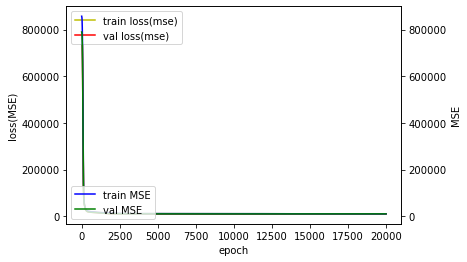

<Figure size 360x360 with 0 Axes>

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
plt.figure(figsize=(5, 5))

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mse'],'b',label='train MSE')
acc_ax.plot(reg_history.history['val_mse'],'g',label='val MSE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MSE')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [24]:
y_pred = model.predict(x_test)

In [25]:
y_pred.shape

(241, 1)

In [26]:
y_pred

array([[ 940.6556 ],
       [1121.4253 ],
       [ 905.77155],
       [ 960.36536],
       [ 621.00995],
       [ 589.9428 ],
       [ 739.06116],
       [ 885.80457],
       [ 903.1061 ],
       [ 940.3569 ],
       [ 697.31165],
       [ 551.08704],
       [ 868.49475],
       [ 718.64026],
       [ 834.4837 ],
       [1135.3219 ],
       [ 748.2992 ],
       [ 923.2831 ],
       [1059.3163 ],
       [ 886.9302 ],
       [ 894.3238 ],
       [ 928.09753],
       [ 882.6748 ],
       [ 854.3827 ],
       [ 611.6489 ],
       [ 857.81836],
       [1024.7577 ],
       [ 731.57733],
       [ 963.16064],
       [ 872.51196],
       [ 543.9264 ],
       [ 764.9025 ],
       [1051.3896 ],
       [ 966.0115 ],
       [ 760.44073],
       [ 920.2776 ],
       [ 933.55414],
       [1203.863  ],
       [ 644.7676 ],
       [1218.9816 ],
       [ 967.94574],
       [ 719.4302 ],
       [ 610.0019 ],
       [ 777.192  ],
       [ 588.2422 ],
       [ 907.6016 ],
       [1012.0569 ],
       [ 773.

In [27]:
print('test MSE: %.2f' % mean_squared_error(y_test, y_pred))
print('test R squared: %.2f' % r2_score(y_test, y_pred))

test MSE: 10366.37
test R squared: 0.73


In [28]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, scoring='r2',param_grid=param_grid, n_jobs=-1, cv=3)